## CTR

In [1]:
#coding=utf-8
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.externals import joblib
from sklearn.preprocessing.data import OneHotEncoder
import json
import xgboost as xgb
import os
os.environ["OMP_NUM_THREADS"] = "6"  #并行训练
import lightgbm 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/wjj/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the

#### 读取train_data

In [2]:
def _load_data(data_file,feature_list):
    data_df = pd.read_csv(filepath_or_buffer = data_file,sep=",", header=None, 
                              names=feature_list)
    return data_df

In [3]:
buy_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1220/buy_all_balance_feature.csv'
not_buy_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1220/not_buy_all_balance_feature.csv'
goods_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1212/goods_feature_1.csv'
user_file ='/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1216/user_feature_less.csv'
user_file_2 = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1225/user_not_buy_feature_less.csv'
 #'/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1214/user_feature.csv'


In [4]:
buy_feature_list = ['index','second_id','s_slug','label']
not_buy_feature_list = ['index','second_id','s_slug','date','label']
#ser_feature_list = ['second_id','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40','41','42','43','44', '45','46','47','48','49','50','51']
user_feature_list = ['second_id', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label']
goods_feature_list = ['goods_slug', '1', '2','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_1', 'p_7394376616792', 'p_7394376616815', 'p_ea10days_1512g', 'p_ea_3daypttp', 'p_easyace_ysjnew_xmy_190828', 'p_easyfun_madai_tea_20', 'p_ef_funsichi_nwlb', 'p_ef_zkxsd_757g', 's_1upbar_20190308', 's_ES_20190724', 's_bh_BH20F_mini_charge', 's_bu_BH20SW_white', 's_cm25_green_coffee_140ml', 's_cm25_gxmydr_300g', 's_cm25_shucai_50g', 's_cm25_yyb_384g', 's_cm25_yykkxin_420g_new_190103', 's_coffee_190819_1_1', 's_ea_dcnx_240g', 's_ea_xckfy_350g', 's_ea_ximeiyin_210ml', 's_ea_yyrtg_36g', 's_ea_yyyxcw_420g', 's_easyace_kfdby_400g', 's_easyace_ysj_new_28g', 's_easyfun_beefdoupu_150g', 's_easyfun_beefrice_160g', 's_easyfun_blackrice_xjyz_zs_qyz', 's_easyfun_chia_120g_180604', 's_easyfun_chiaoat_300g', 's_easyfun_cold_coffee_30g', 's_easyfun_curryrice_160g', 's_easyfun_dizhijixiongrou_100g', 's_easyfun_dongyingong_350g', 's_easyfun_geshidongka_100g', 's_easyfun_guodong_new_360g', 's_easyfun_heimiquan_240g', 's_easyfun_jrw_new_120g', 's_easyfun_jzbc_130g_180709', 's_easyfun_nanguatang_154g', 's_easyfun_niurougan_250g', 's_easyfun_niurougan_250g_180808', 's_easyfun_qmmb_600g', 's_easyfun_sausage_300g', 's_easyfun_suannaigan_200g', 's_easyfun_surou_180815', 's_easyfun_wc_21wancan', 's_easyfun_ximeigan_240g', 's_easyfun_yingzuidou_180g', 's_easyfun_yumixu_tea_40g', 's_easyfun_zimiquan_240g', 's_easyfun_zishuzhou_350g', 's_easys_52_qingduanshi', 's_ef_beef_spiced_100g', 's_ef_dzbtwl_300g', 's_ef_dzdqjrb_80g', 's_ef_dzhjjrc_300g', 's_ef_dzmys_150g', 's_ef_gdbwbdg_50g', 's_ef_gdbxsy_tj_25g', 's_ef_xgscrp_37g', 's_ef_ysalb_160g', 's_ef_yyfs_beef_41g', 's_ef_zuizuidong_360g', 's_gaodanbai_180g', 's_oday_dbb_both_240g', 's_oday_jxr_xl_190604', 's_oday_qiyazibinggan_256g', 's_qianka_1000k_qingliang_20190703', 's_qianka_1000k_zhongkou_20190703']

In [421]:
#goods_df = _load_data(goods_file,goods_feature_list)
#goods_df =goods_df[~goods_df['goods_slug'].isin(['goods_slug'])]

In [5]:
buy_df = _load_data(buy_file,buy_feature_list)
buy_df = buy_df[['second_id','s_slug','label']]
not_buy_df = _load_data(not_buy_file,not_buy_feature_list)
not_buy_df = not_buy_df[['second_id','s_slug','label']]
buy_and_not_buy_df = pd.concat([buy_df,not_buy_df])
buy_and_not_buy_df = buy_and_not_buy_df.sample(frac = 1)
goods_df = _load_data(goods_file,goods_feature_list)
user_df = _load_data(user_file,user_feature_list)
user_df_2 = _load_data(user_file_2,user_feature_list)
user_df = pd.concat([user_df,user_df_2])


/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [7]:
#这三个类别不平衡
buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_ef_dzhjjrc_300g')]
buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_coffee_190819_1_1')]
buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_ef_dzdqjrb_80g')]

In [6]:
buy_and_not_buy_df['label'].value_counts()

0        1277040
1        1200629
1         131071
0         131071
label          2
Name: label, dtype: int64

In [7]:
print(buy_and_not_buy_df['label'].value_counts())

0        1277040
1        1200629
1         131071
0         131071
label          2
Name: label, dtype: int64


In [8]:
user_df = user_df.drop_duplicates('second_id')

In [9]:
buy_and_not_buy_df =buy_and_not_buy_df[~buy_and_not_buy_df['second_id'].isin(['second_id'])]
goods_df =goods_df[~goods_df['goods_slug'].isin(['goods_slug'])]
user_df =user_df[~user_df['second_id'].isin(['second_id'])]

### 合并数据

In [12]:
#user_df =user_df[~user_df['second_id'].isin(['0.0'])]
#user_df['second_id'] = user_df[['second_id']].applymap(np.int64)
#user_df['second_id'] = user_df['second_id'].astype(str)

In [18]:
tmp_buy_and_not_buy_user_df = pd.merge(buy_and_not_buy_df,user_df_2,on='second_id',how='inner')

In [20]:
buy_and_not_buy_df['label'].value_counts()

0    1277040
1    1200629
1     131071
0     131071
Name: label, dtype: int64

In [10]:
buy_and_not_buy_user_df = pd.merge(buy_and_not_buy_df,user_df,on='second_id',how='inner')
buy_and_not_buy_user_goods_df = pd.merge(buy_and_not_buy_user_df,goods_df,left_on='s_slug',right_on='goods_slug',how='inner')

In [14]:
buy_and_not_buy_df

second_id                             s_slug label
255512   43729095                    p_7394376616792     0
35223    45762133                   s_ef_dzdqjrb_80g     0
1193105  43257280                s_ea_ximeiyin_210ml     0
513202   17951779                      p_ea_3daypttp     1
765519   43124474          s_cm25_green_coffee_140ml     1
816458   36750230                s_easyfun_qmmb_600g     0
670661   41839571                s_easyfun_qmmb_600g     1
374803   25243795               s_oday_dbb_both_240g     0
307164   11323637                 s_ef_gdbxsy_tj_25g     0
1294369  60912708                   p_ea10days_1512g     1
740253   76234486                      p_ea_3daypttp     0
575640   40814268     s_easyfun_dizhijixiongrou_100g     1
322231   25765410          s_easyfun_suannaigan_200g     0
1053264  36465670                   s_gaodanbai_180g     1
773861   30142350             s_easyfun_surou_180815     0
1033074  18732501          s_oday_qiyazibinggan_256g     0
984871   37152020          s_easyfun_nanguatang_154g     1
929483   22092871               s_ef_zuizuidong_360g     1
159662   26556121                     s_ea_yyrtg_36g     0
983222   23662370  s_qianka_1000k_qingliang_20190703     1
395126     665779    s_easyfun_blackrice_xjyz_zs_qyz     0
200365   40582114                    s_ef_dzmys_150g     1
1218667  17986420              s_easyace_ysj_new_28g     0
1090588  11593812                    s_cm25_yyb_384g     0
796736   35901406                 s_cm25_gxmydr_300g     0
922253   40081050             s_easys_52_qingduanshi     1
379191    2449011          s_cm25_green_coffee_140ml     1
253653   27472403                    p_7394376616792     0
893292   37392144                     s_ea_dcnx_240g     0
687270   45782731                   s_gaodanbai_180g     1
...           ...                                ...   ...
898349   60621888                     s_ea_dcnx_240g     0
1248327  33244744                    p_ef_zkxsd_757g     1
537401   35444302                s_ea_ximeiyin_210ml     1
417441   39475646                    s_ef_xgscrp_37g     0
312255   20793833                    s_ef_ysalb_160g     1
152999   29939748          s_easyfun_cold_coffee_30g     0
12895    31240541                     s_ea_yyrtg_36g     0
92934    15183060                  s_ef_dzhjjrc_300g     0
166062    5338232              s_ef_beef_spiced_100g     1
235009   38788407    s_easyfun_blackrice_xjyz_zs_qyz     1
490850   16630327             p_easyfun_madai_tea_20     1
626031   42597724     s_easyfun_dizhijixiongrou_100g     1
1225242  28572732                  s_cm25_shucai_50g     0
507209   19657600          s_oday_qiyazibinggan_256g     1
1301770  22795872                  s_bu_BH20SW_white     0
825456   16217731        p_easyace_ysjnew_xmy_190828     0
290050    5994113            s_easyfun_zimiquan_240g     1
1369019  67308954                    s_ef_dzmys_150g     0
51365    32885071             p_easyfun_madai_tea_20     1
732181   36884147                    s_ef_dzmys_150g     1
1140384  20261288  s_qianka_1000k_qingliang_20190703     0
998908   38761176               s_easyace_kfdby_400g     1
1129240  72089242  s_qianka_1000k_qingliang_20190703     0
17013    12251595         s_easyfun_guodong_new_360g     1
976973   47490219                 s_ef_yyfs_beef_41g     1
321876   42123865          s_easyfun_suannaigan_200g     0
892144   12329115    s_easyfun_blackrice_xjyz_zs_qyz     1
1304054   9952086                  s_bu_BH20SW_white     0
414754   39851702            s_easyfun_beefrice_160g     0
494518   44181116                     s_ea_yyrtg_36g     1

[2739811 rows x 3 columns]

In [24]:
tmp_df = buy_and_not_buy_user_df[buy_and_not_buy_user_df['label'] == 1]

In [25]:
tmp_df['s_slug'].value_counts()

p_ef_zkxsd_757g                      20085
p_7394376616815                      19294
p_7394376616792                      19184
p_ef_funsichi_nwlb                   18997
p_ea_3daypttp                        18887
s_easyfun_cold_coffee_30g            18641
p_easyace_ysjnew_xmy_190828          18453
p_ea10days_1512g                     18144
p_easyfun_madai_tea_20               17882
s_ef_dzbtwl_300g                     17763
s_easyfun_nanguatang_154g            17681
s_easyfun_chia_120g_180604           17591
s_easyfun_jzbc_130g_180709           17585
s_cm25_yykkxin_420g_new_190103       17570
s_ef_beef_spiced_100g                17569
s_easyfun_yumixu_tea_40g             17499
s_ea_dcnx_240g                       17448
s_easyfun_niurougan_250g             17363
s_easyfun_surou_180815               17283
s_easyfun_zishuzhou_350g             17219
s_easyfun_niurougan_250g_180808      17200
s_cm25_shucai_50g                    17139
s_oday_dbb_both_240g                 17074
s_cm25_yyb_

In [15]:
del buy_and_not_buy_user_goods_df['second_id']
del buy_and_not_buy_user_goods_df['s_slug']
#del buy_and_not_buy_user_goods_df['date']
del buy_and_not_buy_user_goods_df['goods_slug']

In [16]:
feature_list = buy_and_not_buy_user_goods_df.columns.tolist()

In [17]:
#for i in feature_list:
    #buy_and_not_buy_user_goods_df[i]=buy_and_not_buy_user_goods_df[i].astype('float32')

In [18]:
#for i in range(1,77):
    #buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.rename(columns={i:'%s'%i})

In [19]:
#change_feature_list = [' EA代餐', ' EA小助手', ' EF轻主食', ' EF轻小食', ' EF轻烘焙', ' EF轻肉食', ' EF轻配餐', ' EF轻饮', ' EF轻麦片', ' 设备']
#num=1
#for i in change_feature_list:
    #buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.rename(columns={i:'EA%s'%num})
    #num+=1
#del num

### 取出数据和label

In [20]:
buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.apply(pd.to_numeric)

In [21]:
buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.sample(frac = 1)

In [22]:
print(buy_and_not_buy_user_goods_df.columns.tolist())

['label', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label', '1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', '

In [23]:
#del buy_and_not_buy_user_goods_df['index']

In [279]:
train_x_feature_old_list = X_train.columns.tolist()

In [281]:
train_x_feature_new_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201]

In [290]:
for i in range(0,198):
    buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.rename(columns={train_x_feature_old_list[i]:train_x_feature_new_list[i]})

IndexError: list index out of range

In [300]:
train_df, test_df = train_test_split(buy_and_not_buy_user_goods_df, test_size=0.2, random_state=30)

In [301]:
y_train = train_df['label']  # training label
y_test = test_df['label']   # testing label
X_train = train_df.drop('label', axis=1)  # training dataset
X_test = test_df.drop('label', axis=1)  # testing dataset

# XGBoost+LR

In [302]:
# 定义xgb模型
xgboost = xgb.XGBClassifier(max_leaf_nodes=10,nthread=-1, n_jobs=-1,learning_rate=0.08,
                    n_estimators=40, max_depth=3, gamma=0.2, subsample=0.6, colsample_bytree=0.5,
                           )
# 训练xgb学习
xgboost.fit(X_train, y_train)

# 预测xgb及AUC评测
y_pred_test = xgboost.predict_proba(X_test)[:, 1]
xgb_test_auc = roc_auc_score(y_test, y_pred_test)
print('xgboost test auc: %.5f' % xgb_test_auc)

# xgboost编码原有特征
X_train_leaves = xgboost.apply(X_train)
X_test_leaves = xgboost.apply(X_test)

# 合并编码后的训练数据和测试数据
All_leaves = np.concatenate((X_train_leaves, X_test_leaves), axis=0)
All_leaves = All_leaves.astype(np.int32)

# 对所有特征进行ont-hot编码
xgbenc = OneHotEncoder()
X_trans = xgbenc.fit_transform(All_leaves)
(train_rows, cols) = X_train_leaves.shape

# 定义LR模型
lr_1 = LogisticRegression(n_jobs=-1)
# lr对xgboost特征编码后的样本模型训练
lr_1.fit(X_trans[:train_rows, :], y_train)
# 预测及AUC评测
y_pred_xgblr1 = lr_1.predict_proba(X_trans[train_rows:, :])[:, 1]
xgb_lr_auc1 = roc_auc_score(y_test, y_pred_xgblr1)
print('基于Xgb特征编码后的LR AUC: %.5f' % xgb_lr_auc1)

# 定义LR模型
#lr_2 = LogisticRegression(n_jobs=-1,penalty='l2')
# 组合特征，把编码后的特征与原始特征组合
#X_train_ext = hstack([X_trans[:train_rows, :], X_train])
#X_test_ext = hstack([X_trans[train_rows:, :], X_test])

# lr对组合特征的样本模型训练
#lr_2.fit(X_train_ext, y_train)

# 预测及AUC评测
#y_pred_xgblr2 = lr_2.predict_proba(X_test_ext)[:, 1]
#xgb_lr_auc2 = roc_auc_score(y_test, y_pred_xgblr2)
#print('基于组合特征的LR AUC: %.5f' % xgb_lr_auc2)

xgboost test auc: 0.75455
基于Xgb特征编码后的LR AUC: 0.76960


# model_importance

In [113]:
importances = lr.feature_importances_
indices = np.argsort(importances)[::-1]

 1) 68                             0.030544
 2) EA4                            0.029896
 3) EA6                            0.025721
 4) num_paid                       0.024253
 5) class_4                        0.022865
 6) EA10                           0.021427
 7) total_cost                     0.021416
 8) 2                              0.021137
 9) 41                             0.020252
10) 73                             0.020165
11) 37                             0.019044
12) EA1                            0.018375
13) 60                             0.017743
14) 10                             0.017242
15) 43                             0.016922
16) add_cart_count                 0.015728
17) s_ES_20190724                  0.015237
18) class_2                        0.013782
19) 27                             0.013604
20) EA3                            0.013387
21) 30                             0.012380
22) 35                             0.012259
23) s_oday_jxr_xl_190604        

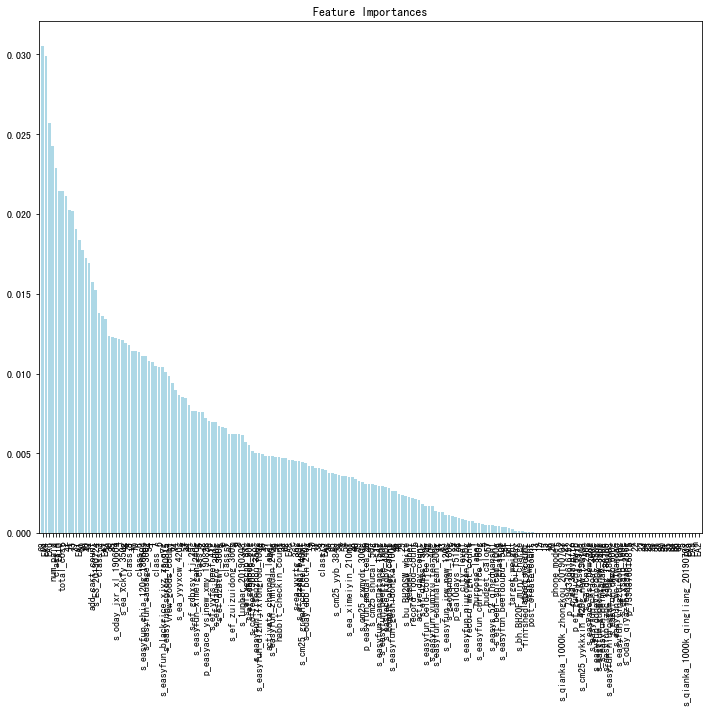

In [117]:
feat_labels_list = X_train.columns.tolist()
feat_labels = np.array(feat_labels_list)
import matplotlib.pyplot as plt
%matplotlib inline
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [110]:
col_name = list(X_train.columns)
m = {}
for i in range(len(col_name)):
    m.setdefault(col_name[i], 0)
    m[col_name[i]] = lr.coef_[0][i]
sorted(m.items(), key=lambda x: x[1], reverse=True)

[('70', 5.0690867349064925),
 ('s_cm25_shucai_50g', 1.2910983154353735),
 ('s_easyfun_niurougan_250g', 0.9341657654604647),
 ('27', 0.8745975613392774),
 ('post_create_count', 0.7937107261584062),
 ('s_easyfun_nanguatang_154g', 0.7531684953685507),
 ('33', 0.7043742737402041),
 ('city_level', 0.6192889063530026),
 ('s_cm25_yykkxin_420g_new_190103', 0.6081969801949507),
 ('s_ef_dzbtwl_300g', 0.5893655070065333),
 ('s_easyfun_jrw_new_120g', 0.5592001949085471),
 ('y', 0.5417225895240567),
 ('s_easyfun_wc_21wancan', 0.4929955175955857),
 ('s_easyfun_ximeigan_240g', 0.48339856925754465),
 ('8', 0.4425882035946568),
 ('26', 0.4193165486302701),
 ('p_ef_zkxsd_757g', 0.4034904216108875),
 ('11', 0.39269151281659287),
 ('41', 0.3652144571428826),
 ('39', 0.3484924455717244),
 ('19', 0.34573289886519804),
 ('66', 0.2910977980720874),
 ('s_ef_dzmys_150g', 0.2803302470604073),
 ('p_easyfun_madai_tea_20', 0.27124150137199315),
 ('s_easyfun_niurougan_250g_180808', 0.26777061810181696),
 ('z', 0.265

In [ ]:
#70控制热量
#27即食
#33小袋装
#8Easy Fun 轻饮麦片
#26Easy Ace 其他

In [447]:
#joblib.dump(xgboost, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1225/xgboost')
#joblib.dump(lr_1, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1225/lr_1')
#joblib.dump(xgbenc, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1225/xgbenc')

['/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1225/xgbenc']

In [13]:
#lr_1 = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/lr_1')
#xgboost = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgboost')
#xgbenc = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgbenc')

In [303]:
# 准确率
y_pred_xgblr1 = np.rint(y_pred_xgblr1)
accuracy = metrics.accuracy_score(y_test, y_pred_xgblr1) 
print("Test Accuracy: %s"%(accuracy))
# 召回率
recall = metrics.recall_score(y_test, y_pred_xgblr1) 
print("Test Recall: %s"%(recall))
# F1值
f1 = metrics.f1_score(y_test, y_pred_xgblr1) 
print("Test F1: %s"%(f1))

Test Accuracy: 0.9065539343386094
Test Recall: 0.9973370512373649
Test F1: 0.9508116825576862


In [ ]:
#效果：不对user做特征工程，正负样本比例3:1，AUC=0.91，准确率=0.84，召回率=0.63，F1=0.65
     #对user做特征工程,0.98072,0.9601831494442987,0.9960948695901405,0.9657172629385203
#user特征工程后merge大大减少？？

# predict

In [268]:
predict_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/predict_user_feature_data/1222/predict_user_featuere_1.csv'
predict_feature_list = ['second_id', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label']
predict_user_df = _load_data(predict_file,predict_feature_list)

/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [269]:
predict_user_df = predict_user_df.drop_duplicates('second_id')

In [270]:
predict_user_df =predict_user_df[~predict_user_df['second_id'].isin(['second_id'])]

In [271]:
predict_user_df['second_id'] = predict_user_df['second_id'].astype(int)

In [272]:
predict_user_df = predict_user_df.apply(pd.to_numeric)
for i in goods_df.columns.tolist():
    if i == 'goods_slug':
        continue
    goods_df[i] =goods_df[i].apply(pd.to_numeric)

In [273]:
#goods_feature_list_2 = ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_1', 'p_7394376616792', 'p_7394376616815', 'p_ea10days_1512g', 'p_ea_3daypttp', 'p_easyace_ysjnew_xmy_190828', 'p_easyfun_madai_tea_20', 'p_ef_funsichi_nwlb', 'p_ef_zkxsd_757g', 's_1upbar_20190308', 's_ES_20190724', 's_bh_BH20F_mini_charge', 's_bu_BH20SW_white', 's_cm25_green_coffee_140ml', 's_cm25_gxmydr_300g', 's_cm25_shucai_50g', 's_cm25_yyb_384g', 's_cm25_yykkxin_420g_new_190103', 's_coffee_190819_1_1', 's_ea_dcnx_240g', 's_ea_xckfy_350g', 's_ea_ximeiyin_210ml', 's_ea_yyrtg_36g', 's_ea_yyyxcw_420g', 's_easyace_kfdby_400g', 's_easyace_ysj_new_28g', 's_easyfun_beefdoupu_150g', 's_easyfun_beefrice_160g', 's_easyfun_blackrice_xjyz_zs_qyz', 's_easyfun_chia_120g_180604', 's_easyfun_chiaoat_300g', 's_easyfun_cold_coffee_30g', 's_easyfun_curryrice_160g', 's_easyfun_dizhijixiongrou_100g', 's_easyfun_dongyingong_350g', 's_easyfun_geshidongka_100g', 's_easyfun_guodong_new_360g', 's_easyfun_heimiquan_240g', 's_easyfun_jrw_new_120g', 's_easyfun_jzbc_130g_180709', 's_easyfun_nanguatang_154g', 's_easyfun_niurougan_250g', 's_easyfun_niurougan_250g_180808', 's_easyfun_qmmb_600g', 's_easyfun_sausage_300g', 's_easyfun_suannaigan_200g', 's_easyfun_surou_180815', 's_easyfun_wc_21wancan', 's_easyfun_ximeigan_240g', 's_easyfun_yingzuidou_180g', 's_easyfun_yumixu_tea_40g', 's_easyfun_zimiquan_240g', 's_easyfun_zishuzhou_350g', 's_easys_52_qingduanshi', 's_ef_beef_spiced_100g', 's_ef_dzbtwl_300g', 's_ef_dzdqjrb_80g', 's_ef_dzhjjrc_300g', 's_ef_dzmys_150g', 's_ef_gdbwbdg_50g', 's_ef_gdbxsy_tj_25g', 's_ef_xgscrp_37g', 's_ef_ysalb_160g', 's_ef_yyfs_beef_41g', 's_ef_zuizuidong_360g', 's_gaodanbai_180g', 's_oday_dbb_both_240g', 's_oday_jxr_xl_190604', 's_oday_qiyazibinggan_256g', 's_qianka_1000k_qingliang_20190703', 's_qianka_1000k_zhongkou_20190703']
#for i in goods_feature_list_2:
    #goods_df[i]=goods_df[i].astype('float32')

In [422]:
predict_user_df_1 = predict_user_df.tail(15000)

In [425]:
punish_dict = {
    's_cm25_shucai_50g':-0.00008,
    's_easyfun_blackrice_xjyz_zs_qyz':-0.00009,
    's_easyfun_zimiquan_240g':-0.00000008,
    's_easyfun_chiaoat_300g':-0.0000002,
    's_bu_BH20SW_white':-0.00000008,
    's_easyfun_wc_21wancan':-0.00009,
    's_qianka_1000k_zhongkou_20190703':-0.00009,
    's_qianka_1000k_qingliang_20190703':-0.00009,
    'p_ea_3daypttp':-0.0004,
    'p_ea10days_1512g':-0.0001,
    's_oday_dbb_both_240g':-0.0005,
    's_cm25_yykkxin_420g_new_190103':-0.0001,
    's_cm25_yyb_384g':-0.00005,
    's_easyfun_curryrice_160g':-0.00000004,
    'p_easyfun_madai_tea_20':-0.00000004,
    's_ea_dcnx_240g':-0.00001,
    'p_ef_funsichi_nwlb':0.0000005,
    's_ES_20190724':0.00000006,
    's_easyfun_dongyingong_350g':0.00000006,
    's_ef_dzbtwl_300g':0.00000006,
    's_easyfun_niurougan_250g_180808':0.000000004,
    's_easys_52_qingduanshi':0.000000004,
    's_easyfun_suannaigan_200g':0.00000003,
    's_ef_beef_spiced_100g':0.00000001,
    's_easyfun_beefdoupu_150g':0.00000007,
    's_easyfun_jzbc_130g_180709':0.00000007,
    's_easyfun_surou_180815':0.00000005,
}

In [427]:
num = 0
for i in predict_user_df_1.columns.tolist():
    num+=1
    predict_user_df_1 = predict_user_df_1.rename(columns={i:num})
predict_user_df_1 =predict_user_df_1.apply(pd.to_numeric)
predict_user_df_1[1] = predict_user_df_1[1].astype(int)
print(num)
for i in goods_df.columns.tolist():
    if i == 'goods_slug':
        continue
    goods_df[i] =goods_df[i].apply(pd.to_numeric)
num+=1
for i in goods_df.columns.tolist():
    num+=1
    goods_df = goods_df.rename(columns={i:num})

23


In [444]:
##目标是将需要预测的样本映射成onehot向量，就可以直接放入lr得到结果了。肯定不要用所有训练数据，不然就出来很慢。可以多学习onehotencoder的使用
#会不会原始item数据有问题，商品池？
#为什么AUC会好？
#集中的那几个item都是在数据库中没有买过的,都是靠单品或者套餐映射过去的，这里可能的问题：一个单品存在于两个多规格，然后我把他映射为其中一个多规格了。所以这个多规格就多出来很多点击数据。                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #找徐志拉

user_recommender_dict={}
for index,row in predict_user_df_1.iterrows():
    print(row)
    %time user_id = row[1]
    recommendation_list = []
    out_dict={}   
    %time del row[1]
    for index_2,row_2 in goods_df.iterrows():
        s_slug = row_2[25]  
        %time del row_2[25]
        %time row_3= pd.concat([row,row_2])
        %time df2 = pd.DataFrame(row_3,dtype=np.float).T        
        %time predict_leaves = xgboost.apply(df2)
        %time predict_x_one_hot=xgbenc.transform(predict_leaves).toarray()
        %time predict_test=lr_1.predict_proba(predict_x_one_hot)[:, 1]
        if s_slug in punish_dict:
            score = predict_test[0]
            #score = predict_test[0] + punish_dict[s_slug]
        else:
            score = predict_test[0]
        %time out_dict.update({s_slug:score}) 
    %time list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
    %time user_recommender_dict.update({user_id:list1[:4]})

1     46404793.00
2            5.00
3            1.00
4            3.00
5           50.00
6           53.30
7           50.90
8           20.39
9         1207.00
10           3.00
11           0.00
12           0.00
13           0.00
14           0.00
15           0.00
16           6.00
17           0.00
18          28.00
19           0.00
20          19.00
21           1.00
22           4.00
23           2.00
Name: 983585.0, dtype: float64
CPU times: user 44 µs, sys: 1e+03 ns, total: 45 µs
Wall time: 50.1 µs
CPU times: user 188 µs, sys: 68 µs, total: 256 µs
Wall time: 191 µs
CPU times: user 159 µs, sys: 33 µs, total: 192 µs
Wall time: 167 µs
CPU times: user 558 µs, sys: 176 µs, total: 734 µs
Wall time: 553 µs
CPU times: user 341 µs, sys: 14 µs, total: 355 µs
Wall time: 349 µs
CPU times: user 2.61 ms, sys: 418 µs, total: 3.03 ms
Wall time: 2.59 ms
CPU times: user 9.3 ms, sys: 2.41 ms, total: 11.7 ms
Wall time: 9.79 ms
CPU times: user 195 µs, sys: 30 µs, total: 225 µs
Wall time: 223 µs


CPU times: user 2.31 ms, sys: 226 µs, total: 2.54 ms
Wall time: 2.28 ms
CPU times: user 6.32 ms, sys: 1.57 ms, total: 7.89 ms
Wall time: 6.54 ms
CPU times: user 145 µs, sys: 9 µs, total: 154 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 142 µs, sys: 16 µs, total: 158 µs
Wall time: 147 µs
CPU times: user 393 µs, sys: 9 µs, total: 402 µs
Wall time: 400 µs
CPU times: user 256 µs, sys: 7 µs, total: 263 µs
Wall time: 263 µs
CPU times: user 2.13 ms, sys: 297 µs, total: 2.42 ms
Wall time: 2.15 ms
CPU times: user 6.61 ms, sys: 1.66 ms, total: 8.26 ms
Wall time: 6.87 ms
CPU times: user 142 µs, sys: 10 µs, total: 152 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 160 µs, sys: 33 µs, total: 193 µs
Wall time: 177 µs
CPU times: user 422 µs, sys: 9 µs, total: 431 µs
Wall time: 430 µs
CPU times: user 268 µs, sys: 18 µs, total: 286 µs
Wall time: 282 µs
CPU times: user 2.43 ms, sys: 354 µ

CPU times: user 6.99 ms, sys: 1.81 ms, total: 8.8 ms
Wall time: 7.29 ms
CPU times: user 156 µs, sys: 6 µs, total: 162 µs
Wall time: 163 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 140 µs, sys: 8 µs, total: 148 µs
Wall time: 145 µs
CPU times: user 396 µs, sys: 8 µs, total: 404 µs
Wall time: 403 µs
CPU times: user 258 µs, sys: 7 µs, total: 265 µs
Wall time: 265 µs
CPU times: user 2.64 ms, sys: 540 µs, total: 3.18 ms
Wall time: 2.73 ms
CPU times: user 6.84 ms, sys: 1.69 ms, total: 8.53 ms
Wall time: 7.15 ms
CPU times: user 148 µs, sys: 9 µs, total: 157 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 179 µs, sys: 37 µs, total: 216 µs
Wall time: 189 µs
CPU times: user 435 µs, sys: 21 µs, total: 456 µs
Wall time: 456 µs
CPU times: user 281 µs, sys: 24 µs, total: 305 µs
Wall time: 291 µs
CPU times: user 2.53 ms, sys: 460 µs, total: 2.99 ms
Wall time: 2.59 ms
CPU times: user 5.97 ms, sys: 1.41 m

CPU times: user 7.87 ms, sys: 2.28 ms, total: 10.2 ms
Wall time: 8.33 ms
CPU times: user 149 µs, sys: 8 µs, total: 157 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 160 µs, sys: 33 µs, total: 193 µs
Wall time: 178 µs
CPU times: user 400 µs, sys: 9 µs, total: 409 µs
Wall time: 408 µs
CPU times: user 261 µs, sys: 18 µs, total: 279 µs
Wall time: 274 µs
CPU times: user 2.6 ms, sys: 502 µs, total: 3.1 ms
Wall time: 2.68 ms
CPU times: user 7.44 ms, sys: 2.06 ms, total: 9.5 ms
Wall time: 7.78 ms
CPU times: user 200 µs, sys: 44 µs, total: 244 µs
Wall time: 225 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs
CPU times: user 189 µs, sys: 25 µs, total: 214 µs
Wall time: 196 µs
CPU times: user 543 µs, sys: 13 µs, total: 556 µs
Wall time: 551 µs
CPU times: user 339 µs, sys: 25 µs, total: 364 µs
Wall time: 358 µs
CPU times: user 2.33 ms, sys: 287 µs, total: 2.61 ms
Wall time: 2.28 ms
CPU times: user 7.58 ms, sys: 2.09 ms, 

CPU times: user 1.96 ms, sys: 293 µs, total: 2.25 ms
Wall time: 1.95 ms
CPU times: user 5.95 ms, sys: 1.28 ms, total: 7.23 ms
Wall time: 6.11 ms
CPU times: user 145 µs, sys: 11 µs, total: 156 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 145 µs, sys: 23 µs, total: 168 µs
Wall time: 149 µs
CPU times: user 384 µs, sys: 14 µs, total: 398 µs
Wall time: 388 µs
CPU times: user 296 µs, sys: 35 µs, total: 331 µs
Wall time: 308 µs
CPU times: user 2.23 ms, sys: 471 µs, total: 2.7 ms
Wall time: 2.2 ms
CPU times: user 6.71 ms, sys: 1.89 ms, total: 8.6 ms
Wall time: 6.95 ms
CPU times: user 142 µs, sys: 9 µs, total: 151 µs
Wall time: 149 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 161 µs, sys: 30 µs, total: 191 µs
Wall time: 173 µs
CPU times: user 397 µs, sys: 9 µs, total: 406 µs
Wall time: 404 µs
CPU times: user 266 µs, sys: 26 µs, total: 292 µs
Wall time: 286 µs
CPU times: user 2.14 ms, sys: 317 µ

Wall time: 260 µs
CPU times: user 2.42 ms, sys: 343 µs, total: 2.76 ms
Wall time: 2.51 ms
CPU times: user 7.07 ms, sys: 1.72 ms, total: 8.79 ms
Wall time: 7.4 ms
CPU times: user 152 µs, sys: 9 µs, total: 161 µs
Wall time: 158 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 149 µs, sys: 22 µs, total: 171 µs
Wall time: 154 µs
CPU times: user 412 µs, sys: 12 µs, total: 424 µs
Wall time: 432 µs
CPU times: user 272 µs, sys: 19 µs, total: 291 µs
Wall time: 284 µs
CPU times: user 2.21 ms, sys: 323 µs, total: 2.53 ms
Wall time: 2.25 ms
CPU times: user 6.62 ms, sys: 1.92 ms, total: 8.54 ms
Wall time: 6.91 ms
CPU times: user 136 µs, sys: 10 µs, total: 146 µs
Wall time: 142 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 143 µs, sys: 20 µs, total: 163 µs
Wall time: 151 µs
CPU times: user 383 µs, sys: 8 µs, total: 391 µs
Wall time: 390 µs
CPU times: user 267 µs, sys: 20 µs, total: 287 µs
Wall time: 279 µs
CPU times: user 2.1

CPU times: user 225 µs, sys: 36 µs, total: 261 µs
Wall time: 247 µs
CPU times: user 464 µs, sys: 10 µs, total: 474 µs
Wall time: 472 µs
CPU times: user 311 µs, sys: 23 µs, total: 334 µs
Wall time: 324 µs
CPU times: user 2.6 ms, sys: 338 µs, total: 2.93 ms
Wall time: 2.56 ms
CPU times: user 8.06 ms, sys: 2.15 ms, total: 10.2 ms
Wall time: 8.35 ms
CPU times: user 174 µs, sys: 13 µs, total: 187 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
CPU times: user 172 µs, sys: 31 µs, total: 203 µs
Wall time: 188 µs
CPU times: user 457 µs, sys: 17 µs, total: 474 µs
Wall time: 469 µs
CPU times: user 297 µs, sys: 22 µs, total: 319 µs
Wall time: 312 µs
CPU times: user 2.29 ms, sys: 261 µs, total: 2.55 ms
Wall time: 2.28 ms
CPU times: user 8.25 ms, sys: 1.96 ms, total: 10.2 ms
Wall time: 8.58 ms
CPU times: user 200 µs, sys: 20 µs, total: 220 µs
Wall time: 220 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 192 µs, sys: 33 µs,

CPU times: user 2.41 ms, sys: 416 µs, total: 2.83 ms
Wall time: 2.39 ms
CPU times: user 8.53 ms, sys: 2.44 ms, total: 11 ms
Wall time: 8.91 ms
CPU times: user 175 µs, sys: 12 µs, total: 187 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 186 µs, sys: 39 µs, total: 225 µs
Wall time: 206 µs
CPU times: user 480 µs, sys: 9 µs, total: 489 µs
Wall time: 487 µs
CPU times: user 296 µs, sys: 13 µs, total: 309 µs
Wall time: 303 µs
CPU times: user 2.43 ms, sys: 379 µs, total: 2.81 ms
Wall time: 2.42 ms
CPU times: user 8.1 ms, sys: 2.33 ms, total: 10.4 ms
Wall time: 8.43 ms
CPU times: user 172 µs, sys: 11 µs, total: 183 µs
Wall time: 180 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 171 µs, sys: 24 µs, total: 195 µs
Wall time: 179 µs
CPU times: user 520 µs, sys: 17 µs, total: 537 µs
Wall time: 568 µs
CPU times: user 314 µs, sys: 13 µs, total: 327 µs
Wall time: 322 µs
CPU times: user 2.66 ms, sys: 422 

CPU times: user 169 µs, sys: 24 µs, total: 193 µs
Wall time: 179 µs
CPU times: user 490 µs, sys: 12 µs, total: 502 µs
Wall time: 498 µs
CPU times: user 311 µs, sys: 10 µs, total: 321 µs
Wall time: 320 µs
CPU times: user 2.66 ms, sys: 329 µs, total: 2.98 ms
Wall time: 2.59 ms
CPU times: user 8.33 ms, sys: 1.97 ms, total: 10.3 ms
Wall time: 8.6 ms
CPU times: user 176 µs, sys: 10 µs, total: 186 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 166 µs, sys: 14 µs, total: 180 µs
Wall time: 172 µs
CPU times: user 475 µs, sys: 15 µs, total: 490 µs
Wall time: 483 µs
CPU times: user 306 µs, sys: 7 µs, total: 313 µs
Wall time: 315 µs
CPU times: user 2.33 ms, sys: 280 µs, total: 2.61 ms
Wall time: 2.36 ms
CPU times: user 8.52 ms, sys: 2.27 ms, total: 10.8 ms
Wall time: 8.86 ms
CPU times: user 179 µs, sys: 13 µs, total: 192 µs
Wall time: 186 µs
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 8.82 µs
CPU times: user 230 µs, sys: 52 

CPU times: user 8.48 ms, sys: 2.01 ms, total: 10.5 ms
Wall time: 8.8 ms
CPU times: user 175 µs, sys: 13 µs, total: 188 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 195 µs, sys: 36 µs, total: 231 µs
Wall time: 211 µs
CPU times: user 472 µs, sys: 11 µs, total: 483 µs
Wall time: 480 µs
CPU times: user 318 µs, sys: 24 µs, total: 342 µs
Wall time: 331 µs
CPU times: user 2.66 ms, sys: 406 µs, total: 3.07 ms
Wall time: 2.69 ms
CPU times: user 7.81 ms, sys: 2.06 ms, total: 9.87 ms
Wall time: 8.09 ms
CPU times: user 163 µs, sys: 11 µs, total: 174 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 9.06 µs
CPU times: user 283 µs, sys: 59 µs, total: 342 µs
Wall time: 304 µs
CPU times: user 482 µs, sys: 17 µs, total: 499 µs
Wall time: 488 µs
CPU times: user 314 µs, sys: 10 µs, total: 324 µs
Wall time: 322 µs
CPU times: user 2.56 ms, sys: 415 µs, total: 2.97 ms
Wall time: 2.59 ms
CPU times: user 8.28 ms, sys: 2 ms,

CPU times: user 8.59 ms, sys: 2.59 ms, total: 11.2 ms
Wall time: 9.01 ms
CPU times: user 180 µs, sys: 11 µs, total: 191 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 170 µs, sys: 26 µs, total: 196 µs
Wall time: 180 µs
CPU times: user 484 µs, sys: 14 µs, total: 498 µs
Wall time: 491 µs
CPU times: user 311 µs, sys: 11 µs, total: 322 µs
Wall time: 319 µs
CPU times: user 2.29 ms, sys: 399 µs, total: 2.69 ms
Wall time: 2.23 ms
CPU times: user 7.53 ms, sys: 1.59 ms, total: 9.11 ms
Wall time: 7.78 ms
CPU times: user 184 µs, sys: 18 µs, total: 202 µs
Wall time: 199 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 211 µs, sys: 37 µs, total: 248 µs
Wall time: 228 µs
CPU times: user 524 µs, sys: 17 µs, total: 541 µs
Wall time: 531 µs
CPU times: user 376 µs, sys: 28 µs, total: 404 µs
Wall time: 399 µs
CPU times: user 3.08 ms, sys: 526 µs, total: 3.6 ms
Wall time: 3.18 ms
CPU times: user 9.14 ms, sys: 2

KeyboardInterrupt: 

CPU times: user 223 µs, sys: 17 µs, total: 240 µs
Wall time: 231 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 185 µs, sys: 35 µs, total: 220 µs
Wall time: 200 µs
CPU times: user 534 µs, sys: 17 µs, total: 551 µs
Wall time: 543 µs
CPU times: user 358 µs, sys: 16 µs, total: 374 µs
Wall time: 365 µs
CPU times: user 3.1 ms, sys: 533 µs, total: 3.63 ms
Wall time: 3.13 ms
CPU times: user 9.63 ms, sys: 2.62 ms, total: 12.3 ms
Wall time: 10.1 ms
CPU times: user 188 µs, sys: 13 µs, total: 201 µs
Wall time: 197 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 193 µs, sys: 35 µs, total: 228 µs
Wall time: 210 µs
CPU times: user 638 µs, sys: 59 µs, total: 697 µs
Wall time: 675 µs
CPU times: user 359 µs, sys: 17 µs, total: 376 µs
Wall time: 367 µs
CPU times: user 2.99 ms, sys: 480 µs, total: 3.47 ms
Wall time: 3.07 ms
CPU times: user 9.52 ms, sys: 2.81 ms, total: 12.3 ms
Wall time: 10.1 ms
CPU times: user 217 µs, sys: 13

CPU times: user 493 µs, sys: 15 µs, total: 508 µs
Wall time: 500 µs
CPU times: user 272 µs, sys: 11 µs, total: 283 µs
Wall time: 279 µs
CPU times: user 2.63 ms, sys: 499 µs, total: 3.12 ms
Wall time: 2.72 ms
CPU times: user 7.52 ms, sys: 1.81 ms, total: 9.33 ms
Wall time: 7.81 ms
CPU times: user 163 µs, sys: 10 µs, total: 173 µs
Wall time: 171 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 190 µs, sys: 34 µs, total: 224 µs
Wall time: 204 µs
CPU times: user 448 µs, sys: 10 µs, total: 458 µs
Wall time: 455 µs
CPU times: user 299 µs, sys: 23 µs, total: 322 µs
Wall time: 312 µs
CPU times: user 2.7 ms, sys: 457 µs, total: 3.16 ms
Wall time: 2.76 ms
CPU times: user 7.45 ms, sys: 2.24 ms, total: 9.69 ms
Wall time: 7.77 ms
CPU times: user 141 µs, sys: 9 µs, total: 150 µs
Wall time: 147 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 205 µs, sys: 71 µs, total: 276 µs
Wall time: 242 µs
CPU times: user 409 µs, sys: 8 µs, t

CPU times: user 3.18 ms, sys: 719 µs, total: 3.9 ms
Wall time: 3.3 ms
CPU times: user 8.61 ms, sys: 2.43 ms, total: 11 ms
Wall time: 9.01 ms
CPU times: user 182 µs, sys: 13 µs, total: 195 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 185 µs, sys: 34 µs, total: 219 µs
Wall time: 200 µs
CPU times: user 514 µs, sys: 12 µs, total: 526 µs
Wall time: 523 µs
CPU times: user 364 µs, sys: 18 µs, total: 382 µs
Wall time: 372 µs
CPU times: user 3.27 ms, sys: 684 µs, total: 3.95 ms
Wall time: 3.39 ms
CPU times: user 8.76 ms, sys: 2.65 ms, total: 11.4 ms
Wall time: 9.25 ms
CPU times: user 197 µs, sys: 11 µs, total: 208 µs
Wall time: 204 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 188 µs, sys: 24 µs, total: 212 µs
Wall time: 196 µs
CPU times: user 516 µs, sys: 11 µs, total: 527 µs
Wall time: 526 µs
CPU times: user 544 µs, sys: 99 µs, total: 643 µs
Wall time: 594 µs
CPU times: user 2.43 ms, sys: 339 

CPU times: user 444 µs, sys: 68 µs, total: 512 µs
Wall time: 489 µs
CPU times: user 2.58 ms, sys: 258 µs, total: 2.83 ms
Wall time: 2.54 ms
CPU times: user 8.29 ms, sys: 2.33 ms, total: 10.6 ms
Wall time: 8.65 ms
CPU times: user 175 µs, sys: 11 µs, total: 186 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 187 µs, sys: 36 µs, total: 223 µs
Wall time: 204 µs
CPU times: user 481 µs, sys: 13 µs, total: 494 µs
Wall time: 493 µs
CPU times: user 314 µs, sys: 22 µs, total: 336 µs
Wall time: 330 µs
CPU times: user 2.48 ms, sys: 353 µs, total: 2.83 ms
Wall time: 2.5 ms
CPU times: user 8.56 ms, sys: 2.23 ms, total: 10.8 ms
Wall time: 8.94 ms
CPU times: user 176 µs, sys: 10 µs, total: 186 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 213 µs, sys: 45 µs, total: 258 µs
Wall time: 232 µs
CPU times: user 564 µs, sys: 14 µs, total: 578 µs
Wall time: 573 µs
CPU times: user 358 µs, sys: 28

CPU times: user 2.93 ms, sys: 471 µs, total: 3.4 ms
Wall time: 3.02 ms
CPU times: user 6.54 ms, sys: 1.71 ms, total: 8.26 ms
Wall time: 6.79 ms
CPU times: user 141 µs, sys: 8 µs, total: 149 µs
Wall time: 148 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 169 µs, sys: 35 µs, total: 204 µs
Wall time: 184 µs
CPU times: user 422 µs, sys: 9 µs, total: 431 µs
Wall time: 429 µs
CPU times: user 278 µs, sys: 20 µs, total: 298 µs
Wall time: 293 µs
CPU times: user 2.2 ms, sys: 277 µs, total: 2.48 ms
Wall time: 2.22 ms
CPU times: user 6.35 ms, sys: 1.51 ms, total: 7.86 ms
Wall time: 6.55 ms
CPU times: user 188 µs, sys: 12 µs, total: 200 µs
Wall time: 193 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 167 µs, sys: 22 µs, total: 189 µs
Wall time: 173 µs
CPU times: user 477 µs, sys: 14 µs, total: 491 µs
Wall time: 484 µs
CPU times: user 297 µs, sys: 11 µs, total: 308 µs
Wall time: 305 µs
CPU times: user 2.66 ms, sys: 483 

CPU times: user 2.5 ms, sys: 423 µs, total: 2.92 ms
Wall time: 2.5 ms
CPU times: user 5.99 ms, sys: 1.5 ms, total: 7.49 ms
Wall time: 6.19 ms
CPU times: user 129 µs, sys: 11 µs, total: 140 µs
Wall time: 138 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 149 µs, sys: 27 µs, total: 176 µs
Wall time: 162 µs
CPU times: user 387 µs, sys: 14 µs, total: 401 µs
Wall time: 394 µs
CPU times: user 335 µs, sys: 36 µs, total: 371 µs
Wall time: 359 µs
CPU times: user 2.59 ms, sys: 510 µs, total: 3.1 ms
Wall time: 2.64 ms
CPU times: user 6.42 ms, sys: 1.62 ms, total: 8.04 ms
Wall time: 6.64 ms
CPU times: user 137 µs, sys: 9 µs, total: 146 µs
Wall time: 144 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 303 µs, sys: 89 µs, total: 392 µs
Wall time: 337 µs
CPU times: user 432 µs, sys: 9 µs, total: 441 µs
Wall time: 440 µs
CPU times: user 318 µs, sys: 24 µs, total: 342 µs
Wall time: 317 µs
CPU times: user 2.56 ms, sys: 515 µs

CPU times: user 2.65 ms, sys: 445 µs, total: 3.09 ms
Wall time: 2.73 ms
CPU times: user 6.59 ms, sys: 1.8 ms, total: 8.39 ms
Wall time: 6.84 ms
CPU times: user 140 µs, sys: 12 µs, total: 152 µs
Wall time: 145 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 32 µs, sys: 1e+03 ns, total: 33 µs
Wall time: 36 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
1     53218410.00
2            5.00
3            1.00
4            2.00
5           50.00
6           78.30
7           73.30
8           27.59
9         1658.00
10           0.00
11           0.00
12           0.00
13           0.00
14           0.00
15          35.00
16           8.00
17           0.00
18           0.00
19           0.00
20          32.00
21           1.00
22           1.00
23           2.00
Name: 983591.0, dtype: float64
CPU times: user 35 µs, sys: 1e+03 ns, total: 36 µs
Wall time: 37.9 µs
CPU times: user 126 µs, sys: 11 µs, total: 137 µs
Wall time: 133 µs
CPU t

CPU times: user 177 µs, sys: 43 µs, total: 220 µs
Wall time: 199 µs
CPU times: user 459 µs, sys: 11 µs, total: 470 µs
Wall time: 466 µs
CPU times: user 299 µs, sys: 20 µs, total: 319 µs
Wall time: 316 µs
CPU times: user 2.36 ms, sys: 330 µs, total: 2.69 ms
Wall time: 2.33 ms
CPU times: user 8.52 ms, sys: 2.36 ms, total: 10.9 ms
Wall time: 8.98 ms
CPU times: user 173 µs, sys: 11 µs, total: 184 µs
Wall time: 180 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 175 µs, sys: 26 µs, total: 201 µs
Wall time: 183 µs
CPU times: user 505 µs, sys: 32 µs, total: 537 µs
Wall time: 536 µs
CPU times: user 321 µs, sys: 11 µs, total: 332 µs
Wall time: 331 µs
CPU times: user 2.3 ms, sys: 235 µs, total: 2.54 ms
Wall time: 2.26 ms
CPU times: user 8.32 ms, sys: 2.31 ms, total: 10.6 ms
Wall time: 8.67 ms
CPU times: user 180 µs, sys: 13 µs, total: 193 µs
Wall time: 188 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 172 µs, sys: 24

CPU times: user 7.78 ms, sys: 1.72 ms, total: 9.5 ms
Wall time: 8.04 ms
CPU times: user 162 µs, sys: 11 µs, total: 173 µs
Wall time: 169 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 198 µs, sys: 40 µs, total: 238 µs
Wall time: 211 µs
CPU times: user 453 µs, sys: 10 µs, total: 463 µs
Wall time: 461 µs
CPU times: user 300 µs, sys: 21 µs, total: 321 µs
Wall time: 314 µs
CPU times: user 2.13 ms, sys: 255 µs, total: 2.39 ms
Wall time: 2.07 ms
CPU times: user 7.63 ms, sys: 2.13 ms, total: 9.76 ms
Wall time: 7.95 ms
CPU times: user 182 µs, sys: 11 µs, total: 193 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 183 µs, sys: 33 µs, total: 216 µs
Wall time: 199 µs
CPU times: user 474 µs, sys: 10 µs, total: 484 µs
Wall time: 482 µs
CPU times: user 328 µs, sys: 24 µs, total: 352 µs
Wall time: 345 µs
CPU times: user 2.43 ms, sys: 323 µs, total: 2.76 ms
Wall time: 2.47 ms
CPU times: user 7.86 ms, sys: 2.1 m

CPU times: user 310 µs, sys: 21 µs, total: 331 µs
Wall time: 308 µs
CPU times: user 2.27 ms, sys: 249 µs, total: 2.52 ms
Wall time: 2.25 ms
CPU times: user 6.55 ms, sys: 1.72 ms, total: 8.27 ms
Wall time: 6.78 ms
CPU times: user 144 µs, sys: 8 µs, total: 152 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 145 µs, sys: 20 µs, total: 165 µs
Wall time: 152 µs
CPU times: user 400 µs, sys: 10 µs, total: 410 µs
Wall time: 408 µs
CPU times: user 285 µs, sys: 21 µs, total: 306 µs
Wall time: 297 µs
CPU times: user 2.14 ms, sys: 346 µs, total: 2.48 ms
Wall time: 2.13 ms
CPU times: user 7.64 ms, sys: 2.14 ms, total: 9.78 ms
Wall time: 8.01 ms
CPU times: user 215 µs, sys: 24 µs, total: 239 µs
Wall time: 237 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 196 µs, sys: 36 µs, total: 232 µs
Wall time: 210 µs
CPU times: user 467 µs, sys: 12 µs, total: 479 µs
Wall time: 475 µs
CPU times: user 324 µs, sys: 25

CPU times: user 3.39 ms, sys: 2 ms, total: 5.39 ms
Wall time: 7.01 ms
CPU times: user 8.04 ms, sys: 2.25 ms, total: 10.3 ms
Wall time: 8.35 ms
CPU times: user 172 µs, sys: 11 µs, total: 183 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 204 µs, sys: 42 µs, total: 246 µs
Wall time: 227 µs
CPU times: user 553 µs, sys: 16 µs, total: 569 µs
Wall time: 562 µs
CPU times: user 345 µs, sys: 12 µs, total: 357 µs
Wall time: 355 µs
CPU times: user 2.79 ms, sys: 289 µs, total: 3.08 ms
Wall time: 2.8 ms
CPU times: user 8.22 ms, sys: 2.29 ms, total: 10.5 ms
Wall time: 8.58 ms
CPU times: user 176 µs, sys: 12 µs, total: 188 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 171 µs, sys: 26 µs, total: 197 µs
Wall time: 180 µs
CPU times: user 462 µs, sys: 12 µs, total: 474 µs
Wall time: 469 µs
CPU times: user 299 µs, sys: 12 µs, total: 311 µs
Wall time: 306 µs
CPU times: user 3.34 ms, sys: 603 µs,

Exception ignored in: <function DMatrix.__del__ at 0x1a25120a60>
Traceback (most recent call last):
  File "/Users/wjj/anaconda3/lib/python3.7/site-packages/xgboost/core.py", line 531, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
KeyboardInterrupt


CPU times: user 6.96 ms, sys: 1.77 ms, total: 8.73 ms
Wall time: 7.25 ms
CPU times: user 139 µs, sys: 9 µs, total: 148 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 144 µs, sys: 27 µs, total: 171 µs
Wall time: 158 µs
CPU times: user 379 µs, sys: 7 µs, total: 386 µs
Wall time: 386 µs
CPU times: user 257 µs, sys: 19 µs, total: 276 µs
Wall time: 268 µs
CPU times: user 2.07 ms, sys: 288 µs, total: 2.36 ms
Wall time: 2.04 ms
CPU times: user 6.41 ms, sys: 1.72 ms, total: 8.13 ms
Wall time: 6.64 ms
CPU times: user 142 µs, sys: 9 µs, total: 151 µs
Wall time: 148 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.96 µs
CPU times: user 141 µs, sys: 15 µs, total: 156 µs
Wall time: 148 µs
CPU times: user 400 µs, sys: 9 µs, total: 409 µs
Wall time: 408 µs
CPU times: user 257 µs, sys: 20 µs, total: 277 µs
Wall time: 271 µs
CPU times: user 2.06 ms, sys: 306 µs, total: 2.36 ms
Wall time: 2.03 ms
CPU times: user 7.03 ms, sys: 1.92

CPU times: user 2.65 ms, sys: 402 µs, total: 3.05 ms
Wall time: 2.61 ms
CPU times: user 7.72 ms, sys: 1.95 ms, total: 9.66 ms
Wall time: 7.98 ms
CPU times: user 177 µs, sys: 13 µs, total: 190 µs
Wall time: 184 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 202 µs, sys: 36 µs, total: 238 µs
Wall time: 217 µs
CPU times: user 476 µs, sys: 16 µs, total: 492 µs
Wall time: 485 µs
CPU times: user 382 µs, sys: 38 µs, total: 420 µs
Wall time: 416 µs
CPU times: user 2.41 ms, sys: 404 µs, total: 2.81 ms
Wall time: 2.39 ms
CPU times: user 8.12 ms, sys: 2.05 ms, total: 10.2 ms
Wall time: 8.46 ms
CPU times: user 174 µs, sys: 10 µs, total: 184 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 190 µs, sys: 28 µs, total: 218 µs
Wall time: 199 µs
CPU times: user 511 µs, sys: 12 µs, total: 523 µs
Wall time: 518 µs
CPU times: user 397 µs, sys: 13 µs, total: 410 µs
Wall time: 407 µs
CPU times: user 2.48 ms, sys: 

CPU times: user 1.86 ms, sys: 182 µs, total: 2.04 ms
Wall time: 1.83 ms
CPU times: user 6.53 ms, sys: 1.39 ms, total: 7.92 ms
Wall time: 6.69 ms
CPU times: user 138 µs, sys: 9 µs, total: 147 µs
Wall time: 145 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 148 µs, sys: 23 µs, total: 171 µs
Wall time: 155 µs
CPU times: user 391 µs, sys: 10 µs, total: 401 µs
Wall time: 398 µs
CPU times: user 263 µs, sys: 20 µs, total: 283 µs
Wall time: 275 µs
CPU times: user 2.49 ms, sys: 409 µs, total: 2.9 ms
Wall time: 2.55 ms
CPU times: user 7.04 ms, sys: 1.84 ms, total: 8.88 ms
Wall time: 7.32 ms
CPU times: user 150 µs, sys: 10 µs, total: 160 µs
Wall time: 156 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 152 µs, sys: 28 µs, total: 180 µs
Wall time: 164 µs
CPU times: user 396 µs, sys: 9 µs, total: 405 µs
Wall time: 403 µs
CPU times: user 256 µs, sys: 6 µs, total: 262 µs
Wall time: 264 µs
CPU times: user 2.06 ms, sys: 282 

CPU times: user 565 µs, sys: 18 µs, total: 583 µs
Wall time: 573 µs
CPU times: user 328 µs, sys: 16 µs, total: 344 µs
Wall time: 335 µs
CPU times: user 2.67 ms, sys: 513 µs, total: 3.18 ms
Wall time: 2.7 ms
CPU times: user 7.37 ms, sys: 1.6 ms, total: 8.97 ms
Wall time: 7.59 ms
CPU times: user 196 µs, sys: 8 µs, total: 204 µs
Wall time: 205 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 211 µs, sys: 39 µs, total: 250 µs
Wall time: 227 µs
CPU times: user 539 µs, sys: 22 µs, total: 561 µs
Wall time: 546 µs
CPU times: user 353 µs, sys: 30 µs, total: 383 µs
Wall time: 374 µs
CPU times: user 2.54 ms, sys: 309 µs, total: 2.85 ms
Wall time: 2.57 ms
CPU times: user 7.75 ms, sys: 2.02 ms, total: 9.77 ms
Wall time: 8.05 ms
CPU times: user 161 µs, sys: 12 µs, total: 173 µs
Wall time: 168 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 195 µs, sys: 48 µs, total: 243 µs
Wall time: 226 µs
CPU times: user 517 µs, sys: 14 µ

CPU times: user 3.2 ms, sys: 611 µs, total: 3.81 ms
Wall time: 3.27 ms
CPU times: user 7.84 ms, sys: 1.89 ms, total: 9.73 ms
Wall time: 8.14 ms
CPU times: user 195 µs, sys: 11 µs, total: 206 µs
Wall time: 203 µs
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 10 µs
CPU times: user 194 µs, sys: 41 µs, total: 235 µs
Wall time: 216 µs
CPU times: user 502 µs, sys: 19 µs, total: 521 µs
Wall time: 511 µs
CPU times: user 329 µs, sys: 24 µs, total: 353 µs
Wall time: 348 µs
CPU times: user 2.8 ms, sys: 575 µs, total: 3.38 ms
Wall time: 2.84 ms
CPU times: user 8.55 ms, sys: 2.29 ms, total: 10.8 ms
Wall time: 8.9 ms
CPU times: user 186 µs, sys: 14 µs, total: 200 µs
Wall time: 200 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
CPU times: user 179 µs, sys: 25 µs, total: 204 µs
Wall time: 187 µs
CPU times: user 481 µs, sys: 12 µs, total: 493 µs
Wall time: 489 µs
CPU times: user 322 µs, sys: 18 µs, total: 340 µs
Wall time: 335 µs
CPU times: user 2.27 ms, sys: 216 µs, t

CPU times: user 2.11 ms, sys: 245 µs, total: 2.36 ms
Wall time: 2.07 ms
CPU times: user 6.38 ms, sys: 1.6 ms, total: 7.98 ms
Wall time: 6.61 ms
CPU times: user 229 µs, sys: 13 µs, total: 242 µs
Wall time: 239 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs
CPU times: user 211 µs, sys: 29 µs, total: 240 µs
Wall time: 220 µs
CPU times: user 577 µs, sys: 19 µs, total: 596 µs
Wall time: 585 µs
CPU times: user 358 µs, sys: 21 µs, total: 379 µs
Wall time: 369 µs
CPU times: user 3.53 ms, sys: 834 µs, total: 4.37 ms
Wall time: 3.81 ms
CPU times: user 8.83 ms, sys: 2.21 ms, total: 11 ms
Wall time: 9.14 ms
CPU times: user 192 µs, sys: 14 µs, total: 206 µs
Wall time: 202 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 189 µs, sys: 36 µs, total: 225 µs
Wall time: 206 µs
CPU times: user 490 µs, sys: 11 µs, total: 501 µs
Wall time: 498 µs
CPU times: user 322 µs, sys: 24 µs, total: 346 µs
Wall time: 341 µs
CPU times: user 2.51 ms, sys: 335

CPU times: user 2.36 ms, sys: 346 µs, total: 2.71 ms
Wall time: 2.3 ms
CPU times: user 7.56 ms, sys: 1.87 ms, total: 9.42 ms
Wall time: 7.83 ms
CPU times: user 157 µs, sys: 11 µs, total: 168 µs
Wall time: 165 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 151 µs, sys: 10 µs, total: 161 µs
Wall time: 157 µs
CPU times: user 457 µs, sys: 17 µs, total: 474 µs
Wall time: 467 µs
CPU times: user 303 µs, sys: 18 µs, total: 321 µs
Wall time: 311 µs
CPU times: user 2.96 ms, sys: 537 µs, total: 3.5 ms
Wall time: 3 ms
CPU times: user 8.08 ms, sys: 2.05 ms, total: 10.1 ms
Wall time: 8.41 ms
CPU times: user 167 µs, sys: 11 µs, total: 178 µs
Wall time: 176 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 217 µs, sys: 60 µs, total: 277 µs
Wall time: 237 µs
CPU times: user 469 µs, sys: 17 µs, total: 486 µs
Wall time: 476 µs
CPU times: user 299 µs, sys: 9 µs, total: 308 µs
Wall time: 307 µs
CPU times: user 2.31 ms, sys: 245 µs

CPU times: user 2.79 ms, sys: 367 µs, total: 3.15 ms
Wall time: 2.8 ms
CPU times: user 7.9 ms, sys: 2.25 ms, total: 10.2 ms
Wall time: 8.26 ms
CPU times: user 159 µs, sys: 10 µs, total: 169 µs
Wall time: 167 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 164 µs, sys: 23 µs, total: 187 µs
Wall time: 173 µs
CPU times: user 443 µs, sys: 10 µs, total: 453 µs
Wall time: 452 µs
CPU times: user 290 µs, sys: 11 µs, total: 301 µs
Wall time: 297 µs
CPU times: user 2.78 ms, sys: 643 µs, total: 3.42 ms
Wall time: 2.83 ms
CPU times: user 7.75 ms, sys: 2.07 ms, total: 9.82 ms
Wall time: 8.06 ms
CPU times: user 180 µs, sys: 11 µs, total: 191 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 175 µs, sys: 34 µs, total: 209 µs
Wall time: 192 µs
CPU times: user 475 µs, sys: 18 µs, total: 493 µs
Wall time: 482 µs
CPU times: user 323 µs, sys: 13 µs, total: 336 µs
Wall time: 331 µs
CPU times: user 2.62 ms, sys: 44

CPU times: user 2.75 ms, sys: 415 µs, total: 3.17 ms
Wall time: 2.78 ms
CPU times: user 8.12 ms, sys: 2.21 ms, total: 10.3 ms
Wall time: 8.51 ms
CPU times: user 168 µs, sys: 10 µs, total: 178 µs
Wall time: 177 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
CPU times: user 168 µs, sys: 14 µs, total: 182 µs
Wall time: 174 µs
CPU times: user 546 µs, sys: 11 µs, total: 557 µs
Wall time: 554 µs
CPU times: user 335 µs, sys: 27 µs, total: 362 µs
Wall time: 350 µs
CPU times: user 3.16 ms, sys: 546 µs, total: 3.71 ms
Wall time: 3.2 ms
CPU times: user 9.58 ms, sys: 2.42 ms, total: 12 ms
Wall time: 10.1 ms
CPU times: user 193 µs, sys: 13 µs, total: 206 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 186 µs, sys: 27 µs, total: 213 µs
Wall time: 195 µs
CPU times: user 530 µs, sys: 20 µs, total: 550 µs
Wall time: 536 µs
CPU times: user 334 µs, sys: 13 µs, total: 347 µs
Wall time: 341 µs
CPU times: user 3.26 ms, sys: 679 µs,

CPU times: user 3.24 ms, sys: 716 µs, total: 3.96 ms
Wall time: 3.37 ms
CPU times: user 6.36 ms, sys: 1.58 ms, total: 7.94 ms
Wall time: 6.58 ms
CPU times: user 138 µs, sys: 8 µs, total: 146 µs
Wall time: 145 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 159 µs, sys: 28 µs, total: 187 µs
Wall time: 170 µs
CPU times: user 407 µs, sys: 8 µs, total: 415 µs
Wall time: 414 µs
CPU times: user 271 µs, sys: 19 µs, total: 290 µs
Wall time: 285 µs
CPU times: user 2.06 ms, sys: 210 µs, total: 2.27 ms
Wall time: 2.05 ms
CPU times: user 6.51 ms, sys: 1.89 ms, total: 8.4 ms
Wall time: 6.78 ms
CPU times: user 155 µs, sys: 9 µs, total: 164 µs
Wall time: 162 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 160 µs, sys: 30 µs, total: 190 µs
Wall time: 174 µs
CPU times: user 500 µs, sys: 28 µs, total: 528 µs
Wall time: 527 µs
CPU times: user 325 µs, sys: 15 µs, total: 340 µs
Wall time: 331 µs
CPU times: user 2.48 ms, sys: 329 µs, tota

CPU times: user 8.24 ms, sys: 2.37 ms, total: 10.6 ms
Wall time: 8.63 ms
CPU times: user 162 µs, sys: 10 µs, total: 172 µs
Wall time: 169 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 165 µs, sys: 30 µs, total: 195 µs
Wall time: 180 µs
CPU times: user 561 µs, sys: 18 µs, total: 579 µs
Wall time: 568 µs
CPU times: user 310 µs, sys: 12 µs, total: 322 µs
Wall time: 319 µs
CPU times: user 2.52 ms, sys: 348 µs, total: 2.87 ms
Wall time: 2.55 ms
CPU times: user 7.47 ms, sys: 1.61 ms, total: 9.08 ms
Wall time: 7.67 ms
CPU times: user 173 µs, sys: 10 µs, total: 183 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 170 µs, sys: 24 µs, total: 194 µs
Wall time: 179 µs
CPU times: user 477 µs, sys: 11 µs, total: 488 µs
Wall time: 485 µs
CPU times: user 346 µs, sys: 43 µs, total: 389 µs
Wall time: 362 µs
CPU times: user 2.48 ms, sys: 387 µs, total: 2.86 ms
Wall time: 2.53 ms
CPU times: user 8.28 ms, sys: 

CPU times: user 2.94 ms, sys: 432 µs, total: 3.38 ms
Wall time: 2.92 ms
CPU times: user 8.33 ms, sys: 1.98 ms, total: 10.3 ms
Wall time: 8.66 ms
CPU times: user 179 µs, sys: 11 µs, total: 190 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 24.8 µs
CPU times: user 192 µs, sys: 36 µs, total: 228 µs
Wall time: 209 µs
CPU times: user 502 µs, sys: 11 µs, total: 513 µs
Wall time: 511 µs
CPU times: user 316 µs, sys: 23 µs, total: 339 µs
Wall time: 331 µs
CPU times: user 2.47 ms, sys: 347 µs, total: 2.82 ms
Wall time: 2.46 ms
CPU times: user 8.16 ms, sys: 2.12 ms, total: 10.3 ms
Wall time: 8.5 ms
CPU times: user 170 µs, sys: 10 µs, total: 180 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 193 µs, sys: 25 µs, total: 218 µs
Wall time: 201 µs
CPU times: user 515 µs, sys: 13 µs, total: 528 µs
Wall time: 524 µs
CPU times: user 330 µs, sys: 11 µs, total: 341 µs
Wall time: 338 µs
CPU times: user 2.68 ms, sys: 399 µ

KeyboardInterrupt: 

CPU times: user 222 µs, sys: 14 µs, total: 236 µs
Wall time: 232 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 214 µs, sys: 45 µs, total: 259 µs
Wall time: 217 µs
CPU times: user 600 µs, sys: 17 µs, total: 617 µs
Wall time: 609 µs
CPU times: user 364 µs, sys: 32 µs, total: 396 µs
Wall time: 385 µs
CPU times: user 2.96 ms, sys: 471 µs, total: 3.43 ms
Wall time: 3.03 ms
CPU times: user 9.3 ms, sys: 2.64 ms, total: 11.9 ms
Wall time: 9.67 ms
CPU times: user 239 µs, sys: 13 µs, total: 252 µs
Wall time: 248 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs
CPU times: user 236 µs, sys: 38 µs, total: 274 µs
Wall time: 253 µs
CPU times: user 588 µs, sys: 16 µs, total: 604 µs
Wall time: 598 µs
CPU times: user 460 µs, sys: 74 µs, total: 534 µs
Wall time: 506 µs
CPU times: user 2.75 ms, sys: 362 µs, total: 3.11 ms
Wall time: 2.8 ms
CPU times: user 9.33 ms, sys: 2.7 ms, total: 12 ms
Wall time: 9.78 ms
CPU times: user 179 µs, sys: 11 µs, t

CPU times: user 377 µs, sys: 9 µs, total: 386 µs
Wall time: 383 µs
CPU times: user 324 µs, sys: 19 µs, total: 343 µs
Wall time: 358 µs
CPU times: user 2.38 ms, sys: 330 µs, total: 2.71 ms
Wall time: 2.34 ms
CPU times: user 7.04 ms, sys: 1.89 ms, total: 8.93 ms
Wall time: 7.32 ms
CPU times: user 141 µs, sys: 8 µs, total: 149 µs
Wall time: 148 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 159 µs, sys: 29 µs, total: 188 µs
Wall time: 172 µs
CPU times: user 398 µs, sys: 8 µs, total: 406 µs
Wall time: 405 µs
CPU times: user 304 µs, sys: 39 µs, total: 343 µs
Wall time: 318 µs
CPU times: user 2.04 ms, sys: 283 µs, total: 2.33 ms
Wall time: 2.03 ms
CPU times: user 6.56 ms, sys: 1.82 ms, total: 8.38 ms
Wall time: 6.84 ms
CPU times: user 150 µs, sys: 14 µs, total: 164 µs
Wall time: 162 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 155 µs, sys: 20 µs, total: 175 µs
Wall time: 161 µs
CPU times: user 440 µs, sys: 9 µs, to

CPU times: user 8.44 ms, sys: 2.09 ms, total: 10.5 ms
Wall time: 8.78 ms
CPU times: user 207 µs, sys: 12 µs, total: 219 µs
Wall time: 214 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
CPU times: user 183 µs, sys: 29 µs, total: 212 µs
Wall time: 197 µs
CPU times: user 483 µs, sys: 13 µs, total: 496 µs
Wall time: 489 µs
CPU times: user 308 µs, sys: 10 µs, total: 318 µs
Wall time: 316 µs
CPU times: user 2.49 ms, sys: 293 µs, total: 2.79 ms
Wall time: 2.52 ms
CPU times: user 9.18 ms, sys: 2.27 ms, total: 11.4 ms
Wall time: 9.66 ms
CPU times: user 177 µs, sys: 9 µs, total: 186 µs
Wall time: 186 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 169 µs, sys: 19 µs, total: 188 µs
Wall time: 176 µs
CPU times: user 474 µs, sys: 12 µs, total: 486 µs
Wall time: 482 µs
CPU times: user 329 µs, sys: 25 µs, total: 354 µs
Wall time: 346 µs
CPU times: user 2.52 ms, sys: 348 µs, total: 2.87 ms
Wall time: 2.51 ms
CPU times: user 8.21 ms, sys: 2.24 

CPU times: user 9.31 ms, sys: 2.84 ms, total: 12.1 ms
Wall time: 9.78 ms
CPU times: user 212 µs, sys: 36 µs, total: 248 µs
Wall time: 245 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 666 µs, sys: 61 µs, total: 727 µs
Wall time: 670 µs
CPU times: user 527 µs, sys: 12 µs, total: 539 µs
Wall time: 535 µs
CPU times: user 356 µs, sys: 29 µs, total: 385 µs
Wall time: 376 µs
CPU times: user 2.61 ms, sys: 308 µs, total: 2.92 ms
Wall time: 2.61 ms
CPU times: user 9.26 ms, sys: 2.55 ms, total: 11.8 ms
Wall time: 9.71 ms
CPU times: user 185 µs, sys: 11 µs, total: 196 µs
Wall time: 193 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 195 µs, sys: 37 µs, total: 232 µs
Wall time: 211 µs
CPU times: user 1.02 ms, sys: 43 µs, total: 1.06 ms
Wall time: 1.07 ms
CPU times: user 466 µs, sys: 20 µs, total: 486 µs
Wall time: 476 µs
CPU times: user 2.76 ms, sys: 391 µs, total: 3.16 ms
Wall time: 2.78 ms
CPU times: user 10 ms, sys:

CPU times: user 3.03 ms, sys: 552 µs, total: 3.59 ms
Wall time: 3.09 ms
CPU times: user 6.18 ms, sys: 1.4 ms, total: 7.58 ms
Wall time: 6.36 ms
CPU times: user 150 µs, sys: 10 µs, total: 160 µs
Wall time: 156 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 160 µs, sys: 33 µs, total: 193 µs
Wall time: 178 µs
CPU times: user 402 µs, sys: 8 µs, total: 410 µs
Wall time: 409 µs
CPU times: user 261 µs, sys: 18 µs, total: 279 µs
Wall time: 275 µs
CPU times: user 2.39 ms, sys: 361 µs, total: 2.75 ms
Wall time: 2.44 ms
CPU times: user 6.43 ms, sys: 1.55 ms, total: 7.98 ms
Wall time: 6.68 ms
CPU times: user 150 µs, sys: 9 µs, total: 159 µs
Wall time: 158 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 149 µs, sys: 21 µs, total: 170 µs
Wall time: 155 µs
CPU times: user 394 µs, sys: 9 µs, total: 403 µs
Wall time: 401 µs
CPU times: user 263 µs, sys: 21 µs, total: 284 µs
Wall time: 275 µs
CPU times: user 2.46 ms, sys: 350 µs

CPU times: user 3.19 ms, sys: 683 µs, total: 3.87 ms
Wall time: 3.28 ms
CPU times: user 6.83 ms, sys: 1.92 ms, total: 8.75 ms
Wall time: 7.11 ms
CPU times: user 148 µs, sys: 10 µs, total: 158 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 150 µs, sys: 21 µs, total: 171 µs
Wall time: 157 µs
CPU times: user 403 µs, sys: 8 µs, total: 411 µs
Wall time: 410 µs
CPU times: user 263 µs, sys: 21 µs, total: 284 µs
Wall time: 277 µs
CPU times: user 2.45 ms, sys: 415 µs, total: 2.87 ms
Wall time: 2.51 ms
CPU times: user 6.42 ms, sys: 1.46 ms, total: 7.89 ms
Wall time: 6.63 ms
CPU times: user 179 µs, sys: 9 µs, total: 188 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 181 µs, sys: 23 µs, total: 204 µs
Wall time: 194 µs
CPU times: user 463 µs, sys: 9 µs, total: 472 µs
Wall time: 471 µs
CPU times: user 522 µs, sys: 86 µs, total: 608 µs
Wall time: 572 µs
CPU times: user 2.58 ms, sys: 401

CPU times: user 2.87 ms, sys: 474 µs, total: 3.35 ms
Wall time: 2.9 ms
CPU times: user 8.38 ms, sys: 2.29 ms, total: 10.7 ms
Wall time: 8.7 ms
CPU times: user 192 µs, sys: 13 µs, total: 205 µs
Wall time: 201 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
CPU times: user 188 µs, sys: 23 µs, total: 211 µs
Wall time: 195 µs
CPU times: user 589 µs, sys: 17 µs, total: 606 µs
Wall time: 608 µs
CPU times: user 376 µs, sys: 27 µs, total: 403 µs
Wall time: 391 µs
CPU times: user 2.89 ms, sys: 440 µs, total: 3.33 ms
Wall time: 2.92 ms
CPU times: user 8.7 ms, sys: 2.3 ms, total: 11 ms
Wall time: 9.16 ms
CPU times: user 187 µs, sys: 13 µs, total: 200 µs
Wall time: 194 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 186 µs, sys: 26 µs, total: 212 µs
Wall time: 194 µs
CPU times: user 537 µs, sys: 11 µs, total: 548 µs
Wall time: 547 µs
CPU times: user 332 µs, sys: 26 µs, total: 358 µs
Wall time: 351 µs
CPU times: user 3.1 ms, sys: 544 µs, total

CPU times: user 2.71 ms, sys: 389 µs, total: 3.1 ms
Wall time: 2.72 ms
CPU times: user 8.52 ms, sys: 2.26 ms, total: 10.8 ms
Wall time: 8.8 ms
CPU times: user 177 µs, sys: 12 µs, total: 189 µs
Wall time: 184 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.3 µs
CPU times: user 233 µs, sys: 39 µs, total: 272 µs
Wall time: 235 µs
CPU times: user 634 µs, sys: 25 µs, total: 659 µs
Wall time: 662 µs
CPU times: user 357 µs, sys: 17 µs, total: 374 µs
Wall time: 365 µs
CPU times: user 2.74 ms, sys: 402 µs, total: 3.14 ms
Wall time: 2.8 ms
CPU times: user 8.21 ms, sys: 2.11 ms, total: 10.3 ms
Wall time: 8.51 ms
CPU times: user 173 µs, sys: 11 µs, total: 184 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 185 µs, sys: 31 µs, total: 216 µs
Wall time: 200 µs
CPU times: user 522 µs, sys: 23 µs, total: 545 µs
Wall time: 534 µs
CPU times: user 325 µs, sys: 13 µs, total: 338 µs
Wall time: 336 µs
CPU times: user 2.9 ms, sys: 552 µ

Wall time: 8.11 µs
CPU times: user 178 µs, sys: 22 µs, total: 200 µs
Wall time: 184 µs
CPU times: user 467 µs, sys: 17 µs, total: 484 µs
Wall time: 473 µs
CPU times: user 303 µs, sys: 11 µs, total: 314 µs
Wall time: 312 µs
CPU times: user 2.23 ms, sys: 328 µs, total: 2.56 ms
Wall time: 2.19 ms
CPU times: user 7.88 ms, sys: 1.84 ms, total: 9.72 ms
Wall time: 8.28 ms
CPU times: user 196 µs, sys: 14 µs, total: 210 µs
Wall time: 204 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 302 µs, sys: 71 µs, total: 373 µs
Wall time: 332 µs
CPU times: user 496 µs, sys: 11 µs, total: 507 µs
Wall time: 505 µs
CPU times: user 309 µs, sys: 13 µs, total: 322 µs
Wall time: 316 µs
CPU times: user 2.38 ms, sys: 326 µs, total: 2.71 ms
Wall time: 2.35 ms
CPU times: user 7.92 ms, sys: 2.15 ms, total: 10.1 ms
Wall time: 8.24 ms
CPU times: user 169 µs, sys: 11 µs, total: 180 µs
Wall time: 176 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: 

CPU times: user 2.44 ms, sys: 354 µs, total: 2.8 ms
Wall time: 2.41 ms
CPU times: user 7.56 ms, sys: 2.03 ms, total: 9.58 ms
Wall time: 7.81 ms
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 173 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 189 µs, sys: 30 µs, total: 219 µs
Wall time: 209 µs
CPU times: user 484 µs, sys: 17 µs, total: 501 µs
Wall time: 491 µs
CPU times: user 325 µs, sys: 17 µs, total: 342 µs
Wall time: 335 µs
CPU times: user 2.78 ms, sys: 499 µs, total: 3.28 ms
Wall time: 2.85 ms
CPU times: user 7.87 ms, sys: 1.93 ms, total: 9.8 ms
Wall time: 8.18 ms
CPU times: user 177 µs, sys: 10 µs, total: 187 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 180 µs, sys: 25 µs, total: 205 µs
Wall time: 189 µs
CPU times: user 486 µs, sys: 10 µs, total: 496 µs
Wall time: 495 µs
CPU times: user 368 µs, sys: 14 µs, total: 382 µs
Wall time: 378 µs
CPU times: user 2.86 ms, sys: 41

CPU times: user 6.51 ms, sys: 1.34 ms, total: 7.85 ms
Wall time: 6.69 ms
CPU times: user 151 µs, sys: 6 µs, total: 157 µs
Wall time: 159 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 169 µs, sys: 29 µs, total: 198 µs
Wall time: 182 µs
CPU times: user 402 µs, sys: 9 µs, total: 411 µs
Wall time: 409 µs
CPU times: user 267 µs, sys: 19 µs, total: 286 µs
Wall time: 278 µs
CPU times: user 2.64 ms, sys: 486 µs, total: 3.13 ms
Wall time: 2.7 ms
CPU times: user 7.43 ms, sys: 1.95 ms, total: 9.37 ms
Wall time: 7.7 ms
CPU times: user 141 µs, sys: 8 µs, total: 149 µs
Wall time: 149 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 204 µs, sys: 30 µs, total: 234 µs
Wall time: 200 µs
CPU times: user 470 µs, sys: 18 µs, total: 488 µs
Wall time: 487 µs
CPU times: user 274 µs, sys: 18 µs, total: 292 µs
Wall time: 289 µs
CPU times: user 2.13 ms, sys: 316 µs, total: 2.45 ms
Wall time: 2.12 ms
CPU times: user 6.02 ms, sys: 1.46 ms, 

CPU times: user 2.38 ms, sys: 281 µs, total: 2.66 ms
Wall time: 2.38 ms
CPU times: user 6.48 ms, sys: 1.73 ms, total: 8.21 ms
Wall time: 6.74 ms
CPU times: user 145 µs, sys: 9 µs, total: 154 µs
Wall time: 152 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 165 µs, sys: 28 µs, total: 193 µs
Wall time: 177 µs
CPU times: user 404 µs, sys: 9 µs, total: 413 µs
Wall time: 411 µs
CPU times: user 316 µs, sys: 21 µs, total: 337 µs
Wall time: 314 µs
CPU times: user 1.96 ms, sys: 270 µs, total: 2.23 ms
Wall time: 1.92 ms
CPU times: user 6.55 ms, sys: 1.88 ms, total: 8.43 ms
Wall time: 6.82 ms
CPU times: user 139 µs, sys: 9 µs, total: 148 µs
Wall time: 145 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 133 µs, sys: 9 µs, total: 142 µs
Wall time: 138 µs
CPU times: user 389 µs, sys: 8 µs, total: 397 µs
Wall time: 395 µs
CPU times: user 251 µs, sys: 9 µs, total: 260 µs
Wall time: 258 µs
CPU times: user 2.27 ms, sys: 399 µs

CPU times: user 2.56 ms, sys: 274 µs, total: 2.83 ms
Wall time: 2.53 ms
CPU times: user 6.03 ms, sys: 1.29 ms, total: 7.33 ms
Wall time: 6.22 ms
CPU times: user 136 µs, sys: 9 µs, total: 145 µs
Wall time: 142 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 136 µs, sys: 12 µs, total: 148 µs
Wall time: 142 µs
CPU times: user 401 µs, sys: 9 µs, total: 410 µs
Wall time: 408 µs
CPU times: user 267 µs, sys: 20 µs, total: 287 µs
Wall time: 279 µs
CPU times: user 2.36 ms, sys: 443 µs, total: 2.8 ms
Wall time: 2.4 ms
CPU times: user 6.5 ms, sys: 1.63 ms, total: 8.13 ms
Wall time: 6.75 ms
CPU times: user 155 µs, sys: 11 µs, total: 166 µs
Wall time: 162 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 162 µs, sys: 27 µs, total: 189 µs
Wall time: 165 µs
CPU times: user 533 µs, sys: 16 µs, total: 549 µs
Wall time: 540 µs
CPU times: user 293 µs, sys: 10 µs, total: 303 µs
Wall time: 301 µs
CPU times: user 2.2 ms, sys: 440 µs, to

Wall time: 387 µs
CPU times: user 386 µs, sys: 11 µs, total: 397 µs
Wall time: 394 µs
CPU times: user 2.61 ms, sys: 472 µs, total: 3.08 ms
Wall time: 2.64 ms
CPU times: user 6.4 ms, sys: 1.54 ms, total: 7.94 ms
Wall time: 6.66 ms
CPU times: user 156 µs, sys: 9 µs, total: 165 µs
Wall time: 163 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 170 µs, sys: 36 µs, total: 206 µs
Wall time: 189 µs
CPU times: user 433 µs, sys: 8 µs, total: 441 µs
Wall time: 440 µs
CPU times: user 272 µs, sys: 13 µs, total: 285 µs
Wall time: 277 µs
CPU times: user 2.85 ms, sys: 605 µs, total: 3.45 ms
Wall time: 3.01 ms
CPU times: user 7.48 ms, sys: 1.86 ms, total: 9.34 ms
Wall time: 7.72 ms
CPU times: user 165 µs, sys: 9 µs, total: 174 µs
Wall time: 173 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 220 µs, sys: 36 µs, total: 256 µs
Wall time: 221 µs
CPU times: user 445 µs, sys: 10 µs, total: 455 µs
Wall time: 454 µs
CPU times: user 300 

CPU times: user 2.72 ms, sys: 475 µs, total: 3.2 ms
Wall time: 2.77 ms
CPU times: user 6.72 ms, sys: 1.47 ms, total: 8.19 ms
Wall time: 7.01 ms
CPU times: user 145 µs, sys: 9 µs, total: 154 µs
Wall time: 152 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 225 µs, sys: 50 µs, total: 275 µs
Wall time: 238 µs
CPU times: user 397 µs, sys: 9 µs, total: 406 µs
Wall time: 404 µs
CPU times: user 259 µs, sys: 19 µs, total: 278 µs
Wall time: 273 µs
CPU times: user 3.05 ms, sys: 616 µs, total: 3.67 ms
Wall time: 3.22 ms
CPU times: user 6.55 ms, sys: 1.77 ms, total: 8.32 ms
Wall time: 6.81 ms
CPU times: user 151 µs, sys: 10 µs, total: 161 µs
Wall time: 158 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 157 µs, sys: 22 µs, total: 179 µs
Wall time: 164 µs
CPU times: user 416 µs, sys: 14 µs, total: 430 µs
Wall time: 421 µs
CPU times: user 269 µs, sys: 9 µs, total: 278 µs
Wall time: 275 µs
CPU times: user 1.93 ms, sys: 238 µs, 

CPU times: user 2.71 ms, sys: 470 µs, total: 3.18 ms
Wall time: 2.71 ms
CPU times: user 6.48 ms, sys: 1.56 ms, total: 8.04 ms
Wall time: 6.71 ms
CPU times: user 141 µs, sys: 8 µs, total: 149 µs
Wall time: 148 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 152 µs, sys: 26 µs, total: 178 µs
Wall time: 164 µs
CPU times: user 392 µs, sys: 10 µs, total: 402 µs
Wall time: 399 µs
CPU times: user 265 µs, sys: 21 µs, total: 286 µs
Wall time: 279 µs
CPU times: user 2.01 ms, sys: 245 µs, total: 2.26 ms
Wall time: 2 ms
CPU times: user 6.22 ms, sys: 1.58 ms, total: 7.8 ms
Wall time: 6.43 ms
CPU times: user 150 µs, sys: 9 µs, total: 159 µs
Wall time: 157 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 158 µs, sys: 22 µs, total: 180 µs
Wall time: 162 µs
CPU times: user 435 µs, sys: 11 µs, total: 446 µs
Wall time: 443 µs
CPU times: user 273 µs, sys: 24 µs, total: 297 µs
Wall time: 290 µs
CPU times: user 2.31 ms, sys: 371 µs

CPU times: user 6.51 ms, sys: 1.82 ms, total: 8.33 ms
Wall time: 6.76 ms
CPU times: user 136 µs, sys: 9 µs, total: 145 µs
Wall time: 142 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 146 µs, sys: 22 µs, total: 168 µs
Wall time: 153 µs
CPU times: user 393 µs, sys: 9 µs, total: 402 µs
Wall time: 400 µs
CPU times: user 257 µs, sys: 24 µs, total: 281 µs
Wall time: 270 µs
CPU times: user 3.22 ms, sys: 709 µs, total: 3.93 ms
Wall time: 3.32 ms
CPU times: user 6.65 ms, sys: 2 ms, total: 8.65 ms
Wall time: 6.93 ms
CPU times: user 156 µs, sys: 9 µs, total: 165 µs
Wall time: 163 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 154 µs, sys: 23 µs, total: 177 µs
Wall time: 162 µs
CPU times: user 517 µs, sys: 34 µs, total: 551 µs
Wall time: 535 µs
CPU times: user 305 µs, sys: 20 µs, total: 325 µs
Wall time: 322 µs
CPU times: user 2.27 ms, sys: 362 µs, total: 2.63 ms
Wall time: 2.25 ms
CPU times: user 7.48 ms, sys: 1.83 m

CPU times: user 6.01 ms, sys: 1.5 ms, total: 7.51 ms
Wall time: 6.2 ms
CPU times: user 131 µs, sys: 9 µs, total: 140 µs
Wall time: 139 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 151 µs, sys: 28 µs, total: 179 µs
Wall time: 162 µs
CPU times: user 380 µs, sys: 9 µs, total: 389 µs
Wall time: 387 µs
CPU times: user 259 µs, sys: 20 µs, total: 279 µs
Wall time: 271 µs
CPU times: user 2.28 ms, sys: 237 µs, total: 2.51 ms
Wall time: 2.28 ms
CPU times: user 6.52 ms, sys: 1.83 ms, total: 8.35 ms
Wall time: 6.82 ms
CPU times: user 146 µs, sys: 8 µs, total: 154 µs
Wall time: 152 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.96 µs
CPU times: user 164 µs, sys: 35 µs, total: 199 µs
Wall time: 182 µs
CPU times: user 421 µs, sys: 9 µs, total: 430 µs
Wall time: 428 µs
CPU times: user 287 µs, sys: 21 µs, total: 308 µs
Wall time: 302 µs
CPU times: user 2.3 ms, sys: 328 µs, total: 2.63 ms
Wall time: 2.33 ms
CPU times: user 6.71 ms, sys: 1.75 ms

Wall time: 5.72 µs
CPU times: user 155 µs, sys: 14 µs, total: 169 µs
Wall time: 159 µs
CPU times: user 416 µs, sys: 14 µs, total: 430 µs
Wall time: 421 µs
CPU times: user 265 µs, sys: 10 µs, total: 275 µs
Wall time: 272 µs
CPU times: user 2.57 ms, sys: 497 µs, total: 3.07 ms
Wall time: 2.66 ms
CPU times: user 6.07 ms, sys: 1.34 ms, total: 7.4 ms
Wall time: 6.24 ms
CPU times: user 142 µs, sys: 11 µs, total: 153 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 137 µs, sys: 9 µs, total: 146 µs
Wall time: 143 µs
CPU times: user 390 µs, sys: 9 µs, total: 399 µs
Wall time: 396 µs
CPU times: user 253 µs, sys: 9 µs, total: 262 µs
Wall time: 259 µs
CPU times: user 1.94 ms, sys: 311 µs, total: 2.25 ms
Wall time: 1.91 ms
CPU times: user 6.19 ms, sys: 1.36 ms, total: 7.55 ms
Wall time: 6.4 ms
CPU times: user 149 µs, sys: 8 µs, total: 157 µs
Wall time: 156 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 5.72 µs
CPU times: user 168 µ

CPU times: user 3.01 ms, sys: 610 µs, total: 3.62 ms
Wall time: 3.08 ms
CPU times: user 5.87 ms, sys: 1.23 ms, total: 7.1 ms
Wall time: 6 ms
CPU times: user 147 µs, sys: 9 µs, total: 156 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 149 µs, sys: 28 µs, total: 177 µs
Wall time: 164 µs
CPU times: user 406 µs, sys: 9 µs, total: 415 µs
Wall time: 414 µs
CPU times: user 279 µs, sys: 24 µs, total: 303 µs
Wall time: 296 µs
CPU times: user 2.13 ms, sys: 330 µs, total: 2.46 ms
Wall time: 2.14 ms
CPU times: user 6.95 ms, sys: 1.84 ms, total: 8.79 ms
Wall time: 7.22 ms
CPU times: user 165 µs, sys: 12 µs, total: 177 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 167 µs, sys: 23 µs, total: 190 µs
Wall time: 175 µs
CPU times: user 520 µs, sys: 19 µs, total: 539 µs
Wall time: 527 µs
CPU times: user 305 µs, sys: 12 µs, total: 317 µs
Wall time: 314 µs
CPU times: user 2.23 ms, sys: 228 µs, to

CPU times: user 2.29 ms, sys: 238 µs, total: 2.52 ms
Wall time: 2.26 ms
CPU times: user 6.76 ms, sys: 1.64 ms, total: 8.41 ms
Wall time: 7.07 ms
CPU times: user 144 µs, sys: 7 µs, total: 151 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 138 µs, sys: 9 µs, total: 147 µs
Wall time: 143 µs
CPU times: user 416 µs, sys: 12 µs, total: 428 µs
Wall time: 426 µs
CPU times: user 290 µs, sys: 20 µs, total: 310 µs
Wall time: 304 µs
CPU times: user 2.46 ms, sys: 397 µs, total: 2.86 ms
Wall time: 2.52 ms
CPU times: user 8.15 ms, sys: 2.31 ms, total: 10.5 ms
Wall time: 8.55 ms
CPU times: user 168 µs, sys: 11 µs, total: 179 µs
Wall time: 176 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 166 µs, sys: 25 µs, total: 191 µs
Wall time: 175 µs
CPU times: user 456 µs, sys: 10 µs, total: 466 µs
Wall time: 465 µs
CPU times: user 334 µs, sys: 41 µs, total: 375 µs
Wall time: 350 µs
CPU times: user 3 ms, sys: 664 µs, t

CPU times: user 2.7 ms, sys: 359 µs, total: 3.05 ms
Wall time: 2.68 ms
CPU times: user 6.04 ms, sys: 1.37 ms, total: 7.42 ms
Wall time: 6.26 ms
CPU times: user 138 µs, sys: 7 µs, total: 145 µs
Wall time: 144 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 163 µs, sys: 31 µs, total: 194 µs
Wall time: 176 µs
CPU times: user 385 µs, sys: 8 µs, total: 393 µs
Wall time: 392 µs
CPU times: user 273 µs, sys: 10 µs, total: 283 µs
Wall time: 281 µs
CPU times: user 2.37 ms, sys: 395 µs, total: 2.77 ms
Wall time: 2.43 ms
CPU times: user 6.57 ms, sys: 1.87 ms, total: 8.44 ms
Wall time: 6.89 ms
CPU times: user 142 µs, sys: 14 µs, total: 156 µs
Wall time: 152 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 134 µs, sys: 9 µs, total: 143 µs
Wall time: 140 µs
CPU times: user 392 µs, sys: 10 µs, total: 402 µs
Wall time: 399 µs
CPU times: user 274 µs, sys: 10 µs, total: 284 µs
Wall time: 280 µs
CPU times: user 2.98 ms, sys: 643 

CPU times: user 2.61 ms, sys: 326 µs, total: 2.94 ms
Wall time: 2.65 ms
CPU times: user 6.14 ms, sys: 1.56 ms, total: 7.71 ms
Wall time: 6.37 ms
CPU times: user 132 µs, sys: 9 µs, total: 141 µs
Wall time: 139 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 144 µs, sys: 21 µs, total: 165 µs
Wall time: 151 µs
CPU times: user 401 µs, sys: 9 µs, total: 410 µs
Wall time: 406 µs
CPU times: user 267 µs, sys: 21 µs, total: 288 µs
Wall time: 279 µs
CPU times: user 2.22 ms, sys: 440 µs, total: 2.66 ms
Wall time: 2.2 ms
CPU times: user 6.61 ms, sys: 1.67 ms, total: 8.28 ms
Wall time: 6.86 ms
CPU times: user 147 µs, sys: 8 µs, total: 155 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 148 µs, sys: 21 µs, total: 169 µs
Wall time: 156 µs
CPU times: user 415 µs, sys: 13 µs, total: 428 µs
Wall time: 425 µs
CPU times: user 272 µs, sys: 28 µs, total: 300 µs
Wall time: 296 µs
CPU times: user 2.84 ms, sys: 605 µs, 

CPU times: user 2.98 ms, sys: 318 µs, total: 3.3 ms
Wall time: 3.01 ms
CPU times: user 7.5 ms, sys: 1.96 ms, total: 9.46 ms
Wall time: 7.78 ms
CPU times: user 166 µs, sys: 10 µs, total: 176 µs
Wall time: 173 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 209 µs, sys: 66 µs, total: 275 µs
Wall time: 223 µs
CPU times: user 473 µs, sys: 20 µs, total: 493 µs
Wall time: 481 µs
CPU times: user 312 µs, sys: 14 µs, total: 326 µs
Wall time: 324 µs
CPU times: user 2.54 ms, sys: 427 µs, total: 2.97 ms
Wall time: 2.53 ms
CPU times: user 7.32 ms, sys: 1.89 ms, total: 9.21 ms
Wall time: 7.58 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 38 µs, sys: 1e+03 ns, total: 39 µs
Wall time: 43.2 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
1     68215104.0
2            8.0
3            1.0
4            2.0
5           55.0
6           61.4
7   

CPU times: user 326 µs, sys: 22 µs, total: 348 µs
Wall time: 344 µs
CPU times: user 2.86 ms, sys: 402 µs, total: 3.26 ms
Wall time: 2.82 ms
CPU times: user 8.08 ms, sys: 2.01 ms, total: 10.1 ms
Wall time: 8.39 ms
CPU times: user 191 µs, sys: 12 µs, total: 203 µs
Wall time: 198 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 203 µs, sys: 36 µs, total: 239 µs
Wall time: 217 µs
CPU times: user 488 µs, sys: 11 µs, total: 499 µs
Wall time: 511 µs
CPU times: user 325 µs, sys: 24 µs, total: 349 µs
Wall time: 344 µs
CPU times: user 3.18 ms, sys: 716 µs, total: 3.89 ms
Wall time: 3.24 ms
CPU times: user 9.12 ms, sys: 2.69 ms, total: 11.8 ms
Wall time: 9.61 ms
CPU times: user 175 µs, sys: 11 µs, total: 186 µs
Wall time: 182 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
CPU times: user 195 µs, sys: 41 µs, total: 236 µs
Wall time: 216 µs
CPU times: user 488 µs, sys: 11 µs, total: 499 µs
Wall time: 496 µs
CPU times: user 330 µs, sys: 26 

CPU times: user 2.54 ms, sys: 445 µs, total: 2.98 ms
Wall time: 2.61 ms
CPU times: user 8.65 ms, sys: 2.3 ms, total: 11 ms
Wall time: 9 ms
CPU times: user 181 µs, sys: 11 µs, total: 192 µs
Wall time: 188 µs
CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 11 µs
CPU times: user 205 µs, sys: 44 µs, total: 249 µs
Wall time: 225 µs
CPU times: user 483 µs, sys: 18 µs, total: 501 µs
Wall time: 490 µs
CPU times: user 317 µs, sys: 14 µs, total: 331 µs
Wall time: 324 µs
CPU times: user 2.56 ms, sys: 397 µs, total: 2.95 ms
Wall time: 2.6 ms
CPU times: user 8.19 ms, sys: 2.34 ms, total: 10.5 ms
Wall time: 8.57 ms
CPU times: user 170 µs, sys: 12 µs, total: 182 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 192 µs, sys: 34 µs, total: 226 µs
Wall time: 207 µs
CPU times: user 485 µs, sys: 18 µs, total: 503 µs
Wall time: 506 µs
CPU times: user 364 µs, sys: 10 µs, total: 374 µs
Wall time: 375 µs
CPU times: user 3.26 ms, sys: 554 µs, total

CPU times: user 3.18 ms, sys: 739 µs, total: 3.92 ms
Wall time: 3.26 ms
CPU times: user 9.18 ms, sys: 2.44 ms, total: 11.6 ms
Wall time: 9.61 ms
CPU times: user 254 µs, sys: 26 µs, total: 280 µs
Wall time: 279 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 186 µs, sys: 25 µs, total: 211 µs
Wall time: 195 µs
CPU times: user 513 µs, sys: 17 µs, total: 530 µs
Wall time: 521 µs
CPU times: user 349 µs, sys: 14 µs, total: 363 µs
Wall time: 359 µs
CPU times: user 2.59 ms, sys: 503 µs, total: 3.1 ms
Wall time: 2.54 ms
CPU times: user 9.2 ms, sys: 2.59 ms, total: 11.8 ms
Wall time: 9.65 ms
CPU times: user 189 µs, sys: 10 µs, total: 199 µs
Wall time: 197 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 189 µs, sys: 31 µs, total: 220 µs
Wall time: 204 µs
CPU times: user 482 µs, sys: 10 µs, total: 492 µs
Wall time: 489 µs
CPU times: user 380 µs, sys: 34 µs, total: 414 µs
Wall time: 397 µs
CPU times: user 3.15 ms, sys: 54

CPU times: user 9.12 ms, sys: 2.55 ms, total: 11.7 ms
Wall time: 9.53 ms
CPU times: user 180 µs, sys: 13 µs, total: 193 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 191 µs, sys: 23 µs, total: 214 µs
Wall time: 198 µs
CPU times: user 671 µs, sys: 22 µs, total: 693 µs
Wall time: 686 µs
CPU times: user 363 µs, sys: 25 µs, total: 388 µs
Wall time: 368 µs
CPU times: user 3.16 ms, sys: 711 µs, total: 3.88 ms
Wall time: 3.28 ms
CPU times: user 9.16 ms, sys: 2.78 ms, total: 11.9 ms
Wall time: 9.78 ms
CPU times: user 171 µs, sys: 8 µs, total: 179 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 180 µs, sys: 34 µs, total: 214 µs
Wall time: 196 µs
CPU times: user 552 µs, sys: 33 µs, total: 585 µs
Wall time: 579 µs
CPU times: user 354 µs, sys: 28 µs, total: 382 µs
Wall time: 370 µs
CPU times: user 2.51 ms, sys: 242 µs, total: 2.75 ms
Wall time: 2.5 ms
CPU times: user 7.97 ms, sys: 2.

CPU times: user 3.41 ms, sys: 606 µs, total: 4.02 ms
Wall time: 3.41 ms
CPU times: user 9.04 ms, sys: 2.59 ms, total: 11.6 ms
Wall time: 9.4 ms
CPU times: user 193 µs, sys: 11 µs, total: 204 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 216 µs, sys: 56 µs, total: 272 µs
Wall time: 243 µs
CPU times: user 544 µs, sys: 12 µs, total: 556 µs
Wall time: 554 µs
CPU times: user 347 µs, sys: 25 µs, total: 372 µs
Wall time: 364 µs
CPU times: user 2.91 ms, sys: 509 µs, total: 3.42 ms
Wall time: 2.95 ms
CPU times: user 9.04 ms, sys: 2.68 ms, total: 11.7 ms
Wall time: 9.52 ms
CPU times: user 180 µs, sys: 11 µs, total: 191 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 189 µs, sys: 23 µs, total: 212 µs
Wall time: 195 µs
CPU times: user 565 µs, sys: 18 µs, total: 583 µs
Wall time: 572 µs
CPU times: user 358 µs, sys: 35 µs, total: 393 µs
Wall time: 385 µs
CPU times: user 2.78 ms, sys: 5

CPU times: user 3.24 ms, sys: 461 µs, total: 3.71 ms
Wall time: 3.28 ms
CPU times: user 8.73 ms, sys: 2.43 ms, total: 11.2 ms
Wall time: 9.13 ms
CPU times: user 184 µs, sys: 11 µs, total: 195 µs
Wall time: 191 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 194 µs, sys: 41 µs, total: 235 µs
Wall time: 218 µs
CPU times: user 468 µs, sys: 11 µs, total: 479 µs
Wall time: 476 µs
CPU times: user 311 µs, sys: 21 µs, total: 332 µs
Wall time: 320 µs
CPU times: user 2.72 ms, sys: 333 µs, total: 3.06 ms
Wall time: 2.74 ms
CPU times: user 8.68 ms, sys: 2.28 ms, total: 11 ms
Wall time: 9.11 ms
CPU times: user 178 µs, sys: 9 µs, total: 187 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 189 µs, sys: 37 µs, total: 226 µs
Wall time: 204 µs
CPU times: user 466 µs, sys: 19 µs, total: 485 µs
Wall time: 472 µs
CPU times: user 299 µs, sys: 9 µs, total: 308 µs
Wall time: 308 µs
CPU times: user 2.69 ms, sys: 509 µs, 

CPU times: user 2.07 ms, sys: 273 µs, total: 2.35 ms
Wall time: 2.08 ms
CPU times: user 6.54 ms, sys: 1.56 ms, total: 8.1 ms
Wall time: 6.76 ms
CPU times: user 142 µs, sys: 7 µs, total: 149 µs
Wall time: 150 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 137 µs, sys: 8 µs, total: 145 µs
Wall time: 141 µs
CPU times: user 394 µs, sys: 9 µs, total: 403 µs
Wall time: 401 µs
CPU times: user 277 µs, sys: 20 µs, total: 297 µs
Wall time: 289 µs
CPU times: user 2.04 ms, sys: 263 µs, total: 2.3 ms
Wall time: 1.99 ms
CPU times: user 6.59 ms, sys: 1.51 ms, total: 8.1 ms
Wall time: 6.82 ms
CPU times: user 153 µs, sys: 9 µs, total: 162 µs
Wall time: 158 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 167 µs, sys: 37 µs, total: 204 µs
Wall time: 183 µs
CPU times: user 420 µs, sys: 16 µs, total: 436 µs
Wall time: 424 µs
CPU times: user 282 µs, sys: 9 µs, total: 291 µs
Wall time: 288 µs
CPU times: user 3.99 ms, sys: 601 µs, total: 4

CPU times: user 1.99 ms, sys: 236 µs, total: 2.23 ms
Wall time: 1.97 ms
CPU times: user 6.75 ms, sys: 1.45 ms, total: 8.2 ms
Wall time: 6.97 ms
CPU times: user 147 µs, sys: 9 µs, total: 156 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 172 µs, sys: 75 µs, total: 247 µs
Wall time: 200 µs
CPU times: user 399 µs, sys: 18 µs, total: 417 µs
Wall time: 415 µs
CPU times: user 256 µs, sys: 10 µs, total: 266 µs
Wall time: 264 µs
CPU times: user 1.88 ms, sys: 250 µs, total: 2.13 ms
Wall time: 1.88 ms
CPU times: user 6.31 ms, sys: 1.44 ms, total: 7.74 ms
Wall time: 6.54 ms
CPU times: user 146 µs, sys: 10 µs, total: 156 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 172 µs, sys: 28 µs, total: 200 µs
Wall time: 205 µs
CPU times: user 405 µs, sys: 9 µs, total: 414 µs
Wall time: 412 µs
CPU times: user 271 µs, sys: 20 µs, total: 291 µs
Wall time: 285 µs
CPU times: user 3.2 ms, sys: 717 

CPU times: user 944 µs, sys: 119 µs, total: 1.06 ms
Wall time: 1.01 ms
CPU times: user 2.52 ms, sys: 427 µs, total: 2.95 ms
Wall time: 2.51 ms
CPU times: user 8.47 ms, sys: 2.09 ms, total: 10.6 ms
Wall time: 8.87 ms
CPU times: user 182 µs, sys: 11 µs, total: 193 µs
Wall time: 190 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 179 µs, sys: 25 µs, total: 204 µs
Wall time: 188 µs
CPU times: user 507 µs, sys: 12 µs, total: 519 µs
Wall time: 515 µs
CPU times: user 334 µs, sys: 16 µs, total: 350 µs
Wall time: 347 µs
CPU times: user 2.86 ms, sys: 480 µs, total: 3.34 ms
Wall time: 2.93 ms
CPU times: user 8.63 ms, sys: 2.29 ms, total: 10.9 ms
Wall time: 9.01 ms
CPU times: user 168 µs, sys: 11 µs, total: 179 µs
Wall time: 175 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 174 µs, sys: 24 µs, total: 198 µs
Wall time: 182 µs
CPU times: user 469 µs, sys: 9 µs, total: 478 µs
Wall time: 477 µs
CPU times: user 362 µs, sys:

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 158 µs, sys: 15 µs, total: 173 µs
Wall time: 162 µs
CPU times: user 427 µs, sys: 14 µs, total: 441 µs
Wall time: 434 µs
CPU times: user 271 µs, sys: 10 µs, total: 281 µs
Wall time: 278 µs
CPU times: user 2 ms, sys: 307 µs, total: 2.31 ms
Wall time: 1.97 ms
CPU times: user 6.7 ms, sys: 1.49 ms, total: 8.19 ms
Wall time: 6.94 ms
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 164 µs, sys: 30 µs, total: 194 µs
Wall time: 179 µs
CPU times: user 430 µs, sys: 10 µs, total: 440 µs
Wall time: 438 µs
CPU times: user 278 µs, sys: 12 µs, total: 290 µs
Wall time: 285 µs
CPU times: user 2.8 ms, sys: 460 µs, total: 3.26 ms
Wall time: 2.87 ms
CPU times: user 7.07 ms, sys: 1.98 ms, total: 9.04 ms
Wall time: 7.32 ms
CPU times: user 137 µs, sys: 9 µs, total: 146 µs
Wall time: 143 µs
CPU times: user 3 µs, sys: 0 ns, tot

CPU times: user 2.16 ms, sys: 357 µs, total: 2.52 ms
Wall time: 2.16 ms
CPU times: user 6.54 ms, sys: 1.76 ms, total: 8.29 ms
Wall time: 6.79 ms
CPU times: user 142 µs, sys: 7 µs, total: 149 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 147 µs, sys: 21 µs, total: 168 µs
Wall time: 154 µs
CPU times: user 411 µs, sys: 13 µs, total: 424 µs
Wall time: 423 µs
CPU times: user 286 µs, sys: 70 µs, total: 356 µs
Wall time: 317 µs
CPU times: user 2.45 ms, sys: 473 µs, total: 2.92 ms
Wall time: 2.48 ms
CPU times: user 6.68 ms, sys: 1.82 ms, total: 8.51 ms
Wall time: 7 ms
CPU times: user 150 µs, sys: 10 µs, total: 160 µs
Wall time: 157 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 155 µs, sys: 22 µs, total: 177 µs
Wall time: 165 µs
CPU times: user 393 µs, sys: 16 µs, total: 409 µs
Wall time: 408 µs
CPU times: user 261 µs, sys: 20 µs, total: 281 µs
Wall time: 275 µs
CPU times: user 2.44 ms, sys: 444 

CPU times: user 3.16 ms, sys: 586 µs, total: 3.75 ms
Wall time: 3.24 ms
CPU times: user 6.88 ms, sys: 1.77 ms, total: 8.65 ms
Wall time: 7.19 ms
CPU times: user 157 µs, sys: 10 µs, total: 167 µs
Wall time: 163 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs
CPU times: user 150 µs, sys: 22 µs, total: 172 µs
Wall time: 159 µs
CPU times: user 400 µs, sys: 8 µs, total: 408 µs
Wall time: 407 µs
CPU times: user 262 µs, sys: 19 µs, total: 281 µs
Wall time: 277 µs
CPU times: user 2.29 ms, sys: 384 µs, total: 2.68 ms
Wall time: 2.31 ms
CPU times: user 8.09 ms, sys: 2.25 ms, total: 10.3 ms
Wall time: 8.49 ms
CPU times: user 165 µs, sys: 11 µs, total: 176 µs
Wall time: 173 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 213 µs, sys: 43 µs, total: 256 µs
Wall time: 233 µs
CPU times: user 495 µs, sys: 10 µs, total: 505 µs
Wall time: 503 µs
CPU times: user 324 µs, sys: 15 µs, total: 339 µs
Wall time: 330 µs
CPU times: user 2.49 ms, sys: 3

CPU times: user 2.54 ms, sys: 542 µs, total: 3.09 ms
Wall time: 2.61 ms
CPU times: user 7.38 ms, sys: 1.86 ms, total: 9.24 ms
Wall time: 7.67 ms
CPU times: user 148 µs, sys: 8 µs, total: 156 µs
Wall time: 154 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 157 µs, sys: 20 µs, total: 177 µs
Wall time: 163 µs
CPU times: user 431 µs, sys: 11 µs, total: 442 µs
Wall time: 438 µs
CPU times: user 283 µs, sys: 21 µs, total: 304 µs
Wall time: 297 µs
CPU times: user 2.3 ms, sys: 418 µs, total: 2.71 ms
Wall time: 2.28 ms
CPU times: user 6.15 ms, sys: 1.41 ms, total: 7.56 ms
Wall time: 6.33 ms
CPU times: user 155 µs, sys: 9 µs, total: 164 µs
Wall time: 163 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 158 µs, sys: 19 µs, total: 177 µs
Wall time: 165 µs
CPU times: user 422 µs, sys: 8 µs, total: 430 µs
Wall time: 429 µs
CPU times: user 282 µs, sys: 12 µs, total: 294 µs
Wall time: 289 µs
CPU times: user 2.41 ms, sys: 435 

CPU times: user 2.57 ms, sys: 476 µs, total: 3.04 ms
Wall time: 2.65 ms
CPU times: user 6.92 ms, sys: 1.48 ms, total: 8.4 ms
Wall time: 7.11 ms
CPU times: user 146 µs, sys: 10 µs, total: 156 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 147 µs, sys: 18 µs, total: 165 µs
Wall time: 152 µs
CPU times: user 401 µs, sys: 16 µs, total: 417 µs
Wall time: 406 µs
CPU times: user 257 µs, sys: 10 µs, total: 267 µs
Wall time: 264 µs
CPU times: user 2.52 ms, sys: 437 µs, total: 2.96 ms
Wall time: 2.61 ms
CPU times: user 6.31 ms, sys: 1.57 ms, total: 7.88 ms
Wall time: 6.55 ms
CPU times: user 161 µs, sys: 10 µs, total: 171 µs
Wall time: 168 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 153 µs, sys: 18 µs, total: 171 µs
Wall time: 162 µs
CPU times: user 418 µs, sys: 9 µs, total: 427 µs
Wall time: 426 µs
CPU times: user 271 µs, sys: 20 µs, total: 291 µs
Wall time: 287 µs
CPU times: user 2.81 ms, sys: 57

CPU times: user 2.3 ms, sys: 433 µs, total: 2.73 ms
Wall time: 2.3 ms
CPU times: user 6.91 ms, sys: 1.39 ms, total: 8.3 ms
Wall time: 7.12 ms
CPU times: user 148 µs, sys: 7 µs, total: 155 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 138 µs, sys: 9 µs, total: 147 µs
Wall time: 142 µs
CPU times: user 390 µs, sys: 9 µs, total: 399 µs
Wall time: 397 µs
CPU times: user 271 µs, sys: 9 µs, total: 280 µs
Wall time: 278 µs
CPU times: user 2.19 ms, sys: 315 µs, total: 2.51 ms
Wall time: 2.23 ms
CPU times: user 6.25 ms, sys: 1.59 ms, total: 7.84 ms
Wall time: 6.49 ms
CPU times: user 154 µs, sys: 9 µs, total: 163 µs
Wall time: 161 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 160 µs, sys: 21 µs, total: 181 µs
Wall time: 167 µs
CPU times: user 445 µs, sys: 10 µs, total: 455 µs
Wall time: 452 µs
CPU times: user 264 µs, sys: 10 µs, total: 274 µs
Wall time: 271 µs
CPU times: user 2.15 ms, sys: 316 µs, t

Wall time: 385 µs
CPU times: user 396 µs, sys: 23 µs, total: 419 µs
Wall time: 407 µs
CPU times: user 2.58 ms, sys: 373 µs, total: 2.95 ms
Wall time: 2.63 ms
CPU times: user 7.41 ms, sys: 1.91 ms, total: 9.32 ms
Wall time: 7.71 ms
CPU times: user 171 µs, sys: 10 µs, total: 181 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 172 µs, sys: 24 µs, total: 196 µs
Wall time: 181 µs
CPU times: user 485 µs, sys: 11 µs, total: 496 µs
Wall time: 492 µs
CPU times: user 589 µs, sys: 103 µs, total: 692 µs
Wall time: 626 µs
CPU times: user 2.33 ms, sys: 324 µs, total: 2.65 ms
Wall time: 2.28 ms
CPU times: user 7.83 ms, sys: 2 ms, total: 9.84 ms
Wall time: 8.1 ms
CPU times: user 173 µs, sys: 11 µs, total: 184 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 185 µs, sys: 41 µs, total: 226 µs
Wall time: 207 µs
CPU times: user 462 µs, sys: 11 µs, total: 473 µs
Wall time: 470 µs
CPU times: user 352

CPU times: user 298 µs, sys: 21 µs, total: 319 µs
Wall time: 315 µs
CPU times: user 2.55 ms, sys: 405 µs, total: 2.96 ms
Wall time: 2.55 ms
CPU times: user 7.58 ms, sys: 1.97 ms, total: 9.55 ms
Wall time: 7.9 ms
CPU times: user 170 µs, sys: 15 µs, total: 185 µs
Wall time: 177 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.11 µs
CPU times: user 170 µs, sys: 18 µs, total: 188 µs
Wall time: 180 µs
CPU times: user 481 µs, sys: 10 µs, total: 491 µs
Wall time: 489 µs
CPU times: user 324 µs, sys: 16 µs, total: 340 µs
Wall time: 335 µs
CPU times: user 2.38 ms, sys: 298 µs, total: 2.68 ms
Wall time: 2.35 ms
CPU times: user 8.22 ms, sys: 2.25 ms, total: 10.5 ms
Wall time: 8.61 ms
CPU times: user 176 µs, sys: 11 µs, total: 187 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 186 µs, sys: 35 µs, total: 221 µs
Wall time: 201 µs
CPU times: user 466 µs, sys: 10 µs, total: 476 µs
Wall time: 475 µs
CPU times: user 309 µs, sys: 24

CPU times: user 2.02 ms, sys: 308 µs, total: 2.33 ms
Wall time: 1.97 ms
CPU times: user 6.89 ms, sys: 1.55 ms, total: 8.44 ms
Wall time: 7.16 ms
CPU times: user 146 µs, sys: 9 µs, total: 155 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 147 µs, sys: 25 µs, total: 172 µs
Wall time: 155 µs
CPU times: user 393 µs, sys: 9 µs, total: 402 µs
Wall time: 400 µs
CPU times: user 267 µs, sys: 21 µs, total: 288 µs
Wall time: 279 µs
CPU times: user 2.18 ms, sys: 363 µs, total: 2.54 ms
Wall time: 2.18 ms
CPU times: user 6.84 ms, sys: 1.68 ms, total: 8.51 ms
Wall time: 7.04 ms
CPU times: user 155 µs, sys: 10 µs, total: 165 µs
Wall time: 163 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 266 µs, sys: 51 µs, total: 317 µs
Wall time: 289 µs
CPU times: user 441 µs, sys: 10 µs, total: 451 µs
Wall time: 449 µs
CPU times: user 268 µs, sys: 12 µs, total: 280 µs
Wall time: 273 µs
CPU times: user 2.88 ms, sys: 62

Wall time: 7.15 µs
CPU times: user 182 µs, sys: 24 µs, total: 206 µs
Wall time: 188 µs
CPU times: user 519 µs, sys: 18 µs, total: 537 µs
Wall time: 525 µs
CPU times: user 309 µs, sys: 17 µs, total: 326 µs
Wall time: 317 µs
CPU times: user 3.17 ms, sys: 518 µs, total: 3.69 ms
Wall time: 3.31 ms
CPU times: user 7.87 ms, sys: 1.93 ms, total: 9.79 ms
Wall time: 8.2 ms
CPU times: user 174 µs, sys: 10 µs, total: 184 µs
Wall time: 181 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 185 µs, sys: 41 µs, total: 226 µs
Wall time: 205 µs
CPU times: user 499 µs, sys: 11 µs, total: 510 µs
Wall time: 508 µs
CPU times: user 330 µs, sys: 10 µs, total: 340 µs
Wall time: 338 µs
CPU times: user 2.56 ms, sys: 346 µs, total: 2.9 ms
Wall time: 2.59 ms
CPU times: user 8.28 ms, sys: 1.97 ms, total: 10.3 ms
Wall time: 8.56 ms
CPU times: user 177 µs, sys: 11 µs, total: 188 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: us

CPU times: user 9.07 ms, sys: 2.42 ms, total: 11.5 ms
Wall time: 9.54 ms
CPU times: user 178 µs, sys: 10 µs, total: 188 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 37 µs, sys: 1e+03 ns, total: 38 µs
Wall time: 43.2 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
1     43464371.00
2           11.00
3            1.00
4            1.00
5           47.00
6           52.00
7           52.00
8           18.65
9         1155.00
10           3.00
11           0.00
12           0.00
13           0.00
14           0.00
15          46.00
16           0.00
17           0.00
18           1.00
19           0.00
20          68.00
21           1.00
22           5.00
23           2.00
Name: 983610.0, dtype: float64
CPU times: user 41 µs, sys: 1e+03 ns, total: 42 µs
Wall time: 46 µs
CPU times: user 183 µs, sys: 32 µs, total: 215 µs
Wall time: 194 µs
CPU times: user 166 µs, sys: 38 µs, total: 204 µs
Wall time: 183 µs
CPU times: u

CPU times: user 2.41 ms, sys: 341 µs, total: 2.75 ms
Wall time: 2.43 ms
CPU times: user 7.86 ms, sys: 1.97 ms, total: 9.83 ms
Wall time: 8.12 ms
CPU times: user 163 µs, sys: 11 µs, total: 174 µs
Wall time: 171 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 154 µs, sys: 14 µs, total: 168 µs
Wall time: 161 µs
CPU times: user 444 µs, sys: 16 µs, total: 460 µs
Wall time: 450 µs
CPU times: user 287 µs, sys: 11 µs, total: 298 µs
Wall time: 294 µs
CPU times: user 2.26 ms, sys: 242 µs, total: 2.51 ms
Wall time: 2.27 ms
CPU times: user 6.75 ms, sys: 1.42 ms, total: 8.17 ms
Wall time: 6.9 ms
CPU times: user 141 µs, sys: 21 µs, total: 162 µs
Wall time: 163 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.96 µs
CPU times: user 155 µs, sys: 30 µs, total: 185 µs
Wall time: 168 µs
CPU times: user 391 µs, sys: 9 µs, total: 400 µs
Wall time: 398 µs
CPU times: user 264 µs, sys: 14 µs, total: 278 µs
Wall time: 278 µs
CPU times: user 2.09 ms, sys: 29

CPU times: user 2.5 ms, sys: 343 µs, total: 2.84 ms
Wall time: 2.51 ms
CPU times: user 6.61 ms, sys: 1.64 ms, total: 8.25 ms
Wall time: 6.87 ms
CPU times: user 145 µs, sys: 9 µs, total: 154 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 157 µs, sys: 29 µs, total: 186 µs
Wall time: 169 µs
CPU times: user 408 µs, sys: 8 µs, total: 416 µs
Wall time: 415 µs
CPU times: user 279 µs, sys: 21 µs, total: 300 µs
Wall time: 295 µs
CPU times: user 2.28 ms, sys: 378 µs, total: 2.66 ms
Wall time: 2.28 ms
CPU times: user 6.99 ms, sys: 1.93 ms, total: 8.92 ms
Wall time: 7.28 ms
CPU times: user 147 µs, sys: 10 µs, total: 157 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 155 µs, sys: 21 µs, total: 176 µs
Wall time: 162 µs
CPU times: user 450 µs, sys: 11 µs, total: 461 µs
Wall time: 457 µs
CPU times: user 274 µs, sys: 20 µs, total: 294 µs
Wall time: 289 µs
CPU times: user 2.24 ms, sys: 317 µs,

CPU times: user 8.73 ms, sys: 2.25 ms, total: 11 ms
Wall time: 9.11 ms
CPU times: user 181 µs, sys: 12 µs, total: 193 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 211 µs, sys: 39 µs, total: 250 µs
Wall time: 227 µs
CPU times: user 523 µs, sys: 21 µs, total: 544 µs
Wall time: 533 µs
CPU times: user 319 µs, sys: 15 µs, total: 334 µs
Wall time: 328 µs
CPU times: user 2.83 ms, sys: 648 µs, total: 3.48 ms
Wall time: 2.9 ms
CPU times: user 8.55 ms, sys: 2.25 ms, total: 10.8 ms
Wall time: 8.92 ms
CPU times: user 195 µs, sys: 14 µs, total: 209 µs
Wall time: 204 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs
CPU times: user 189 µs, sys: 29 µs, total: 218 µs
Wall time: 200 µs
CPU times: user 515 µs, sys: 11 µs, total: 526 µs
Wall time: 524 µs
CPU times: user 340 µs, sys: 24 µs, total: 364 µs
Wall time: 355 µs
CPU times: user 2.5 ms, sys: 326 µs, total: 2.83 ms
Wall time: 2.5 ms
CPU times: user 8.41 ms, sys: 2.2 m

CPU times: user 384 µs, sys: 13 µs, total: 397 µs
Wall time: 393 µs
CPU times: user 2.97 ms, sys: 558 µs, total: 3.52 ms
Wall time: 3.01 ms
CPU times: user 8.62 ms, sys: 2.25 ms, total: 10.9 ms
Wall time: 9.01 ms
CPU times: user 175 µs, sys: 8 µs, total: 183 µs
Wall time: 183 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 179 µs, sys: 24 µs, total: 203 µs
Wall time: 188 µs
CPU times: user 475 µs, sys: 9 µs, total: 484 µs
Wall time: 485 µs
CPU times: user 309 µs, sys: 24 µs, total: 333 µs
Wall time: 327 µs
CPU times: user 2.48 ms, sys: 327 µs, total: 2.81 ms
Wall time: 2.47 ms
CPU times: user 8.55 ms, sys: 2.22 ms, total: 10.8 ms
Wall time: 8.89 ms
CPU times: user 190 µs, sys: 12 µs, total: 202 µs
Wall time: 198 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs
CPU times: user 195 µs, sys: 37 µs, total: 232 µs
Wall time: 212 µs
CPU times: user 537 µs, sys: 21 µs, total: 558 µs
Wall time: 546 µs
CPU times: user 360 µs, sys: 18 µs, 

Wall time: 517 µs
CPU times: user 417 µs, sys: 13 µs, total: 430 µs
Wall time: 425 µs
CPU times: user 2.58 ms, sys: 319 µs, total: 2.9 ms
Wall time: 2.59 ms
CPU times: user 9.6 ms, sys: 2.71 ms, total: 12.3 ms
Wall time: 10.1 ms
CPU times: user 176 µs, sys: 11 µs, total: 187 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 200 µs, sys: 36 µs, total: 236 µs
Wall time: 218 µs
CPU times: user 602 µs, sys: 20 µs, total: 622 µs
Wall time: 610 µs
CPU times: user 349 µs, sys: 17 µs, total: 366 µs
Wall time: 357 µs
CPU times: user 3.19 ms, sys: 588 µs, total: 3.77 ms
Wall time: 3.24 ms
CPU times: user 8.75 ms, sys: 2.21 ms, total: 11 ms
Wall time: 9.03 ms
CPU times: user 195 µs, sys: 13 µs, total: 208 µs
Wall time: 204 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 217 µs, sys: 51 µs, total: 268 µs
Wall time: 233 µs
CPU times: user 530 µs, sys: 21 µs, total: 551 µs
Wall time: 537 µs
CPU times: user 

CPU times: user 2.92 ms, sys: 500 µs, total: 3.42 ms
Wall time: 2.96 ms
CPU times: user 7.35 ms, sys: 2.07 ms, total: 9.41 ms
Wall time: 7.74 ms
CPU times: user 144 µs, sys: 10 µs, total: 154 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 167 µs, sys: 33 µs, total: 200 µs
Wall time: 183 µs
CPU times: user 415 µs, sys: 15 µs, total: 430 µs
Wall time: 421 µs
CPU times: user 259 µs, sys: 10 µs, total: 269 µs
Wall time: 266 µs
CPU times: user 1.96 ms, sys: 224 µs, total: 2.18 ms
Wall time: 1.92 ms
CPU times: user 6.09 ms, sys: 1.12 ms, total: 7.21 ms
Wall time: 6.28 ms
CPU times: user 154 µs, sys: 10 µs, total: 164 µs
Wall time: 160 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 142 µs, sys: 8 µs, total: 150 µs
Wall time: 146 µs
CPU times: user 416 µs, sys: 11 µs, total: 427 µs
Wall time: 423 µs
CPU times: user 268 µs, sys: 10 µs, total: 278 µs
Wall time: 275 µs
CPU times: user 2.59 ms, sys: 43

CPU times: user 2.74 ms, sys: 393 µs, total: 3.13 ms
Wall time: 2.79 ms
CPU times: user 8.88 ms, sys: 2.65 ms, total: 11.5 ms
Wall time: 9.32 ms
CPU times: user 178 µs, sys: 11 µs, total: 189 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 185 µs, sys: 36 µs, total: 221 µs
Wall time: 202 µs
CPU times: user 526 µs, sys: 14 µs, total: 540 µs
Wall time: 534 µs
CPU times: user 334 µs, sys: 15 µs, total: 349 µs
Wall time: 341 µs
CPU times: user 2.87 ms, sys: 381 µs, total: 3.25 ms
Wall time: 2.93 ms
CPU times: user 9.18 ms, sys: 2.79 ms, total: 12 ms
Wall time: 9.69 ms
CPU times: user 186 µs, sys: 11 µs, total: 197 µs
Wall time: 195 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.3 µs
CPU times: user 192 µs, sys: 36 µs, total: 228 µs
Wall time: 210 µs
CPU times: user 554 µs, sys: 29 µs, total: 583 µs
Wall time: 581 µs
CPU times: user 652 µs, sys: 115 µs, total: 767 µs
Wall time: 707 µs
CPU times: user 2.54 ms, sys: 32

CPU times: user 9.83 ms, sys: 2.94 ms, total: 12.8 ms
Wall time: 10.4 ms
CPU times: user 183 µs, sys: 9 µs, total: 192 µs
Wall time: 194 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs
CPU times: user 188 µs, sys: 24 µs, total: 212 µs
Wall time: 196 µs
CPU times: user 564 µs, sys: 16 µs, total: 580 µs
Wall time: 573 µs
CPU times: user 380 µs, sys: 30 µs, total: 410 µs
Wall time: 398 µs
CPU times: user 3.01 ms, sys: 273 µs, total: 3.28 ms
Wall time: 2.98 ms
CPU times: user 8.61 ms, sys: 2.48 ms, total: 11.1 ms
Wall time: 8.96 ms
CPU times: user 190 µs, sys: 13 µs, total: 203 µs
Wall time: 197 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.11 µs
CPU times: user 183 µs, sys: 26 µs, total: 209 µs
Wall time: 192 µs
CPU times: user 537 µs, sys: 19 µs, total: 556 µs
Wall time: 545 µs
CPU times: user 408 µs, sys: 69 µs, total: 477 µs
Wall time: 470 µs
CPU times: user 2.52 ms, sys: 399 µs, total: 2.92 ms
Wall time: 2.49 ms
CPU times: user 9.16 ms, sys: 2

CPU times: user 2.64 ms, sys: 378 µs, total: 3.02 ms
Wall time: 2.63 ms
CPU times: user 6.41 ms, sys: 1.48 ms, total: 7.89 ms
Wall time: 6.62 ms
CPU times: user 140 µs, sys: 9 µs, total: 149 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 155 µs, sys: 28 µs, total: 183 µs
Wall time: 166 µs
CPU times: user 392 µs, sys: 9 µs, total: 401 µs
Wall time: 400 µs
CPU times: user 256 µs, sys: 19 µs, total: 275 µs
Wall time: 272 µs
CPU times: user 2.14 ms, sys: 313 µs, total: 2.45 ms
Wall time: 2.16 ms
CPU times: user 6.54 ms, sys: 1.6 ms, total: 8.14 ms
Wall time: 6.8 ms
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 171 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 171 µs, sys: 32 µs, total: 203 µs
Wall time: 185 µs
CPU times: user 491 µs, sys: 12 µs, total: 503 µs
Wall time: 497 µs
CPU times: user 331 µs, sys: 23 µs, total: 354 µs
Wall time: 347 µs
CPU times: user 2.33 ms, sys: 315 

CPU times: user 2.58 ms, sys: 272 µs, total: 2.85 ms
Wall time: 2.62 ms
CPU times: user 6.95 ms, sys: 1.83 ms, total: 8.78 ms
Wall time: 7.22 ms
CPU times: user 140 µs, sys: 8 µs, total: 148 µs
Wall time: 147 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 145 µs, sys: 21 µs, total: 166 µs
Wall time: 153 µs
CPU times: user 380 µs, sys: 7 µs, total: 387 µs
Wall time: 387 µs
CPU times: user 265 µs, sys: 21 µs, total: 286 µs
Wall time: 279 µs
CPU times: user 2.56 ms, sys: 445 µs, total: 3.01 ms
Wall time: 2.65 ms
CPU times: user 6.44 ms, sys: 1.65 ms, total: 8.09 ms
Wall time: 6.69 ms
CPU times: user 161 µs, sys: 9 µs, total: 170 µs
Wall time: 167 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 188 µs, sys: 40 µs, total: 228 µs
Wall time: 208 µs
CPU times: user 467 µs, sys: 17 µs, total: 484 µs
Wall time: 473 µs
CPU times: user 442 µs, sys: 55 µs, total: 497 µs
Wall time: 468 µs
CPU times: user 2.51 ms, sys: 327

CPU times: user 7.92 ms, sys: 2.24 ms, total: 10.2 ms
Wall time: 8.22 ms
CPU times: user 217 µs, sys: 12 µs, total: 229 µs
Wall time: 228 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 522 µs, sys: 129 µs, total: 651 µs
Wall time: 577 µs
CPU times: user 548 µs, sys: 19 µs, total: 567 µs
Wall time: 564 µs
CPU times: user 331 µs, sys: 16 µs, total: 347 µs
Wall time: 339 µs
CPU times: user 2.8 ms, sys: 572 µs, total: 3.37 ms
Wall time: 2.86 ms
CPU times: user 8.8 ms, sys: 2.39 ms, total: 11.2 ms
Wall time: 9.26 ms
CPU times: user 177 µs, sys: 12 µs, total: 189 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 191 µs, sys: 42 µs, total: 233 µs
Wall time: 213 µs
CPU times: user 480 µs, sys: 11 µs, total: 491 µs
Wall time: 489 µs
CPU times: user 308 µs, sys: 23 µs, total: 331 µs
Wall time: 323 µs
CPU times: user 2.42 ms, sys: 353 µs, total: 2.77 ms
Wall time: 2.41 ms
CPU times: user 8.77 ms, sys: 2

CPU times: user 9.13 ms, sys: 2.12 ms, total: 11.3 ms
Wall time: 9.43 ms
CPU times: user 169 µs, sys: 11 µs, total: 180 µs
Wall time: 176 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
CPU times: user 196 µs, sys: 34 µs, total: 230 µs
Wall time: 210 µs
CPU times: user 492 µs, sys: 10 µs, total: 502 µs
Wall time: 500 µs
CPU times: user 311 µs, sys: 23 µs, total: 334 µs
Wall time: 329 µs
CPU times: user 2.7 ms, sys: 610 µs, total: 3.31 ms
Wall time: 2.67 ms
CPU times: user 8.04 ms, sys: 2.19 ms, total: 10.2 ms
Wall time: 8.33 ms
CPU times: user 165 µs, sys: 11 µs, total: 176 µs
Wall time: 173 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
CPU times: user 177 µs, sys: 33 µs, total: 210 µs
Wall time: 198 µs
CPU times: user 463 µs, sys: 11 µs, total: 474 µs
Wall time: 470 µs
CPU times: user 360 µs, sys: 40 µs, total: 400 µs
Wall time: 363 µs
CPU times: user 2.36 ms, sys: 326 µs, total: 2.69 ms
Wall time: 2.36 ms
CPU times: user 7.16 ms, sys: 1.76 ms, 

CPU times: user 2.35 ms, sys: 392 µs, total: 2.74 ms
Wall time: 2.38 ms
CPU times: user 6.68 ms, sys: 1.59 ms, total: 8.27 ms
Wall time: 6.86 ms
CPU times: user 129 µs, sys: 8 µs, total: 137 µs
Wall time: 136 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 144 µs, sys: 34 µs, total: 178 µs
Wall time: 163 µs
CPU times: user 368 µs, sys: 7 µs, total: 375 µs
Wall time: 375 µs
CPU times: user 249 µs, sys: 19 µs, total: 268 µs
Wall time: 264 µs
CPU times: user 2.27 ms, sys: 223 µs, total: 2.5 ms
Wall time: 2.23 ms
CPU times: user 6.63 ms, sys: 1.78 ms, total: 8.42 ms
Wall time: 6.93 ms
CPU times: user 159 µs, sys: 9 µs, total: 168 µs
Wall time: 165 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 166 µs, sys: 22 µs, total: 188 µs
Wall time: 172 µs
CPU times: user 454 µs, sys: 9 µs, total: 463 µs
Wall time: 461 µs
CPU times: user 292 µs, sys: 25 µs, total: 317 µs
Wall time: 306 µs
CPU times: user 2.59 ms, sys: 546 µs, t

CPU times: user 369 µs, sys: 11 µs, total: 380 µs
Wall time: 378 µs
CPU times: user 3.04 ms, sys: 703 µs, total: 3.74 ms
Wall time: 3.18 ms
CPU times: user 6.73 ms, sys: 1.57 ms, total: 8.29 ms
Wall time: 6.94 ms
CPU times: user 158 µs, sys: 11 µs, total: 169 µs
Wall time: 165 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 170 µs, sys: 31 µs, total: 201 µs
Wall time: 185 µs
CPU times: user 453 µs, sys: 10 µs, total: 463 µs
Wall time: 462 µs
CPU times: user 300 µs, sys: 21 µs, total: 321 µs
Wall time: 316 µs
CPU times: user 2.25 ms, sys: 345 µs, total: 2.59 ms
Wall time: 2.21 ms
CPU times: user 6.91 ms, sys: 1.52 ms, total: 8.44 ms
Wall time: 7.07 ms
CPU times: user 137 µs, sys: 10 µs, total: 147 µs
Wall time: 143 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.2 µs
CPU times: user 144 µs, sys: 28 µs, total: 172 µs
Wall time: 158 µs
CPU times: user 378 µs, sys: 8 µs, total: 386 µs
Wall time: 385 µs
CPU times: user 261 µs, sys: 17 µs, 

CPU times: user 2.31 ms, sys: 285 µs, total: 2.59 ms
Wall time: 2.31 ms
CPU times: user 7.28 ms, sys: 1.34 ms, total: 8.62 ms
Wall time: 7.44 ms
CPU times: user 146 µs, sys: 10 µs, total: 156 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 159 µs, sys: 28 µs, total: 187 µs
Wall time: 174 µs
CPU times: user 442 µs, sys: 18 µs, total: 460 µs
Wall time: 455 µs
CPU times: user 295 µs, sys: 20 µs, total: 315 µs
Wall time: 307 µs
CPU times: user 2.23 ms, sys: 303 µs, total: 2.53 ms
Wall time: 2.2 ms
CPU times: user 7.11 ms, sys: 1.94 ms, total: 9.05 ms
Wall time: 7.4 ms
CPU times: user 141 µs, sys: 9 µs, total: 150 µs
Wall time: 146 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 170 µs, sys: 31 µs, total: 201 µs
Wall time: 183 µs
CPU times: user 399 µs, sys: 8 µs, total: 407 µs
Wall time: 406 µs
CPU times: user 264 µs, sys: 20 µs, total: 284 µs
Wall time: 279 µs
CPU times: user 2.08 ms, sys: 333 µs, 

CPU times: user 3.45 ms, sys: 756 µs, total: 4.21 ms
Wall time: 3.6 ms
CPU times: user 6.85 ms, sys: 1.96 ms, total: 8.81 ms
Wall time: 7.16 ms
CPU times: user 155 µs, sys: 9 µs, total: 164 µs
Wall time: 161 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 173 µs, sys: 31 µs, total: 204 µs
Wall time: 187 µs
CPU times: user 493 µs, sys: 12 µs, total: 505 µs
Wall time: 501 µs
CPU times: user 421 µs, sys: 47 µs, total: 468 µs
Wall time: 447 µs
CPU times: user 2.25 ms, sys: 271 µs, total: 2.52 ms
Wall time: 2.24 ms
CPU times: user 7.91 ms, sys: 1.96 ms, total: 9.87 ms
Wall time: 8.24 ms
CPU times: user 177 µs, sys: 9 µs, total: 186 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 165 µs, sys: 25 µs, total: 190 µs
Wall time: 174 µs
CPU times: user 430 µs, sys: 9 µs, total: 439 µs
Wall time: 439 µs
CPU times: user 282 µs, sys: 14 µs, total: 296 µs
Wall time: 292 µs
CPU times: user 2.69 ms, sys: 450 

Wall time: 7.15 µs
CPU times: user 154 µs, sys: 25 µs, total: 179 µs
Wall time: 164 µs
CPU times: user 420 µs, sys: 14 µs, total: 434 µs
Wall time: 426 µs
CPU times: user 267 µs, sys: 10 µs, total: 277 µs
Wall time: 273 µs
CPU times: user 2.13 ms, sys: 293 µs, total: 2.42 ms
Wall time: 2.12 ms
CPU times: user 6.68 ms, sys: 1.54 ms, total: 8.22 ms
Wall time: 6.91 ms
CPU times: user 173 µs, sys: 12 µs, total: 185 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 161 µs, sys: 22 µs, total: 183 µs
Wall time: 170 µs
CPU times: user 470 µs, sys: 12 µs, total: 482 µs
Wall time: 479 µs
CPU times: user 322 µs, sys: 23 µs, total: 345 µs
Wall time: 337 µs
CPU times: user 2.61 ms, sys: 395 µs, total: 3.01 ms
Wall time: 2.65 ms
CPU times: user 6.99 ms, sys: 1.61 ms, total: 8.6 ms
Wall time: 7.17 ms
CPU times: user 154 µs, sys: 9 µs, total: 163 µs
Wall time: 160 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: us

CPU times: user 7.96 ms, sys: 2.23 ms, total: 10.2 ms
Wall time: 8.29 ms
CPU times: user 170 µs, sys: 9 µs, total: 179 µs
Wall time: 176 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 177 µs, sys: 34 µs, total: 211 µs
Wall time: 192 µs
CPU times: user 514 µs, sys: 24 µs, total: 538 µs
Wall time: 553 µs
CPU times: user 358 µs, sys: 25 µs, total: 383 µs
Wall time: 372 µs
CPU times: user 2.4 ms, sys: 258 µs, total: 2.66 ms
Wall time: 2.44 ms
CPU times: user 7.97 ms, sys: 2.13 ms, total: 10.1 ms
Wall time: 8.33 ms
CPU times: user 181 µs, sys: 12 µs, total: 193 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs
CPU times: user 273 µs, sys: 57 µs, total: 330 µs
Wall time: 296 µs
CPU times: user 502 µs, sys: 13 µs, total: 515 µs
Wall time: 513 µs
CPU times: user 324 µs, sys: 25 µs, total: 349 µs
Wall time: 339 µs
CPU times: user 2.47 ms, sys: 308 µs, total: 2.78 ms
Wall time: 2.48 ms
CPU times: user 7.92 ms, sys: 1.9

CPU times: user 2.18 ms, sys: 228 µs, total: 2.41 ms
Wall time: 2.18 ms
CPU times: user 8.8 ms, sys: 2.07 ms, total: 10.9 ms
Wall time: 9.14 ms
CPU times: user 168 µs, sys: 10 µs, total: 178 µs
Wall time: 175 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 183 µs, sys: 32 µs, total: 215 µs
Wall time: 196 µs
CPU times: user 465 µs, sys: 11 µs, total: 476 µs
Wall time: 474 µs
CPU times: user 312 µs, sys: 24 µs, total: 336 µs
Wall time: 328 µs
CPU times: user 2.54 ms, sys: 382 µs, total: 2.92 ms
Wall time: 2.53 ms
CPU times: user 8.53 ms, sys: 2.5 ms, total: 11 ms
Wall time: 8.89 ms
CPU times: user 187 µs, sys: 13 µs, total: 200 µs
Wall time: 196 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 194 µs, sys: 35 µs, total: 229 µs
Wall time: 208 µs
CPU times: user 495 µs, sys: 12 µs, total: 507 µs
Wall time: 503 µs
CPU times: user 394 µs, sys: 41 µs, total: 435 µs
Wall time: 414 µs
CPU times: user 2.66 ms, sys: 439 

Wall time: 8.91 ms
CPU times: user 228 µs, sys: 13 µs, total: 241 µs
Wall time: 237 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 223 µs, sys: 40 µs, total: 263 µs
Wall time: 237 µs
CPU times: user 516 µs, sys: 19 µs, total: 535 µs
Wall time: 522 µs
CPU times: user 384 µs, sys: 32 µs, total: 416 µs
Wall time: 401 µs
CPU times: user 3.02 ms, sys: 557 µs, total: 3.58 ms
Wall time: 3.08 ms
CPU times: user 8.86 ms, sys: 2.39 ms, total: 11.2 ms
Wall time: 9.26 ms
CPU times: user 194 µs, sys: 12 µs, total: 206 µs
Wall time: 203 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 199 µs, sys: 44 µs, total: 243 µs
Wall time: 222 µs
CPU times: user 511 µs, sys: 10 µs, total: 521 µs
Wall time: 519 µs
CPU times: user 478 µs, sys: 56 µs, total: 534 µs
Wall time: 519 µs
CPU times: user 3.37 ms, sys: 659 µs, total: 4.03 ms
Wall time: 3.45 ms
CPU times: user 9.04 ms, sys: 2.41 ms, total: 11.4 ms
Wall time: 9.47 ms
CPU times: 

CPU times: user 2.86 ms, sys: 506 µs, total: 3.36 ms
Wall time: 2.92 ms
CPU times: user 7.24 ms, sys: 1.88 ms, total: 9.12 ms
Wall time: 7.5 ms
CPU times: user 143 µs, sys: 12 µs, total: 155 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 135 µs, sys: 14 µs, total: 149 µs
Wall time: 139 µs
CPU times: user 391 µs, sys: 15 µs, total: 406 µs
Wall time: 396 µs
CPU times: user 255 µs, sys: 10 µs, total: 265 µs
Wall time: 263 µs
CPU times: user 1.85 ms, sys: 201 µs, total: 2.06 ms
Wall time: 1.84 ms
CPU times: user 5.85 ms, sys: 1.25 ms, total: 7.1 ms
Wall time: 6.03 ms
CPU times: user 136 µs, sys: 10 µs, total: 146 µs
Wall time: 141 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 137 µs, sys: 21 µs, total: 158 µs
Wall time: 146 µs
CPU times: user 377 µs, sys: 10 µs, total: 387 µs
Wall time: 384 µs
CPU times: user 262 µs, sys: 20 µs, total: 282 µs
Wall time: 273 µs
CPU times: user 1.95 ms, sys: 324 µs,

CPU times: user 8.3 ms, sys: 2.24 ms, total: 10.5 ms
Wall time: 8.67 ms
CPU times: user 173 µs, sys: 10 µs, total: 183 µs
Wall time: 180 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 178 µs, sys: 22 µs, total: 200 µs
Wall time: 184 µs
CPU times: user 494 µs, sys: 13 µs, total: 507 µs
Wall time: 502 µs
CPU times: user 364 µs, sys: 79 µs, total: 443 µs
Wall time: 396 µs
CPU times: user 2.33 ms, sys: 356 µs, total: 2.69 ms
Wall time: 2.28 ms
CPU times: user 7.12 ms, sys: 1.48 ms, total: 8.6 ms
Wall time: 7.27 ms
CPU times: user 165 µs, sys: 9 µs, total: 174 µs
Wall time: 175 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 192 µs, sys: 47 µs, total: 239 µs
Wall time: 221 µs
CPU times: user 474 µs, sys: 17 µs, total: 491 µs
Wall time: 483 µs
CPU times: user 336 µs, sys: 18 µs, total: 354 µs
Wall time: 342 µs
CPU times: user 2.99 ms, sys: 483 µs, total: 3.47 ms
Wall time: 3.09 ms
CPU times: user 7.94 ms, sys: 2.24 ms

CPU times: user 315 µs, sys: 24 µs, total: 339 µs
Wall time: 331 µs
CPU times: user 2.69 ms, sys: 368 µs, total: 3.06 ms
Wall time: 2.74 ms
CPU times: user 7.54 ms, sys: 1.65 ms, total: 9.19 ms
Wall time: 7.82 ms
CPU times: user 174 µs, sys: 12 µs, total: 186 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 170 µs, sys: 14 µs, total: 184 µs
Wall time: 177 µs
CPU times: user 531 µs, sys: 17 µs, total: 548 µs
Wall time: 539 µs
CPU times: user 340 µs, sys: 15 µs, total: 355 µs
Wall time: 348 µs
CPU times: user 2.61 ms, sys: 453 µs, total: 3.07 ms
Wall time: 2.6 ms
CPU times: user 8.15 ms, sys: 2.25 ms, total: 10.4 ms
Wall time: 8.47 ms
CPU times: user 182 µs, sys: 10 µs, total: 192 µs
Wall time: 190 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 187 µs, sys: 36 µs, total: 223 µs
Wall time: 205 µs
CPU times: user 550 µs, sys: 20 µs, total: 570 µs
Wall time: 558 µs
CPU times: user 314 µs, sys: 16

CPU times: user 3.15 ms, sys: 459 µs, total: 3.61 ms
Wall time: 3.21 ms
CPU times: user 7.05 ms, sys: 1.6 ms, total: 8.65 ms
Wall time: 7.31 ms
CPU times: user 192 µs, sys: 11 µs, total: 203 µs
Wall time: 200 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 183 µs, sys: 34 µs, total: 217 µs
Wall time: 198 µs
CPU times: user 488 µs, sys: 11 µs, total: 499 µs
Wall time: 496 µs
CPU times: user 346 µs, sys: 39 µs, total: 385 µs
Wall time: 362 µs
CPU times: user 2.34 ms, sys: 358 µs, total: 2.69 ms
Wall time: 2.3 ms
CPU times: user 7.82 ms, sys: 1.72 ms, total: 9.54 ms
Wall time: 8.08 ms
CPU times: user 177 µs, sys: 10 µs, total: 187 µs
Wall time: 184 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 182 µs, sys: 29 µs, total: 211 µs
Wall time: 193 µs
CPU times: user 504 µs, sys: 12 µs, total: 516 µs
Wall time: 511 µs
CPU times: user 316 µs, sys: 23 µs, total: 339 µs
Wall time: 334 µs
CPU times: user 2.64 ms, sys: 37

CPU times: user 2.51 ms, sys: 345 µs, total: 2.85 ms
Wall time: 2.49 ms
CPU times: user 6.68 ms, sys: 1.78 ms, total: 8.47 ms
Wall time: 6.98 ms
CPU times: user 169 µs, sys: 10 µs, total: 179 µs
Wall time: 175 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 179 µs, sys: 22 µs, total: 201 µs
Wall time: 188 µs
CPU times: user 457 µs, sys: 9 µs, total: 466 µs
Wall time: 466 µs
CPU times: user 309 µs, sys: 23 µs, total: 332 µs
Wall time: 323 µs
CPU times: user 3.16 ms, sys: 586 µs, total: 3.75 ms
Wall time: 3.28 ms
CPU times: user 7.28 ms, sys: 1.47 ms, total: 8.75 ms
Wall time: 7.49 ms
CPU times: user 158 µs, sys: 10 µs, total: 168 µs
Wall time: 166 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 169 µs, sys: 33 µs, total: 202 µs
Wall time: 186 µs
CPU times: user 477 µs, sys: 18 µs, total: 495 µs
Wall time: 490 µs
CPU times: user 312 µs, sys: 24 µs, total: 336 µs
Wall time: 326 µs
CPU times: user 2.12 ms, sys: 3

CPU times: user 174 µs, sys: 22 µs, total: 196 µs
Wall time: 179 µs
CPU times: user 474 µs, sys: 18 µs, total: 492 µs
Wall time: 480 µs
CPU times: user 298 µs, sys: 12 µs, total: 310 µs
Wall time: 307 µs
CPU times: user 3.09 ms, sys: 599 µs, total: 3.69 ms
Wall time: 3.21 ms
CPU times: user 6.98 ms, sys: 1.61 ms, total: 8.6 ms
Wall time: 7.19 ms
CPU times: user 178 µs, sys: 15 µs, total: 193 µs
Wall time: 186 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 174 µs, sys: 41 µs, total: 215 µs
Wall time: 192 µs
CPU times: user 446 µs, sys: 10 µs, total: 456 µs
Wall time: 454 µs
CPU times: user 326 µs, sys: 39 µs, total: 365 µs
Wall time: 341 µs
CPU times: user 2.54 ms, sys: 474 µs, total: 3.01 ms
Wall time: 2.56 ms
CPU times: user 7.32 ms, sys: 1.84 ms, total: 9.17 ms
Wall time: 7.62 ms
CPU times: user 147 µs, sys: 11 µs, total: 158 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 163 µs, sys: 30

CPU times: user 2.07 ms, sys: 223 µs, total: 2.29 ms
Wall time: 2.06 ms
CPU times: user 7.05 ms, sys: 1.37 ms, total: 8.42 ms
Wall time: 7.25 ms
CPU times: user 146 µs, sys: 9 µs, total: 155 µs
Wall time: 152 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 182 µs, sys: 32 µs, total: 214 µs
Wall time: 206 µs
CPU times: user 411 µs, sys: 10 µs, total: 421 µs
Wall time: 417 µs
CPU times: user 257 µs, sys: 8 µs, total: 265 µs
Wall time: 265 µs
CPU times: user 1.99 ms, sys: 214 µs, total: 2.21 ms
Wall time: 2 ms
CPU times: user 6.18 ms, sys: 1.37 ms, total: 7.55 ms
Wall time: 6.37 ms
CPU times: user 178 µs, sys: 10 µs, total: 188 µs
Wall time: 184 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 160 µs, sys: 20 µs, total: 180 µs
Wall time: 169 µs
CPU times: user 420 µs, sys: 8 µs, total: 428 µs
Wall time: 427 µs
CPU times: user 274 µs, sys: 22 µs, total: 296 µs
Wall time: 289 µs
CPU times: user 2.39 ms, sys: 348 µs

CPU times: user 174 µs, sys: 79 µs, total: 253 µs
Wall time: 203 µs
CPU times: user 395 µs, sys: 9 µs, total: 404 µs
Wall time: 402 µs
CPU times: user 260 µs, sys: 18 µs, total: 278 µs
Wall time: 275 µs
CPU times: user 3.15 ms, sys: 566 µs, total: 3.71 ms
Wall time: 3.24 ms
CPU times: user 6.62 ms, sys: 1.82 ms, total: 8.44 ms
Wall time: 6.95 ms
CPU times: user 140 µs, sys: 10 µs, total: 150 µs
Wall time: 147 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 141 µs, sys: 15 µs, total: 156 µs
Wall time: 147 µs
CPU times: user 395 µs, sys: 15 µs, total: 410 µs
Wall time: 399 µs
CPU times: user 262 µs, sys: 10 µs, total: 272 µs
Wall time: 270 µs
CPU times: user 2.28 ms, sys: 348 µs, total: 2.63 ms
Wall time: 2.31 ms
CPU times: user 6.15 ms, sys: 1.28 ms, total: 7.43 ms
Wall time: 6.33 ms
CPU times: user 143 µs, sys: 12 µs, total: 155 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 171 µs, sys: 38

Wall time: 6.85 ms
CPU times: user 179 µs, sys: 11 µs, total: 190 µs
Wall time: 187 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 172 µs, sys: 31 µs, total: 203 µs
Wall time: 184 µs
CPU times: user 405 µs, sys: 15 µs, total: 420 µs
Wall time: 411 µs
CPU times: user 258 µs, sys: 10 µs, total: 268 µs
Wall time: 266 µs
CPU times: user 2.91 ms, sys: 610 µs, total: 3.52 ms
Wall time: 3.06 ms
CPU times: user 7.25 ms, sys: 1.7 ms, total: 8.95 ms
Wall time: 7.53 ms
CPU times: user 171 µs, sys: 9 µs, total: 180 µs
Wall time: 177 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 164 µs, sys: 21 µs, total: 185 µs
Wall time: 171 µs
CPU times: user 458 µs, sys: 10 µs, total: 468 µs
Wall time: 466 µs
CPU times: user 464 µs, sys: 71 µs, total: 535 µs
Wall time: 502 µs
CPU times: user 2.08 ms, sys: 286 µs, total: 2.36 ms
Wall time: 2.02 ms
CPU times: user 7.77 ms, sys: 2.05 ms, total: 9.82 ms
Wall time: 8.09 ms
CPU times: us

CPU times: user 2.05 ms, sys: 292 µs, total: 2.34 ms
Wall time: 2.01 ms
CPU times: user 6.92 ms, sys: 1.55 ms, total: 8.47 ms
Wall time: 7.17 ms
CPU times: user 147 µs, sys: 8 µs, total: 155 µs
Wall time: 153 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 201 µs, sys: 29 µs, total: 230 µs
Wall time: 199 µs
CPU times: user 394 µs, sys: 9 µs, total: 403 µs
Wall time: 400 µs
CPU times: user 262 µs, sys: 20 µs, total: 282 µs
Wall time: 274 µs
CPU times: user 1.89 ms, sys: 193 µs, total: 2.08 ms
Wall time: 1.86 ms
CPU times: user 7.45 ms, sys: 1.92 ms, total: 9.37 ms
Wall time: 7.75 ms
CPU times: user 186 µs, sys: 10 µs, total: 196 µs
Wall time: 194 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 192 µs, sys: 21 µs, total: 213 µs
Wall time: 186 µs
CPU times: user 433 µs, sys: 10 µs, total: 443 µs
Wall time: 441 µs
CPU times: user 289 µs, sys: 24 µs, total: 313 µs
Wall time: 305 µs
CPU times: user 2.03 ms, sys: 27

CPU times: user 359 µs, sys: 9 µs, total: 368 µs
Wall time: 367 µs
CPU times: user 267 µs, sys: 21 µs, total: 288 µs
Wall time: 278 µs
CPU times: user 2.33 ms, sys: 287 µs, total: 2.62 ms
Wall time: 2.31 ms
CPU times: user 6.5 ms, sys: 1.74 ms, total: 8.24 ms
Wall time: 6.75 ms
CPU times: user 139 µs, sys: 8 µs, total: 147 µs
Wall time: 146 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 143 µs, sys: 19 µs, total: 162 µs
Wall time: 150 µs
CPU times: user 388 µs, sys: 9 µs, total: 397 µs
Wall time: 394 µs
CPU times: user 254 µs, sys: 11 µs, total: 265 µs
Wall time: 262 µs
CPU times: user 2.07 ms, sys: 317 µs, total: 2.38 ms
Wall time: 2.04 ms
CPU times: user 6.61 ms, sys: 1.75 ms, total: 8.36 ms
Wall time: 6.89 ms
CPU times: user 144 µs, sys: 8 µs, total: 152 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 166 µs, sys: 22 µs, total: 188 µs
Wall time: 174 µs
CPU times: user 470 µs, sys: 10 µs,

Wall time: 294 µs
CPU times: user 2.22 ms, sys: 249 µs, total: 2.47 ms
Wall time: 2.2 ms
CPU times: user 8.14 ms, sys: 2.26 ms, total: 10.4 ms
Wall time: 8.65 ms
CPU times: user 178 µs, sys: 9 µs, total: 187 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 164 µs, sys: 30 µs, total: 194 µs
Wall time: 179 µs
CPU times: user 463 µs, sys: 11 µs, total: 474 µs
Wall time: 469 µs
CPU times: user 313 µs, sys: 12 µs, total: 325 µs
Wall time: 321 µs
CPU times: user 2.33 ms, sys: 245 µs, total: 2.58 ms
Wall time: 2.33 ms
CPU times: user 7.68 ms, sys: 1.99 ms, total: 9.67 ms
Wall time: 7.99 ms
CPU times: user 155 µs, sys: 10 µs, total: 165 µs
Wall time: 162 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 162 µs, sys: 23 µs, total: 185 µs
Wall time: 170 µs
CPU times: user 436 µs, sys: 10 µs, total: 446 µs
Wall time: 443 µs
CPU times: user 293 µs, sys: 22 µs, total: 315 µs
Wall time: 307 µs
CPU times: user 2.

CPU times: user 184 µs, sys: 44 µs, total: 228 µs
Wall time: 195 µs
CPU times: user 387 µs, sys: 8 µs, total: 395 µs
Wall time: 394 µs
CPU times: user 255 µs, sys: 18 µs, total: 273 µs
Wall time: 268 µs
CPU times: user 2.46 ms, sys: 327 µs, total: 2.79 ms
Wall time: 2.46 ms
CPU times: user 6.06 ms, sys: 1.35 ms, total: 7.41 ms
Wall time: 6.26 ms
CPU times: user 146 µs, sys: 9 µs, total: 155 µs
Wall time: 152 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 158 µs, sys: 34 µs, total: 192 µs
Wall time: 176 µs
CPU times: user 399 µs, sys: 9 µs, total: 408 µs
Wall time: 405 µs
CPU times: user 258 µs, sys: 17 µs, total: 275 µs
Wall time: 272 µs
CPU times: user 2.37 ms, sys: 384 µs, total: 2.75 ms
Wall time: 2.41 ms
CPU times: user 7.42 ms, sys: 1.87 ms, total: 9.29 ms
Wall time: 7.7 ms
CPU times: user 168 µs, sys: 9 µs, total: 177 µs
Wall time: 176 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 169 µs, sys: 28 µs,

CPU times: user 6.84 ms, sys: 1.6 ms, total: 8.43 ms
Wall time: 7.08 ms
CPU times: user 134 µs, sys: 8 µs, total: 142 µs
Wall time: 141 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 142 µs, sys: 27 µs, total: 169 µs
Wall time: 155 µs
CPU times: user 388 µs, sys: 11 µs, total: 399 µs
Wall time: 394 µs
CPU times: user 268 µs, sys: 6 µs, total: 274 µs
Wall time: 276 µs
CPU times: user 2.2 ms, sys: 312 µs, total: 2.51 ms
Wall time: 2.17 ms
CPU times: user 6.88 ms, sys: 1.73 ms, total: 8.62 ms
Wall time: 7.14 ms
CPU times: user 143 µs, sys: 10 µs, total: 153 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 170 µs, sys: 27 µs, total: 197 µs
Wall time: 182 µs
CPU times: user 434 µs, sys: 9 µs, total: 443 µs
Wall time: 440 µs
CPU times: user 284 µs, sys: 21 µs, total: 305 µs
Wall time: 298 µs
CPU times: user 1.96 ms, sys: 191 µs, total: 2.15 ms
Wall time: 1.93 ms
CPU times: user 7.23 ms, sys: 1.95 ms, 

CPU times: user 217 µs, sys: 49 µs, total: 266 µs
Wall time: 231 µs
CPU times: user 573 µs, sys: 29 µs, total: 602 µs
Wall time: 608 µs
CPU times: user 295 µs, sys: 11 µs, total: 306 µs
Wall time: 303 µs
CPU times: user 2.99 ms, sys: 554 µs, total: 3.54 ms
Wall time: 3.13 ms
CPU times: user 7.13 ms, sys: 1.72 ms, total: 8.85 ms
Wall time: 7.38 ms
CPU times: user 157 µs, sys: 11 µs, total: 168 µs
Wall time: 165 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 201 µs, sys: 44 µs, total: 245 µs
Wall time: 221 µs
CPU times: user 483 µs, sys: 14 µs, total: 497 µs
Wall time: 490 µs
CPU times: user 314 µs, sys: 29 µs, total: 343 µs
Wall time: 337 µs
CPU times: user 2.49 ms, sys: 439 µs, total: 2.93 ms
Wall time: 2.56 ms
CPU times: user 7.08 ms, sys: 1.54 ms, total: 8.61 ms
Wall time: 7.32 ms
CPU times: user 162 µs, sys: 10 µs, total: 172 µs
Wall time: 170 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 154 µs, sys: 1

CPU times: user 2.39 ms, sys: 367 µs, total: 2.76 ms
Wall time: 2.45 ms
CPU times: user 6.96 ms, sys: 1.84 ms, total: 8.8 ms
Wall time: 7.33 ms
CPU times: user 147 µs, sys: 9 µs, total: 156 µs
Wall time: 154 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 146 µs, sys: 20 µs, total: 166 µs
Wall time: 152 µs
CPU times: user 394 µs, sys: 9 µs, total: 403 µs
Wall time: 401 µs
CPU times: user 297 µs, sys: 38 µs, total: 335 µs
Wall time: 310 µs
CPU times: user 2.33 ms, sys: 359 µs, total: 2.69 ms
Wall time: 2.38 ms
CPU times: user 7.58 ms, sys: 1.9 ms, total: 9.49 ms
Wall time: 7.87 ms
CPU times: user 177 µs, sys: 9 µs, total: 186 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 179 µs, sys: 25 µs, total: 204 µs
Wall time: 188 µs
CPU times: user 520 µs, sys: 20 µs, total: 540 µs
Wall time: 532 µs
CPU times: user 355 µs, sys: 27 µs, total: 382 µs
Wall time: 375 µs
CPU times: user 2.46 ms, sys: 271 µs, t

CPU times: user 1.91 ms, sys: 198 µs, total: 2.1 ms
Wall time: 1.89 ms
CPU times: user 6.45 ms, sys: 1.48 ms, total: 7.94 ms
Wall time: 6.61 ms
CPU times: user 125 µs, sys: 9 µs, total: 134 µs
Wall time: 132 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 133 µs, sys: 19 µs, total: 152 µs
Wall time: 141 µs
CPU times: user 368 µs, sys: 9 µs, total: 377 µs
Wall time: 376 µs
CPU times: user 264 µs, sys: 20 µs, total: 284 µs
Wall time: 278 µs
CPU times: user 2.67 ms, sys: 645 µs, total: 3.32 ms
Wall time: 2.73 ms
CPU times: user 6.69 ms, sys: 1.8 ms, total: 8.5 ms
Wall time: 6.96 ms
CPU times: user 145 µs, sys: 9 µs, total: 154 µs
Wall time: 151 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 189 µs, sys: 33 µs, total: 222 µs
Wall time: 202 µs
CPU times: user 438 µs, sys: 11 µs, total: 449 µs
Wall time: 446 µs
CPU times: user 297 µs, sys: 22 µs, total: 319 µs
Wall time: 311 µs
CPU times: user 2.53 ms, sys: 352 µs

CPU times: user 183 µs, sys: 11 µs, total: 194 µs
Wall time: 190 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 185 µs, sys: 28 µs, total: 213 µs
Wall time: 198 µs
CPU times: user 469 µs, sys: 14 µs, total: 483 µs
Wall time: 475 µs
CPU times: user 282 µs, sys: 10 µs, total: 292 µs
Wall time: 311 µs
CPU times: user 3.15 ms, sys: 714 µs, total: 3.86 ms
Wall time: 3.34 ms
CPU times: user 6.02 ms, sys: 1.15 ms, total: 7.17 ms
Wall time: 6.19 ms
CPU times: user 141 µs, sys: 10 µs, total: 151 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 146 µs, sys: 29 µs, total: 175 µs
Wall time: 161 µs
CPU times: user 392 µs, sys: 9 µs, total: 401 µs
Wall time: 399 µs
CPU times: user 258 µs, sys: 20 µs, total: 278 µs
Wall time: 272 µs
CPU times: user 2.39 ms, sys: 427 µs, total: 2.82 ms
Wall time: 2.52 ms
CPU times: user 6.2 ms, sys: 1.49 ms, total: 7.69 ms
Wall time: 6.4 ms
CPU times: user 134 µs, sys: 10 µs, t

CPU times: user 2.73 ms, sys: 314 µs, total: 3.04 ms
Wall time: 2.74 ms
CPU times: user 6.82 ms, sys: 1.6 ms, total: 8.42 ms
Wall time: 7.1 ms
CPU times: user 152 µs, sys: 9 µs, total: 161 µs
Wall time: 159 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 153 µs, sys: 21 µs, total: 174 µs
Wall time: 161 µs
CPU times: user 430 µs, sys: 10 µs, total: 440 µs
Wall time: 436 µs
CPU times: user 269 µs, sys: 8 µs, total: 277 µs
Wall time: 276 µs
CPU times: user 2.87 ms, sys: 603 µs, total: 3.47 ms
Wall time: 2.95 ms
CPU times: user 7.17 ms, sys: 1.69 ms, total: 8.86 ms
Wall time: 7.39 ms
CPU times: user 205 µs, sys: 12 µs, total: 217 µs
Wall time: 213 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 175 µs, sys: 17 µs, total: 192 µs
Wall time: 182 µs
CPU times: user 550 µs, sys: 18 µs, total: 568 µs
Wall time: 556 µs
CPU times: user 313 µs, sys: 11 µs, total: 324 µs
Wall time: 321 µs
CPU times: user 2.54 ms, sys: 344 µs, 

CPU times: user 341 µs, sys: 25 µs, total: 366 µs
Wall time: 359 µs
CPU times: user 2.77 ms, sys: 289 µs, total: 3.06 ms
Wall time: 2.71 ms
CPU times: user 8.87 ms, sys: 2.37 ms, total: 11.2 ms
Wall time: 9.21 ms
CPU times: user 179 µs, sys: 11 µs, total: 190 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 175 µs, sys: 25 µs, total: 200 µs
Wall time: 183 µs
CPU times: user 589 µs, sys: 15 µs, total: 604 µs
Wall time: 598 µs
CPU times: user 346 µs, sys: 26 µs, total: 372 µs
Wall time: 365 µs
CPU times: user 2.6 ms, sys: 383 µs, total: 2.98 ms
Wall time: 2.57 ms
CPU times: user 9.32 ms, sys: 2.62 ms, total: 11.9 ms
Wall time: 9.76 ms
CPU times: user 176 µs, sys: 11 µs, total: 187 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 186 µs, sys: 31 µs, total: 217 µs
Wall time: 194 µs
CPU times: user 538 µs, sys: 15 µs, total: 553 µs
Wall time: 550 µs
CPU times: user 342 µs, sys: 26

CPU times: user 2.74 ms, sys: 240 µs, total: 2.98 ms
Wall time: 2.68 ms
CPU times: user 8.23 ms, sys: 2.16 ms, total: 10.4 ms
Wall time: 8.56 ms
CPU times: user 192 µs, sys: 13 µs, total: 205 µs
Wall time: 199 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 185 µs, sys: 37 µs, total: 222 µs
Wall time: 204 µs
CPU times: user 511 µs, sys: 17 µs, total: 528 µs
Wall time: 518 µs
CPU times: user 334 µs, sys: 27 µs, total: 361 µs
Wall time: 348 µs
CPU times: user 2.62 ms, sys: 621 µs, total: 3.24 ms
Wall time: 2.56 ms
CPU times: user 8.75 ms, sys: 2.58 ms, total: 11.3 ms
Wall time: 9.16 ms
CPU times: user 172 µs, sys: 10 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 171 µs, sys: 24 µs, total: 195 µs
Wall time: 180 µs
CPU times: user 468 µs, sys: 18 µs, total: 486 µs
Wall time: 477 µs
CPU times: user 307 µs, sys: 15 µs, total: 322 µs
Wall time: 316 µs
CPU times: user 2.39 ms, sys: 

CPU times: user 2.89 ms, sys: 613 µs, total: 3.5 ms
Wall time: 3 ms
CPU times: user 7.78 ms, sys: 2.22 ms, total: 10 ms
Wall time: 8.23 ms
CPU times: user 176 µs, sys: 12 µs, total: 188 µs
Wall time: 185 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 168 µs, sys: 23 µs, total: 191 µs
Wall time: 177 µs
CPU times: user 456 µs, sys: 10 µs, total: 466 µs
Wall time: 464 µs
CPU times: user 302 µs, sys: 24 µs, total: 326 µs
Wall time: 321 µs
CPU times: user 2.43 ms, sys: 362 µs, total: 2.79 ms
Wall time: 2.4 ms
CPU times: user 7.95 ms, sys: 2.21 ms, total: 10.2 ms
Wall time: 8.27 ms
CPU times: user 168 µs, sys: 8 µs, total: 176 µs
Wall time: 177 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 202 µs, sys: 48 µs, total: 250 µs
Wall time: 221 µs
CPU times: user 460 µs, sys: 10 µs, total: 470 µs
Wall time: 468 µs
CPU times: user 314 µs, sys: 25 µs, total: 339 µs
Wall time: 328 µs
CPU times: user 2.45 ms, sys: 412 µs, tota

CPU times: user 387 µs, sys: 27 µs, total: 414 µs
Wall time: 405 µs
CPU times: user 3.13 ms, sys: 417 µs, total: 3.54 ms
Wall time: 3.07 ms
CPU times: user 9.02 ms, sys: 2.58 ms, total: 11.6 ms
Wall time: 9.43 ms
CPU times: user 192 µs, sys: 12 µs, total: 204 µs
Wall time: 200 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 189 µs, sys: 26 µs, total: 215 µs
Wall time: 197 µs
CPU times: user 525 µs, sys: 15 µs, total: 540 µs
Wall time: 532 µs
CPU times: user 347 µs, sys: 12 µs, total: 359 µs
Wall time: 354 µs
CPU times: user 3.35 ms, sys: 811 µs, total: 4.16 ms
Wall time: 3.5 ms
CPU times: user 9.02 ms, sys: 2.56 ms, total: 11.6 ms
Wall time: 9.38 ms
CPU times: user 190 µs, sys: 12 µs, total: 202 µs
Wall time: 199 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 193 µs, sys: 26 µs, total: 219 µs
Wall time: 204 µs
CPU times: user 609 µs, sys: 22 µs, total: 631 µs
Wall time: 618 µs
CPU times: user 362 µs, sys: 18

CPU times: user 8.76 ms, sys: 2.01 ms, total: 10.8 ms
Wall time: 9.04 ms
CPU times: user 173 µs, sys: 10 µs, total: 183 µs
Wall time: 180 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 168 µs, sys: 20 µs, total: 188 µs
Wall time: 175 µs
CPU times: user 528 µs, sys: 12 µs, total: 540 µs
Wall time: 537 µs
CPU times: user 358 µs, sys: 36 µs, total: 394 µs
Wall time: 373 µs
CPU times: user 2.87 ms, sys: 378 µs, total: 3.25 ms
Wall time: 2.85 ms
CPU times: user 8.58 ms, sys: 2.38 ms, total: 11 ms
Wall time: 8.94 ms
CPU times: user 175 µs, sys: 11 µs, total: 186 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 193 µs, sys: 39 µs, total: 232 µs
Wall time: 210 µs
CPU times: user 504 µs, sys: 14 µs, total: 518 µs
Wall time: 514 µs
CPU times: user 325 µs, sys: 27 µs, total: 352 µs
Wall time: 347 µs
CPU times: user 2.54 ms, sys: 408 µs, total: 2.95 ms
Wall time: 2.54 ms
CPU times: user 8.29 ms, sys: 2.

CPU times: user 3.39 ms, sys: 454 µs, total: 3.85 ms
Wall time: 3.48 ms
CPU times: user 8.67 ms, sys: 2.3 ms, total: 11 ms
Wall time: 9.02 ms
CPU times: user 169 µs, sys: 10 µs, total: 179 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 196 µs, sys: 82 µs, total: 278 µs
Wall time: 227 µs
CPU times: user 457 µs, sys: 10 µs, total: 467 µs
Wall time: 465 µs
CPU times: user 300 µs, sys: 22 µs, total: 322 µs
Wall time: 316 µs
CPU times: user 2.28 ms, sys: 355 µs, total: 2.64 ms
Wall time: 2.2 ms
CPU times: user 8.04 ms, sys: 1.87 ms, total: 9.91 ms
Wall time: 8.36 ms
CPU times: user 169 µs, sys: 10 µs, total: 179 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 176 µs, sys: 35 µs, total: 211 µs
Wall time: 193 µs
CPU times: user 471 µs, sys: 10 µs, total: 481 µs
Wall time: 478 µs
CPU times: user 446 µs, sys: 65 µs, total: 511 µs
Wall time: 480 µs
CPU times: user 2.35 ms, sys: 283 

CPU times: user 3.51 ms, sys: 555 µs, total: 4.07 ms
Wall time: 3.57 ms
CPU times: user 8.04 ms, sys: 2.27 ms, total: 10.3 ms
Wall time: 8.41 ms
CPU times: user 167 µs, sys: 9 µs, total: 176 µs
Wall time: 175 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 173 µs, sys: 33 µs, total: 206 µs
Wall time: 190 µs
CPU times: user 520 µs, sys: 15 µs, total: 535 µs
Wall time: 536 µs
CPU times: user 333 µs, sys: 12 µs, total: 345 µs
Wall time: 342 µs
CPU times: user 2.58 ms, sys: 365 µs, total: 2.95 ms
Wall time: 2.6 ms
CPU times: user 8.75 ms, sys: 2.46 ms, total: 11.2 ms
Wall time: 9.16 ms
CPU times: user 177 µs, sys: 10 µs, total: 187 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 190 µs, sys: 43 µs, total: 233 µs
Wall time: 212 µs
CPU times: user 482 µs, sys: 11 µs, total: 493 µs
Wall time: 491 µs
CPU times: user 314 µs, sys: 22 µs, total: 336 µs
Wall time: 330 µs
CPU times: user 2.33 ms, sys: 213 µs

Wall time: 133 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 196 µs, sys: 37 µs, total: 233 µs
Wall time: 208 µs
CPU times: user 421 µs, sys: 17 µs, total: 438 µs
Wall time: 428 µs
CPU times: user 266 µs, sys: 11 µs, total: 277 µs
Wall time: 272 µs
CPU times: user 2.81 ms, sys: 570 µs, total: 3.38 ms
Wall time: 2.89 ms
CPU times: user 6.62 ms, sys: 1.53 ms, total: 8.16 ms
Wall time: 6.84 ms
CPU times: user 139 µs, sys: 6 µs, total: 145 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 220 µs, sys: 41 µs, total: 261 µs
Wall time: 239 µs
CPU times: user 451 µs, sys: 9 µs, total: 460 µs
Wall time: 459 µs
CPU times: user 452 µs, sys: 75 µs, total: 527 µs
Wall time: 492 µs
CPU times: user 2.88 ms, sys: 489 µs, total: 3.37 ms
Wall time: 2.97 ms
CPU times: user 7.56 ms, sys: 1.85 ms, total: 9.41 ms
Wall time: 7.82 ms
CPU times: user 158 µs, sys: 9 µs, total: 167 µs
Wall time: 166 µs
CPU times: user 4 µ

CPU times: user 3.1 ms, sys: 545 µs, total: 3.65 ms
Wall time: 3.22 ms
CPU times: user 7.18 ms, sys: 1.77 ms, total: 8.96 ms
Wall time: 7.54 ms
CPU times: user 151 µs, sys: 9 µs, total: 160 µs
Wall time: 157 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 172 µs, sys: 31 µs, total: 203 µs
Wall time: 185 µs
CPU times: user 446 µs, sys: 9 µs, total: 455 µs
Wall time: 453 µs
CPU times: user 284 µs, sys: 21 µs, total: 305 µs
Wall time: 297 µs
CPU times: user 2.45 ms, sys: 456 µs, total: 2.9 ms
Wall time: 2.45 ms
CPU times: user 7.87 ms, sys: 2.17 ms, total: 10 ms
Wall time: 8.2 ms
CPU times: user 171 µs, sys: 13 µs, total: 184 µs
Wall time: 178 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 190 µs, sys: 33 µs, total: 223 µs
Wall time: 203 µs
CPU times: user 476 µs, sys: 12 µs, total: 488 µs
Wall time: 484 µs
CPU times: user 309 µs, sys: 24 µs, total: 333 µs
Wall time: 323 µs
CPU times: user 2.37 ms, sys: 374 µs,

CPU times: user 2.11 ms, sys: 298 µs, total: 2.41 ms
Wall time: 2.11 ms
CPU times: user 7.17 ms, sys: 1.92 ms, total: 9.08 ms
Wall time: 7.45 ms
CPU times: user 145 µs, sys: 10 µs, total: 155 µs
Wall time: 152 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 135 µs, sys: 15 µs, total: 150 µs
Wall time: 140 µs
CPU times: user 405 µs, sys: 12 µs, total: 417 µs
Wall time: 411 µs
CPU times: user 257 µs, sys: 7 µs, total: 264 µs
Wall time: 265 µs
CPU times: user 1.94 ms, sys: 188 µs, total: 2.13 ms
Wall time: 1.93 ms
CPU times: user 6.3 ms, sys: 1.38 ms, total: 7.67 ms
Wall time: 6.49 ms
CPU times: user 173 µs, sys: 22 µs, total: 195 µs
Wall time: 200 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 171 µs, sys: 30 µs, total: 201 µs
Wall time: 184 µs
CPU times: user 417 µs, sys: 11 µs, total: 428 µs
Wall time: 423 µs
CPU times: user 271 µs, sys: 20 µs, total: 291 µs
Wall time: 283 µs
CPU times: user 1.99 ms, sys: 25

Wall time: 2.51 ms
CPU times: user 8.41 ms, sys: 2.24 ms, total: 10.6 ms
Wall time: 8.81 ms
CPU times: user 184 µs, sys: 13 µs, total: 197 µs
Wall time: 193 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 213 µs, sys: 41 µs, total: 254 µs
Wall time: 227 µs
CPU times: user 527 µs, sys: 12 µs, total: 539 µs
Wall time: 535 µs
CPU times: user 339 µs, sys: 24 µs, total: 363 µs
Wall time: 359 µs
CPU times: user 2.84 ms, sys: 406 µs, total: 3.25 ms
Wall time: 2.85 ms
CPU times: user 8.92 ms, sys: 2.57 ms, total: 11.5 ms
Wall time: 9.31 ms
CPU times: user 192 µs, sys: 15 µs, total: 207 µs
Wall time: 199 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 194 µs, sys: 27 µs, total: 221 µs
Wall time: 202 µs
CPU times: user 533 µs, sys: 11 µs, total: 544 µs
Wall time: 543 µs
CPU times: user 339 µs, sys: 28 µs, total: 367 µs
Wall time: 355 µs
CPU times: user 2.51 ms, sys: 369 µs, total: 2.88 ms
Wall time: 2.52 ms
CPU times: 

CPU times: user 3.42 ms, sys: 529 µs, total: 3.95 ms
Wall time: 3.47 ms
CPU times: user 9.12 ms, sys: 2.61 ms, total: 11.7 ms
Wall time: 9.53 ms
CPU times: user 187 µs, sys: 11 µs, total: 198 µs
Wall time: 194 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.87 µs
CPU times: user 187 µs, sys: 26 µs, total: 213 µs
Wall time: 196 µs
CPU times: user 509 µs, sys: 20 µs, total: 529 µs
Wall time: 516 µs
CPU times: user 353 µs, sys: 30 µs, total: 383 µs
Wall time: 367 µs
CPU times: user 2.63 ms, sys: 547 µs, total: 3.18 ms
Wall time: 2.59 ms
CPU times: user 9.75 ms, sys: 2.74 ms, total: 12.5 ms
Wall time: 10.3 ms
CPU times: user 182 µs, sys: 11 µs, total: 193 µs
Wall time: 190 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
CPU times: user 192 µs, sys: 37 µs, total: 229 µs
Wall time: 209 µs
CPU times: user 520 µs, sys: 12 µs, total: 532 µs
Wall time: 529 µs
CPU times: user 355 µs, sys: 31 µs, total: 386 µs
Wall time: 408 µs
CPU times: user 2.78 ms, sys: 454 

CPU times: user 3.43 ms, sys: 708 µs, total: 4.14 ms
Wall time: 3.52 ms
CPU times: user 7.81 ms, sys: 1.71 ms, total: 9.52 ms
Wall time: 8.15 ms
CPU times: user 224 µs, sys: 44 µs, total: 268 µs
Wall time: 272 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs
CPU times: user 199 µs, sys: 37 µs, total: 236 µs
Wall time: 213 µs
CPU times: user 500 µs, sys: 12 µs, total: 512 µs
Wall time: 508 µs
CPU times: user 342 µs, sys: 28 µs, total: 370 µs
Wall time: 358 µs
CPU times: user 2.27 ms, sys: 209 µs, total: 2.48 ms
Wall time: 2.26 ms
CPU times: user 8.31 ms, sys: 2.36 ms, total: 10.7 ms
Wall time: 8.65 ms
CPU times: user 210 µs, sys: 14 µs, total: 224 µs
Wall time: 219 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 189 µs, sys: 26 µs, total: 215 µs
Wall time: 199 µs
CPU times: user 503 µs, sys: 13 µs, total: 516 µs
Wall time: 513 µs
CPU times: user 348 µs, sys: 17 µs, total: 365 µs
Wall time: 355 µs
CPU times: user 2.41 ms, sys: 

CPU times: user 380 µs, sys: 8 µs, total: 388 µs
Wall time: 387 µs
CPU times: user 341 µs, sys: 10 µs, total: 351 µs
Wall time: 349 µs
CPU times: user 2.18 ms, sys: 344 µs, total: 2.52 ms
Wall time: 2.18 ms
CPU times: user 6.5 ms, sys: 1.6 ms, total: 8.1 ms
Wall time: 6.76 ms
CPU times: user 152 µs, sys: 9 µs, total: 161 µs
Wall time: 159 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 164 µs, sys: 30 µs, total: 194 µs
Wall time: 177 µs
CPU times: user 458 µs, sys: 9 µs, total: 467 µs
Wall time: 466 µs
CPU times: user 279 µs, sys: 20 µs, total: 299 µs
Wall time: 295 µs
CPU times: user 2.67 ms, sys: 454 µs, total: 3.13 ms
Wall time: 2.75 ms
CPU times: user 7.78 ms, sys: 1.99 ms, total: 9.76 ms
Wall time: 8.07 ms
CPU times: user 165 µs, sys: 10 µs, total: 175 µs
Wall time: 173 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 170 µs, sys: 21 µs, total: 191 µs
Wall time: 177 µs
CPU times: user 469 µs, sys: 11 µs, tota

CPU times: user 3.1 ms, sys: 458 µs, total: 3.55 ms
Wall time: 3.14 ms
CPU times: user 8.06 ms, sys: 2.09 ms, total: 10.1 ms
Wall time: 8.39 ms
CPU times: user 164 µs, sys: 11 µs, total: 175 µs
Wall time: 171 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs
CPU times: user 159 µs, sys: 20 µs, total: 179 µs
Wall time: 167 µs
CPU times: user 441 µs, sys: 17 µs, total: 458 µs
Wall time: 447 µs
CPU times: user 292 µs, sys: 16 µs, total: 308 µs
Wall time: 299 µs
CPU times: user 2.32 ms, sys: 394 µs, total: 2.71 ms
Wall time: 2.27 ms
CPU times: user 7.91 ms, sys: 2.25 ms, total: 10.2 ms
Wall time: 8.34 ms
CPU times: user 207 µs, sys: 15 µs, total: 222 µs
Wall time: 219 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.87 µs
CPU times: user 196 µs, sys: 27 µs, total: 223 µs
Wall time: 204 µs
CPU times: user 510 µs, sys: 11 µs, total: 521 µs
Wall time: 519 µs
CPU times: user 341 µs, sys: 23 µs, total: 364 µs
Wall time: 358 µs
CPU times: user 3.17 ms, sys: 6

CPU times: user 2.96 ms, sys: 353 µs, total: 3.31 ms
Wall time: 2.95 ms
CPU times: user 7.87 ms, sys: 2.18 ms, total: 10 ms
Wall time: 8.22 ms
CPU times: user 158 µs, sys: 11 µs, total: 169 µs
Wall time: 166 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 168 µs, sys: 24 µs, total: 192 µs
Wall time: 176 µs
CPU times: user 500 µs, sys: 20 µs, total: 520 µs
Wall time: 517 µs
CPU times: user 369 µs, sys: 23 µs, total: 392 µs
Wall time: 388 µs
CPU times: user 2.32 ms, sys: 338 µs, total: 2.65 ms
Wall time: 2.28 ms
CPU times: user 7.64 ms, sys: 2.02 ms, total: 9.67 ms
Wall time: 7.94 ms
CPU times: user 180 µs, sys: 8 µs, total: 188 µs
Wall time: 190 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 190 µs, sys: 40 µs, total: 230 µs
Wall time: 211 µs
CPU times: user 501 µs, sys: 10 µs, total: 511 µs
Wall time: 510 µs
CPU times: user 312 µs, sys: 23 µs, total: 335 µs
Wall time: 328 µs
CPU times: user 2.53 ms, sys: 412

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 144 µs, sys: 15 µs, total: 159 µs
Wall time: 148 µs
CPU times: user 412 µs, sys: 17 µs, total: 429 µs
Wall time: 418 µs
CPU times: user 254 µs, sys: 10 µs, total: 264 µs
Wall time: 261 µs
CPU times: user 2.23 ms, sys: 388 µs, total: 2.62 ms
Wall time: 2.24 ms
CPU times: user 6.63 ms, sys: 1.59 ms, total: 8.22 ms
Wall time: 6.87 ms
CPU times: user 179 µs, sys: 15 µs, total: 194 µs
Wall time: 195 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 171 µs, sys: 21 µs, total: 192 µs
Wall time: 176 µs
CPU times: user 483 µs, sys: 15 µs, total: 498 µs
Wall time: 491 µs
CPU times: user 303 µs, sys: 18 µs, total: 321 µs
Wall time: 309 µs
CPU times: user 2.29 ms, sys: 291 µs, total: 2.58 ms
Wall time: 2.28 ms
CPU times: user 7.53 ms, sys: 1.97 ms, total: 9.5 ms
Wall time: 7.8 ms
CPU times: user 169 µs, sys: 13 µs, total: 182 µs
Wall time: 176 µs
CPU times: user 4 µs, sys: 1e+03

CPU times: user 8.85 ms, sys: 2.41 ms, total: 11.3 ms
Wall time: 9.23 ms
CPU times: user 176 µs, sys: 11 µs, total: 187 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 201 µs, sys: 37 µs, total: 238 µs
Wall time: 229 µs
CPU times: user 530 µs, sys: 18 µs, total: 548 µs
Wall time: 537 µs
CPU times: user 315 µs, sys: 15 µs, total: 330 µs
Wall time: 323 µs
CPU times: user 2.7 ms, sys: 443 µs, total: 3.15 ms
Wall time: 2.73 ms
CPU times: user 7.22 ms, sys: 1.63 ms, total: 8.85 ms
Wall time: 7.42 ms
CPU times: user 165 µs, sys: 11 µs, total: 176 µs
Wall time: 173 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
CPU times: user 216 µs, sys: 41 µs, total: 257 µs
Wall time: 230 µs
CPU times: user 543 µs, sys: 17 µs, total: 560 µs
Wall time: 549 µs
CPU times: user 325 µs, sys: 12 µs, total: 337 µs
Wall time: 332 µs
CPU times: user 2.39 ms, sys: 425 µs, total: 2.81 ms
Wall time: 2.33 ms
CPU times: user 8.61 ms, sys: 2.33 ms, 

CPU times: user 7.7 ms, sys: 1.84 ms, total: 9.55 ms
Wall time: 8 ms
CPU times: user 163 µs, sys: 10 µs, total: 173 µs
Wall time: 170 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 179 µs, sys: 25 µs, total: 204 µs
Wall time: 187 µs
CPU times: user 478 µs, sys: 10 µs, total: 488 µs
Wall time: 486 µs
CPU times: user 321 µs, sys: 27 µs, total: 348 µs
Wall time: 338 µs
CPU times: user 2.58 ms, sys: 433 µs, total: 3.01 ms
Wall time: 2.59 ms
CPU times: user 7.63 ms, sys: 1.68 ms, total: 9.31 ms
Wall time: 7.84 ms
CPU times: user 170 µs, sys: 13 µs, total: 183 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 183 µs, sys: 34 µs, total: 217 µs
Wall time: 197 µs
CPU times: user 462 µs, sys: 12 µs, total: 474 µs
Wall time: 469 µs
CPU times: user 315 µs, sys: 11 µs, total: 326 µs
Wall time: 323 µs
CPU times: user 2.59 ms, sys: 378 µs, total: 2.97 ms
Wall time: 2.59 ms
CPU times: user 7.92 ms, sys: 2.21

CPU times: user 2.79 ms, sys: 469 µs, total: 3.26 ms
Wall time: 2.8 ms
CPU times: user 6.91 ms, sys: 1.87 ms, total: 8.77 ms
Wall time: 7.19 ms
CPU times: user 142 µs, sys: 8 µs, total: 150 µs
Wall time: 149 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 150 µs, sys: 28 µs, total: 178 µs
Wall time: 164 µs
CPU times: user 432 µs, sys: 13 µs, total: 445 µs
Wall time: 445 µs
CPU times: user 266 µs, sys: 18 µs, total: 284 µs
Wall time: 281 µs
CPU times: user 2.24 ms, sys: 464 µs, total: 2.71 ms
Wall time: 2.21 ms
CPU times: user 6.8 ms, sys: 1.8 ms, total: 8.59 ms
Wall time: 7.06 ms
CPU times: user 151 µs, sys: 9 µs, total: 160 µs
Wall time: 157 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 157 µs, sys: 23 µs, total: 180 µs
Wall time: 165 µs
CPU times: user 457 µs, sys: 14 µs, total: 471 µs
Wall time: 464 µs
CPU times: user 291 µs, sys: 20 µs, total: 311 µs
Wall time: 305 µs
CPU times: user 2.1 ms, sys: 322 µs, to

CPU times: user 2.2 ms, sys: 363 µs, total: 2.56 ms
Wall time: 2.2 ms
CPU times: user 6.67 ms, sys: 1.83 ms, total: 8.49 ms
Wall time: 6.94 ms
CPU times: user 141 µs, sys: 14 µs, total: 155 µs
Wall time: 150 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 196 µs, sys: 30 µs, total: 226 µs
Wall time: 194 µs
CPU times: user 385 µs, sys: 9 µs, total: 394 µs
Wall time: 391 µs
CPU times: user 254 µs, sys: 17 µs, total: 271 µs
Wall time: 267 µs
CPU times: user 2.22 ms, sys: 406 µs, total: 2.63 ms
Wall time: 2.2 ms
CPU times: user 6.39 ms, sys: 1.67 ms, total: 8.06 ms
Wall time: 6.63 ms
CPU times: user 140 µs, sys: 8 µs, total: 148 µs
Wall time: 147 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 146 µs, sys: 20 µs, total: 166 µs
Wall time: 153 µs
CPU times: user 421 µs, sys: 9 µs, total: 430 µs
Wall time: 428 µs
CPU times: user 265 µs, sys: 18 µs, total: 283 µs
Wall time: 278 µs
CPU times: user 2.68 ms, sys: 560 µs

CPU times: user 1.95 ms, sys: 260 µs, total: 2.21 ms
Wall time: 1.92 ms
CPU times: user 6.25 ms, sys: 1.49 ms, total: 7.74 ms
Wall time: 6.47 ms
CPU times: user 137 µs, sys: 9 µs, total: 146 µs
Wall time: 144 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
CPU times: user 155 µs, sys: 28 µs, total: 183 µs
Wall time: 166 µs
CPU times: user 389 µs, sys: 9 µs, total: 398 µs
Wall time: 397 µs
CPU times: user 264 µs, sys: 19 µs, total: 283 µs
Wall time: 276 µs
CPU times: user 1.99 ms, sys: 303 µs, total: 2.3 ms
Wall time: 1.95 ms
CPU times: user 6.2 ms, sys: 1.57 ms, total: 7.78 ms
Wall time: 6.47 ms
CPU times: user 142 µs, sys: 7 µs, total: 149 µs
Wall time: 149 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.72 µs
CPU times: user 134 µs, sys: 8 µs, total: 142 µs
Wall time: 140 µs
CPU times: user 392 µs, sys: 14 µs, total: 406 µs
Wall time: 404 µs
CPU times: user 272 µs, sys: 12 µs, total: 284 µs
Wall time: 280 µs
CPU times: user 2.21 ms, sys: 291 µs, to

CPU times: user 3.1 ms, sys: 507 µs, total: 3.61 ms
Wall time: 3.1 ms
CPU times: user 7.94 ms, sys: 2.16 ms, total: 10.1 ms
Wall time: 8.3 ms
CPU times: user 165 µs, sys: 10 µs, total: 175 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 187 µs, sys: 32 µs, total: 219 µs
Wall time: 200 µs
CPU times: user 460 µs, sys: 12 µs, total: 472 µs
Wall time: 465 µs
CPU times: user 304 µs, sys: 23 µs, total: 327 µs
Wall time: 319 µs
CPU times: user 2.65 ms, sys: 402 µs, total: 3.05 ms
Wall time: 2.65 ms
CPU times: user 8.24 ms, sys: 2.19 ms, total: 10.4 ms
Wall time: 8.53 ms
CPU times: user 179 µs, sys: 11 µs, total: 190 µs
Wall time: 186 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 171 µs, sys: 31 µs, total: 202 µs
Wall time: 187 µs
CPU times: user 447 µs, sys: 11 µs, total: 458 µs
Wall time: 455 µs
CPU times: user 331 µs, sys: 40 µs, total: 371 µs
Wall time: 347 µs
CPU times: user 2.51 ms, sys: 405

CPU times: user 166 µs, sys: 32 µs, total: 198 µs
Wall time: 182 µs
CPU times: user 447 µs, sys: 17 µs, total: 464 µs
Wall time: 454 µs
CPU times: user 291 µs, sys: 14 µs, total: 305 µs
Wall time: 300 µs
CPU times: user 2.84 ms, sys: 447 µs, total: 3.29 ms
Wall time: 2.91 ms
CPU times: user 7.82 ms, sys: 2.23 ms, total: 10.1 ms
Wall time: 8.15 ms
CPU times: user 163 µs, sys: 11 µs, total: 174 µs
Wall time: 171 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 165 µs, sys: 23 µs, total: 188 µs
Wall time: 173 µs
CPU times: user 443 µs, sys: 10 µs, total: 453 µs
Wall time: 450 µs
CPU times: user 296 µs, sys: 17 µs, total: 313 µs
Wall time: 303 µs
CPU times: user 2.31 ms, sys: 273 µs, total: 2.58 ms
Wall time: 2.27 ms
CPU times: user 8.86 ms, sys: 2.49 ms, total: 11.3 ms
Wall time: 9.29 ms
CPU times: user 188 µs, sys: 11 µs, total: 199 µs
Wall time: 196 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 190 µs, sys: 3

Wall time: 7.15 µs
CPU times: user 178 µs, sys: 22 µs, total: 200 µs
Wall time: 184 µs
CPU times: user 492 µs, sys: 17 µs, total: 509 µs
Wall time: 499 µs
CPU times: user 285 µs, sys: 10 µs, total: 295 µs
Wall time: 293 µs
CPU times: user 2.26 ms, sys: 269 µs, total: 2.53 ms
Wall time: 2.3 ms
CPU times: user 6.35 ms, sys: 1.46 ms, total: 7.81 ms
Wall time: 6.53 ms
CPU times: user 156 µs, sys: 10 µs, total: 166 µs
Wall time: 164 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 160 µs, sys: 30 µs, total: 190 µs
Wall time: 173 µs
CPU times: user 430 µs, sys: 9 µs, total: 439 µs
Wall time: 437 µs
CPU times: user 402 µs, sys: 51 µs, total: 453 µs
Wall time: 427 µs
CPU times: user 2.25 ms, sys: 240 µs, total: 2.49 ms
Wall time: 2.22 ms
CPU times: user 8.18 ms, sys: 2.39 ms, total: 10.6 ms
Wall time: 8.6 ms
CPU times: user 169 µs, sys: 12 µs, total: 181 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 17

CPU times: user 7.6 ms, sys: 1.88 ms, total: 9.48 ms
Wall time: 7.92 ms
CPU times: user 167 µs, sys: 9 µs, total: 176 µs
Wall time: 174 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 178 µs, sys: 32 µs, total: 210 µs
Wall time: 194 µs
CPU times: user 452 µs, sys: 11 µs, total: 463 µs
Wall time: 461 µs
CPU times: user 350 µs, sys: 25 µs, total: 375 µs
Wall time: 352 µs
CPU times: user 3.42 ms, sys: 621 µs, total: 4.04 ms
Wall time: 3.5 ms
CPU times: user 7.84 ms, sys: 2.04 ms, total: 9.88 ms
Wall time: 8.19 ms
CPU times: user 168 µs, sys: 10 µs, total: 178 µs
Wall time: 177 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 172 µs, sys: 24 µs, total: 196 µs
Wall time: 181 µs
CPU times: user 471 µs, sys: 10 µs, total: 481 µs
Wall time: 480 µs
CPU times: user 343 µs, sys: 29 µs, total: 372 µs
Wall time: 360 µs
CPU times: user 2.76 ms, sys: 469 µs, total: 3.23 ms
Wall time: 2.79 ms
CPU times: user 8.19 ms, sys: 2 m

CPU times: user 7.01 ms, sys: 1.54 ms, total: 8.55 ms
Wall time: 7.19 ms
CPU times: user 155 µs, sys: 9 µs, total: 164 µs
Wall time: 161 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 153 µs, sys: 28 µs, total: 181 µs
Wall time: 166 µs
CPU times: user 391 µs, sys: 9 µs, total: 400 µs
Wall time: 397 µs
CPU times: user 261 µs, sys: 20 µs, total: 281 µs
Wall time: 272 µs
CPU times: user 2.5 ms, sys: 241 µs, total: 2.74 ms
Wall time: 2.45 ms
CPU times: user 6.75 ms, sys: 1.84 ms, total: 8.59 ms
Wall time: 7 ms
CPU times: user 143 µs, sys: 9 µs, total: 152 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 204 µs, sys: 47 µs, total: 251 µs
Wall time: 216 µs
CPU times: user 404 µs, sys: 9 µs, total: 413 µs
Wall time: 412 µs
CPU times: user 261 µs, sys: 19 µs, total: 280 µs
Wall time: 273 µs
CPU times: user 2.16 ms, sys: 282 µs, total: 2.44 ms
Wall time: 2.16 ms
CPU times: user 6.47 ms, sys: 1.69 ms,

CPU times: user 3.5 ms, sys: 788 µs, total: 4.29 ms
Wall time: 3.69 ms
CPU times: user 7.17 ms, sys: 1.51 ms, total: 8.68 ms
Wall time: 7.37 ms
CPU times: user 162 µs, sys: 9 µs, total: 171 µs
Wall time: 170 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs
CPU times: user 185 µs, sys: 35 µs, total: 220 µs
Wall time: 209 µs
CPU times: user 505 µs, sys: 17 µs, total: 522 µs
Wall time: 512 µs
CPU times: user 338 µs, sys: 23 µs, total: 361 µs
Wall time: 348 µs
CPU times: user 2.4 ms, sys: 297 µs, total: 2.7 ms
Wall time: 2.4 ms
CPU times: user 7.77 ms, sys: 2.04 ms, total: 9.81 ms
Wall time: 8.09 ms
CPU times: user 176 µs, sys: 9 µs, total: 185 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 166 µs, sys: 21 µs, total: 187 µs
Wall time: 173 µs
CPU times: user 462 µs, sys: 20 µs, total: 482 µs
Wall time: 472 µs
CPU times: user 296 µs, sys: 11 µs, total: 307 µs
Wall time: 304 µs
CPU times: user 2.91 ms, sys: 573 µs, to

CPU times: user 7.27 ms, sys: 1.75 ms, total: 9.02 ms
Wall time: 7.56 ms
CPU times: user 178 µs, sys: 9 µs, total: 187 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 168 µs, sys: 24 µs, total: 192 µs
Wall time: 176 µs
CPU times: user 471 µs, sys: 11 µs, total: 482 µs
Wall time: 480 µs
CPU times: user 336 µs, sys: 26 µs, total: 362 µs
Wall time: 351 µs
CPU times: user 2.66 ms, sys: 547 µs, total: 3.2 ms
Wall time: 2.68 ms
CPU times: user 8.19 ms, sys: 2.16 ms, total: 10.4 ms
Wall time: 8.53 ms
CPU times: user 181 µs, sys: 12 µs, total: 193 µs
Wall time: 190 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.87 µs
CPU times: user 182 µs, sys: 34 µs, total: 216 µs
Wall time: 199 µs
CPU times: user 479 µs, sys: 11 µs, total: 490 µs
Wall time: 489 µs
CPU times: user 311 µs, sys: 23 µs, total: 334 µs
Wall time: 327 µs
CPU times: user 2.49 ms, sys: 325 µs, total: 2.81 ms
Wall time: 2.49 ms
CPU times: user 7.74 ms, sys: 2.

CPU times: user 316 µs, sys: 23 µs, total: 339 µs
Wall time: 333 µs
CPU times: user 2.46 ms, sys: 291 µs, total: 2.75 ms
Wall time: 2.47 ms
CPU times: user 7.7 ms, sys: 1.97 ms, total: 9.67 ms
Wall time: 7.97 ms
CPU times: user 157 µs, sys: 11 µs, total: 168 µs
Wall time: 164 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 166 µs, sys: 22 µs, total: 188 µs
Wall time: 174 µs
CPU times: user 448 µs, sys: 10 µs, total: 458 µs
Wall time: 456 µs
CPU times: user 304 µs, sys: 19 µs, total: 323 µs
Wall time: 311 µs
CPU times: user 2.36 ms, sys: 254 µs, total: 2.61 ms
Wall time: 2.36 ms
CPU times: user 7.43 ms, sys: 1.76 ms, total: 9.19 ms
Wall time: 7.68 ms
CPU times: user 175 µs, sys: 11 µs, total: 186 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 175 µs, sys: 25 µs, total: 200 µs
Wall time: 184 µs
CPU times: user 522 µs, sys: 11 µs, total: 533 µs
Wall time: 531 µs
CPU times: user 314 µs, sys: 24

CPU times: user 9.31 ms, sys: 2.25 ms, total: 11.6 ms
Wall time: 9.68 ms
CPU times: user 172 µs, sys: 11 µs, total: 183 µs
Wall time: 179 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 169 µs, sys: 23 µs, total: 192 µs
Wall time: 176 µs
CPU times: user 442 µs, sys: 11 µs, total: 453 µs
Wall time: 449 µs
CPU times: user 301 µs, sys: 22 µs, total: 323 µs
Wall time: 315 µs
CPU times: user 2.3 ms, sys: 452 µs, total: 2.76 ms
Wall time: 2.41 ms
CPU times: user 8.73 ms, sys: 2.41 ms, total: 11.1 ms
Wall time: 9.11 ms
CPU times: user 167 µs, sys: 11 µs, total: 178 µs
Wall time: 175 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 185 µs, sys: 33 µs, total: 218 µs
Wall time: 199 µs
CPU times: user 455 µs, sys: 11 µs, total: 466 µs
Wall time: 463 µs
CPU times: user 306 µs, sys: 23 µs, total: 329 µs
Wall time: 320 µs
CPU times: user 3.04 ms, sys: 481 µs, total: 3.52 ms
Wall time: 3.11 ms
CPU times: user 8.8 ms, sys: 2.

CPU times: user 3.5 ms, sys: 461 µs, total: 3.96 ms
Wall time: 3.55 ms
CPU times: user 9.23 ms, sys: 2.37 ms, total: 11.6 ms
Wall time: 9.76 ms
CPU times: user 182 µs, sys: 10 µs, total: 192 µs
Wall time: 190 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 195 µs, sys: 42 µs, total: 237 µs
Wall time: 216 µs
CPU times: user 619 µs, sys: 17 µs, total: 636 µs
Wall time: 628 µs
CPU times: user 347 µs, sys: 24 µs, total: 371 µs
Wall time: 364 µs
CPU times: user 3.09 ms, sys: 555 µs, total: 3.64 ms
Wall time: 3.17 ms
CPU times: user 8.5 ms, sys: 2.25 ms, total: 10.8 ms
Wall time: 8.83 ms
CPU times: user 184 µs, sys: 12 µs, total: 196 µs
Wall time: 192 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 199 µs, sys: 38 µs, total: 237 µs
Wall time: 233 µs
CPU times: user 549 µs, sys: 16 µs, total: 565 µs
Wall time: 556 µs
CPU times: user 398 µs, sys: 21 µs, total: 419 µs
Wall time: 407 µs
CPU times: user 2.7 ms, sys: 397

CPU times: user 2.87 ms, sys: 305 µs, total: 3.17 ms
Wall time: 2.82 ms
CPU times: user 7.72 ms, sys: 2.32 ms, total: 10 ms
Wall time: 8.1 ms
CPU times: user 171 µs, sys: 10 µs, total: 181 µs
Wall time: 178 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 151 µs, sys: 9 µs, total: 160 µs
Wall time: 156 µs
CPU times: user 452 µs, sys: 16 µs, total: 468 µs
Wall time: 458 µs
CPU times: user 291 µs, sys: 18 µs, total: 309 µs
Wall time: 297 µs
CPU times: user 3.07 ms, sys: 511 µs, total: 3.58 ms
Wall time: 3.19 ms
CPU times: user 8.11 ms, sys: 2.04 ms, total: 10.1 ms
Wall time: 8.46 ms
CPU times: user 186 µs, sys: 11 µs, total: 197 µs
Wall time: 195 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 195 µs, sys: 32 µs, total: 227 µs
Wall time: 210 µs
CPU times: user 511 µs, sys: 10 µs, total: 521 µs
Wall time: 519 µs
CPU times: user 432 µs, sys: 44 µs, total: 476 µs
Wall time: 452 µs
CPU times: user 2.55 ms, sys: 345 

CPU times: user 2.19 ms, sys: 336 µs, total: 2.52 ms
Wall time: 2.21 ms
CPU times: user 6.33 ms, sys: 1.69 ms, total: 8.02 ms
Wall time: 6.59 ms
CPU times: user 130 µs, sys: 11 µs, total: 141 µs
Wall time: 136 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 153 µs, sys: 21 µs, total: 174 µs
Wall time: 160 µs
CPU times: user 417 µs, sys: 11 µs, total: 428 µs
Wall time: 424 µs
CPU times: user 340 µs, sys: 37 µs, total: 377 µs
Wall time: 357 µs
CPU times: user 1.95 ms, sys: 190 µs, total: 2.14 ms
Wall time: 1.94 ms
CPU times: user 6.31 ms, sys: 1.52 ms, total: 7.84 ms
Wall time: 6.52 ms
CPU times: user 134 µs, sys: 9 µs, total: 143 µs
Wall time: 141 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 141 µs, sys: 28 µs, total: 169 µs
Wall time: 154 µs
CPU times: user 379 µs, sys: 9 µs, total: 388 µs
Wall time: 387 µs
CPU times: user 343 µs, sys: 40 µs, total: 383 µs
Wall time: 364 µs
CPU times: user 2.02 ms, sys: 236 µs

CPU times: user 165 µs, sys: 23 µs, total: 188 µs
Wall time: 172 µs
CPU times: user 442 µs, sys: 9 µs, total: 451 µs
Wall time: 451 µs
CPU times: user 294 µs, sys: 22 µs, total: 316 µs
Wall time: 311 µs
CPU times: user 2.32 ms, sys: 332 µs, total: 2.65 ms
Wall time: 2.31 ms
CPU times: user 7.83 ms, sys: 1.9 ms, total: 9.73 ms
Wall time: 8.13 ms
CPU times: user 167 µs, sys: 10 µs, total: 177 µs
Wall time: 176 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 171 µs, sys: 33 µs, total: 204 µs
Wall time: 186 µs
CPU times: user 456 µs, sys: 17 µs, total: 473 µs
Wall time: 461 µs
CPU times: user 296 µs, sys: 11 µs, total: 307 µs
Wall time: 304 µs
CPU times: user 2.61 ms, sys: 468 µs, total: 3.08 ms
Wall time: 2.64 ms
CPU times: user 9.47 ms, sys: 2.63 ms, total: 12.1 ms
Wall time: 9.94 ms
CPU times: user 180 µs, sys: 12 µs, total: 192 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
CPU times: user 216 µs, sys: 39 µs, 

CPU times: user 8.92 ms, sys: 2.55 ms, total: 11.5 ms
Wall time: 9.35 ms
CPU times: user 194 µs, sys: 13 µs, total: 207 µs
Wall time: 203 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 174 µs, sys: 20 µs, total: 194 µs
Wall time: 180 µs
CPU times: user 505 µs, sys: 12 µs, total: 517 µs
Wall time: 513 µs
CPU times: user 347 µs, sys: 16 µs, total: 363 µs
Wall time: 355 µs
CPU times: user 3.01 ms, sys: 469 µs, total: 3.48 ms
Wall time: 3.09 ms
CPU times: user 8.5 ms, sys: 2.46 ms, total: 11 ms
Wall time: 8.87 ms
CPU times: user 170 µs, sys: 9 µs, total: 179 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 187 µs, sys: 42 µs, total: 229 µs
Wall time: 209 µs
CPU times: user 468 µs, sys: 10 µs, total: 478 µs
Wall time: 476 µs
CPU times: user 470 µs, sys: 20 µs, total: 490 µs
Wall time: 481 µs
CPU times: user 2.54 ms, sys: 383 µs, total: 2.92 ms
Wall time: 2.51 ms
CPU times: user 9.25 ms, sys: 2.46 ms,

CPU times: user 3.53 ms, sys: 503 µs, total: 4.03 ms
Wall time: 3.52 ms
CPU times: user 9.2 ms, sys: 2.38 ms, total: 11.6 ms
Wall time: 9.64 ms
CPU times: user 195 µs, sys: 13 µs, total: 208 µs
Wall time: 202 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 221 µs, sys: 39 µs, total: 260 µs
Wall time: 236 µs
CPU times: user 532 µs, sys: 12 µs, total: 544 µs
Wall time: 541 µs
CPU times: user 337 µs, sys: 12 µs, total: 349 µs
Wall time: 345 µs
CPU times: user 3.27 ms, sys: 365 µs, total: 3.64 ms
Wall time: 3.28 ms
CPU times: user 15 ms, sys: 4.45 ms, total: 19.4 ms
Wall time: 16.2 ms
CPU times: user 221 µs, sys: 18 µs, total: 239 µs
Wall time: 230 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 228 µs, sys: 32 µs, total: 260 µs
Wall time: 235 µs
CPU times: user 670 µs, sys: 25 µs, total: 695 µs
Wall time: 687 µs
CPU times: user 449 µs, sys: 20 µs, total: 469 µs
Wall time: 472 µs
CPU times: user 3.81 ms, sys: 629

CPU times: user 159 µs, sys: 29 µs, total: 188 µs
Wall time: 172 µs
CPU times: user 422 µs, sys: 10 µs, total: 432 µs
Wall time: 429 µs
CPU times: user 257 µs, sys: 11 µs, total: 268 µs
Wall time: 265 µs
CPU times: user 2.41 ms, sys: 297 µs, total: 2.7 ms
Wall time: 2.38 ms
CPU times: user 6.91 ms, sys: 1.96 ms, total: 8.87 ms
Wall time: 7.22 ms
CPU times: user 147 µs, sys: 9 µs, total: 156 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 160 µs, sys: 28 µs, total: 188 µs
Wall time: 173 µs
CPU times: user 397 µs, sys: 9 µs, total: 406 µs
Wall time: 404 µs
CPU times: user 366 µs, sys: 38 µs, total: 404 µs
Wall time: 384 µs
CPU times: user 2.34 ms, sys: 687 µs, total: 3.03 ms
Wall time: 2.34 ms
CPU times: user 7.7 ms, sys: 1.91 ms, total: 9.61 ms
Wall time: 7.99 ms
CPU times: user 180 µs, sys: 11 µs, total: 191 µs
Wall time: 187 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.3 µs
CPU times: user 193 µs, sys: 28 µs,

CPU times: user 9.11 ms, sys: 2.48 ms, total: 11.6 ms
Wall time: 9.49 ms
CPU times: user 177 µs, sys: 11 µs, total: 188 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 172 µs, sys: 33 µs, total: 205 µs
Wall time: 189 µs
CPU times: user 492 µs, sys: 13 µs, total: 505 µs
Wall time: 500 µs
CPU times: user 326 µs, sys: 24 µs, total: 350 µs
Wall time: 344 µs
CPU times: user 2.83 ms, sys: 433 µs, total: 3.26 ms
Wall time: 2.83 ms
CPU times: user 8.57 ms, sys: 2.45 ms, total: 11 ms
Wall time: 8.95 ms
CPU times: user 166 µs, sys: 7 µs, total: 173 µs
Wall time: 176 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 224 µs, sys: 24 µs, total: 248 µs
Wall time: 232 µs
CPU times: user 491 µs, sys: 13 µs, total: 504 µs
Wall time: 499 µs
CPU times: user 306 µs, sys: 13 µs, total: 319 µs
Wall time: 328 µs
CPU times: user 2.69 ms, sys: 410 µs, total: 3.1 ms
Wall time: 2.71 ms
CPU times: user 7.62 ms, sys: 2.03

CPU times: user 9.3 ms, sys: 2.28 ms, total: 11.6 ms
Wall time: 9.62 ms
CPU times: user 175 µs, sys: 10 µs, total: 185 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 184 µs, sys: 33 µs, total: 217 µs
Wall time: 199 µs
CPU times: user 482 µs, sys: 13 µs, total: 495 µs
Wall time: 492 µs
CPU times: user 328 µs, sys: 25 µs, total: 353 µs
Wall time: 346 µs
CPU times: user 2.61 ms, sys: 475 µs, total: 3.09 ms
Wall time: 2.57 ms
CPU times: user 8.99 ms, sys: 2.56 ms, total: 11.6 ms
Wall time: 9.41 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 191 µs, sys: 34 µs, total: 225 µs
Wall time: 204 µs
CPU times: user 475 µs, sys: 11 µs, total: 486 µs
Wall time: 483 µs
CPU times: user 318 µs, sys: 22 µs, total: 340 µs
Wall time: 333 µs
CPU times: user 2.79 ms, sys: 499 µs, total: 3.29 ms
Wall time: 2.81 ms
CPU times: user 8.81 ms, sys: 2

CPU times: user 8.57 ms, sys: 2.07 ms, total: 10.6 ms
Wall time: 8.97 ms
CPU times: user 193 µs, sys: 9 µs, total: 202 µs
Wall time: 202 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 186 µs, sys: 35 µs, total: 221 µs
Wall time: 202 µs
CPU times: user 496 µs, sys: 10 µs, total: 506 µs
Wall time: 504 µs
CPU times: user 337 µs, sys: 14 µs, total: 351 µs
Wall time: 345 µs
CPU times: user 2.38 ms, sys: 427 µs, total: 2.8 ms
Wall time: 2.34 ms
CPU times: user 8.23 ms, sys: 2.12 ms, total: 10.3 ms
Wall time: 8.56 ms
CPU times: user 160 µs, sys: 10 µs, total: 170 µs
Wall time: 168 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 164 µs, sys: 24 µs, total: 188 µs
Wall time: 172 µs
CPU times: user 473 µs, sys: 14 µs, total: 487 µs
Wall time: 481 µs
CPU times: user 323 µs, sys: 24 µs, total: 347 µs
Wall time: 340 µs
CPU times: user 2.46 ms, sys: 369 µs, total: 2.83 ms
Wall time: 2.44 ms
CPU times: user 7.49 ms, sys: 1.82 m

Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 173 µs, sys: 17 µs, total: 190 µs
Wall time: 178 µs
CPU times: user 499 µs, sys: 19 µs, total: 518 µs
Wall time: 506 µs
CPU times: user 339 µs, sys: 12 µs, total: 351 µs
Wall time: 348 µs
CPU times: user 2.52 ms, sys: 334 µs, total: 2.85 ms
Wall time: 2.53 ms
CPU times: user 9.25 ms, sys: 2.35 ms, total: 11.6 ms
Wall time: 9.83 ms
CPU times: user 176 µs, sys: 12 µs, total: 188 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 193 µs, sys: 25 µs, total: 218 µs
Wall time: 201 µs
CPU times: user 511 µs, sys: 12 µs, total: 523 µs
Wall time: 520 µs
CPU times: user 340 µs, sys: 26 µs, total: 366 µs
Wall time: 355 µs
CPU times: user 2.39 ms, sys: 295 µs, total: 2.68 ms
Wall time: 2.36 ms
CPU times: user 8.74 ms, sys: 2.16 ms, total: 10.9 ms
Wall time: 9.13 ms
CPU times: user 177 µs, sys: 9 µs, total: 186 µs
Wall time: 185 µs
CPU times: user 4

CPU times: user 2.68 ms, sys: 285 µs, total: 2.96 ms
Wall time: 2.65 ms
CPU times: user 7.66 ms, sys: 1.99 ms, total: 9.65 ms
Wall time: 7.93 ms
CPU times: user 153 µs, sys: 10 µs, total: 163 µs
Wall time: 161 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
CPU times: user 161 µs, sys: 30 µs, total: 191 µs
Wall time: 177 µs
CPU times: user 448 µs, sys: 20 µs, total: 468 µs
Wall time: 465 µs
CPU times: user 347 µs, sys: 25 µs, total: 372 µs
Wall time: 349 µs
CPU times: user 2.5 ms, sys: 436 µs, total: 2.94 ms
Wall time: 2.47 ms
CPU times: user 7.79 ms, sys: 2.04 ms, total: 9.83 ms
Wall time: 8.1 ms
CPU times: user 159 µs, sys: 9 µs, total: 168 µs
Wall time: 166 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 170 µs, sys: 25 µs, total: 195 µs
Wall time: 178 µs
CPU times: user 494 µs, sys: 10 µs, total: 504 µs
Wall time: 502 µs
CPU times: user 325 µs, sys: 25 µs, total: 350 µs
Wall time: 342 µs
CPU times: user 2.46 ms, sys: 283 µs,

CPU times: user 319 µs, sys: 25 µs, total: 344 µs
Wall time: 335 µs
CPU times: user 2.98 ms, sys: 529 µs, total: 3.51 ms
Wall time: 3 ms
CPU times: user 8.46 ms, sys: 2.38 ms, total: 10.8 ms
Wall time: 8.87 ms
CPU times: user 167 µs, sys: 10 µs, total: 177 µs
Wall time: 175 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
CPU times: user 192 µs, sys: 36 µs, total: 228 µs
Wall time: 206 µs
CPU times: user 486 µs, sys: 10 µs, total: 496 µs
Wall time: 495 µs
CPU times: user 307 µs, sys: 19 µs, total: 326 µs
Wall time: 314 µs
CPU times: user 2.43 ms, sys: 277 µs, total: 2.71 ms
Wall time: 2.42 ms
CPU times: user 8.73 ms, sys: 2.25 ms, total: 11 ms
Wall time: 9.11 ms
CPU times: user 187 µs, sys: 12 µs, total: 199 µs
Wall time: 195 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 294 µs, sys: 69 µs, total: 363 µs
Wall time: 322 µs
CPU times: user 559 µs, sys: 12 µs, total: 571 µs
Wall time: 568 µs
CPU times: user 463 µs, sys: 55 µs, tot

CPU times: user 2.73 ms, sys: 489 µs, total: 3.22 ms
Wall time: 2.74 ms
CPU times: user 9.25 ms, sys: 2.49 ms, total: 11.7 ms
Wall time: 9.73 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 218 µs, sys: 67 µs, total: 285 µs
Wall time: 234 µs
CPU times: user 469 µs, sys: 11 µs, total: 480 µs
Wall time: 479 µs
CPU times: user 311 µs, sys: 22 µs, total: 333 µs
Wall time: 328 µs
CPU times: user 2.43 ms, sys: 372 µs, total: 2.81 ms
Wall time: 2.41 ms
CPU times: user 7.83 ms, sys: 1.9 ms, total: 9.73 ms
Wall time: 8.15 ms
CPU times: user 178 µs, sys: 11 µs, total: 189 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 182 µs, sys: 24 µs, total: 206 µs
Wall time: 188 µs
CPU times: user 508 µs, sys: 16 µs, total: 524 µs
Wall time: 515 µs
CPU times: user 363 µs, sys: 26 µs, total: 389 µs
Wall time: 381 µs
CPU times: user 3.07 ms, sys: 4

CPU times: user 9.4 ms, sys: 2.63 ms, total: 12 ms
Wall time: 9.82 ms
CPU times: user 206 µs, sys: 13 µs, total: 219 µs
Wall time: 213 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 213 µs, sys: 43 µs, total: 256 µs
Wall time: 229 µs
CPU times: user 508 µs, sys: 13 µs, total: 521 µs
Wall time: 516 µs
CPU times: user 416 µs, sys: 26 µs, total: 442 µs
Wall time: 447 µs
CPU times: user 2.36 ms, sys: 218 µs, total: 2.57 ms
Wall time: 2.33 ms
CPU times: user 8.58 ms, sys: 2.47 ms, total: 11.1 ms
Wall time: 8.93 ms
CPU times: user 173 µs, sys: 10 µs, total: 183 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 169 µs, sys: 22 µs, total: 191 µs
Wall time: 175 µs
CPU times: user 453 µs, sys: 10 µs, total: 463 µs
Wall time: 460 µs
CPU times: user 393 µs, sys: 46 µs, total: 439 µs
Wall time: 412 µs
CPU times: user 2.95 ms, sys: 560 µs, total: 3.51 ms
Wall time: 3.03 ms
CPU times: user 7.83 ms, sys: 2.2

CPU times: user 1.93 ms, sys: 194 µs, total: 2.12 ms
Wall time: 1.91 ms
CPU times: user 6.34 ms, sys: 1.42 ms, total: 7.76 ms
Wall time: 6.53 ms
CPU times: user 139 µs, sys: 9 µs, total: 148 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 144 µs, sys: 20 µs, total: 164 µs
Wall time: 150 µs
CPU times: user 396 µs, sys: 13 µs, total: 409 µs
Wall time: 402 µs
CPU times: user 268 µs, sys: 12 µs, total: 280 µs
Wall time: 274 µs
CPU times: user 2.34 ms, sys: 292 µs, total: 2.63 ms
Wall time: 2.29 ms
CPU times: user 7.2 ms, sys: 1.84 ms, total: 9.04 ms
Wall time: 7.45 ms
CPU times: user 163 µs, sys: 10 µs, total: 173 µs
Wall time: 172 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
CPU times: user 164 µs, sys: 25 µs, total: 189 µs
Wall time: 173 µs
CPU times: user 443 µs, sys: 11 µs, total: 454 µs
Wall time: 452 µs
CPU times: user 335 µs, sys: 56 µs, total: 391 µs
Wall time: 349 µs
CPU times: user 2.15 ms, sys: 361 µs

CPU times: user 256 µs, sys: 11 µs, total: 267 µs
Wall time: 263 µs
CPU times: user 2.21 ms, sys: 208 µs, total: 2.42 ms
Wall time: 2.12 ms
CPU times: user 6.81 ms, sys: 1.87 ms, total: 8.68 ms
Wall time: 7.05 ms
CPU times: user 140 µs, sys: 6 µs, total: 146 µs
Wall time: 148 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 136 µs, sys: 13 µs, total: 149 µs
Wall time: 142 µs
CPU times: user 389 µs, sys: 10 µs, total: 399 µs
Wall time: 396 µs
CPU times: user 260 µs, sys: 18 µs, total: 278 µs
Wall time: 273 µs
CPU times: user 2.19 ms, sys: 434 µs, total: 2.62 ms
Wall time: 2.14 ms
CPU times: user 7.03 ms, sys: 1.83 ms, total: 8.85 ms
Wall time: 7.33 ms
CPU times: user 150 µs, sys: 9 µs, total: 159 µs
Wall time: 157 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 162 µs, sys: 30 µs, total: 192 µs
Wall time: 176 µs
CPU times: user 430 µs, sys: 10 µs, total: 440 µs
Wall time: 437 µs
CPU times: user 299 µs, sys: 33 µs, 

CPU times: user 450 µs, sys: 13 µs, total: 463 µs
Wall time: 459 µs
CPU times: user 416 µs, sys: 23 µs, total: 439 µs
Wall time: 445 µs
CPU times: user 2.58 ms, sys: 360 µs, total: 2.94 ms
Wall time: 2.62 ms
CPU times: user 6.91 ms, sys: 1.57 ms, total: 8.48 ms
Wall time: 7.11 ms
CPU times: user 158 µs, sys: 11 µs, total: 169 µs
Wall time: 166 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 171 µs, sys: 33 µs, total: 204 µs
Wall time: 187 µs
CPU times: user 445 µs, sys: 10 µs, total: 455 µs
Wall time: 454 µs
CPU times: user 302 µs, sys: 24 µs, total: 326 µs
Wall time: 315 µs
CPU times: user 2.23 ms, sys: 254 µs, total: 2.49 ms
Wall time: 2.19 ms
CPU times: user 8.15 ms, sys: 2.07 ms, total: 10.2 ms
Wall time: 8.48 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 171 µs, sys: 22 µs, total: 193 µs
Wall time: 179 µs
CPU times: user 467 µs, sys: 11 µs

CPU times: user 8.69 ms, sys: 2.2 ms, total: 10.9 ms
Wall time: 9.06 ms
CPU times: user 170 µs, sys: 11 µs, total: 181 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 197 µs, sys: 35 µs, total: 232 µs
Wall time: 213 µs
CPU times: user 463 µs, sys: 11 µs, total: 474 µs
Wall time: 471 µs
CPU times: user 302 µs, sys: 22 µs, total: 324 µs
Wall time: 319 µs
CPU times: user 2.86 ms, sys: 647 µs, total: 3.5 ms
Wall time: 2.88 ms
CPU times: user 8.02 ms, sys: 2.13 ms, total: 10.1 ms
Wall time: 8.41 ms
CPU times: user 163 µs, sys: 10 µs, total: 173 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
CPU times: user 181 µs, sys: 24 µs, total: 205 µs
Wall time: 186 µs
CPU times: user 495 µs, sys: 19 µs, total: 514 µs
Wall time: 501 µs
CPU times: user 318 µs, sys: 13 µs, total: 331 µs
Wall time: 326 µs
CPU times: user 2.82 ms, sys: 484 µs, total: 3.3 ms
Wall time: 2.88 ms
CPU times: user 8.33 ms, sys: 2.13 ms

CPU times: user 3.12 ms, sys: 412 µs, total: 3.53 ms
Wall time: 3.09 ms
CPU times: user 7.8 ms, sys: 2 ms, total: 9.8 ms
Wall time: 8.09 ms
CPU times: user 164 µs, sys: 9 µs, total: 173 µs
Wall time: 171 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
CPU times: user 180 µs, sys: 21 µs, total: 201 µs
Wall time: 184 µs
CPU times: user 504 µs, sys: 18 µs, total: 522 µs
Wall time: 510 µs
CPU times: user 314 µs, sys: 21 µs, total: 335 µs
Wall time: 322 µs
CPU times: user 2.39 ms, sys: 297 µs, total: 2.69 ms
Wall time: 2.42 ms
CPU times: user 8.53 ms, sys: 2.04 ms, total: 10.6 ms
Wall time: 8.95 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 179 µs, sys: 23 µs, total: 202 µs
Wall time: 186 µs
CPU times: user 497 µs, sys: 13 µs, total: 510 µs
Wall time: 504 µs
CPU times: user 318 µs, sys: 23 µs, total: 341 µs
Wall time: 332 µs
CPU times: user 2.39 ms, sys: 308 µs, total:

CPU times: user 2.31 ms, sys: 292 µs, total: 2.6 ms
Wall time: 2.28 ms
CPU times: user 8.01 ms, sys: 2.24 ms, total: 10.3 ms
Wall time: 8.39 ms
CPU times: user 166 µs, sys: 10 µs, total: 176 µs
Wall time: 174 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 164 µs, sys: 24 µs, total: 188 µs
Wall time: 172 µs
CPU times: user 462 µs, sys: 11 µs, total: 473 µs
Wall time: 469 µs
CPU times: user 314 µs, sys: 25 µs, total: 339 µs
Wall time: 332 µs
CPU times: user 2.45 ms, sys: 404 µs, total: 2.85 ms
Wall time: 2.4 ms
CPU times: user 8.06 ms, sys: 2.15 ms, total: 10.2 ms
Wall time: 8.4 ms
CPU times: user 172 µs, sys: 12 µs, total: 184 µs
Wall time: 180 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 174 µs, sys: 27 µs, total: 201 µs
Wall time: 182 µs
CPU times: user 470 µs, sys: 10 µs, total: 480 µs
Wall time: 477 µs
CPU times: user 301 µs, sys: 14 µs, total: 315 µs
Wall time: 309 µs
CPU times: user 2.81 ms, sys: 412

CPU times: user 2.34 ms, sys: 319 µs, total: 2.66 ms
Wall time: 2.34 ms
CPU times: user 6.91 ms, sys: 1.32 ms, total: 8.23 ms
Wall time: 7.07 ms
CPU times: user 146 µs, sys: 9 µs, total: 155 µs
Wall time: 153 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 198 µs, sys: 46 µs, total: 244 µs
Wall time: 210 µs
CPU times: user 416 µs, sys: 10 µs, total: 426 µs
Wall time: 423 µs
CPU times: user 286 µs, sys: 12 µs, total: 298 µs
Wall time: 293 µs
CPU times: user 2.58 ms, sys: 211 µs, total: 2.79 ms
Wall time: 2.5 ms
CPU times: user 7.18 ms, sys: 1.75 ms, total: 8.94 ms
Wall time: 7.45 ms
CPU times: user 154 µs, sys: 10 µs, total: 164 µs
Wall time: 162 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 170 µs, sys: 33 µs, total: 203 µs
Wall time: 187 µs
CPU times: user 457 µs, sys: 10 µs, total: 467 µs
Wall time: 466 µs
CPU times: user 293 µs, sys: 20 µs, total: 313 µs
Wall time: 308 µs
CPU times: user 2.42 ms, sys: 36

CPU times: user 3.16 ms, sys: 492 µs, total: 3.65 ms
Wall time: 3.17 ms
CPU times: user 7.18 ms, sys: 1.77 ms, total: 8.95 ms
Wall time: 7.44 ms
CPU times: user 176 µs, sys: 11 µs, total: 187 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 168 µs, sys: 23 µs, total: 191 µs
Wall time: 176 µs
CPU times: user 458 µs, sys: 11 µs, total: 469 µs
Wall time: 468 µs
CPU times: user 292 µs, sys: 11 µs, total: 303 µs
Wall time: 299 µs
CPU times: user 2.34 ms, sys: 316 µs, total: 2.66 ms
Wall time: 2.31 ms
CPU times: user 8.11 ms, sys: 2.23 ms, total: 10.3 ms
Wall time: 8.47 ms
CPU times: user 182 µs, sys: 12 µs, total: 194 µs
Wall time: 190 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 197 µs, sys: 37 µs, total: 234 µs
Wall time: 214 µs
CPU times: user 537 µs, sys: 13 µs, total: 550 µs
Wall time: 543 µs
CPU times: user 349 µs, sys: 29 µs, total: 378 µs
Wall time: 365 µs
CPU times: user 2.58 ms, sys: 

CPU times: user 1.97 ms, sys: 243 µs, total: 2.22 ms
Wall time: 1.95 ms
CPU times: user 6.48 ms, sys: 1.74 ms, total: 8.22 ms
Wall time: 6.71 ms
CPU times: user 142 µs, sys: 10 µs, total: 152 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 158 µs, sys: 35 µs, total: 193 µs
Wall time: 175 µs
CPU times: user 412 µs, sys: 9 µs, total: 421 µs
Wall time: 418 µs
CPU times: user 279 µs, sys: 19 µs, total: 298 µs
Wall time: 293 µs
CPU times: user 2.59 ms, sys: 516 µs, total: 3.11 ms
Wall time: 2.65 ms
CPU times: user 6.51 ms, sys: 1.66 ms, total: 8.17 ms
Wall time: 6.72 ms
CPU times: user 141 µs, sys: 11 µs, total: 152 µs
Wall time: 147 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 166 µs, sys: 29 µs, total: 195 µs
Wall time: 178 µs
CPU times: user 406 µs, sys: 9 µs, total: 415 µs
Wall time: 413 µs
CPU times: user 304 µs, sys: 26 µs, total: 330 µs
Wall time: 322 µs
CPU times: user 3.18 ms, sys: 574 µs

CPU times: user 8.02 ms, sys: 2.12 ms, total: 10.1 ms
Wall time: 8.38 ms
CPU times: user 157 µs, sys: 9 µs, total: 166 µs
Wall time: 165 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 166 µs, sys: 25 µs, total: 191 µs
Wall time: 173 µs
CPU times: user 447 µs, sys: 11 µs, total: 458 µs
Wall time: 455 µs
CPU times: user 337 µs, sys: 43 µs, total: 380 µs
Wall time: 355 µs
CPU times: user 2.87 ms, sys: 636 µs, total: 3.51 ms
Wall time: 2.93 ms
CPU times: user 7.6 ms, sys: 2.01 ms, total: 9.62 ms
Wall time: 7.88 ms
CPU times: user 168 µs, sys: 9 µs, total: 177 µs
Wall time: 177 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 171 µs, sys: 30 µs, total: 201 µs
Wall time: 187 µs
CPU times: user 453 µs, sys: 11 µs, total: 464 µs
Wall time: 462 µs
CPU times: user 298 µs, sys: 21 µs, total: 319 µs
Wall time: 314 µs
CPU times: user 2.54 ms, sys: 328 µs, total: 2.87 ms
Wall time: 2.56 ms
CPU times: user 8.76 ms, sys: 2.32 ms, to

CPU times: user 8 ms, sys: 2.11 ms, total: 10.1 ms
Wall time: 8.3 ms
CPU times: user 176 µs, sys: 10 µs, total: 186 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 201 µs, sys: 41 µs, total: 242 µs
Wall time: 216 µs
CPU times: user 508 µs, sys: 11 µs, total: 519 µs
Wall time: 516 µs
CPU times: user 330 µs, sys: 23 µs, total: 353 µs
Wall time: 345 µs
CPU times: user 2.73 ms, sys: 281 µs, total: 3.01 ms
Wall time: 2.63 ms
CPU times: user 8.53 ms, sys: 2.23 ms, total: 10.8 ms
Wall time: 8.85 ms
CPU times: user 183 µs, sys: 13 µs, total: 196 µs
Wall time: 194 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 193 µs, sys: 43 µs, total: 236 µs
Wall time: 214 µs
CPU times: user 500 µs, sys: 10 µs, total: 510 µs
Wall time: 509 µs
CPU times: user 328 µs, sys: 25 µs, total: 353 µs
Wall time: 343 µs
CPU times: user 2.38 ms, sys: 238 µs, total: 2.61 ms
Wall time: 2.34 ms
CPU times: user 8.1 ms, sys: 2.2 m

CPU times: user 6.97 ms, sys: 1.46 ms, total: 8.43 ms
Wall time: 7.18 ms
CPU times: user 143 µs, sys: 9 µs, total: 152 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 144 µs, sys: 20 µs, total: 164 µs
Wall time: 151 µs
CPU times: user 392 µs, sys: 9 µs, total: 401 µs
Wall time: 399 µs
CPU times: user 299 µs, sys: 52 µs, total: 351 µs
Wall time: 311 µs
CPU times: user 2.47 ms, sys: 511 µs, total: 2.98 ms
Wall time: 2.49 ms
CPU times: user 6.47 ms, sys: 1.49 ms, total: 7.96 ms
Wall time: 6.68 ms
CPU times: user 153 µs, sys: 9 µs, total: 162 µs
Wall time: 159 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 145 µs, sys: 16 µs, total: 161 µs
Wall time: 150 µs
CPU times: user 405 µs, sys: 16 µs, total: 421 µs
Wall time: 411 µs
CPU times: user 256 µs, sys: 9 µs, total: 265 µs
Wall time: 264 µs
CPU times: user 2.45 ms, sys: 418 µs, total: 2.87 ms
Wall time: 2.51 ms
CPU times: user 6.28 ms, sys: 1.14 

CPU times: user 6.65 ms, sys: 1.83 ms, total: 8.48 ms
Wall time: 6.92 ms
CPU times: user 135 µs, sys: 9 µs, total: 144 µs
Wall time: 141 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 145 µs, sys: 27 µs, total: 172 µs
Wall time: 159 µs
CPU times: user 384 µs, sys: 8 µs, total: 392 µs
Wall time: 392 µs
CPU times: user 260 µs, sys: 21 µs, total: 281 µs
Wall time: 275 µs
CPU times: user 2.57 ms, sys: 311 µs, total: 2.88 ms
Wall time: 2.57 ms
CPU times: user 7.63 ms, sys: 2.18 ms, total: 9.81 ms
Wall time: 8.04 ms
CPU times: user 170 µs, sys: 9 µs, total: 179 µs
Wall time: 177 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 167 µs, sys: 21 µs, total: 188 µs
Wall time: 173 µs
CPU times: user 473 µs, sys: 10 µs, total: 483 µs
Wall time: 480 µs
CPU times: user 297 µs, sys: 23 µs, total: 320 µs
Wall time: 313 µs
CPU times: user 2.28 ms, sys: 352 µs, total: 2.63 ms
Wall time: 2.26 ms
CPU times: user 8.27 ms, sys: 1.96

CPU times: user 2.65 ms, sys: 396 µs, total: 3.04 ms
Wall time: 2.64 ms
CPU times: user 6.1 ms, sys: 1.37 ms, total: 7.47 ms
Wall time: 6.27 ms
CPU times: user 150 µs, sys: 7 µs, total: 157 µs
Wall time: 157 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 148 µs, sys: 9 µs, total: 157 µs
Wall time: 153 µs
CPU times: user 416 µs, sys: 10 µs, total: 426 µs
Wall time: 422 µs
CPU times: user 275 µs, sys: 22 µs, total: 297 µs
Wall time: 287 µs
CPU times: user 3.24 ms, sys: 666 µs, total: 3.91 ms
Wall time: 3.43 ms
CPU times: user 7 ms, sys: 1.45 ms, total: 8.45 ms
Wall time: 7.21 ms
CPU times: user 173 µs, sys: 10 µs, total: 183 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 173 µs, sys: 23 µs, total: 196 µs
Wall time: 181 µs
CPU times: user 485 µs, sys: 14 µs, total: 499 µs
Wall time: 492 µs
CPU times: user 315 µs, sys: 12 µs, total: 327 µs
Wall time: 323 µs
CPU times: user 2.35 ms, sys: 255 µs

Wall time: 267 µs
CPU times: user 2.16 ms, sys: 322 µs, total: 2.49 ms
Wall time: 2.12 ms
CPU times: user 6.32 ms, sys: 1.25 ms, total: 7.57 ms
Wall time: 6.52 ms
CPU times: user 147 µs, sys: 9 µs, total: 156 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 198 µs, sys: 52 µs, total: 250 µs
Wall time: 214 µs
CPU times: user 401 µs, sys: 10 µs, total: 411 µs
Wall time: 408 µs
CPU times: user 263 µs, sys: 19 µs, total: 282 µs
Wall time: 276 µs
CPU times: user 2.34 ms, sys: 324 µs, total: 2.66 ms
Wall time: 2.36 ms
CPU times: user 7.29 ms, sys: 2.02 ms, total: 9.31 ms
Wall time: 7.57 ms
CPU times: user 139 µs, sys: 9 µs, total: 148 µs
Wall time: 145 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 149 µs, sys: 33 µs, total: 182 µs
Wall time: 167 µs
CPU times: user 381 µs, sys: 9 µs, total: 390 µs
Wall time: 389 µs
CPU times: user 261 µs, sys: 20 µs, total: 281 µs
Wall time: 272 µs
CPU times: user

Wall time: 305 µs
CPU times: user 2.25 ms, sys: 283 µs, total: 2.54 ms
Wall time: 2.22 ms
CPU times: user 8.26 ms, sys: 1.86 ms, total: 10.1 ms
Wall time: 8.66 ms
CPU times: user 192 µs, sys: 19 µs, total: 211 µs
Wall time: 207 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 203 µs, sys: 38 µs, total: 241 µs
Wall time: 219 µs
CPU times: user 528 µs, sys: 19 µs, total: 547 µs
Wall time: 534 µs
CPU times: user 356 µs, sys: 31 µs, total: 387 µs
Wall time: 373 µs
CPU times: user 2.92 ms, sys: 581 µs, total: 3.5 ms
Wall time: 2.96 ms
CPU times: user 7.54 ms, sys: 1.73 ms, total: 9.27 ms
Wall time: 7.76 ms
CPU times: user 162 µs, sys: 11 µs, total: 173 µs
Wall time: 170 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 173 µs, sys: 32 µs, total: 205 µs
Wall time: 188 µs
CPU times: user 506 µs, sys: 17 µs, total: 523 µs
Wall time: 521 µs
CPU times: user 320 µs, sys: 23 µs, total: 343 µs
Wall time: 338 µs
CPU times: us

CPU times: user 3.56 ms, sys: 530 µs, total: 4.09 ms
Wall time: 3.66 ms
CPU times: user 7.86 ms, sys: 2.1 ms, total: 9.95 ms
Wall time: 8.21 ms
CPU times: user 167 µs, sys: 9 µs, total: 176 µs
Wall time: 173 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 176 µs, sys: 32 µs, total: 208 µs
Wall time: 189 µs
CPU times: user 475 µs, sys: 18 µs, total: 493 µs
Wall time: 483 µs
CPU times: user 321 µs, sys: 17 µs, total: 338 µs
Wall time: 328 µs
CPU times: user 2.13 ms, sys: 206 µs, total: 2.34 ms
Wall time: 2.09 ms
CPU times: user 7.75 ms, sys: 2.05 ms, total: 9.8 ms
Wall time: 8.11 ms
CPU times: user 198 µs, sys: 13 µs, total: 211 µs
Wall time: 205 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 212 µs, sys: 42 µs, total: 254 µs
Wall time: 233 µs
CPU times: user 527 µs, sys: 12 µs, total: 539 µs
Wall time: 536 µs
CPU times: user 353 µs, sys: 27 µs, total: 380 µs
Wall time: 367 µs
CPU times: user 2.85 ms, sys: 530

CPU times: user 2.38 ms, sys: 290 µs, total: 2.67 ms
Wall time: 2.34 ms
CPU times: user 7.31 ms, sys: 1.71 ms, total: 9.02 ms
Wall time: 7.57 ms
CPU times: user 158 µs, sys: 11 µs, total: 169 µs
Wall time: 167 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs
CPU times: user 37 µs, sys: 1e+03 ns, total: 38 µs
Wall time: 41 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
1     41969849.0
2            7.0
3            1.0
4            4.0
5           90.0
6          122.0
7          119.5
8           35.3
9         2400.0
10           2.0
11           0.0
12           0.0
13           0.0
14           0.0
15           8.0
16           1.0
17           0.0
18           2.0
19           0.0
20          13.0
21           1.0
22           1.0
23           1.0
Name: 983649.0, dtype: float64
CPU times: user 37 µs, sys: 1e+03 ns, total: 38 µs
Wall time: 41 µs
CPU times: user 143 µs, sys: 16 µs, total: 159 µs
Wall time: 148 µs
CPU times: user 166 µs, s

CPU times: user 2.76 ms, sys: 481 µs, total: 3.24 ms
Wall time: 2.74 ms
CPU times: user 6.55 ms, sys: 1.85 ms, total: 8.4 ms
Wall time: 6.85 ms
CPU times: user 162 µs, sys: 11 µs, total: 173 µs
Wall time: 169 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 174 µs, sys: 35 µs, total: 209 µs
Wall time: 189 µs
CPU times: user 468 µs, sys: 9 µs, total: 477 µs
Wall time: 474 µs
CPU times: user 307 µs, sys: 11 µs, total: 318 µs
Wall time: 314 µs
CPU times: user 2.47 ms, sys: 389 µs, total: 2.86 ms
Wall time: 2.51 ms
CPU times: user 7.56 ms, sys: 2.14 ms, total: 9.7 ms
Wall time: 7.87 ms
CPU times: user 164 µs, sys: 9 µs, total: 173 µs
Wall time: 171 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 171 µs, sys: 27 µs, total: 198 µs
Wall time: 178 µs
CPU times: user 448 µs, sys: 10 µs, total: 458 µs
Wall time: 456 µs
CPU times: user 300 µs, sys: 24 µs, total: 324 µs
Wall time: 314 µs
CPU times: user 2.82 ms, sys: 520 

CPU times: user 181 µs, sys: 30 µs, total: 211 µs
Wall time: 191 µs
CPU times: user 483 µs, sys: 11 µs, total: 494 µs
Wall time: 492 µs
CPU times: user 307 µs, sys: 23 µs, total: 330 µs
Wall time: 326 µs
CPU times: user 2.68 ms, sys: 485 µs, total: 3.17 ms
Wall time: 2.69 ms
CPU times: user 8.43 ms, sys: 2.27 ms, total: 10.7 ms
Wall time: 8.82 ms
CPU times: user 175 µs, sys: 11 µs, total: 186 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
CPU times: user 168 µs, sys: 24 µs, total: 192 µs
Wall time: 177 µs
CPU times: user 461 µs, sys: 11 µs, total: 472 µs
Wall time: 469 µs
CPU times: user 325 µs, sys: 24 µs, total: 349 µs
Wall time: 345 µs
CPU times: user 2.69 ms, sys: 488 µs, total: 3.18 ms
Wall time: 2.77 ms
CPU times: user 8.97 ms, sys: 2.41 ms, total: 11.4 ms
Wall time: 9.48 ms
CPU times: user 190 µs, sys: 18 µs, total: 208 µs
Wall time: 197 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 221 µs, sys: 40 µs

CPU times: user 8.67 ms, sys: 2.08 ms, total: 10.8 ms
Wall time: 9.04 ms
CPU times: user 172 µs, sys: 10 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 175 µs, sys: 34 µs, total: 209 µs
Wall time: 191 µs
CPU times: user 470 µs, sys: 10 µs, total: 480 µs
Wall time: 478 µs
CPU times: user 319 µs, sys: 23 µs, total: 342 µs
Wall time: 332 µs
CPU times: user 2.76 ms, sys: 508 µs, total: 3.27 ms
Wall time: 2.8 ms
CPU times: user 7.58 ms, sys: 2.12 ms, total: 9.7 ms
Wall time: 7.92 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 182 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 189 µs, sys: 35 µs, total: 224 µs
Wall time: 205 µs
CPU times: user 521 µs, sys: 20 µs, total: 541 µs
Wall time: 529 µs
CPU times: user 449 µs, sys: 51 µs, total: 500 µs
Wall time: 473 µs
CPU times: user 2.82 ms, sys: 480 µs, total: 3.3 ms
Wall time: 2.84 ms
CPU times: user 8.14 ms, sys: 1.8

CPU times: user 6.75 ms, sys: 1.86 ms, total: 8.61 ms
Wall time: 7.06 ms
CPU times: user 141 µs, sys: 8 µs, total: 149 µs
Wall time: 147 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 148 µs, sys: 28 µs, total: 176 µs
Wall time: 161 µs
CPU times: user 394 µs, sys: 10 µs, total: 404 µs
Wall time: 399 µs
CPU times: user 266 µs, sys: 22 µs, total: 288 µs
Wall time: 278 µs
CPU times: user 2.36 ms, sys: 236 µs, total: 2.6 ms
Wall time: 2.33 ms
CPU times: user 6.69 ms, sys: 1.92 ms, total: 8.61 ms
Wall time: 6.96 ms
CPU times: user 140 µs, sys: 8 µs, total: 148 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 144 µs, sys: 21 µs, total: 165 µs
Wall time: 151 µs
CPU times: user 388 µs, sys: 8 µs, total: 396 µs
Wall time: 394 µs
CPU times: user 262 µs, sys: 13 µs, total: 275 µs
Wall time: 267 µs
CPU times: user 2.01 ms, sys: 313 µs, total: 2.33 ms
Wall time: 1.96 ms
CPU times: user 7.75 ms, sys: 1.99

CPU times: user 7.45 ms, sys: 2.06 ms, total: 9.52 ms
Wall time: 7.75 ms
CPU times: user 151 µs, sys: 10 µs, total: 161 µs
Wall time: 160 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 162 µs, sys: 25 µs, total: 187 µs
Wall time: 168 µs
CPU times: user 550 µs, sys: 18 µs, total: 568 µs
Wall time: 562 µs
CPU times: user 303 µs, sys: 17 µs, total: 320 µs
Wall time: 316 µs
CPU times: user 2.81 ms, sys: 361 µs, total: 3.17 ms
Wall time: 2.76 ms
CPU times: user 7.44 ms, sys: 1.79 ms, total: 9.23 ms
Wall time: 7.69 ms
CPU times: user 167 µs, sys: 10 µs, total: 177 µs
Wall time: 175 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 170 µs, sys: 32 µs, total: 202 µs
Wall time: 185 µs
CPU times: user 445 µs, sys: 11 µs, total: 456 µs
Wall time: 453 µs
CPU times: user 294 µs, sys: 21 µs, total: 315 µs
Wall time: 311 µs
CPU times: user 2.49 ms, sys: 327 µs, total: 2.81 ms
Wall time: 2.53 ms
CPU times: user 7.71 ms, sys: 

CPU times: user 497 µs, sys: 57 µs, total: 554 µs
Wall time: 524 µs
CPU times: user 3.01 ms, sys: 238 µs, total: 3.24 ms
Wall time: 2.93 ms
CPU times: user 8.75 ms, sys: 2.43 ms, total: 11.2 ms
Wall time: 9.17 ms
CPU times: user 180 µs, sys: 11 µs, total: 191 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 188 µs, sys: 32 µs, total: 220 µs
Wall time: 203 µs
CPU times: user 764 µs, sys: 84 µs, total: 848 µs
Wall time: 901 µs
CPU times: user 388 µs, sys: 16 µs, total: 404 µs
Wall time: 396 µs
CPU times: user 2.56 ms, sys: 296 µs, total: 2.86 ms
Wall time: 2.54 ms
CPU times: user 9.2 ms, sys: 2.23 ms, total: 11.4 ms
Wall time: 9.64 ms
CPU times: user 182 µs, sys: 13 µs, total: 195 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 200 µs, sys: 54 µs, total: 254 µs
Wall time: 231 µs
CPU times: user 490 µs, sys: 11 µs, total: 501 µs
Wall time: 499 µs
CPU times: user 322 µs, sys: 15

CPU times: user 2.67 ms, sys: 405 µs, total: 3.08 ms
Wall time: 2.7 ms
CPU times: user 7.25 ms, sys: 1.87 ms, total: 9.12 ms
Wall time: 7.51 ms
CPU times: user 163 µs, sys: 14 µs, total: 177 µs
Wall time: 170 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 156 µs, sys: 17 µs, total: 173 µs
Wall time: 162 µs
CPU times: user 456 µs, sys: 15 µs, total: 471 µs
Wall time: 462 µs
CPU times: user 300 µs, sys: 22 µs, total: 322 µs
Wall time: 309 µs
CPU times: user 3.39 ms, sys: 523 µs, total: 3.92 ms
Wall time: 3.44 ms
CPU times: user 7.78 ms, sys: 2.01 ms, total: 9.79 ms
Wall time: 8.05 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 181 µs, sys: 35 µs, total: 216 µs
Wall time: 196 µs
CPU times: user 476 µs, sys: 12 µs, total: 488 µs
Wall time: 485 µs
CPU times: user 329 µs, sys: 40 µs, total: 369 µs
Wall time: 357 µs
CPU times: user 3.03 ms, sys: 6

CPU times: user 2.81 ms, sys: 422 µs, total: 3.24 ms
Wall time: 2.84 ms
CPU times: user 6.71 ms, sys: 1.63 ms, total: 8.34 ms
Wall time: 7.02 ms
CPU times: user 155 µs, sys: 15 µs, total: 170 µs
Wall time: 160 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 152 µs, sys: 29 µs, total: 181 µs
Wall time: 164 µs
CPU times: user 395 µs, sys: 9 µs, total: 404 µs
Wall time: 402 µs
CPU times: user 300 µs, sys: 39 µs, total: 339 µs
Wall time: 311 µs
CPU times: user 2.08 ms, sys: 282 µs, total: 2.36 ms
Wall time: 2.07 ms
CPU times: user 6.67 ms, sys: 1.43 ms, total: 8.1 ms
Wall time: 6.9 ms
CPU times: user 186 µs, sys: 11 µs, total: 197 µs
Wall time: 195 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs
CPU times: user 180 µs, sys: 19 µs, total: 199 µs
Wall time: 184 µs
CPU times: user 567 µs, sys: 13 µs, total: 580 µs
Wall time: 577 µs
CPU times: user 342 µs, sys: 10 µs, total: 352 µs
Wall time: 351 µs
CPU times: user 2.71 ms, sys: 423 µs,

CPU times: user 3.28 ms, sys: 411 µs, total: 3.69 ms
Wall time: 3.35 ms
CPU times: user 8.64 ms, sys: 2.3 ms, total: 10.9 ms
Wall time: 8.99 ms
CPU times: user 180 µs, sys: 11 µs, total: 191 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 180 µs, sys: 26 µs, total: 206 µs
Wall time: 189 µs
CPU times: user 495 µs, sys: 11 µs, total: 506 µs
Wall time: 505 µs
CPU times: user 324 µs, sys: 13 µs, total: 337 µs
Wall time: 332 µs
CPU times: user 2.81 ms, sys: 563 µs, total: 3.37 ms
Wall time: 2.84 ms
CPU times: user 8.09 ms, sys: 2.06 ms, total: 10.1 ms
Wall time: 8.44 ms
CPU times: user 187 µs, sys: 13 µs, total: 200 µs
Wall time: 194 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 210 µs, sys: 42 µs, total: 252 µs
Wall time: 225 µs
CPU times: user 512 µs, sys: 17 µs, total: 529 µs
Wall time: 519 µs
CPU times: user 334 µs, sys: 16 µs, total: 350 µs
Wall time: 343 µs
CPU times: user 2.84 ms, sys: 3

CPU times: user 9.39 ms, sys: 2.21 ms, total: 11.6 ms
Wall time: 9.82 ms
CPU times: user 171 µs, sys: 10 µs, total: 181 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 186 µs, sys: 35 µs, total: 221 µs
Wall time: 202 µs
CPU times: user 510 µs, sys: 14 µs, total: 524 µs
Wall time: 518 µs
CPU times: user 363 µs, sys: 27 µs, total: 390 µs
Wall time: 378 µs
CPU times: user 2.31 ms, sys: 296 µs, total: 2.61 ms
Wall time: 2.24 ms
CPU times: user 8.66 ms, sys: 2.3 ms, total: 11 ms
Wall time: 9 ms
CPU times: user 175 µs, sys: 11 µs, total: 186 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 174 µs, sys: 26 µs, total: 200 µs
Wall time: 183 µs
CPU times: user 457 µs, sys: 11 µs, total: 468 µs
Wall time: 466 µs
CPU times: user 323 µs, sys: 24 µs, total: 347 µs
Wall time: 337 µs
CPU times: user 2.45 ms, sys: 475 µs, total: 2.92 ms
Wall time: 2.42 ms
CPU times: user 8.6 ms, sys: 2.21 ms

CPU times: user 324 µs, sys: 43 µs, total: 367 µs
Wall time: 349 µs
CPU times: user 2.89 ms, sys: 426 µs, total: 3.31 ms
Wall time: 2.95 ms
CPU times: user 7 ms, sys: 1.75 ms, total: 8.75 ms
Wall time: 7.29 ms
CPU times: user 143 µs, sys: 10 µs, total: 153 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 138 µs, sys: 9 µs, total: 147 µs
Wall time: 142 µs
CPU times: user 391 µs, sys: 9 µs, total: 400 µs
Wall time: 398 µs
CPU times: user 261 µs, sys: 11 µs, total: 272 µs
Wall time: 267 µs
CPU times: user 1.96 ms, sys: 300 µs, total: 2.26 ms
Wall time: 1.92 ms
CPU times: user 6.45 ms, sys: 1.66 ms, total: 8.11 ms
Wall time: 6.69 ms
CPU times: user 143 µs, sys: 9 µs, total: 152 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 166 µs, sys: 39 µs, total: 205 µs
Wall time: 184 µs
CPU times: user 399 µs, sys: 15 µs, total: 414 µs
Wall time: 405 µs
CPU times: user 276 µs, sys: 20 µs, 

CPU times: user 9.46 ms, sys: 2.71 ms, total: 12.2 ms
Wall time: 9.94 ms
CPU times: user 193 µs, sys: 10 µs, total: 203 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 216 µs, sys: 50 µs, total: 266 µs
Wall time: 245 µs
CPU times: user 495 µs, sys: 22 µs, total: 517 µs
Wall time: 507 µs
CPU times: user 322 µs, sys: 26 µs, total: 348 µs
Wall time: 339 µs
CPU times: user 2.61 ms, sys: 367 µs, total: 2.98 ms
Wall time: 2.58 ms
CPU times: user 9.14 ms, sys: 2.66 ms, total: 11.8 ms
Wall time: 9.65 ms
CPU times: user 181 µs, sys: 13 µs, total: 194 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 176 µs, sys: 27 µs, total: 203 µs
Wall time: 185 µs
CPU times: user 469 µs, sys: 11 µs, total: 480 µs
Wall time: 477 µs
CPU times: user 304 µs, sys: 12 µs, total: 316 µs
Wall time: 313 µs
CPU times: user 2.99 ms, sys: 408 µs, total: 3.4 ms
Wall time: 3.03 ms
CPU times: user 8.95 ms, sys: 2

CPU times: user 8.5 ms, sys: 1.84 ms, total: 10.3 ms
Wall time: 8.74 ms
CPU times: user 199 µs, sys: 22 µs, total: 221 µs
Wall time: 224 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 187 µs, sys: 31 µs, total: 218 µs
Wall time: 203 µs
CPU times: user 488 µs, sys: 18 µs, total: 506 µs
Wall time: 495 µs
CPU times: user 333 µs, sys: 26 µs, total: 359 µs
Wall time: 353 µs
CPU times: user 2.37 ms, sys: 315 µs, total: 2.69 ms
Wall time: 2.34 ms
CPU times: user 8.66 ms, sys: 2.35 ms, total: 11 ms
Wall time: 9.03 ms
CPU times: user 173 µs, sys: 15 µs, total: 188 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 204 µs, sys: 41 µs, total: 245 µs
Wall time: 220 µs
CPU times: user 518 µs, sys: 13 µs, total: 531 µs
Wall time: 528 µs
CPU times: user 324 µs, sys: 25 µs, total: 349 µs
Wall time: 341 µs
CPU times: user 2.66 ms, sys: 439 µs, total: 3.1 ms
Wall time: 2.69 ms
CPU times: user 8.83 ms, sys: 2.37 ms,

CPU times: user 299 µs, sys: 14 µs, total: 313 µs
Wall time: 306 µs
CPU times: user 3.04 ms, sys: 322 µs, total: 3.36 ms
Wall time: 2.99 ms
CPU times: user 8.61 ms, sys: 2.4 ms, total: 11 ms
Wall time: 9.04 ms
CPU times: user 175 µs, sys: 12 µs, total: 187 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 171 µs, sys: 26 µs, total: 197 µs
Wall time: 180 µs
CPU times: user 463 µs, sys: 12 µs, total: 475 µs
Wall time: 470 µs
CPU times: user 312 µs, sys: 25 µs, total: 337 µs
Wall time: 329 µs
CPU times: user 2.84 ms, sys: 524 µs, total: 3.36 ms
Wall time: 2.87 ms
CPU times: user 7.35 ms, sys: 1.64 ms, total: 8.99 ms
Wall time: 7.57 ms
CPU times: user 183 µs, sys: 8 µs, total: 191 µs
Wall time: 192 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.34 µs
CPU times: user 214 µs, sys: 38 µs, total: 252 µs
Wall time: 229 µs
CPU times: user 545 µs, sys: 55 µs, total: 600 µs
Wall time: 596 µs
CPU times: user 339 µs, sys: 40 µs

CPU times: user 3.56 ms, sys: 826 µs, total: 4.38 ms
Wall time: 3.7 ms
CPU times: user 6.57 ms, sys: 1.78 ms, total: 8.35 ms
Wall time: 6.83 ms
CPU times: user 144 µs, sys: 9 µs, total: 153 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 148 µs, sys: 21 µs, total: 169 µs
Wall time: 155 µs
CPU times: user 402 µs, sys: 8 µs, total: 410 µs
Wall time: 409 µs
CPU times: user 277 µs, sys: 12 µs, total: 289 µs
Wall time: 284 µs
CPU times: user 2.33 ms, sys: 333 µs, total: 2.66 ms
Wall time: 2.37 ms
CPU times: user 7.37 ms, sys: 1.98 ms, total: 9.36 ms
Wall time: 7.63 ms
CPU times: user 182 µs, sys: 12 µs, total: 194 µs
Wall time: 191 µs
CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 8.82 µs
CPU times: user 208 µs, sys: 39 µs, total: 247 µs
Wall time: 224 µs
CPU times: user 516 µs, sys: 14 µs, total: 530 µs
Wall time: 525 µs
CPU times: user 377 µs, sys: 29 µs, total: 406 µs
Wall time: 394 µs
CPU times: user 3.11 ms, sys: 442 µs,

CPU times: user 2.6 ms, sys: 284 µs, total: 2.89 ms
Wall time: 2.62 ms
CPU times: user 6.36 ms, sys: 1.35 ms, total: 7.71 ms
Wall time: 6.59 ms
CPU times: user 139 µs, sys: 8 µs, total: 147 µs
Wall time: 145 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 134 µs, sys: 9 µs, total: 143 µs
Wall time: 139 µs
CPU times: user 409 µs, sys: 15 µs, total: 424 µs
Wall time: 416 µs
CPU times: user 274 µs, sys: 8 µs, total: 282 µs
Wall time: 281 µs
CPU times: user 2.69 ms, sys: 562 µs, total: 3.25 ms
Wall time: 2.75 ms
CPU times: user 6.52 ms, sys: 1.59 ms, total: 8.11 ms
Wall time: 6.77 ms
CPU times: user 143 µs, sys: 9 µs, total: 152 µs
Wall time: 149 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 162 µs, sys: 26 µs, total: 188 µs
Wall time: 181 µs
CPU times: user 407 µs, sys: 9 µs, total: 416 µs
Wall time: 415 µs
CPU times: user 268 µs, sys: 21 µs, total: 289 µs
Wall time: 280 µs
CPU times: user 2.11 ms, sys: 301 µs, to

CPU times: user 2.05 ms, sys: 264 µs, total: 2.32 ms
Wall time: 2.06 ms
CPU times: user 6.23 ms, sys: 1.69 ms, total: 7.92 ms
Wall time: 6.44 ms
CPU times: user 127 µs, sys: 9 µs, total: 136 µs
Wall time: 134 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 133 µs, sys: 20 µs, total: 153 µs
Wall time: 141 µs
CPU times: user 369 µs, sys: 9 µs, total: 378 µs
Wall time: 377 µs
CPU times: user 254 µs, sys: 20 µs, total: 274 µs
Wall time: 267 µs
CPU times: user 2.08 ms, sys: 513 µs, total: 2.59 ms
Wall time: 2.02 ms
CPU times: user 6.19 ms, sys: 1.34 ms, total: 7.52 ms
Wall time: 6.39 ms
CPU times: user 138 µs, sys: 10 µs, total: 148 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 169 µs, sys: 32 µs, total: 201 µs
Wall time: 182 µs
CPU times: user 412 µs, sys: 10 µs, total: 422 µs
Wall time: 421 µs
CPU times: user 272 µs, sys: 20 µs, total: 292 µs
Wall time: 284 µs
CPU times: user 1.93 ms, sys: 208 µs,

CPU times: user 3.14 ms, sys: 602 µs, total: 3.74 ms
Wall time: 3.21 ms
CPU times: user 6.76 ms, sys: 1.73 ms, total: 8.5 ms
Wall time: 7.07 ms
CPU times: user 149 µs, sys: 11 µs, total: 160 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 151 µs, sys: 20 µs, total: 171 µs
Wall time: 157 µs
CPU times: user 398 µs, sys: 8 µs, total: 406 µs
Wall time: 405 µs
CPU times: user 256 µs, sys: 14 µs, total: 270 µs
Wall time: 265 µs
CPU times: user 2.26 ms, sys: 368 µs, total: 2.63 ms
Wall time: 2.29 ms
CPU times: user 6.88 ms, sys: 1.68 ms, total: 8.56 ms
Wall time: 7.13 ms
CPU times: user 177 µs, sys: 10 µs, total: 187 µs
Wall time: 183 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 161 µs, sys: 29 µs, total: 190 µs
Wall time: 166 µs
CPU times: user 420 µs, sys: 14 µs, total: 434 µs
Wall time: 426 µs
CPU times: user 287 µs, sys: 24 µs, total: 311 µs
Wall time: 294 µs
CPU times: user 2.11 ms, sys: 208

CPU times: user 8.45 ms, sys: 2.42 ms, total: 10.9 ms
Wall time: 8.85 ms
CPU times: user 170 µs, sys: 12 µs, total: 182 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 178 µs, sys: 33 µs, total: 211 µs
Wall time: 192 µs
CPU times: user 460 µs, sys: 14 µs, total: 474 µs
Wall time: 468 µs
CPU times: user 340 µs, sys: 15 µs, total: 355 µs
Wall time: 346 µs
CPU times: user 3 ms, sys: 619 µs, total: 3.62 ms
Wall time: 3.05 ms
CPU times: user 8.45 ms, sys: 2.21 ms, total: 10.7 ms
Wall time: 8.8 ms
CPU times: user 169 µs, sys: 11 µs, total: 180 µs
Wall time: 177 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 188 µs, sys: 43 µs, total: 231 µs
Wall time: 209 µs
CPU times: user 468 µs, sys: 11 µs, total: 479 µs
Wall time: 476 µs
CPU times: user 300 µs, sys: 12 µs, total: 312 µs
Wall time: 308 µs
CPU times: user 2.75 ms, sys: 400 µs, total: 3.15 ms
Wall time: 2.78 ms
CPU times: user 8.05 ms, sys: 2.1 ms, 

CPU times: user 2.96 ms, sys: 507 µs, total: 3.47 ms
Wall time: 3.08 ms
CPU times: user 7.65 ms, sys: 1.82 ms, total: 9.46 ms
Wall time: 7.87 ms
CPU times: user 176 µs, sys: 8 µs, total: 184 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 196 µs, sys: 40 µs, total: 236 µs
Wall time: 215 µs
CPU times: user 479 µs, sys: 17 µs, total: 496 µs
Wall time: 486 µs
CPU times: user 305 µs, sys: 9 µs, total: 314 µs
Wall time: 314 µs
CPU times: user 2.83 ms, sys: 290 µs, total: 3.12 ms
Wall time: 2.8 ms
CPU times: user 7.86 ms, sys: 2.05 ms, total: 9.92 ms
Wall time: 8.22 ms
CPU times: user 186 µs, sys: 23 µs, total: 209 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
CPU times: user 175 µs, sys: 24 µs, total: 199 µs
Wall time: 184 µs
CPU times: user 467 µs, sys: 10 µs, total: 477 µs
Wall time: 475 µs
CPU times: user 306 µs, sys: 24 µs, total: 330 µs
Wall time: 324 µs
CPU times: user 2.3 ms, sys: 311 µs, 

CPU times: user 153 µs, sys: 23 µs, total: 176 µs
Wall time: 159 µs
CPU times: user 466 µs, sys: 18 µs, total: 484 µs
Wall time: 473 µs
CPU times: user 294 µs, sys: 10 µs, total: 304 µs
Wall time: 301 µs
CPU times: user 2.65 ms, sys: 599 µs, total: 3.25 ms
Wall time: 2.65 ms
CPU times: user 7.91 ms, sys: 1.83 ms, total: 9.74 ms
Wall time: 8.23 ms
CPU times: user 167 µs, sys: 10 µs, total: 177 µs
Wall time: 175 µs
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
CPU times: user 158 µs, sys: 18 µs, total: 176 µs
Wall time: 164 µs
CPU times: user 472 µs, sys: 12 µs, total: 484 µs
Wall time: 480 µs
CPU times: user 304 µs, sys: 11 µs, total: 315 µs
Wall time: 312 µs
CPU times: user 2.68 ms, sys: 449 µs, total: 3.13 ms
Wall time: 2.7 ms
CPU times: user 8.71 ms, sys: 2.52 ms, total: 11.2 ms
Wall time: 9.15 ms
CPU times: user 188 µs, sys: 11 µs, total: 199 µs
Wall time: 196 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
CPU times: user 232 µs, sys: 54 µs, tot

CPU times: user 7.74 ms, sys: 1.89 ms, total: 9.63 ms
Wall time: 8.06 ms
CPU times: user 138 µs, sys: 9 µs, total: 147 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 151 µs, sys: 35 µs, total: 186 µs
Wall time: 170 µs
CPU times: user 394 µs, sys: 10 µs, total: 404 µs
Wall time: 401 µs
CPU times: user 264 µs, sys: 13 µs, total: 277 µs
Wall time: 271 µs
CPU times: user 2.04 ms, sys: 178 µs, total: 2.22 ms
Wall time: 2.03 ms
CPU times: user 6.7 ms, sys: 1.71 ms, total: 8.41 ms
Wall time: 6.97 ms
CPU times: user 143 µs, sys: 9 µs, total: 152 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 144 µs, sys: 21 µs, total: 165 µs
Wall time: 152 µs
CPU times: user 389 µs, sys: 8 µs, total: 397 µs
Wall time: 396 µs
CPU times: user 308 µs, sys: 22 µs, total: 330 µs
Wall time: 306 µs
CPU times: user 1.93 ms, sys: 223 µs, total: 2.15 ms
Wall time: 1.91 ms
CPU times: user 6.19 ms, sys: 1.41 ms,

Wall time: 199 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 184 µs, sys: 23 µs, total: 207 µs
Wall time: 191 µs
CPU times: user 538 µs, sys: 19 µs, total: 557 µs
Wall time: 544 µs
CPU times: user 334 µs, sys: 17 µs, total: 351 µs
Wall time: 340 µs
CPU times: user 2.69 ms, sys: 361 µs, total: 3.05 ms
Wall time: 2.7 ms
CPU times: user 8.15 ms, sys: 2.15 ms, total: 10.3 ms
Wall time: 8.51 ms
CPU times: user 184 µs, sys: 14 µs, total: 198 µs
Wall time: 192 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 207 µs, sys: 36 µs, total: 243 µs
Wall time: 221 µs
CPU times: user 545 µs, sys: 11 µs, total: 556 µs
Wall time: 555 µs
CPU times: user 338 µs, sys: 14 µs, total: 352 µs
Wall time: 348 µs
CPU times: user 2.99 ms, sys: 451 µs, total: 3.44 ms
Wall time: 3.04 ms
CPU times: user 9.85 ms, sys: 2.75 ms, total: 12.6 ms
Wall time: 10.3 ms
CPU times: user 213 µs, sys: 12 µs, total: 225 µs
Wall time: 222 µs
CPU times: us

CPU times: user 2.67 ms, sys: 441 µs, total: 3.11 ms
Wall time: 2.67 ms
CPU times: user 8.51 ms, sys: 2.3 ms, total: 10.8 ms
Wall time: 8.85 ms
CPU times: user 190 µs, sys: 12 µs, total: 202 µs
Wall time: 198 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 190 µs, sys: 37 µs, total: 227 µs
Wall time: 208 µs
CPU times: user 509 µs, sys: 12 µs, total: 521 µs
Wall time: 518 µs
CPU times: user 386 µs, sys: 29 µs, total: 415 µs
Wall time: 401 µs
CPU times: user 2.64 ms, sys: 536 µs, total: 3.18 ms
Wall time: 2.6 ms
CPU times: user 7.98 ms, sys: 1.93 ms, total: 9.92 ms
Wall time: 8.25 ms
CPU times: user 185 µs, sys: 14 µs, total: 199 µs
Wall time: 192 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 187 µs, sys: 27 µs, total: 214 µs
Wall time: 196 µs
CPU times: user 539 µs, sys: 37 µs, total: 576 µs
Wall time: 557 µs
CPU times: user 323 µs, sys: 26 µs, total: 349 µs
Wall time: 343 µs
CPU times: user 2.46 ms, sys: 31

CPU times: user 2.53 ms, sys: 467 µs, total: 3 ms
Wall time: 2.54 ms
CPU times: user 7.51 ms, sys: 1.8 ms, total: 9.32 ms
Wall time: 7.76 ms
CPU times: user 155 µs, sys: 10 µs, total: 165 µs
Wall time: 163 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
CPU times: user 184 µs, sys: 29 µs, total: 213 µs
Wall time: 198 µs
CPU times: user 471 µs, sys: 18 µs, total: 489 µs
Wall time: 486 µs
CPU times: user 311 µs, sys: 25 µs, total: 336 µs
Wall time: 327 µs
CPU times: user 2.96 ms, sys: 447 µs, total: 3.41 ms
Wall time: 2.94 ms
CPU times: user 8.27 ms, sys: 2.43 ms, total: 10.7 ms
Wall time: 8.75 ms
CPU times: user 165 µs, sys: 12 µs, total: 177 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 158 µs, sys: 19 µs, total: 177 µs
Wall time: 163 µs
CPU times: user 446 µs, sys: 11 µs, total: 457 µs
Wall time: 454 µs
CPU times: user 297 µs, sys: 13 µs, total: 310 µs
Wall time: 305 µs
CPU times: user 2.92 ms, sys: 547 µs, 

CPU times: user 347 µs, sys: 25 µs, total: 372 µs
Wall time: 363 µs
CPU times: user 3.03 ms, sys: 225 µs, total: 3.26 ms
Wall time: 2.98 ms
CPU times: user 9.13 ms, sys: 2.51 ms, total: 11.6 ms
Wall time: 9.52 ms
CPU times: user 177 µs, sys: 11 µs, total: 188 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 186 µs, sys: 41 µs, total: 227 µs
Wall time: 208 µs
CPU times: user 483 µs, sys: 12 µs, total: 495 µs
Wall time: 491 µs
CPU times: user 336 µs, sys: 13 µs, total: 349 µs
Wall time: 345 µs
CPU times: user 2.87 ms, sys: 390 µs, total: 3.26 ms
Wall time: 2.9 ms
CPU times: user 8.72 ms, sys: 2.29 ms, total: 11 ms
Wall time: 9.07 ms
CPU times: user 187 µs, sys: 15 µs, total: 202 µs
Wall time: 197 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 196 µs, sys: 38 µs, total: 234 µs
Wall time: 212 µs
CPU times: user 505 µs, sys: 12 µs, total: 517 µs
Wall time: 515 µs
CPU times: user 337 µs, sys: 17 µ

CPU times: user 162 µs, sys: 24 µs, total: 186 µs
Wall time: 169 µs
CPU times: user 453 µs, sys: 13 µs, total: 466 µs
Wall time: 460 µs
CPU times: user 320 µs, sys: 26 µs, total: 346 µs
Wall time: 334 µs
CPU times: user 2.59 ms, sys: 413 µs, total: 3 ms
Wall time: 2.65 ms
CPU times: user 6.95 ms, sys: 1.53 ms, total: 8.48 ms
Wall time: 7.15 ms
CPU times: user 170 µs, sys: 14 µs, total: 184 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 170 µs, sys: 24 µs, total: 194 µs
Wall time: 178 µs
CPU times: user 472 µs, sys: 14 µs, total: 486 µs
Wall time: 479 µs
CPU times: user 315 µs, sys: 12 µs, total: 327 µs
Wall time: 324 µs
CPU times: user 2.63 ms, sys: 474 µs, total: 3.1 ms
Wall time: 2.64 ms
CPU times: user 8.82 ms, sys: 2.47 ms, total: 11.3 ms
Wall time: 9.24 ms
CPU times: user 182 µs, sys: 12 µs, total: 194 µs
Wall time: 190 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.11 µs
CPU times: user 172 µs, sys: 20 µs

CPU times: user 458 µs, sys: 11 µs, total: 469 µs
Wall time: 467 µs
CPU times: user 392 µs, sys: 18 µs, total: 410 µs
Wall time: 399 µs
CPU times: user 2.31 ms, sys: 222 µs, total: 2.53 ms
Wall time: 2.32 ms
CPU times: user 7.25 ms, sys: 1.52 ms, total: 8.77 ms
Wall time: 7.55 ms
CPU times: user 166 µs, sys: 11 µs, total: 177 µs
Wall time: 173 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 181 µs, sys: 32 µs, total: 213 µs
Wall time: 196 µs
CPU times: user 458 µs, sys: 17 µs, total: 475 µs
Wall time: 464 µs
CPU times: user 293 µs, sys: 15 µs, total: 308 µs
Wall time: 299 µs
CPU times: user 3.06 ms, sys: 597 µs, total: 3.65 ms
Wall time: 3.2 ms
CPU times: user 8.33 ms, sys: 2.22 ms, total: 10.6 ms
Wall time: 8.71 ms
CPU times: user 192 µs, sys: 14 µs, total: 206 µs
Wall time: 199 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 222 µs, sys: 44 µs, total: 266 µs
Wall time: 220 µs
CPU times: user 500 µs, sys: 14

CPU times: user 2.99 ms, sys: 292 µs, total: 3.28 ms
Wall time: 2.95 ms
CPU times: user 8.24 ms, sys: 2.21 ms, total: 10.5 ms
Wall time: 8.59 ms
CPU times: user 170 µs, sys: 11 µs, total: 181 µs
Wall time: 177 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 182 µs, sys: 34 µs, total: 216 µs
Wall time: 199 µs
CPU times: user 483 µs, sys: 19 µs, total: 502 µs
Wall time: 489 µs
CPU times: user 334 µs, sys: 16 µs, total: 350 µs
Wall time: 342 µs
CPU times: user 2.89 ms, sys: 435 µs, total: 3.32 ms
Wall time: 2.96 ms
CPU times: user 8.62 ms, sys: 2.21 ms, total: 10.8 ms
Wall time: 9.05 ms
CPU times: user 180 µs, sys: 10 µs, total: 190 µs
Wall time: 188 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 187 µs, sys: 29 µs, total: 216 µs
Wall time: 198 µs
CPU times: user 496 µs, sys: 11 µs, total: 507 µs
Wall time: 503 µs
CPU times: user 404 µs, sys: 37 µs, total: 441 µs
Wall time: 423 µs
CPU times: user 2.71 ms, sys: 327 

CPU times: user 2.5 ms, sys: 312 µs, total: 2.81 ms
Wall time: 2.49 ms
CPU times: user 8.06 ms, sys: 2.12 ms, total: 10.2 ms
Wall time: 8.39 ms
CPU times: user 176 µs, sys: 11 µs, total: 187 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 184 µs, sys: 39 µs, total: 223 µs
Wall time: 191 µs
CPU times: user 448 µs, sys: 19 µs, total: 467 µs
Wall time: 465 µs
CPU times: user 338 µs, sys: 18 µs, total: 356 µs
Wall time: 347 µs
CPU times: user 2.82 ms, sys: 499 µs, total: 3.32 ms
Wall time: 2.87 ms
CPU times: user 7.56 ms, sys: 1.84 ms, total: 9.4 ms
Wall time: 7.86 ms
CPU times: user 183 µs, sys: 9 µs, total: 192 µs
Wall time: 192 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 167 µs, sys: 14 µs, total: 181 µs
Wall time: 173 µs
CPU times: user 476 µs, sys: 11 µs, total: 487 µs
Wall time: 483 µs
CPU times: user 310 µs, sys: 12 µs, total: 322 µs
Wall time: 317 µs
CPU times: user 2.43 ms, sys: 318 µs,

Wall time: 6.91 µs
CPU times: user 197 µs, sys: 35 µs, total: 232 µs
Wall time: 210 µs
CPU times: user 467 µs, sys: 17 µs, total: 484 µs
Wall time: 472 µs
CPU times: user 303 µs, sys: 12 µs, total: 315 µs
Wall time: 310 µs
CPU times: user 2.37 ms, sys: 363 µs, total: 2.73 ms
Wall time: 2.41 ms
CPU times: user 8.65 ms, sys: 2.05 ms, total: 10.7 ms
Wall time: 9.02 ms
CPU times: user 172 µs, sys: 12 µs, total: 184 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 220 µs, sys: 39 µs, total: 259 µs
Wall time: 222 µs
CPU times: user 504 µs, sys: 11 µs, total: 515 µs
Wall time: 512 µs
CPU times: user 396 µs, sys: 49 µs, total: 445 µs
Wall time: 426 µs
CPU times: user 2.68 ms, sys: 494 µs, total: 3.17 ms
Wall time: 2.71 ms
CPU times: user 8.26 ms, sys: 2.23 ms, total: 10.5 ms
Wall time: 8.62 ms
CPU times: user 178 µs, sys: 12 µs, total: 190 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user

CPU times: user 8.07 ms, sys: 2.21 ms, total: 10.3 ms
Wall time: 8.47 ms
CPU times: user 187 µs, sys: 10 µs, total: 197 µs
Wall time: 195 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 187 µs, sys: 40 µs, total: 227 µs
Wall time: 201 µs
CPU times: user 474 µs, sys: 20 µs, total: 494 µs
Wall time: 516 µs
CPU times: user 319 µs, sys: 15 µs, total: 334 µs
Wall time: 326 µs
CPU times: user 3.03 ms, sys: 623 µs, total: 3.66 ms
Wall time: 3.19 ms
CPU times: user 7.32 ms, sys: 1.81 ms, total: 9.13 ms
Wall time: 7.57 ms
CPU times: user 179 µs, sys: 11 µs, total: 190 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 200 µs, sys: 34 µs, total: 234 µs
Wall time: 214 µs
CPU times: user 520 µs, sys: 12 µs, total: 532 µs
Wall time: 529 µs
CPU times: user 429 µs, sys: 49 µs, total: 478 µs
Wall time: 449 µs
CPU times: user 2.95 ms, sys: 537 µs, total: 3.48 ms
Wall time: 3 ms
CPU times: user 8.12 ms, sys: 2.2

Wall time: 8.81 ms
CPU times: user 209 µs, sys: 13 µs, total: 222 µs
Wall time: 217 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 203 µs, sys: 39 µs, total: 242 µs
Wall time: 218 µs
CPU times: user 494 µs, sys: 16 µs, total: 510 µs
Wall time: 501 µs
CPU times: user 336 µs, sys: 24 µs, total: 360 µs
Wall time: 352 µs
CPU times: user 2.7 ms, sys: 484 µs, total: 3.18 ms
Wall time: 2.73 ms
CPU times: user 8.46 ms, sys: 2.11 ms, total: 10.6 ms
Wall time: 8.82 ms
CPU times: user 194 µs, sys: 13 µs, total: 207 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 208 µs, sys: 31 µs, total: 239 µs
Wall time: 216 µs
CPU times: user 548 µs, sys: 12 µs, total: 560 µs
Wall time: 557 µs
CPU times: user 346 µs, sys: 30 µs, total: 376 µs
Wall time: 367 µs
CPU times: user 3.06 ms, sys: 562 µs, total: 3.62 ms
Wall time: 3.12 ms
CPU times: user 8.95 ms, sys: 2.45 ms, total: 11.4 ms
Wall time: 9.37 ms
CPU times: u

CPU times: user 6.26 ms, sys: 1.42 ms, total: 7.68 ms
Wall time: 6.52 ms
CPU times: user 127 µs, sys: 7 µs, total: 134 µs
Wall time: 134 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 148 µs, sys: 35 µs, total: 183 µs
Wall time: 166 µs
CPU times: user 374 µs, sys: 12 µs, total: 386 µs
Wall time: 385 µs
CPU times: user 266 µs, sys: 20 µs, total: 286 µs
Wall time: 281 µs
CPU times: user 2.03 ms, sys: 323 µs, total: 2.35 ms
Wall time: 2.02 ms
CPU times: user 6.12 ms, sys: 1.53 ms, total: 7.65 ms
Wall time: 6.37 ms
CPU times: user 131 µs, sys: 7 µs, total: 138 µs
Wall time: 138 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 154 µs, sys: 34 µs, total: 188 µs
Wall time: 171 µs
CPU times: user 390 µs, sys: 9 µs, total: 399 µs
Wall time: 396 µs
CPU times: user 271 µs, sys: 21 µs, total: 292 µs
Wall time: 283 µs
CPU times: user 2.25 ms, sys: 336 µs, total: 2.59 ms
Wall time: 2.27 ms
CPU times: user 6.12 ms, sys: 1.51 ms

CPU times: user 320 µs, sys: 25 µs, total: 345 µs
Wall time: 337 µs
CPU times: user 2.55 ms, sys: 293 µs, total: 2.84 ms
Wall time: 2.55 ms
CPU times: user 10.3 ms, sys: 2.84 ms, total: 13.2 ms
Wall time: 11.2 ms
CPU times: user 246 µs, sys: 24 µs, total: 270 µs
Wall time: 262 µs
CPU times: user 10 µs, sys: 3 µs, total: 13 µs
Wall time: 56 µs
CPU times: user 214 µs, sys: 30 µs, total: 244 µs
Wall time: 221 µs
CPU times: user 589 µs, sys: 15 µs, total: 604 µs
Wall time: 598 µs
CPU times: user 430 µs, sys: 41 µs, total: 471 µs
Wall time: 456 µs
CPU times: user 3.53 ms, sys: 557 µs, total: 4.09 ms
Wall time: 3.72 ms
CPU times: user 9.58 ms, sys: 2.62 ms, total: 12.2 ms
Wall time: 10.1 ms
CPU times: user 193 µs, sys: 13 µs, total: 206 µs
Wall time: 202 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 201 µs, sys: 39 µs, total: 240 µs
Wall time: 220 µs
CPU times: user 561 µs, sys: 14 µs, total: 575 µs
Wall time: 570 µs
CPU times: user 350 µs, sys: 27 µs

CPU times: user 189 µs, sys: 48 µs, total: 237 µs
Wall time: 202 µs
CPU times: user 491 µs, sys: 15 µs, total: 506 µs
Wall time: 497 µs
CPU times: user 266 µs, sys: 10 µs, total: 276 µs
Wall time: 275 µs
CPU times: user 2.61 ms, sys: 457 µs, total: 3.07 ms
Wall time: 2.78 ms
CPU times: user 6.14 ms, sys: 1.3 ms, total: 7.44 ms
Wall time: 6.34 ms
CPU times: user 166 µs, sys: 11 µs, total: 177 µs
Wall time: 174 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 168 µs, sys: 26 µs, total: 194 µs
Wall time: 178 µs
CPU times: user 512 µs, sys: 13 µs, total: 525 µs
Wall time: 520 µs
CPU times: user 466 µs, sys: 62 µs, total: 528 µs
Wall time: 501 µs
CPU times: user 2.11 ms, sys: 268 µs, total: 2.38 ms
Wall time: 2.06 ms
CPU times: user 9.26 ms, sys: 2.52 ms, total: 11.8 ms
Wall time: 9.79 ms
CPU times: user 178 µs, sys: 9 µs, total: 187 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 214 µs, sys: 48 

Wall time: 199 µs
CPU times: user 562 µs, sys: 17 µs, total: 579 µs
Wall time: 569 µs
CPU times: user 315 µs, sys: 12 µs, total: 327 µs
Wall time: 324 µs
CPU times: user 2.64 ms, sys: 444 µs, total: 3.08 ms
Wall time: 2.69 ms
CPU times: user 9.95 ms, sys: 2.55 ms, total: 12.5 ms
Wall time: 10.6 ms
CPU times: user 233 µs, sys: 18 µs, total: 251 µs
Wall time: 243 µs
CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 10 µs
CPU times: user 229 µs, sys: 43 µs, total: 272 µs
Wall time: 253 µs
CPU times: user 618 µs, sys: 35 µs, total: 653 µs
Wall time: 640 µs
CPU times: user 702 µs, sys: 87 µs, total: 789 µs
Wall time: 763 µs
CPU times: user 3.02 ms, sys: 534 µs, total: 3.55 ms
Wall time: 3.02 ms
CPU times: user 10.4 ms, sys: 2.9 ms, total: 13.3 ms
Wall time: 11 ms
CPU times: user 320 µs, sys: 28 µs, total: 348 µs
Wall time: 355 µs
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11.9 µs
CPU times: user 286 µs, sys: 68 µs, total: 354 µs
Wall time: 316 µs
CPU times: user 775 µ

CPU times: user 3.93 ms, sys: 794 µs, total: 4.73 ms
Wall time: 4.05 ms
CPU times: user 8.15 ms, sys: 2.17 ms, total: 10.3 ms
Wall time: 8.49 ms
CPU times: user 197 µs, sys: 9 µs, total: 206 µs
Wall time: 206 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 197 µs, sys: 43 µs, total: 240 µs
Wall time: 219 µs
CPU times: user 562 µs, sys: 12 µs, total: 574 µs
Wall time: 571 µs
CPU times: user 355 µs, sys: 27 µs, total: 382 µs
Wall time: 371 µs
CPU times: user 2.64 ms, sys: 343 µs, total: 2.98 ms
Wall time: 2.66 ms
CPU times: user 8.73 ms, sys: 2.44 ms, total: 11.2 ms
Wall time: 9.11 ms
CPU times: user 189 µs, sys: 12 µs, total: 201 µs
Wall time: 198 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 190 µs, sys: 26 µs, total: 216 µs
Wall time: 197 µs
CPU times: user 534 µs, sys: 31 µs, total: 565 µs
Wall time: 542 µs
CPU times: user 342 µs, sys: 15 µs, total: 357 µs
Wall time: 353 µs
CPU times: user 2.49 ms, sys: 2

CPU times: user 2.7 ms, sys: 321 µs, total: 3.03 ms
Wall time: 2.7 ms
CPU times: user 7.13 ms, sys: 1.91 ms, total: 9.03 ms
Wall time: 7.41 ms
CPU times: user 146 µs, sys: 10 µs, total: 156 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 188 µs, sys: 31 µs, total: 219 µs
Wall time: 198 µs
CPU times: user 429 µs, sys: 15 µs, total: 444 µs
Wall time: 434 µs
CPU times: user 285 µs, sys: 9 µs, total: 294 µs
Wall time: 292 µs
CPU times: user 2.52 ms, sys: 476 µs, total: 2.99 ms
Wall time: 2.63 ms
CPU times: user 6.58 ms, sys: 1.62 ms, total: 8.2 ms
Wall time: 6.87 ms
CPU times: user 196 µs, sys: 11 µs, total: 207 µs
Wall time: 205 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 191 µs, sys: 58 µs, total: 249 µs
Wall time: 227 µs
CPU times: user 460 µs, sys: 11 µs, total: 471 µs
Wall time: 468 µs
CPU times: user 320 µs, sys: 15 µs, total: 335 µs
Wall time: 327 µs
CPU times: user 2.28 ms, sys: 246 

CPU times: user 2.48 ms, sys: 336 µs, total: 2.82 ms
Wall time: 2.47 ms
CPU times: user 8 ms, sys: 1.91 ms, total: 9.91 ms
Wall time: 8.34 ms
CPU times: user 183 µs, sys: 9 µs, total: 192 µs
Wall time: 192 µs
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.11 µs
CPU times: user 407 µs, sys: 121 µs, total: 528 µs
Wall time: 470 µs
CPU times: user 561 µs, sys: 17 µs, total: 578 µs
Wall time: 569 µs
CPU times: user 363 µs, sys: 20 µs, total: 383 µs
Wall time: 373 µs
CPU times: user 2.64 ms, sys: 434 µs, total: 3.08 ms
Wall time: 2.66 ms
CPU times: user 8.6 ms, sys: 2.5 ms, total: 11.1 ms
Wall time: 9.02 ms
CPU times: user 164 µs, sys: 11 µs, total: 175 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 174 µs, sys: 18 µs, total: 192 µs
Wall time: 180 µs
CPU times: user 507 µs, sys: 12 µs, total: 519 µs
Wall time: 515 µs
CPU times: user 317 µs, sys: 23 µs, total: 340 µs
Wall time: 334 µs
CPU times: user 3.48 ms, sys: 771 µs, t

Wall time: 2.56 ms
CPU times: user 7.06 ms, sys: 1.76 ms, total: 8.82 ms
Wall time: 7.35 ms
CPU times: user 149 µs, sys: 10 µs, total: 159 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 139 µs, sys: 14 µs, total: 153 µs
Wall time: 143 µs
CPU times: user 400 µs, sys: 14 µs, total: 414 µs
Wall time: 405 µs
CPU times: user 255 µs, sys: 11 µs, total: 266 µs
Wall time: 263 µs
CPU times: user 2.91 ms, sys: 528 µs, total: 3.44 ms
Wall time: 3.01 ms
CPU times: user 7.82 ms, sys: 2.21 ms, total: 10 ms
Wall time: 8.2 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 175 µs, sys: 34 µs, total: 209 µs
Wall time: 191 µs
CPU times: user 477 µs, sys: 11 µs, total: 488 µs
Wall time: 484 µs
CPU times: user 307 µs, sys: 17 µs, total: 324 µs
Wall time: 317 µs
CPU times: user 2.46 ms, sys: 407 µs, total: 2.87 ms
Wall time: 2.46 ms
CPU times: user 7.

CPU times: user 311 µs, sys: 23 µs, total: 334 µs
Wall time: 325 µs
CPU times: user 3.08 ms, sys: 265 µs, total: 3.34 ms
Wall time: 3.04 ms
CPU times: user 9.23 ms, sys: 2.6 ms, total: 11.8 ms
Wall time: 9.74 ms
CPU times: user 179 µs, sys: 12 µs, total: 191 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 247 µs, sys: 35 µs, total: 282 µs
Wall time: 241 µs
CPU times: user 481 µs, sys: 11 µs, total: 492 µs
Wall time: 489 µs
CPU times: user 333 µs, sys: 42 µs, total: 375 µs
Wall time: 341 µs
CPU times: user 2.81 ms, sys: 488 µs, total: 3.3 ms
Wall time: 2.82 ms
CPU times: user 8.1 ms, sys: 2.09 ms, total: 10.2 ms
Wall time: 8.44 ms
CPU times: user 187 µs, sys: 12 µs, total: 199 µs
Wall time: 197 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 212 µs, sys: 40 µs, total: 252 µs
Wall time: 227 µs
CPU times: user 506 µs, sys: 15 µs, total: 521 µs
Wall time: 515 µs
CPU times: user 332 µs, sys: 19 µ

CPU times: user 3.31 ms, sys: 466 µs, total: 3.78 ms
Wall time: 3.32 ms
CPU times: user 8.21 ms, sys: 1.91 ms, total: 10.1 ms
Wall time: 8.51 ms
CPU times: user 203 µs, sys: 12 µs, total: 215 µs
Wall time: 211 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 196 µs, sys: 25 µs, total: 221 µs
Wall time: 202 µs
CPU times: user 559 µs, sys: 13 µs, total: 572 µs
Wall time: 567 µs
CPU times: user 377 µs, sys: 17 µs, total: 394 µs
Wall time: 385 µs
CPU times: user 2.82 ms, sys: 486 µs, total: 3.31 ms
Wall time: 2.78 ms
CPU times: user 8.89 ms, sys: 2.29 ms, total: 11.2 ms
Wall time: 9.38 ms
CPU times: user 176 µs, sys: 11 µs, total: 187 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 170 µs, sys: 23 µs, total: 193 µs
Wall time: 175 µs
CPU times: user 481 µs, sys: 20 µs, total: 501 µs
Wall time: 488 µs
CPU times: user 317 µs, sys: 20 µs, total: 337 µs
Wall time: 324 µs
CPU times: user 2.58 ms, sys: 

CPU times: user 2.36 ms, sys: 242 µs, total: 2.6 ms
Wall time: 2.33 ms
CPU times: user 8.41 ms, sys: 2.28 ms, total: 10.7 ms
Wall time: 8.83 ms
CPU times: user 193 µs, sys: 15 µs, total: 208 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 179 µs, sys: 26 µs, total: 205 µs
Wall time: 187 µs
CPU times: user 465 µs, sys: 11 µs, total: 476 µs
Wall time: 473 µs
CPU times: user 317 µs, sys: 24 µs, total: 341 µs
Wall time: 332 µs
CPU times: user 2.58 ms, sys: 375 µs, total: 2.96 ms
Wall time: 2.61 ms
CPU times: user 8.46 ms, sys: 2.23 ms, total: 10.7 ms
Wall time: 8.84 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 192 µs, sys: 34 µs, total: 226 µs
Wall time: 206 µs
CPU times: user 470 µs, sys: 10 µs, total: 480 µs
Wall time: 479 µs
CPU times: user 315 µs, sys: 23 µs, total: 338 µs
Wall time: 328 µs
CPU times: user 2.67 ms, sys: 4

CPU times: user 1.78 ms, sys: 167 µs, total: 1.94 ms
Wall time: 1.74 ms
CPU times: user 6.16 ms, sys: 1.45 ms, total: 7.61 ms
Wall time: 6.38 ms
CPU times: user 123 µs, sys: 8 µs, total: 131 µs
Wall time: 130 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.72 µs
CPU times: user 131 µs, sys: 28 µs, total: 159 µs
Wall time: 147 µs
CPU times: user 359 µs, sys: 11 µs, total: 370 µs
Wall time: 365 µs
CPU times: user 258 µs, sys: 19 µs, total: 277 µs
Wall time: 273 µs
CPU times: user 1.92 ms, sys: 317 µs, total: 2.23 ms
Wall time: 1.87 ms
CPU times: user 6.55 ms, sys: 1.86 ms, total: 8.41 ms
Wall time: 6.86 ms
CPU times: user 141 µs, sys: 9 µs, total: 150 µs
Wall time: 148 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 144 µs, sys: 22 µs, total: 166 µs
Wall time: 151 µs
CPU times: user 387 µs, sys: 9 µs, total: 396 µs
Wall time: 395 µs
CPU times: user 265 µs, sys: 21 µs, total: 286 µs
Wall time: 278 µs
CPU times: user 1.96 ms, sys: 245 µs, 

CPU times: user 3.29 ms, sys: 741 µs, total: 4.03 ms
Wall time: 3.39 ms
CPU times: user 11.9 ms, sys: 3.27 ms, total: 15.2 ms
Wall time: 12.6 ms
CPU times: user 188 µs, sys: 9 µs, total: 197 µs
Wall time: 196 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 181 µs, sys: 25 µs, total: 206 µs
Wall time: 187 µs
CPU times: user 508 µs, sys: 11 µs, total: 519 µs
Wall time: 516 µs
CPU times: user 324 µs, sys: 12 µs, total: 336 µs
Wall time: 333 µs
CPU times: user 2.65 ms, sys: 456 µs, total: 3.11 ms
Wall time: 2.66 ms
CPU times: user 8.58 ms, sys: 2.16 ms, total: 10.7 ms
Wall time: 8.96 ms
CPU times: user 177 µs, sys: 9 µs, total: 186 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 195 µs, sys: 43 µs, total: 238 µs
Wall time: 210 µs
CPU times: user 532 µs, sys: 23 µs, total: 555 µs
Wall time: 541 µs
CPU times: user 348 µs, sys: 18 µs, total: 366 µs
Wall time: 357 µs
CPU times: user 2.45 ms, sys: 30

CPU times: user 2.67 ms, sys: 369 µs, total: 3.04 ms
Wall time: 2.71 ms
CPU times: user 6.22 ms, sys: 1.52 ms, total: 7.74 ms
Wall time: 6.42 ms
CPU times: user 142 µs, sys: 9 µs, total: 151 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 158 µs, sys: 31 µs, total: 189 µs
Wall time: 171 µs
CPU times: user 399 µs, sys: 9 µs, total: 408 µs
Wall time: 405 µs
CPU times: user 260 µs, sys: 18 µs, total: 278 µs
Wall time: 273 µs
CPU times: user 2.71 ms, sys: 554 µs, total: 3.27 ms
Wall time: 2.79 ms
CPU times: user 6.21 ms, sys: 1.53 ms, total: 7.75 ms
Wall time: 6.46 ms
CPU times: user 152 µs, sys: 9 µs, total: 161 µs
Wall time: 159 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 145 µs, sys: 20 µs, total: 165 µs
Wall time: 153 µs
CPU times: user 399 µs, sys: 9 µs, total: 408 µs
Wall time: 407 µs
CPU times: user 264 µs, sys: 19 µs, total: 283 µs
Wall time: 277 µs
CPU times: user 2.8 ms, sys: 550 µs, t

CPU times: user 263 µs, sys: 10 µs, total: 273 µs
Wall time: 270 µs
CPU times: user 2.75 ms, sys: 445 µs, total: 3.19 ms
Wall time: 2.76 ms
CPU times: user 7.3 ms, sys: 1.99 ms, total: 9.3 ms
Wall time: 7.62 ms
CPU times: user 162 µs, sys: 9 µs, total: 171 µs
Wall time: 170 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 184 µs, sys: 34 µs, total: 218 µs
Wall time: 199 µs
CPU times: user 474 µs, sys: 13 µs, total: 487 µs
Wall time: 480 µs
CPU times: user 279 µs, sys: 10 µs, total: 289 µs
Wall time: 287 µs
CPU times: user 2.23 ms, sys: 380 µs, total: 2.61 ms
Wall time: 2.25 ms
CPU times: user 7.58 ms, sys: 1.93 ms, total: 9.51 ms
Wall time: 7.85 ms
CPU times: user 166 µs, sys: 11 µs, total: 177 µs
Wall time: 174 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 169 µs, sys: 25 µs, total: 194 µs
Wall time: 177 µs
CPU times: user 454 µs, sys: 11 µs, total: 465 µs
Wall time: 462 µs
CPU times: user 305 µs, sys: 22 µ

Wall time: 327 µs
CPU times: user 3.19 ms, sys: 660 µs, total: 3.85 ms
Wall time: 3.32 ms
CPU times: user 7.28 ms, sys: 1.5 ms, total: 8.79 ms
Wall time: 7.55 ms
CPU times: user 160 µs, sys: 10 µs, total: 170 µs
Wall time: 168 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.78 µs
CPU times: user 168 µs, sys: 24 µs, total: 192 µs
Wall time: 177 µs
CPU times: user 451 µs, sys: 10 µs, total: 461 µs
Wall time: 459 µs
CPU times: user 303 µs, sys: 24 µs, total: 327 µs
Wall time: 320 µs
CPU times: user 2.57 ms, sys: 345 µs, total: 2.92 ms
Wall time: 2.59 ms
CPU times: user 8.93 ms, sys: 2.39 ms, total: 11.3 ms
Wall time: 9.39 ms
CPU times: user 179 µs, sys: 11 µs, total: 190 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 236 µs, sys: 42 µs, total: 278 µs
Wall time: 236 µs
CPU times: user 468 µs, sys: 11 µs, total: 479 µs
Wall time: 477 µs
CPU times: user 309 µs, sys: 14 µs, total: 323 µs
Wall time: 318 µs
CPU times: us

CPU times: user 3.09 ms, sys: 370 µs, total: 3.46 ms
Wall time: 3.06 ms
CPU times: user 8.11 ms, sys: 2.34 ms, total: 10.5 ms
Wall time: 8.46 ms
CPU times: user 162 µs, sys: 11 µs, total: 173 µs
Wall time: 170 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 171 µs, sys: 32 µs, total: 203 µs
Wall time: 179 µs
CPU times: user 493 µs, sys: 16 µs, total: 509 µs
Wall time: 509 µs
CPU times: user 296 µs, sys: 7 µs, total: 303 µs
Wall time: 305 µs
CPU times: user 2.31 ms, sys: 235 µs, total: 2.54 ms
Wall time: 2.33 ms
CPU times: user 7.54 ms, sys: 1.87 ms, total: 9.41 ms
Wall time: 7.84 ms
CPU times: user 188 µs, sys: 11 µs, total: 199 µs
Wall time: 198 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 506 µs, sys: 151 µs, total: 657 µs
Wall time: 580 µs
CPU times: user 592 µs, sys: 22 µs, total: 614 µs
Wall time: 620 µs
CPU times: user 344 µs, sys: 13 µs, total: 357 µs
Wall time: 353 µs
CPU times: user 2.8 ms, sys: 4

CPU times: user 9.06 ms, sys: 2.12 ms, total: 11.2 ms
Wall time: 9.41 ms
CPU times: user 169 µs, sys: 12 µs, total: 181 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 192 µs, sys: 37 µs, total: 229 µs
Wall time: 206 µs
CPU times: user 517 µs, sys: 14 µs, total: 531 µs
Wall time: 541 µs
CPU times: user 332 µs, sys: 28 µs, total: 360 µs
Wall time: 353 µs
CPU times: user 2.23 ms, sys: 228 µs, total: 2.45 ms
Wall time: 2.21 ms
CPU times: user 10.3 ms, sys: 2.82 ms, total: 13.1 ms
Wall time: 11 ms
CPU times: user 188 µs, sys: 11 µs, total: 199 µs
Wall time: 196 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 211 µs, sys: 39 µs, total: 250 µs
Wall time: 225 µs
CPU times: user 520 µs, sys: 17 µs, total: 537 µs
Wall time: 530 µs
CPU times: user 353 µs, sys: 26 µs, total: 379 µs
Wall time: 370 µs
CPU times: user 2.45 ms, sys: 332 µs, total: 2.78 ms
Wall time: 2.41 ms
CPU times: user 7.45 ms, sys: 1.

CPU times: user 9.34 ms, sys: 2.58 ms, total: 11.9 ms
Wall time: 9.81 ms
CPU times: user 169 µs, sys: 10 µs, total: 179 µs
Wall time: 177 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
CPU times: user 168 µs, sys: 24 µs, total: 192 µs
Wall time: 177 µs
CPU times: user 462 µs, sys: 10 µs, total: 472 µs
Wall time: 471 µs
CPU times: user 318 µs, sys: 25 µs, total: 343 µs
Wall time: 333 µs
CPU times: user 2.94 ms, sys: 564 µs, total: 3.51 ms
Wall time: 3.02 ms
CPU times: user 9.33 ms, sys: 2.58 ms, total: 11.9 ms
Wall time: 9.82 ms
CPU times: user 175 µs, sys: 10 µs, total: 185 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 181 µs, sys: 34 µs, total: 215 µs
Wall time: 198 µs
CPU times: user 490 µs, sys: 18 µs, total: 508 µs
Wall time: 498 µs
CPU times: user 329 µs, sys: 16 µs, total: 345 µs
Wall time: 337 µs
CPU times: user 2.83 ms, sys: 513 µs, total: 3.35 ms
Wall time: 2.89 ms
CPU times: user 9.04 ms, sys: 2.24

CPU times: user 3.05 ms, sys: 431 µs, total: 3.48 ms
Wall time: 3.02 ms
CPU times: user 8.41 ms, sys: 2.04 ms, total: 10.4 ms
Wall time: 8.75 ms
CPU times: user 175 µs, sys: 12 µs, total: 187 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 180 µs, sys: 26 µs, total: 206 µs
Wall time: 190 µs
CPU times: user 515 µs, sys: 17 µs, total: 532 µs
Wall time: 524 µs
CPU times: user 349 µs, sys: 28 µs, total: 377 µs
Wall time: 365 µs
CPU times: user 2.68 ms, sys: 379 µs, total: 3.06 ms
Wall time: 2.74 ms
CPU times: user 8.18 ms, sys: 1.94 ms, total: 10.1 ms
Wall time: 8.53 ms
CPU times: user 195 µs, sys: 9 µs, total: 204 µs
Wall time: 205 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
CPU times: user 203 µs, sys: 39 µs, total: 242 µs
Wall time: 221 µs
CPU times: user 548 µs, sys: 13 µs, total: 561 µs
Wall time: 557 µs
CPU times: user 347 µs, sys: 16 µs, total: 363 µs
Wall time: 355 µs
CPU times: user 2.5 ms, sys: 250 µs

CPU times: user 191 µs, sys: 37 µs, total: 228 µs
Wall time: 207 µs
CPU times: user 505 µs, sys: 22 µs, total: 527 µs
Wall time: 526 µs
CPU times: user 347 µs, sys: 25 µs, total: 372 µs
Wall time: 364 µs
CPU times: user 3.03 ms, sys: 340 µs, total: 3.37 ms
Wall time: 3.03 ms
CPU times: user 7.7 ms, sys: 2.04 ms, total: 9.74 ms
Wall time: 8.01 ms
CPU times: user 180 µs, sys: 14 µs, total: 194 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 188 µs, sys: 37 µs, total: 225 µs
Wall time: 206 µs
CPU times: user 517 µs, sys: 19 µs, total: 536 µs
Wall time: 525 µs
CPU times: user 336 µs, sys: 13 µs, total: 349 µs
Wall time: 346 µs
CPU times: user 2.88 ms, sys: 456 µs, total: 3.34 ms
Wall time: 2.98 ms
CPU times: user 8.72 ms, sys: 2.18 ms, total: 10.9 ms
Wall time: 9.09 ms
CPU times: user 174 µs, sys: 12 µs, total: 186 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 177 µs, sys: 35

CPU times: user 2.67 ms, sys: 410 µs, total: 3.08 ms
Wall time: 2.7 ms
CPU times: user 7.87 ms, sys: 1.73 ms, total: 9.6 ms
Wall time: 8.22 ms
CPU times: user 178 µs, sys: 8 µs, total: 186 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 187 µs, sys: 25 µs, total: 212 µs
Wall time: 195 µs
CPU times: user 556 µs, sys: 24 µs, total: 580 µs
Wall time: 564 µs
CPU times: user 645 µs, sys: 157 µs, total: 802 µs
Wall time: 712 µs
CPU times: user 2.85 ms, sys: 548 µs, total: 3.39 ms
Wall time: 2.92 ms
CPU times: user 8.26 ms, sys: 2.1 ms, total: 10.4 ms
Wall time: 8.59 ms
CPU times: user 193 µs, sys: 12 µs, total: 205 µs
Wall time: 203 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 199 µs, sys: 40 µs, total: 239 µs
Wall time: 214 µs
CPU times: user 483 µs, sys: 11 µs, total: 494 µs
Wall time: 492 µs
CPU times: user 313 µs, sys: 13 µs, total: 326 µs
Wall time: 320 µs
CPU times: user 2.81 ms, sys: 406

CPU times: user 2.43 ms, sys: 372 µs, total: 2.81 ms
Wall time: 2.48 ms
CPU times: user 7.73 ms, sys: 1.83 ms, total: 9.55 ms
Wall time: 7.95 ms
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 165 µs, sys: 21 µs, total: 186 µs
Wall time: 174 µs
CPU times: user 527 µs, sys: 18 µs, total: 545 µs
Wall time: 535 µs
CPU times: user 333 µs, sys: 28 µs, total: 361 µs
Wall time: 350 µs
CPU times: user 2.71 ms, sys: 464 µs, total: 3.17 ms
Wall time: 2.71 ms
CPU times: user 7.56 ms, sys: 1.87 ms, total: 9.43 ms
Wall time: 7.85 ms
CPU times: user 167 µs, sys: 11 µs, total: 178 µs
Wall time: 175 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 206 µs, sys: 95 µs, total: 301 µs
Wall time: 243 µs
CPU times: user 449 µs, sys: 11 µs, total: 460 µs
Wall time: 457 µs
CPU times: user 302 µs, sys: 22 µs, total: 324 µs
Wall time: 315 µs
CPU times: user 2.27 ms, sys: 

CPU times: user 385 µs, sys: 9 µs, total: 394 µs
Wall time: 394 µs
CPU times: user 260 µs, sys: 20 µs, total: 280 µs
Wall time: 271 µs
CPU times: user 2.38 ms, sys: 190 µs, total: 2.57 ms
Wall time: 2.35 ms
CPU times: user 6.91 ms, sys: 1.85 ms, total: 8.75 ms
Wall time: 7.13 ms
CPU times: user 242 µs, sys: 39 µs, total: 281 µs
Wall time: 268 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 158 µs, sys: 20 µs, total: 178 µs
Wall time: 163 µs
CPU times: user 418 µs, sys: 9 µs, total: 427 µs
Wall time: 426 µs
CPU times: user 271 µs, sys: 21 µs, total: 292 µs
Wall time: 283 µs
CPU times: user 2.5 ms, sys: 500 µs, total: 3 ms
Wall time: 2.57 ms
CPU times: user 6.88 ms, sys: 2.16 ms, total: 9.04 ms
Wall time: 7.21 ms
CPU times: user 153 µs, sys: 10 µs, total: 163 µs
Wall time: 160 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 155 µs, sys: 21 µs, total: 176 µs
Wall time: 162 µs
CPU times: user 441 µs, sys: 9 µs, t

CPU times: user 2.85 ms, sys: 362 µs, total: 3.22 ms
Wall time: 2.93 ms
CPU times: user 6.55 ms, sys: 1.68 ms, total: 8.23 ms
Wall time: 6.84 ms
CPU times: user 153 µs, sys: 8 µs, total: 161 µs
Wall time: 160 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 159 µs, sys: 30 µs, total: 189 µs
Wall time: 173 µs
CPU times: user 419 µs, sys: 9 µs, total: 428 µs
Wall time: 426 µs
CPU times: user 263 µs, sys: 20 µs, total: 283 µs
Wall time: 278 µs
CPU times: user 2.79 ms, sys: 595 µs, total: 3.39 ms
Wall time: 2.9 ms
CPU times: user 6.62 ms, sys: 1.57 ms, total: 8.19 ms
Wall time: 6.86 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 182 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 200 µs, sys: 19 µs, total: 219 µs
Wall time: 190 µs
CPU times: user 453 µs, sys: 10 µs, total: 463 µs
Wall time: 460 µs
CPU times: user 295 µs, sys: 11 µs, total: 306 µs
Wall time: 302 µs
CPU times: user 2.29 ms, sys: 327

CPU times: user 426 µs, sys: 57 µs, total: 483 µs
Wall time: 453 µs
CPU times: user 2.69 ms, sys: 252 µs, total: 2.94 ms
Wall time: 2.61 ms
CPU times: user 7.17 ms, sys: 1.53 ms, total: 8.7 ms
Wall time: 7.4 ms
CPU times: user 179 µs, sys: 11 µs, total: 190 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
CPU times: user 168 µs, sys: 26 µs, total: 194 µs
Wall time: 175 µs
CPU times: user 469 µs, sys: 10 µs, total: 479 µs
Wall time: 477 µs
CPU times: user 367 µs, sys: 38 µs, total: 405 µs
Wall time: 386 µs
CPU times: user 2.65 ms, sys: 368 µs, total: 3.02 ms
Wall time: 2.64 ms
CPU times: user 7.6 ms, sys: 1.8 ms, total: 9.4 ms
Wall time: 7.85 ms
CPU times: user 173 µs, sys: 9 µs, total: 182 µs
Wall time: 181 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 177 µs, sys: 26 µs, total: 203 µs
Wall time: 187 µs
CPU times: user 480 µs, sys: 11 µs, total: 491 µs
Wall time: 488 µs
CPU times: user 518 µs, sys: 71 µs, tota

CPU times: user 7.48 ms, sys: 1.77 ms, total: 9.26 ms
Wall time: 7.75 ms
CPU times: user 181 µs, sys: 14 µs, total: 195 µs
Wall time: 190 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 178 µs, sys: 25 µs, total: 203 µs
Wall time: 187 µs
CPU times: user 483 µs, sys: 11 µs, total: 494 µs
Wall time: 491 µs
CPU times: user 314 µs, sys: 24 µs, total: 338 µs
Wall time: 331 µs
CPU times: user 2.6 ms, sys: 357 µs, total: 2.96 ms
Wall time: 2.57 ms
CPU times: user 7.34 ms, sys: 1.78 ms, total: 9.12 ms
Wall time: 7.59 ms
CPU times: user 162 µs, sys: 11 µs, total: 173 µs
Wall time: 169 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 183 µs, sys: 34 µs, total: 217 µs
Wall time: 197 µs
CPU times: user 463 µs, sys: 11 µs, total: 474 µs
Wall time: 470 µs
CPU times: user 313 µs, sys: 24 µs, total: 337 µs
Wall time: 326 µs
CPU times: user 2.44 ms, sys: 337 µs, total: 2.77 ms
Wall time: 2.46 ms
CPU times: user 6.56 ms, sys: 1

CPU times: user 7.59 ms, sys: 2.03 ms, total: 9.62 ms
Wall time: 7.93 ms
CPU times: user 219 µs, sys: 18 µs, total: 237 µs
Wall time: 241 µs
CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 8.82 µs
CPU times: user 270 µs, sys: 47 µs, total: 317 µs
Wall time: 291 µs
CPU times: user 712 µs, sys: 19 µs, total: 731 µs
Wall time: 723 µs
CPU times: user 374 µs, sys: 16 µs, total: 390 µs
Wall time: 381 µs
CPU times: user 3.45 ms, sys: 342 µs, total: 3.79 ms
Wall time: 3.43 ms
CPU times: user 11.4 ms, sys: 2.95 ms, total: 14.3 ms
Wall time: 12.1 ms
CPU times: user 215 µs, sys: 16 µs, total: 231 µs
Wall time: 224 µs
CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 14.1 µs
CPU times: user 323 µs, sys: 67 µs, total: 390 µs
Wall time: 351 µs
CPU times: user 605 µs, sys: 20 µs, total: 625 µs
Wall time: 613 µs
CPU times: user 347 µs, sys: 13 µs, total: 360 µs
Wall time: 357 µs
CPU times: user 2.52 ms, sys: 312 µs, total: 2.83 ms
Wall time: 2.47 ms
CPU times: user 9.77 ms, sys: 2.79

CPU times: user 2.41 ms, sys: 408 µs, total: 2.82 ms
Wall time: 2.47 ms
CPU times: user 6.38 ms, sys: 1.36 ms, total: 7.74 ms
Wall time: 6.58 ms
CPU times: user 168 µs, sys: 18 µs, total: 186 µs
Wall time: 178 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 176 µs, sys: 32 µs, total: 208 µs
Wall time: 189 µs
CPU times: user 461 µs, sys: 10 µs, total: 471 µs
Wall time: 470 µs
CPU times: user 290 µs, sys: 21 µs, total: 311 µs
Wall time: 305 µs
CPU times: user 2.17 ms, sys: 279 µs, total: 2.45 ms
Wall time: 2.18 ms
CPU times: user 6.89 ms, sys: 1.75 ms, total: 8.65 ms
Wall time: 7.18 ms
CPU times: user 167 µs, sys: 12 µs, total: 179 µs
Wall time: 174 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 160 µs, sys: 15 µs, total: 175 µs
Wall time: 165 µs
CPU times: user 507 µs, sys: 18 µs, total: 525 µs
Wall time: 514 µs
CPU times: user 335 µs, sys: 15 µs, total: 350 µs
Wall time: 344 µs
CPU times: user 2.23 ms, sys: 

CPU times: user 2.81 ms, sys: 372 µs, total: 3.18 ms
Wall time: 2.85 ms
CPU times: user 6.5 ms, sys: 1.63 ms, total: 8.13 ms
Wall time: 6.78 ms
CPU times: user 142 µs, sys: 9 µs, total: 151 µs
Wall time: 148 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs
CPU times: user 146 µs, sys: 27 µs, total: 173 µs
Wall time: 159 µs
CPU times: user 390 µs, sys: 8 µs, total: 398 µs
Wall time: 396 µs
CPU times: user 251 µs, sys: 10 µs, total: 261 µs
Wall time: 259 µs
CPU times: user 1.93 ms, sys: 239 µs, total: 2.17 ms
Wall time: 1.89 ms
CPU times: user 6.6 ms, sys: 1.73 ms, total: 8.32 ms
Wall time: 6.84 ms
CPU times: user 144 µs, sys: 9 µs, total: 153 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 146 µs, sys: 27 µs, total: 173 µs
Wall time: 160 µs
CPU times: user 395 µs, sys: 10 µs, total: 405 µs
Wall time: 402 µs
CPU times: user 261 µs, sys: 19 µs, total: 280 µs
Wall time: 276 µs
CPU times: user 1.89 ms, sys: 246 µs, t

CPU times: user 1.92 ms, sys: 202 µs, total: 2.12 ms
Wall time: 1.9 ms
CPU times: user 6.62 ms, sys: 1.44 ms, total: 8.06 ms
Wall time: 6.8 ms
CPU times: user 127 µs, sys: 9 µs, total: 136 µs
Wall time: 134 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 155 µs, sys: 31 µs, total: 186 µs
Wall time: 169 µs
CPU times: user 371 µs, sys: 9 µs, total: 380 µs
Wall time: 379 µs
CPU times: user 257 µs, sys: 19 µs, total: 276 µs
Wall time: 268 µs
CPU times: user 1.87 ms, sys: 243 µs, total: 2.11 ms
Wall time: 1.83 ms
CPU times: user 6.22 ms, sys: 1.54 ms, total: 7.76 ms
Wall time: 6.42 ms
CPU times: user 142 µs, sys: 9 µs, total: 151 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 176 µs, sys: 29 µs, total: 205 µs
Wall time: 189 µs
CPU times: user 452 µs, sys: 10 µs, total: 462 µs
Wall time: 459 µs
CPU times: user 270 µs, sys: 10 µs, total: 280 µs
Wall time: 276 µs
CPU times: user 2.04 ms, sys: 337 µs, t

CPU times: user 2.28 ms, sys: 313 µs, total: 2.59 ms
Wall time: 2.26 ms
CPU times: user 7.79 ms, sys: 2.25 ms, total: 10 ms
Wall time: 8.15 ms
CPU times: user 174 µs, sys: 12 µs, total: 186 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 169 µs, sys: 17 µs, total: 186 µs
Wall time: 174 µs
CPU times: user 484 µs, sys: 12 µs, total: 496 µs
Wall time: 492 µs
CPU times: user 302 µs, sys: 16 µs, total: 318 µs
Wall time: 308 µs
CPU times: user 2.5 ms, sys: 527 µs, total: 3.03 ms
Wall time: 2.56 ms
CPU times: user 7.74 ms, sys: 2.04 ms, total: 9.78 ms
Wall time: 8.07 ms
CPU times: user 169 µs, sys: 12 µs, total: 181 µs
Wall time: 175 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.11 µs
CPU times: user 173 µs, sys: 23 µs, total: 196 µs
Wall time: 188 µs
CPU times: user 457 µs, sys: 11 µs, total: 468 µs
Wall time: 466 µs
CPU times: user 301 µs, sys: 21 µs, total: 322 µs
Wall time: 316 µs
CPU times: user 2.48 ms, sys: 442

CPU times: user 3.33 ms, sys: 278 µs, total: 3.61 ms
Wall time: 3.36 ms
CPU times: user 7.12 ms, sys: 1.55 ms, total: 8.67 ms
Wall time: 7.33 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 170 µs, sys: 25 µs, total: 195 µs
Wall time: 179 µs
CPU times: user 468 µs, sys: 11 µs, total: 479 µs
Wall time: 476 µs
CPU times: user 306 µs, sys: 23 µs, total: 329 µs
Wall time: 320 µs
CPU times: user 2.72 ms, sys: 506 µs, total: 3.22 ms
Wall time: 2.74 ms
CPU times: user 7.27 ms, sys: 1.78 ms, total: 9.04 ms
Wall time: 7.55 ms
CPU times: user 148 µs, sys: 10 µs, total: 158 µs
Wall time: 155 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 135 µs, sys: 8 µs, total: 143 µs
Wall time: 141 µs
CPU times: user 391 µs, sys: 9 µs, total: 400 µs
Wall time: 397 µs
CPU times: user 249 µs, sys: 8 µs, total: 257 µs
Wall time: 257 µs
CPU times: user 2.63 ms, sys: 550 µs,

CPU times: user 166 µs, sys: 11 µs, total: 177 µs
Wall time: 174 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 658 µs, sys: 218 µs, total: 876 µs
Wall time: 745 µs
CPU times: user 491 µs, sys: 18 µs, total: 509 µs
Wall time: 497 µs
CPU times: user 298 µs, sys: 12 µs, total: 310 µs
Wall time: 306 µs
CPU times: user 2.17 ms, sys: 279 µs, total: 2.44 ms
Wall time: 2.16 ms
CPU times: user 8.21 ms, sys: 2.15 ms, total: 10.4 ms
Wall time: 8.62 ms
CPU times: user 173 µs, sys: 13 µs, total: 186 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 178 µs, sys: 25 µs, total: 203 µs
Wall time: 187 µs
CPU times: user 584 µs, sys: 22 µs, total: 606 µs
Wall time: 593 µs
CPU times: user 370 µs, sys: 21 µs, total: 391 µs
Wall time: 379 µs
CPU times: user 3.31 ms, sys: 696 µs, total: 4.01 ms
Wall time: 3.42 ms
CPU times: user 8.36 ms, sys: 2.4 ms, total: 10.8 ms
Wall time: 8.74 ms
CPU times: user 179 µs, sys: 1

CPU times: user 2.96 ms, sys: 501 µs, total: 3.46 ms
Wall time: 3.02 ms
CPU times: user 6.4 ms, sys: 1.61 ms, total: 8.01 ms
Wall time: 6.66 ms
CPU times: user 143 µs, sys: 6 µs, total: 149 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 135 µs, sys: 9 µs, total: 144 µs
Wall time: 141 µs
CPU times: user 394 µs, sys: 10 µs, total: 404 µs
Wall time: 400 µs
CPU times: user 262 µs, sys: 9 µs, total: 271 µs
Wall time: 269 µs
CPU times: user 2.05 ms, sys: 274 µs, total: 2.32 ms
Wall time: 2.03 ms
CPU times: user 6.13 ms, sys: 1.3 ms, total: 7.43 ms
Wall time: 6.34 ms
CPU times: user 158 µs, sys: 9 µs, total: 167 µs
Wall time: 165 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 159 µs, sys: 30 µs, total: 189 µs
Wall time: 174 µs
CPU times: user 428 µs, sys: 9 µs, total: 437 µs
Wall time: 435 µs
CPU times: user 276 µs, sys: 21 µs, total: 297 µs
Wall time: 291 µs
CPU times: user 2.25 ms, sys: 324 µs, tot

CPU times: user 2.92 ms, sys: 278 µs, total: 3.19 ms
Wall time: 2.87 ms
CPU times: user 7.13 ms, sys: 1.52 ms, total: 8.65 ms
Wall time: 7.35 ms
CPU times: user 162 µs, sys: 13 µs, total: 175 µs
Wall time: 169 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 169 µs, sys: 23 µs, total: 192 µs
Wall time: 177 µs
CPU times: user 489 µs, sys: 14 µs, total: 503 µs
Wall time: 496 µs
CPU times: user 327 µs, sys: 25 µs, total: 352 µs
Wall time: 343 µs
CPU times: user 2.46 ms, sys: 340 µs, total: 2.8 ms
Wall time: 2.48 ms
CPU times: user 8.03 ms, sys: 2.03 ms, total: 10.1 ms
Wall time: 8.35 ms
CPU times: user 167 µs, sys: 11 µs, total: 178 µs
Wall time: 174 µs
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 9.3 µs
CPU times: user 166 µs, sys: 26 µs, total: 192 µs
Wall time: 175 µs
CPU times: user 529 µs, sys: 22 µs, total: 551 µs
Wall time: 557 µs
CPU times: user 332 µs, sys: 27 µs, total: 359 µs
Wall time: 346 µs
CPU times: user 2.34 ms, sys: 27

CPU times: user 3.24 ms, sys: 459 µs, total: 3.7 ms
Wall time: 3.27 ms
CPU times: user 7.83 ms, sys: 1.8 ms, total: 9.63 ms
Wall time: 8.09 ms
CPU times: user 180 µs, sys: 11 µs, total: 191 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 171 µs, sys: 26 µs, total: 197 µs
Wall time: 178 µs
CPU times: user 478 µs, sys: 13 µs, total: 491 µs
Wall time: 486 µs
CPU times: user 313 µs, sys: 23 µs, total: 336 µs
Wall time: 328 µs
CPU times: user 2.51 ms, sys: 347 µs, total: 2.85 ms
Wall time: 2.5 ms
CPU times: user 8.26 ms, sys: 2.38 ms, total: 10.6 ms
Wall time: 8.66 ms
CPU times: user 180 µs, sys: 11 µs, total: 191 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 178 µs, sys: 28 µs, total: 206 µs
Wall time: 189 µs
CPU times: user 519 µs, sys: 27 µs, total: 546 µs
Wall time: 544 µs
CPU times: user 331 µs, sys: 12 µs, total: 343 µs
Wall time: 340 µs
CPU times: user 2.53 ms, sys: 293

CPU times: user 453 µs, sys: 17 µs, total: 470 µs
Wall time: 459 µs
CPU times: user 382 µs, sys: 11 µs, total: 393 µs
Wall time: 391 µs
CPU times: user 2.5 ms, sys: 365 µs, total: 2.87 ms
Wall time: 2.54 ms
CPU times: user 7.87 ms, sys: 1.86 ms, total: 9.73 ms
Wall time: 8.26 ms
CPU times: user 180 µs, sys: 11 µs, total: 191 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 189 µs, sys: 34 µs, total: 223 µs
Wall time: 205 µs
CPU times: user 525 µs, sys: 11 µs, total: 536 µs
Wall time: 533 µs
CPU times: user 351 µs, sys: 24 µs, total: 375 µs
Wall time: 368 µs
CPU times: user 2.55 ms, sys: 282 µs, total: 2.83 ms
Wall time: 2.54 ms
CPU times: user 8.35 ms, sys: 1.99 ms, total: 10.3 ms
Wall time: 8.71 ms
CPU times: user 241 µs, sys: 18 µs, total: 259 µs
Wall time: 250 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 200 µs, sys: 37 µs, total: 237 µs
Wall time: 215 µs
CPU times: user 512 µs, sys: 13

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 159 µs, sys: 28 µs, total: 187 µs
Wall time: 170 µs
CPU times: user 415 µs, sys: 15 µs, total: 430 µs
Wall time: 420 µs
CPU times: user 278 µs, sys: 18 µs, total: 296 µs
Wall time: 297 µs
CPU times: user 2.53 ms, sys: 358 µs, total: 2.89 ms
Wall time: 2.6 ms
CPU times: user 7.53 ms, sys: 1.7 ms, total: 9.23 ms
Wall time: 7.83 ms
CPU times: user 159 µs, sys: 9 µs, total: 168 µs
Wall time: 167 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs
CPU times: user 173 µs, sys: 37 µs, total: 210 µs
Wall time: 192 µs
CPU times: user 440 µs, sys: 14 µs, total: 454 µs
Wall time: 446 µs
CPU times: user 283 µs, sys: 11 µs, total: 294 µs
Wall time: 291 µs
CPU times: user 2.86 ms, sys: 565 µs, total: 3.43 ms
Wall time: 3.01 ms
CPU times: user 8.04 ms, sys: 1.98 ms, total: 10 ms
Wall time: 8.45 ms
CPU times: user 185 µs, sys: 11 µs, total: 196 µs
Wall time: 193 µs
CPU times: user 5 µs, sys: 1e+03 ns

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 165 µs, sys: 27 µs, total: 192 µs
Wall time: 171 µs
CPU times: user 429 µs, sys: 14 µs, total: 443 µs
Wall time: 434 µs
CPU times: user 263 µs, sys: 11 µs, total: 274 µs
Wall time: 270 µs
CPU times: user 2.53 ms, sys: 444 µs, total: 2.98 ms
Wall time: 2.61 ms
CPU times: user 6.23 ms, sys: 1.47 ms, total: 7.7 ms
Wall time: 6.47 ms
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 171 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 178 µs, sys: 36 µs, total: 214 µs
Wall time: 198 µs
CPU times: user 467 µs, sys: 17 µs, total: 484 µs
Wall time: 473 µs
CPU times: user 298 µs, sys: 9 µs, total: 307 µs
Wall time: 306 µs
CPU times: user 3.2 ms, sys: 617 µs, total: 3.82 ms
Wall time: 3.35 ms
CPU times: user 8.52 ms, sys: 2.22 ms, total: 10.7 ms
Wall time: 8.99 ms
CPU times: user 183 µs, sys: 11 µs, total: 194 µs
Wall time: 190 µs
CPU times: user 4 µs, sys: 1e+03 n

CPU times: user 2.62 ms, sys: 370 µs, total: 2.99 ms
Wall time: 2.64 ms
CPU times: user 6.62 ms, sys: 1.8 ms, total: 8.42 ms
Wall time: 6.9 ms
CPU times: user 161 µs, sys: 15 µs, total: 176 µs
Wall time: 174 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 174 µs, sys: 38 µs, total: 212 µs
Wall time: 192 µs
CPU times: user 437 µs, sys: 9 µs, total: 446 µs
Wall time: 444 µs
CPU times: user 292 µs, sys: 21 µs, total: 313 µs
Wall time: 307 µs
CPU times: user 2.83 ms, sys: 557 µs, total: 3.38 ms
Wall time: 2.87 ms
CPU times: user 7.87 ms, sys: 2.06 ms, total: 9.93 ms
Wall time: 8.2 ms
CPU times: user 184 µs, sys: 11 µs, total: 195 µs
Wall time: 193 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 174 µs, sys: 33 µs, total: 207 µs
Wall time: 190 µs
CPU times: user 474 µs, sys: 11 µs, total: 485 µs
Wall time: 481 µs
CPU times: user 317 µs, sys: 24 µs, total: 341 µs
Wall time: 334 µs
CPU times: user 2.88 ms, sys: 483 

CPU times: user 3.07 ms, sys: 473 µs, total: 3.54 ms
Wall time: 3.12 ms
CPU times: user 7.15 ms, sys: 1.84 ms, total: 8.99 ms
Wall time: 7.4 ms
CPU times: user 168 µs, sys: 10 µs, total: 178 µs
Wall time: 176 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 189 µs, sys: 33 µs, total: 222 µs
Wall time: 203 µs
CPU times: user 456 µs, sys: 10 µs, total: 466 µs
Wall time: 465 µs
CPU times: user 303 µs, sys: 22 µs, total: 325 µs
Wall time: 316 µs
CPU times: user 2.5 ms, sys: 424 µs, total: 2.92 ms
Wall time: 2.57 ms
CPU times: user 7.81 ms, sys: 2.12 ms, total: 9.93 ms
Wall time: 8.16 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 181 µs, sys: 33 µs, total: 214 µs
Wall time: 197 µs
CPU times: user 495 µs, sys: 10 µs, total: 505 µs
Wall time: 503 µs
CPU times: user 340 µs, sys: 19 µs, total: 359 µs
Wall time: 347 µs
CPU times: user 2.37 ms, sys: 31

CPU times: user 332 µs, sys: 10 µs, total: 342 µs
Wall time: 339 µs
CPU times: user 2.81 ms, sys: 521 µs, total: 3.33 ms
Wall time: 2.95 ms
CPU times: user 6.45 ms, sys: 1.42 ms, total: 7.87 ms
Wall time: 6.64 ms
CPU times: user 164 µs, sys: 9 µs, total: 173 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 205 µs, sys: 30 µs, total: 235 µs
Wall time: 212 µs
CPU times: user 561 µs, sys: 19 µs, total: 580 µs
Wall time: 569 µs
CPU times: user 342 µs, sys: 12 µs, total: 354 µs
Wall time: 351 µs
CPU times: user 2.41 ms, sys: 395 µs, total: 2.81 ms
Wall time: 2.37 ms
CPU times: user 8.05 ms, sys: 2.15 ms, total: 10.2 ms
Wall time: 8.34 ms
CPU times: user 172 µs, sys: 17 µs, total: 189 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 229 µs, sys: 37 µs, total: 266 µs
Wall time: 229 µs
CPU times: user 460 µs, sys: 10 µs, total: 470 µs
Wall time: 469 µs
CPU times: user 312 µs, sys: 22

CPU times: user 271 µs, sys: 19 µs, total: 290 µs
Wall time: 282 µs
CPU times: user 2.42 ms, sys: 463 µs, total: 2.88 ms
Wall time: 2.45 ms
CPU times: user 6.27 ms, sys: 1.59 ms, total: 7.86 ms
Wall time: 6.51 ms
CPU times: user 176 µs, sys: 8 µs, total: 184 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 163 µs, sys: 24 µs, total: 187 µs
Wall time: 172 µs
CPU times: user 457 µs, sys: 9 µs, total: 466 µs
Wall time: 463 µs
CPU times: user 295 µs, sys: 21 µs, total: 316 µs
Wall time: 311 µs
CPU times: user 2.65 ms, sys: 434 µs, total: 3.08 ms
Wall time: 2.74 ms
CPU times: user 8.52 ms, sys: 2.32 ms, total: 10.8 ms
Wall time: 8.89 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 205 µs, sys: 90 µs, total: 295 µs
Wall time: 240 µs
CPU times: user 455 µs, sys: 11 µs, total: 466 µs
Wall time: 464 µs
CPU times: user 333 µs, sys: 25 

CPU times: user 2.49 ms, sys: 319 µs, total: 2.81 ms
Wall time: 2.46 ms
CPU times: user 6.74 ms, sys: 1.76 ms, total: 8.5 ms
Wall time: 7.03 ms
CPU times: user 150 µs, sys: 8 µs, total: 158 µs
Wall time: 157 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 173 µs, sys: 29 µs, total: 202 µs
Wall time: 193 µs
CPU times: user 422 µs, sys: 10 µs, total: 432 µs
Wall time: 430 µs
CPU times: user 260 µs, sys: 9 µs, total: 269 µs
Wall time: 267 µs
CPU times: user 2.31 ms, sys: 434 µs, total: 2.75 ms
Wall time: 2.35 ms
CPU times: user 6.48 ms, sys: 1.68 ms, total: 8.16 ms
Wall time: 6.72 ms
CPU times: user 156 µs, sys: 9 µs, total: 165 µs
Wall time: 163 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 180 µs, sys: 32 µs, total: 212 µs
Wall time: 195 µs
CPU times: user 470 µs, sys: 10 µs, total: 480 µs
Wall time: 478 µs
CPU times: user 309 µs, sys: 17 µs, total: 326 µs
Wall time: 315 µs
CPU times: user 2.87 ms, sys: 558 µs, 

CPU times: user 388 µs, sys: 12 µs, total: 400 µs
Wall time: 395 µs
CPU times: user 315 µs, sys: 32 µs, total: 347 µs
Wall time: 354 µs
CPU times: user 2.31 ms, sys: 178 µs, total: 2.49 ms
Wall time: 2.31 ms
CPU times: user 7.85 ms, sys: 1.94 ms, total: 9.79 ms
Wall time: 8.2 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 174 µs, sys: 34 µs, total: 208 µs
Wall time: 191 µs
CPU times: user 503 µs, sys: 11 µs, total: 514 µs
Wall time: 512 µs
CPU times: user 334 µs, sys: 23 µs, total: 357 µs
Wall time: 366 µs
CPU times: user 2.73 ms, sys: 450 µs, total: 3.18 ms
Wall time: 2.73 ms
CPU times: user 8.09 ms, sys: 1.84 ms, total: 9.94 ms
Wall time: 8.39 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 189 µs, sys: 34 µs, total: 223 µs
Wall time: 204 µs
CPU times: user 452 µs, sys: 10

CPU times: user 2.29 ms, sys: 382 µs, total: 2.67 ms
Wall time: 2.3 ms
CPU times: user 6.07 ms, sys: 1.3 ms, total: 7.38 ms
Wall time: 6.22 ms
CPU times: user 146 µs, sys: 9 µs, total: 155 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 163 µs, sys: 36 µs, total: 199 µs
Wall time: 182 µs
CPU times: user 412 µs, sys: 10 µs, total: 422 µs
Wall time: 419 µs
CPU times: user 273 µs, sys: 18 µs, total: 291 µs
Wall time: 285 µs
CPU times: user 2.15 ms, sys: 410 µs, total: 2.56 ms
Wall time: 2.1 ms
CPU times: user 6.62 ms, sys: 1.83 ms, total: 8.45 ms
Wall time: 6.91 ms
CPU times: user 149 µs, sys: 14 µs, total: 163 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 147 µs, sys: 12 µs, total: 159 µs
Wall time: 152 µs
CPU times: user 404 µs, sys: 9 µs, total: 413 µs
Wall time: 411 µs
CPU times: user 271 µs, sys: 21 µs, total: 292 µs
Wall time: 284 µs
CPU times: user 2.72 ms, sys: 576 µs, t

CPU times: user 2.02 ms, sys: 275 µs, total: 2.3 ms
Wall time: 1.98 ms
CPU times: user 6.79 ms, sys: 2.02 ms, total: 8.81 ms
Wall time: 7.09 ms
CPU times: user 140 µs, sys: 9 µs, total: 149 µs
Wall time: 147 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 168 µs, sys: 29 µs, total: 197 µs
Wall time: 180 µs
CPU times: user 399 µs, sys: 9 µs, total: 408 µs
Wall time: 406 µs
CPU times: user 259 µs, sys: 10 µs, total: 269 µs
Wall time: 266 µs
CPU times: user 2.18 ms, sys: 279 µs, total: 2.46 ms
Wall time: 2.16 ms
CPU times: user 6.72 ms, sys: 1.93 ms, total: 8.65 ms
Wall time: 7.04 ms
CPU times: user 149 µs, sys: 9 µs, total: 158 µs
Wall time: 156 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.34 µs
CPU times: user 161 µs, sys: 29 µs, total: 190 µs
Wall time: 175 µs
CPU times: user 440 µs, sys: 27 µs, total: 467 µs
Wall time: 463 µs
CPU times: user 287 µs, sys: 30 µs, total: 317 µs
Wall time: 313 µs
CPU times: user 2.8 ms, sys: 545 µ

Wall time: 277 µs
CPU times: user 2.33 ms, sys: 157 µs, total: 2.49 ms
Wall time: 2.25 ms
CPU times: user 6.17 ms, sys: 1.54 ms, total: 7.72 ms
Wall time: 6.39 ms
CPU times: user 138 µs, sys: 9 µs, total: 147 µs
Wall time: 145 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 156 µs, sys: 33 µs, total: 189 µs
Wall time: 173 µs
CPU times: user 425 µs, sys: 16 µs, total: 441 µs
Wall time: 441 µs
CPU times: user 275 µs, sys: 21 µs, total: 296 µs
Wall time: 287 µs
CPU times: user 2.6 ms, sys: 555 µs, total: 3.15 ms
Wall time: 2.63 ms
CPU times: user 6.27 ms, sys: 1.57 ms, total: 7.84 ms
Wall time: 6.52 ms
CPU times: user 145 µs, sys: 8 µs, total: 153 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs
CPU times: user 146 µs, sys: 21 µs, total: 167 µs
Wall time: 154 µs
CPU times: user 397 µs, sys: 9 µs, total: 406 µs
Wall time: 405 µs
CPU times: user 283 µs, sys: 21 µs, total: 304 µs
Wall time: 299 µs
CPU times: user 

CPU times: user 2.37 ms, sys: 253 µs, total: 2.62 ms
Wall time: 2.38 ms
CPU times: user 8.24 ms, sys: 2.1 ms, total: 10.3 ms
Wall time: 8.58 ms
CPU times: user 188 µs, sys: 12 µs, total: 200 µs
Wall time: 196 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 215 µs, sys: 37 µs, total: 252 µs
Wall time: 231 µs
CPU times: user 542 µs, sys: 12 µs, total: 554 µs
Wall time: 550 µs
CPU times: user 630 µs, sys: 123 µs, total: 753 µs
Wall time: 689 µs
CPU times: user 2.82 ms, sys: 400 µs, total: 3.22 ms
Wall time: 2.85 ms
CPU times: user 8.93 ms, sys: 2.28 ms, total: 11.2 ms
Wall time: 9.45 ms
CPU times: user 188 µs, sys: 13 µs, total: 201 µs
Wall time: 197 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 185 µs, sys: 23 µs, total: 208 µs
Wall time: 190 µs
CPU times: user 537 µs, sys: 12 µs, total: 549 µs
Wall time: 545 µs
CPU times: user 368 µs, sys: 44 µs, total: 412 µs
Wall time: 386 µs
CPU times: user 3.4 ms, sys: 7

CPU times: user 548 µs, sys: 11 µs, total: 559 µs
Wall time: 556 µs
CPU times: user 309 µs, sys: 10 µs, total: 319 µs
Wall time: 317 µs
CPU times: user 2.62 ms, sys: 437 µs, total: 3.05 ms
Wall time: 2.63 ms
CPU times: user 7.25 ms, sys: 1.74 ms, total: 8.99 ms
Wall time: 7.47 ms
CPU times: user 187 µs, sys: 11 µs, total: 198 µs
Wall time: 195 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
CPU times: user 40 µs, sys: 1e+03 ns, total: 41 µs
Wall time: 45.1 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs
1     41597817.00
2            9.00
3            1.00
4            3.00
5           -1.00
6           74.60
7           74.60
8           25.81
9         2199.00
10           1.00
11           0.00
12           0.00
13           0.00
14           0.00
15          12.00
16           2.00
17           0.00
18           1.00
19           0.00
20          10.00
21           2.00
22           1.00
23           2.00
Name: 983690.0, dtype: float64
CPU 

CPU times: user 556 µs, sys: 15 µs, total: 571 µs
Wall time: 564 µs
CPU times: user 423 µs, sys: 19 µs, total: 442 µs
Wall time: 432 µs
CPU times: user 3.21 ms, sys: 601 µs, total: 3.81 ms
Wall time: 3.36 ms
CPU times: user 7.76 ms, sys: 1.68 ms, total: 9.44 ms
Wall time: 8.02 ms
CPU times: user 190 µs, sys: 10 µs, total: 200 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 187 µs, sys: 37 µs, total: 224 µs
Wall time: 203 µs
CPU times: user 642 µs, sys: 32 µs, total: 674 µs
Wall time: 669 µs
CPU times: user 362 µs, sys: 29 µs, total: 391 µs
Wall time: 410 µs
CPU times: user 2.67 ms, sys: 400 µs, total: 3.07 ms
Wall time: 2.7 ms
CPU times: user 9.02 ms, sys: 2.52 ms, total: 11.5 ms
Wall time: 9.41 ms
CPU times: user 177 µs, sys: 13 µs, total: 190 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 173 µs, sys: 23 µs, total: 196 µs
Wall time: 180 µs
CPU times: user 468 µs, sys: 12

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 39.3 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
1     43997654.00
2            4.00
3            1.00
4            2.00
5           43.50
6           49.20
7           43.55
8           18.10
9         1257.00
10          12.00
11           0.00
12           0.00
13           0.00
14           0.00
15         126.00
16          90.00
17           0.00
18         527.00
19           0.00
20          98.00
21           1.00
22           1.00
23           2.00
Name: 983691.0, dtype: float64
CPU times: user 35 µs, sys: 1e+03 ns, total: 36 µs
Wall time: 40.1 µs
CPU times: user 567 µs, sys: 194 µs, total: 761 µs
Wall time: 643 µs
CPU times: user 109 µs, sys: 9 µs, total: 118 µs
Wall time: 114 µs
CPU times: user 387 µs, sys: 15 µs, total: 402 µs
Wall time: 391 µs
CPU times: user 250 µs, sys: 10 µs, total: 260 µs
Wall time: 258 µs
CPU times: user

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 158 µs, sys: 23 µs, total: 181 µs
Wall time: 167 µs
CPU times: user 425 µs, sys: 16 µs, total: 441 µs
Wall time: 430 µs
CPU times: user 284 µs, sys: 14 µs, total: 298 µs
Wall time: 290 µs
CPU times: user 2.29 ms, sys: 352 µs, total: 2.64 ms
Wall time: 2.3 ms
CPU times: user 7.05 ms, sys: 1.4 ms, total: 8.45 ms
Wall time: 7.28 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 183 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 184 µs, sys: 29 µs, total: 213 µs
Wall time: 193 µs
CPU times: user 498 µs, sys: 13 µs, total: 511 µs
Wall time: 506 µs
CPU times: user 311 µs, sys: 11 µs, total: 322 µs
Wall time: 318 µs
CPU times: user 2.31 ms, sys: 334 µs, total: 2.65 ms
Wall time: 2.28 ms
CPU times: user 7.99 ms, sys: 2.14 ms, total: 10.1 ms
Wall time: 8.32 ms
CPU times: user 161 µs, sys: 10 µs, total: 171 µs
Wall time: 169 µs
CPU times: user 3 µs, sys: 1e+03

Wall time: 301 µs
CPU times: user 164 µs, sys: 18 µs, total: 182 µs
Wall time: 171 µs
CPU times: user 485 µs, sys: 11 µs, total: 496 µs
Wall time: 492 µs
CPU times: user 309 µs, sys: 15 µs, total: 324 µs
Wall time: 316 µs
CPU times: user 2.27 ms, sys: 246 µs, total: 2.52 ms
Wall time: 2.25 ms
CPU times: user 7.61 ms, sys: 1.97 ms, total: 9.57 ms
Wall time: 7.88 ms
CPU times: user 162 µs, sys: 11 µs, total: 173 µs
Wall time: 171 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 169 µs, sys: 23 µs, total: 192 µs
Wall time: 178 µs
CPU times: user 460 µs, sys: 9 µs, total: 469 µs
Wall time: 468 µs
CPU times: user 393 µs, sys: 40 µs, total: 433 µs
Wall time: 410 µs
CPU times: user 2.43 ms, sys: 366 µs, total: 2.79 ms
Wall time: 2.4 ms
CPU times: user 8.97 ms, sys: 2.38 ms, total: 11.3 ms
Wall time: 9.39 ms
CPU times: user 191 µs, sys: 12 µs, total: 203 µs
Wall time: 199 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: use

CPU times: user 8.86 ms, sys: 2.34 ms, total: 11.2 ms
Wall time: 9.31 ms
CPU times: user 201 µs, sys: 12 µs, total: 213 µs
Wall time: 209 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 165 µs, sys: 17 µs, total: 182 µs
Wall time: 172 µs
CPU times: user 485 µs, sys: 23 µs, total: 508 µs
Wall time: 492 µs
CPU times: user 297 µs, sys: 10 µs, total: 307 µs
Wall time: 305 µs
CPU times: user 2.53 ms, sys: 359 µs, total: 2.88 ms
Wall time: 2.51 ms
CPU times: user 7.54 ms, sys: 1.65 ms, total: 9.2 ms
Wall time: 7.76 ms
CPU times: user 194 µs, sys: 13 µs, total: 207 µs
Wall time: 202 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 208 µs, sys: 43 µs, total: 251 µs
Wall time: 224 µs
CPU times: user 531 µs, sys: 11 µs, total: 542 µs
Wall time: 540 µs
CPU times: user 341 µs, sys: 29 µs, total: 370 µs
Wall time: 359 µs
CPU times: user 3.38 ms, sys: 671 µs, total: 4.05 ms
Wall time: 3.5 ms
CPU times: user 7.94 ms, sys: 1.

CPU times: user 145 µs, sys: 22 µs, total: 167 µs
Wall time: 153 µs
CPU times: user 393 µs, sys: 8 µs, total: 401 µs
Wall time: 400 µs
CPU times: user 265 µs, sys: 20 µs, total: 285 µs
Wall time: 278 µs
CPU times: user 2.36 ms, sys: 201 µs, total: 2.56 ms
Wall time: 2.33 ms
CPU times: user 6.02 ms, sys: 1.4 ms, total: 7.42 ms
Wall time: 6.21 ms
CPU times: user 131 µs, sys: 7 µs, total: 138 µs
Wall time: 138 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
CPU times: user 41 µs, sys: 4 µs, total: 45 µs
Wall time: 53.9 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
1     40789001.00
2           13.00
3            1.00
4            4.00
5           49.00
6           53.80
7           52.90
8           19.91
9         1180.00
10           2.00
11           0.00
12           0.00
13           0.00
14           0.00
15           0.00
16           0.00
17           3.00
18           0.00
19           0.00
20          36.00
21           1.00
22        

CPU times: user 7.57 ms, sys: 1.81 ms, total: 9.38 ms
Wall time: 7.81 ms
CPU times: user 160 µs, sys: 16 µs, total: 176 µs
Wall time: 167 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 189 µs, sys: 36 µs, total: 225 µs
Wall time: 202 µs
CPU times: user 442 µs, sys: 10 µs, total: 452 µs
Wall time: 450 µs
CPU times: user 291 µs, sys: 21 µs, total: 312 µs
Wall time: 307 µs
CPU times: user 3.06 ms, sys: 631 µs, total: 3.69 ms
Wall time: 3.16 ms
CPU times: user 7.16 ms, sys: 1.67 ms, total: 8.84 ms
Wall time: 7.36 ms
CPU times: user 158 µs, sys: 11 µs, total: 169 µs
Wall time: 166 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 193 µs, sys: 35 µs, total: 228 µs
Wall time: 208 µs
CPU times: user 472 µs, sys: 18 µs, total: 490 µs
Wall time: 481 µs
CPU times: user 357 µs, sys: 27 µs, total: 384 µs
Wall time: 386 µs
CPU times: user 3.28 ms, sys: 644 µs, total: 3.92 ms
Wall time: 3.44 ms
CPU times: user 7.61 ms, sys: 1.83

CPU times: user 2.81 ms, sys: 396 µs, total: 3.2 ms
Wall time: 2.85 ms
CPU times: user 6.97 ms, sys: 1.82 ms, total: 8.78 ms
Wall time: 7.27 ms
CPU times: user 152 µs, sys: 22 µs, total: 174 µs
Wall time: 171 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 190 µs, sys: 61 µs, total: 251 µs
Wall time: 201 µs
CPU times: user 444 µs, sys: 25 µs, total: 469 µs
Wall time: 469 µs
CPU times: user 276 µs, sys: 21 µs, total: 297 µs
Wall time: 291 µs
CPU times: user 2.46 ms, sys: 480 µs, total: 2.94 ms
Wall time: 2.5 ms
CPU times: user 6.68 ms, sys: 1.87 ms, total: 8.55 ms
Wall time: 6.94 ms
CPU times: user 159 µs, sys: 7 µs, total: 166 µs
Wall time: 166 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 151 µs, sys: 8 µs, total: 159 µs
Wall time: 155 µs
CPU times: user 485 µs, sys: 9 µs, total: 494 µs
Wall time: 493 µs
CPU times: user 523 µs, sys: 91 µs, total: 614 µs
Wall time: 570 µs
CPU times: user 2.51 ms, sys: 391 µ

CPU times: user 200 µs, sys: 51 µs, total: 251 µs
Wall time: 215 µs
CPU times: user 541 µs, sys: 19 µs, total: 560 µs
Wall time: 547 µs
CPU times: user 309 µs, sys: 13 µs, total: 322 µs
Wall time: 316 µs
CPU times: user 2.59 ms, sys: 435 µs, total: 3.02 ms
Wall time: 2.63 ms
CPU times: user 7.74 ms, sys: 2.11 ms, total: 9.86 ms
Wall time: 8.05 ms
CPU times: user 168 µs, sys: 13 µs, total: 181 µs
Wall time: 177 µs
CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 12.2 µs
CPU times: user 317 µs, sys: 71 µs, total: 388 µs
Wall time: 356 µs
CPU times: user 580 µs, sys: 19 µs, total: 599 µs
Wall time: 585 µs
CPU times: user 339 µs, sys: 14 µs, total: 353 µs
Wall time: 346 µs
CPU times: user 2.44 ms, sys: 257 µs, total: 2.7 ms
Wall time: 2.45 ms
CPU times: user 8.63 ms, sys: 2.14 ms, total: 10.8 ms
Wall time: 8.97 ms
CPU times: user 181 µs, sys: 11 µs, total: 192 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 177 µs, sys: 35 µs,

Wall time: 175 µs
CPU times: user 547 µs, sys: 25 µs, total: 572 µs
Wall time: 562 µs
CPU times: user 576 µs, sys: 96 µs, total: 672 µs
Wall time: 635 µs
CPU times: user 2.98 ms, sys: 549 µs, total: 3.53 ms
Wall time: 3.09 ms
CPU times: user 7.57 ms, sys: 1.99 ms, total: 9.57 ms
Wall time: 7.86 ms
CPU times: user 159 µs, sys: 10 µs, total: 169 µs
Wall time: 167 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 176 µs, sys: 33 µs, total: 209 µs
Wall time: 189 µs
CPU times: user 469 µs, sys: 11 µs, total: 480 µs
Wall time: 476 µs
CPU times: user 305 µs, sys: 24 µs, total: 329 µs
Wall time: 319 µs
CPU times: user 2.29 ms, sys: 254 µs, total: 2.54 ms
Wall time: 2.28 ms
CPU times: user 7.96 ms, sys: 1.89 ms, total: 9.84 ms
Wall time: 8.28 ms
CPU times: user 181 µs, sys: 11 µs, total: 192 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 181 µs, sys: 35 µs, total: 216 µs
Wall time: 198 µs
CPU times: u

CPU times: user 169 µs, sys: 14 µs, total: 183 µs
Wall time: 179 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
CPU times: user 169 µs, sys: 17 µs, total: 186 µs
Wall time: 174 µs
CPU times: user 468 µs, sys: 17 µs, total: 485 µs
Wall time: 474 µs
CPU times: user 299 µs, sys: 15 µs, total: 314 µs
Wall time: 305 µs
CPU times: user 2.97 ms, sys: 553 µs, total: 3.52 ms
Wall time: 3.08 ms
CPU times: user 8.17 ms, sys: 2.19 ms, total: 10.4 ms
Wall time: 8.49 ms
CPU times: user 191 µs, sys: 11 µs, total: 202 µs
Wall time: 199 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
CPU times: user 174 µs, sys: 23 µs, total: 197 µs
Wall time: 182 µs
CPU times: user 472 µs, sys: 11 µs, total: 483 µs
Wall time: 480 µs
CPU times: user 310 µs, sys: 15 µs, total: 325 µs
Wall time: 317 µs
CPU times: user 2.28 ms, sys: 251 µs, total: 2.53 ms
Wall time: 2.25 ms
CPU times: user 8 ms, sys: 1.91 ms, total: 9.91 ms
Wall time: 8.39 ms
CPU times: user 170 µs, sys: 10 µs, total

Wall time: 173 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 172 µs, sys: 30 µs, total: 202 µs
Wall time: 184 µs
CPU times: user 500 µs, sys: 22 µs, total: 522 µs
Wall time: 510 µs
CPU times: user 311 µs, sys: 12 µs, total: 323 µs
Wall time: 320 µs
CPU times: user 2.86 ms, sys: 580 µs, total: 3.44 ms
Wall time: 2.97 ms
CPU times: user 7.97 ms, sys: 1.92 ms, total: 9.89 ms
Wall time: 8.35 ms
CPU times: user 177 µs, sys: 11 µs, total: 188 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 185 µs, sys: 24 µs, total: 209 µs
Wall time: 192 µs
CPU times: user 537 µs, sys: 13 µs, total: 550 µs
Wall time: 546 µs
CPU times: user 362 µs, sys: 19 µs, total: 381 µs
Wall time: 370 µs
CPU times: user 3.13 ms, sys: 619 µs, total: 3.75 ms
Wall time: 3.19 ms
CPU times: user 8.82 ms, sys: 2.35 ms, total: 11.2 ms
Wall time: 9.18 ms
CPU times: user 173 µs, sys: 11 µs, total: 184 µs
Wall time: 180 µs
CPU times: u

CPU times: user 1.93 ms, sys: 270 µs, total: 2.2 ms
Wall time: 1.9 ms
CPU times: user 6.95 ms, sys: 1.54 ms, total: 8.48 ms
Wall time: 7.24 ms
CPU times: user 160 µs, sys: 9 µs, total: 169 µs
Wall time: 166 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 158 µs, sys: 28 µs, total: 186 µs
Wall time: 172 µs
CPU times: user 460 µs, sys: 17 µs, total: 477 µs
Wall time: 474 µs
CPU times: user 288 µs, sys: 22 µs, total: 310 µs
Wall time: 306 µs
CPU times: user 2.29 ms, sys: 384 µs, total: 2.67 ms
Wall time: 2.29 ms
CPU times: user 8.27 ms, sys: 2.25 ms, total: 10.5 ms
Wall time: 8.57 ms
CPU times: user 170 µs, sys: 10 µs, total: 180 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 198 µs, sys: 34 µs, total: 232 µs
Wall time: 212 µs
CPU times: user 458 µs, sys: 15 µs, total: 473 µs
Wall time: 466 µs
CPU times: user 329 µs, sys: 26 µs, total: 355 µs
Wall time: 348 µs
CPU times: user 2.25 ms, sys: 229 µs,

Wall time: 2.76 ms
CPU times: user 7.39 ms, sys: 1.67 ms, total: 9.07 ms
Wall time: 7.6 ms
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 172 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 169 µs, sys: 32 µs, total: 201 µs
Wall time: 185 µs
CPU times: user 518 µs, sys: 19 µs, total: 537 µs
Wall time: 530 µs
CPU times: user 311 µs, sys: 11 µs, total: 322 µs
Wall time: 319 µs
CPU times: user 2.5 ms, sys: 315 µs, total: 2.81 ms
Wall time: 2.54 ms
CPU times: user 8.78 ms, sys: 2.34 ms, total: 11.1 ms
Wall time: 9.25 ms
CPU times: user 207 µs, sys: 13 µs, total: 220 µs
Wall time: 214 µs
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 10 µs
CPU times: user 225 µs, sys: 52 µs, total: 277 µs
Wall time: 251 µs
CPU times: user 551 µs, sys: 13 µs, total: 564 µs
Wall time: 560 µs
CPU times: user 448 µs, sys: 45 µs, total: 493 µs
Wall time: 470 µs
CPU times: user 2.72 ms, sys: 489 µs, total: 3.21 ms
Wall time: 2.71 ms
CPU times: user

CPU times: user 410 µs, sys: 9 µs, total: 419 µs
Wall time: 417 µs
CPU times: user 342 µs, sys: 10 µs, total: 352 µs
Wall time: 349 µs
CPU times: user 2.13 ms, sys: 282 µs, total: 2.41 ms
Wall time: 2.1 ms
CPU times: user 6.05 ms, sys: 1.1 ms, total: 7.15 ms
Wall time: 6.16 ms
CPU times: user 161 µs, sys: 9 µs, total: 170 µs
Wall time: 168 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 174 µs, sys: 37 µs, total: 211 µs
Wall time: 192 µs
CPU times: user 497 µs, sys: 12 µs, total: 509 µs
Wall time: 504 µs
CPU times: user 497 µs, sys: 62 µs, total: 559 µs
Wall time: 536 µs
CPU times: user 2.68 ms, sys: 421 µs, total: 3.1 ms
Wall time: 2.74 ms
CPU times: user 8.17 ms, sys: 2.29 ms, total: 10.5 ms
Wall time: 8.53 ms
CPU times: user 176 µs, sys: 11 µs, total: 187 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 190 µs, sys: 34 µs, total: 224 µs
Wall time: 205 µs
CPU times: user 472 µs, sys: 11 µs,

CPU times: user 6.79 ms, sys: 1.95 ms, total: 8.74 ms
Wall time: 7.08 ms
CPU times: user 143 µs, sys: 7 µs, total: 150 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 149 µs, sys: 20 µs, total: 169 µs
Wall time: 157 µs
CPU times: user 417 µs, sys: 9 µs, total: 426 µs
Wall time: 425 µs
CPU times: user 354 µs, sys: 15 µs, total: 369 µs
Wall time: 359 µs
CPU times: user 2.39 ms, sys: 379 µs, total: 2.77 ms
Wall time: 2.47 ms
CPU times: user 6.42 ms, sys: 1.38 ms, total: 7.79 ms
Wall time: 6.66 ms
CPU times: user 148 µs, sys: 12 µs, total: 160 µs
Wall time: 157 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 164 µs, sys: 34 µs, total: 198 µs
Wall time: 175 µs
CPU times: user 425 µs, sys: 9 µs, total: 434 µs
Wall time: 432 µs
CPU times: user 273 µs, sys: 20 µs, total: 293 µs
Wall time: 288 µs
CPU times: user 2.27 ms, sys: 398 µs, total: 2.67 ms
Wall time: 2.26 ms
CPU times: user 7.58 ms, sys: 2.1

CPU times: user 2.67 ms, sys: 314 µs, total: 2.99 ms
Wall time: 2.69 ms
CPU times: user 6.69 ms, sys: 1.75 ms, total: 8.45 ms
Wall time: 6.98 ms
CPU times: user 135 µs, sys: 9 µs, total: 144 µs
Wall time: 142 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 200 µs, sys: 37 µs, total: 237 µs
Wall time: 214 µs
CPU times: user 488 µs, sys: 17 µs, total: 505 µs
Wall time: 493 µs
CPU times: user 332 µs, sys: 18 µs, total: 350 µs
Wall time: 346 µs
CPU times: user 2.31 ms, sys: 408 µs, total: 2.72 ms
Wall time: 2.31 ms
CPU times: user 8.15 ms, sys: 2.02 ms, total: 10.2 ms
Wall time: 8.47 ms
CPU times: user 165 µs, sys: 10 µs, total: 175 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 166 µs, sys: 24 µs, total: 190 µs
Wall time: 173 µs
CPU times: user 444 µs, sys: 9 µs, total: 453 µs
Wall time: 452 µs
CPU times: user 294 µs, sys: 18 µs, total: 312 µs
Wall time: 301 µs
CPU times: user 2.9 ms, sys: 281

CPU times: user 3.12 ms, sys: 520 µs, total: 3.64 ms
Wall time: 3.22 ms
CPU times: user 6.24 ms, sys: 1.36 ms, total: 7.6 ms
Wall time: 6.4 ms
CPU times: user 147 µs, sys: 8 µs, total: 155 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 137 µs, sys: 9 µs, total: 146 µs
Wall time: 143 µs
CPU times: user 393 µs, sys: 9 µs, total: 402 µs
Wall time: 398 µs
CPU times: user 272 µs, sys: 10 µs, total: 282 µs
Wall time: 279 µs
CPU times: user 1.92 ms, sys: 250 µs, total: 2.17 ms
Wall time: 1.88 ms
CPU times: user 6.72 ms, sys: 1.49 ms, total: 8.21 ms
Wall time: 6.96 ms
CPU times: user 166 µs, sys: 10 µs, total: 176 µs
Wall time: 175 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 183 µs, sys: 24 µs, total: 207 µs
Wall time: 190 µs
CPU times: user 505 µs, sys: 19 µs, total: 524 µs
Wall time: 510 µs
CPU times: user 300 µs, sys: 14 µs, total: 314 µs
Wall time: 312 µs
CPU times: user 2.97 ms, sys: 590 µs

CPU times: user 2.93 ms, sys: 436 µs, total: 3.37 ms
Wall time: 3 ms
CPU times: user 6.29 ms, sys: 1.7 ms, total: 7.99 ms
Wall time: 6.55 ms
CPU times: user 136 µs, sys: 9 µs, total: 145 µs
Wall time: 143 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 142 µs, sys: 20 µs, total: 162 µs
Wall time: 149 µs
CPU times: user 381 µs, sys: 8 µs, total: 389 µs
Wall time: 388 µs
CPU times: user 254 µs, sys: 10 µs, total: 264 µs
Wall time: 261 µs
CPU times: user 2.49 ms, sys: 361 µs, total: 2.85 ms
Wall time: 2.58 ms
CPU times: user 7.12 ms, sys: 1.64 ms, total: 8.76 ms
Wall time: 7.38 ms
CPU times: user 188 µs, sys: 19 µs, total: 207 µs
Wall time: 203 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 181 µs, sys: 25 µs, total: 206 µs
Wall time: 185 µs
CPU times: user 483 µs, sys: 19 µs, total: 502 µs
Wall time: 491 µs
CPU times: user 294 µs, sys: 12 µs, total: 306 µs
Wall time: 303 µs
CPU times: user 2.46 ms, sys: 307 µs

CPU times: user 2.95 ms, sys: 455 µs, total: 3.41 ms
Wall time: 3.01 ms
CPU times: user 6.4 ms, sys: 1.6 ms, total: 8 ms
Wall time: 6.61 ms
CPU times: user 142 µs, sys: 9 µs, total: 151 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 174 µs, sys: 36 µs, total: 210 µs
Wall time: 186 µs
CPU times: user 421 µs, sys: 8 µs, total: 429 µs
Wall time: 429 µs
CPU times: user 266 µs, sys: 20 µs, total: 286 µs
Wall time: 280 µs
CPU times: user 2.24 ms, sys: 320 µs, total: 2.56 ms
Wall time: 2.27 ms
CPU times: user 6.98 ms, sys: 1.36 ms, total: 8.35 ms
Wall time: 7.16 ms
CPU times: user 182 µs, sys: 21 µs, total: 203 µs
Wall time: 199 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
CPU times: user 190 µs, sys: 38 µs, total: 228 µs
Wall time: 207 µs
CPU times: user 556 µs, sys: 30 µs, total: 586 µs
Wall time: 574 µs
CPU times: user 391 µs, sys: 25 µs, total: 416 µs
Wall time: 403 µs
CPU times: user 2.71 ms, sys: 419 µs, tot

CPU times: user 293 µs, sys: 11 µs, total: 304 µs
Wall time: 300 µs
CPU times: user 2.36 ms, sys: 266 µs, total: 2.62 ms
Wall time: 2.36 ms
CPU times: user 7.42 ms, sys: 1.5 ms, total: 8.92 ms
Wall time: 7.68 ms
CPU times: user 176 µs, sys: 8 µs, total: 184 µs
Wall time: 185 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 168 µs, sys: 17 µs, total: 185 µs
Wall time: 175 µs
CPU times: user 482 µs, sys: 17 µs, total: 499 µs
Wall time: 488 µs
CPU times: user 303 µs, sys: 11 µs, total: 314 µs
Wall time: 310 µs
CPU times: user 3.06 ms, sys: 619 µs, total: 3.68 ms
Wall time: 3.19 ms
CPU times: user 8.07 ms, sys: 1.98 ms, total: 10.1 ms
Wall time: 8.36 ms
CPU times: user 169 µs, sys: 12 µs, total: 181 µs
Wall time: 176 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.3 µs
CPU times: user 199 µs, sys: 86 µs, total: 285 µs
Wall time: 230 µs
CPU times: user 465 µs, sys: 10 µs, total: 475 µs
Wall time: 474 µs
CPU times: user 304 µs, sys: 22 µ

Wall time: 304 µs
CPU times: user 2.89 ms, sys: 464 µs, total: 3.36 ms
Wall time: 3 ms
CPU times: user 6.66 ms, sys: 1.55 ms, total: 8.21 ms
Wall time: 6.85 ms
CPU times: user 142 µs, sys: 9 µs, total: 151 µs
Wall time: 147 µs
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
CPU times: user 155 µs, sys: 28 µs, total: 183 µs
Wall time: 166 µs
CPU times: user 397 µs, sys: 9 µs, total: 406 µs
Wall time: 405 µs
CPU times: user 265 µs, sys: 18 µs, total: 283 µs
Wall time: 277 µs
CPU times: user 2.08 ms, sys: 291 µs, total: 2.37 ms
Wall time: 2.05 ms
CPU times: user 7.71 ms, sys: 2.17 ms, total: 9.88 ms
Wall time: 8.08 ms
CPU times: user 165 µs, sys: 10 µs, total: 175 µs
Wall time: 171 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 173 µs, sys: 33 µs, total: 206 µs
Wall time: 189 µs
CPU times: user 482 µs, sys: 10 µs, total: 492 µs
Wall time: 490 µs
CPU times: user 311 µs, sys: 28 µs, total: 339 µs
Wall time: 331 µs
CPU times: user 2.67 ms, 

CPU times: user 160 µs, sys: 35 µs, total: 195 µs
Wall time: 179 µs
CPU times: user 496 µs, sys: 16 µs, total: 512 µs
Wall time: 501 µs
CPU times: user 341 µs, sys: 12 µs, total: 353 µs
Wall time: 347 µs
CPU times: user 3.05 ms, sys: 670 µs, total: 3.72 ms
Wall time: 3.18 ms
CPU times: user 7.53 ms, sys: 1.87 ms, total: 9.41 ms
Wall time: 7.78 ms
CPU times: user 184 µs, sys: 15 µs, total: 199 µs
Wall time: 192 µs
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 10 µs
CPU times: user 172 µs, sys: 23 µs, total: 195 µs
Wall time: 180 µs
CPU times: user 543 µs, sys: 31 µs, total: 574 µs
Wall time: 562 µs
CPU times: user 371 µs, sys: 24 µs, total: 395 µs
Wall time: 388 µs
CPU times: user 3.03 ms, sys: 518 µs, total: 3.55 ms
Wall time: 3.09 ms
CPU times: user 7.76 ms, sys: 1.63 ms, total: 9.39 ms
Wall time: 7.96 ms
CPU times: user 191 µs, sys: 11 µs, total: 202 µs
Wall time: 199 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 171 µs, sys: 17 

Wall time: 163 µs
CPU times: user 492 µs, sys: 15 µs, total: 507 µs
Wall time: 499 µs
CPU times: user 281 µs, sys: 11 µs, total: 292 µs
Wall time: 288 µs
CPU times: user 4.16 ms, sys: 1 ms, total: 5.16 ms
Wall time: 4.51 ms
CPU times: user 7.41 ms, sys: 2.06 ms, total: 9.47 ms
Wall time: 7.72 ms
CPU times: user 198 µs, sys: 11 µs, total: 209 µs
Wall time: 206 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 188 µs, sys: 23 µs, total: 211 µs
Wall time: 196 µs
CPU times: user 553 µs, sys: 12 µs, total: 565 µs
Wall time: 560 µs
CPU times: user 309 µs, sys: 12 µs, total: 321 µs
Wall time: 317 µs
CPU times: user 2.47 ms, sys: 414 µs, total: 2.88 ms
Wall time: 2.45 ms
CPU times: user 7.82 ms, sys: 1.94 ms, total: 9.76 ms
Wall time: 8.09 ms
CPU times: user 163 µs, sys: 13 µs, total: 176 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 182 µs, sys: 37 µs, total: 219 µs
Wall time: 194 µs
CPU times: use

CPU times: user 133 µs, sys: 9 µs, total: 142 µs
Wall time: 140 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 193 µs, sys: 34 µs, total: 227 µs
Wall time: 207 µs
CPU times: user 504 µs, sys: 17 µs, total: 521 µs
Wall time: 511 µs
CPU times: user 355 µs, sys: 29 µs, total: 384 µs
Wall time: 361 µs
CPU times: user 2.7 ms, sys: 427 µs, total: 3.13 ms
Wall time: 2.73 ms
CPU times: user 7.71 ms, sys: 1.88 ms, total: 9.59 ms
Wall time: 7.97 ms
CPU times: user 168 µs, sys: 8 µs, total: 176 µs
Wall time: 177 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 161 µs, sys: 13 µs, total: 174 µs
Wall time: 168 µs
CPU times: user 468 µs, sys: 18 µs, total: 486 µs
Wall time: 474 µs
CPU times: user 326 µs, sys: 27 µs, total: 353 µs
Wall time: 342 µs
CPU times: user 2.71 ms, sys: 459 µs, total: 3.17 ms
Wall time: 2.74 ms
CPU times: user 7.38 ms, sys: 1.62 ms, total: 8.99 ms
Wall time: 7.59 ms
CPU times: user 159 µs, sys: 11 µ

Wall time: 150 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 179 µs, sys: 40 µs, total: 219 µs
Wall time: 197 µs
CPU times: user 461 µs, sys: 10 µs, total: 471 µs
Wall time: 467 µs
CPU times: user 297 µs, sys: 12 µs, total: 309 µs
Wall time: 304 µs
CPU times: user 2.79 ms, sys: 471 µs, total: 3.26 ms
Wall time: 2.84 ms
CPU times: user 7.59 ms, sys: 1.96 ms, total: 9.55 ms
Wall time: 7.94 ms
CPU times: user 186 µs, sys: 20 µs, total: 206 µs
Wall time: 203 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 201 µs, sys: 35 µs, total: 236 µs
Wall time: 215 µs
CPU times: user 488 µs, sys: 10 µs, total: 498 µs
Wall time: 495 µs
CPU times: user 338 µs, sys: 22 µs, total: 360 µs
Wall time: 354 µs
CPU times: user 2.71 ms, sys: 386 µs, total: 3.1 ms
Wall time: 2.78 ms
CPU times: user 8.01 ms, sys: 2.04 ms, total: 10.1 ms
Wall time: 8.32 ms
CPU times: user 189 µs, sys: 11 µs, total: 200 µs
Wall time: 198 µs
CPU times: user 4

CPU times: user 2.3 ms, sys: 439 µs, total: 2.74 ms
Wall time: 2.31 ms
CPU times: user 6.34 ms, sys: 1.56 ms, total: 7.9 ms
Wall time: 6.57 ms
CPU times: user 148 µs, sys: 9 µs, total: 157 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 150 µs, sys: 21 µs, total: 171 µs
Wall time: 157 µs
CPU times: user 416 µs, sys: 8 µs, total: 424 µs
Wall time: 421 µs
CPU times: user 269 µs, sys: 20 µs, total: 289 µs
Wall time: 285 µs
CPU times: user 2.07 ms, sys: 294 µs, total: 2.37 ms
Wall time: 2.05 ms
CPU times: user 7.31 ms, sys: 1.7 ms, total: 9.01 ms
Wall time: 7.62 ms
CPU times: user 173 µs, sys: 10 µs, total: 183 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 213 µs, sys: 39 µs, total: 252 µs
Wall time: 227 µs
CPU times: user 563 µs, sys: 19 µs, total: 582 µs
Wall time: 577 µs
CPU times: user 349 µs, sys: 16 µs, total: 365 µs
Wall time: 357 µs
CPU times: user 2.69 ms, sys: 495 µ

Wall time: 2.01 ms
CPU times: user 7.44 ms, sys: 1.83 ms, total: 9.27 ms
Wall time: 7.67 ms
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 171 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 173 µs, sys: 37 µs, total: 210 µs
Wall time: 193 µs
CPU times: user 437 µs, sys: 11 µs, total: 448 µs
Wall time: 444 µs
CPU times: user 288 µs, sys: 22 µs, total: 310 µs
Wall time: 301 µs
CPU times: user 2.7 ms, sys: 442 µs, total: 3.14 ms
Wall time: 2.74 ms
CPU times: user 7.47 ms, sys: 2.11 ms, total: 9.58 ms
Wall time: 7.8 ms
CPU times: user 163 µs, sys: 10 µs, total: 173 µs
Wall time: 169 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 162 µs, sys: 30 µs, total: 192 µs
Wall time: 177 µs
CPU times: user 443 µs, sys: 10 µs, total: 453 µs
Wall time: 449 µs
CPU times: user 303 µs, sys: 21 µs, total: 324 µs
Wall time: 318 µs
CPU times: user 2.27 ms, sys: 332 µs, total: 2.6 ms
Wall time: 2.27 ms
CPU times: use

CPU times: user 427 µs, sys: 10 µs, total: 437 µs
Wall time: 435 µs
CPU times: user 397 µs, sys: 17 µs, total: 414 µs
Wall time: 403 µs
CPU times: user 2.44 ms, sys: 314 µs, total: 2.75 ms
Wall time: 2.47 ms
CPU times: user 6.89 ms, sys: 1.41 ms, total: 8.3 ms
Wall time: 7.05 ms
CPU times: user 198 µs, sys: 11 µs, total: 209 µs
Wall time: 207 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 176 µs, sys: 23 µs, total: 199 µs
Wall time: 185 µs
CPU times: user 503 µs, sys: 13 µs, total: 516 µs
Wall time: 512 µs
CPU times: user 315 µs, sys: 38 µs, total: 353 µs
Wall time: 333 µs
CPU times: user 2.96 ms, sys: 643 µs, total: 3.61 ms
Wall time: 3.08 ms
CPU times: user 7.79 ms, sys: 2.07 ms, total: 9.86 ms
Wall time: 8.07 ms
CPU times: user 165 µs, sys: 10 µs, total: 175 µs
Wall time: 173 µs
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
CPU times: user 166 µs, sys: 22 µs, total: 188 µs
Wall time: 174 µs
CPU times: user 478 µs, sys: 19 µs,

Wall time: 398 µs
CPU times: user 351 µs, sys: 11 µs, total: 362 µs
Wall time: 358 µs
CPU times: user 2.28 ms, sys: 324 µs, total: 2.6 ms
Wall time: 2.33 ms
CPU times: user 6.67 ms, sys: 1.71 ms, total: 8.38 ms
Wall time: 6.95 ms
CPU times: user 148 µs, sys: 10 µs, total: 158 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 149 µs, sys: 24 µs, total: 173 µs
Wall time: 158 µs
CPU times: user 396 µs, sys: 9 µs, total: 405 µs
Wall time: 403 µs
CPU times: user 265 µs, sys: 20 µs, total: 285 µs
Wall time: 277 µs
CPU times: user 1.92 ms, sys: 180 µs, total: 2.1 ms
Wall time: 1.89 ms
CPU times: user 6.62 ms, sys: 1.81 ms, total: 8.44 ms
Wall time: 6.92 ms
CPU times: user 137 µs, sys: 7 µs, total: 144 µs
Wall time: 144 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 152 µs, sys: 30 µs, total: 182 µs
Wall time: 192 µs
CPU times: user 428 µs, sys: 10 µs, total: 438 µs
Wall time: 435 µs
CPU times: user 276 µs, 

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 159 µs, sys: 20 µs, total: 179 µs
Wall time: 167 µs
CPU times: user 415 µs, sys: 14 µs, total: 429 µs
Wall time: 420 µs
CPU times: user 257 µs, sys: 10 µs, total: 267 µs
Wall time: 263 µs
CPU times: user 1.96 ms, sys: 218 µs, total: 2.18 ms
Wall time: 1.94 ms
CPU times: user 6.69 ms, sys: 1.61 ms, total: 8.3 ms
Wall time: 6.94 ms
CPU times: user 183 µs, sys: 12 µs, total: 195 µs
Wall time: 191 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 203 µs, sys: 35 µs, total: 238 µs
Wall time: 219 µs
CPU times: user 521 µs, sys: 19 µs, total: 540 µs
Wall time: 527 µs
CPU times: user 327 µs, sys: 14 µs, total: 341 µs
Wall time: 334 µs
CPU times: user 2.23 ms, sys: 189 µs, total: 2.42 ms
Wall time: 2.18 ms
CPU times: user 7.43 ms, sys: 1.71 ms, total: 9.14 ms
Wall time: 7.68 ms
CPU times: user 157 µs, sys: 9 µs, total: 166 µs
Wall time: 166 µs
CPU times: user 4 µs, sys: 0 ns,

Wall time: 6.91 µs
CPU times: user 131 µs, sys: 16 µs, total: 147 µs
Wall time: 135 µs
CPU times: user 374 µs, sys: 15 µs, total: 389 µs
Wall time: 379 µs
CPU times: user 248 µs, sys: 10 µs, total: 258 µs
Wall time: 254 µs
CPU times: user 2.66 ms, sys: 620 µs, total: 3.28 ms
Wall time: 2.73 ms
CPU times: user 6.24 ms, sys: 1.42 ms, total: 7.66 ms
Wall time: 6.44 ms
CPU times: user 138 µs, sys: 13 µs, total: 151 µs
Wall time: 144 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 145 µs, sys: 19 µs, total: 164 µs
Wall time: 151 µs
CPU times: user 390 µs, sys: 8 µs, total: 398 µs
Wall time: 398 µs
CPU times: user 266 µs, sys: 19 µs, total: 285 µs
Wall time: 282 µs
CPU times: user 2.83 ms, sys: 629 µs, total: 3.46 ms
Wall time: 2.96 ms
CPU times: user 6.12 ms, sys: 1.45 ms, total: 7.57 ms
Wall time: 6.3 ms
CPU times: user 134 µs, sys: 8 µs, total: 142 µs
Wall time: 139 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: use

CPU times: user 7.2 ms, sys: 1.72 ms, total: 8.91 ms
Wall time: 7.36 ms
CPU times: user 185 µs, sys: 11 µs, total: 196 µs
Wall time: 192 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 181 µs, sys: 37 µs, total: 218 µs
Wall time: 198 µs
CPU times: user 421 µs, sys: 15 µs, total: 436 µs
Wall time: 427 µs
CPU times: user 266 µs, sys: 9 µs, total: 275 µs
Wall time: 273 µs
CPU times: user 2.29 ms, sys: 347 µs, total: 2.64 ms
Wall time: 2.32 ms
CPU times: user 7.65 ms, sys: 1.88 ms, total: 9.53 ms
Wall time: 8.05 ms
CPU times: user 179 µs, sys: 13 µs, total: 192 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 191 µs, sys: 36 µs, total: 227 µs
Wall time: 207 µs
CPU times: user 477 µs, sys: 10 µs, total: 487 µs
Wall time: 486 µs
CPU times: user 348 µs, sys: 40 µs, total: 388 µs
Wall time: 365 µs
CPU times: user 2.56 ms, sys: 366 µs, total: 2.93 ms
Wall time: 2.57 ms
CPU times: user 7.31 ms, sys: 1.

Wall time: 7.46 ms
CPU times: user 208 µs, sys: 14 µs, total: 222 µs
Wall time: 230 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 12.9 µs
CPU times: user 155 µs, sys: 32 µs, total: 187 µs
Wall time: 166 µs
CPU times: user 454 µs, sys: 17 µs, total: 471 µs
Wall time: 459 µs
CPU times: user 259 µs, sys: 10 µs, total: 269 µs
Wall time: 266 µs
CPU times: user 2.86 ms, sys: 518 µs, total: 3.38 ms
Wall time: 2.94 ms
CPU times: user 8.57 ms, sys: 2.12 ms, total: 10.7 ms
Wall time: 9.13 ms
CPU times: user 189 µs, sys: 13 µs, total: 202 µs
Wall time: 197 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.34 µs
CPU times: user 198 µs, sys: 33 µs, total: 231 µs
Wall time: 214 µs
CPU times: user 551 µs, sys: 12 µs, total: 563 µs
Wall time: 559 µs
CPU times: user 353 µs, sys: 14 µs, total: 367 µs
Wall time: 361 µs
CPU times: user 3.35 ms, sys: 541 µs, total: 3.89 ms
Wall time: 3.46 ms
CPU times: user 8.53 ms, sys: 2.12 ms, total: 10.6 ms
Wall time: 8.84 ms
CPU times: 

CPU times: user 263 µs, sys: 19 µs, total: 282 µs
Wall time: 278 µs
CPU times: user 2.71 ms, sys: 465 µs, total: 3.17 ms
Wall time: 2.8 ms
CPU times: user 7.18 ms, sys: 1.86 ms, total: 9.04 ms
Wall time: 7.54 ms
CPU times: user 163 µs, sys: 9 µs, total: 172 µs
Wall time: 169 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 154 µs, sys: 20 µs, total: 174 µs
Wall time: 160 µs
CPU times: user 417 µs, sys: 9 µs, total: 426 µs
Wall time: 424 µs
CPU times: user 283 µs, sys: 23 µs, total: 306 µs
Wall time: 300 µs
CPU times: user 2.13 ms, sys: 228 µs, total: 2.35 ms
Wall time: 2.11 ms
CPU times: user 7.17 ms, sys: 1.84 ms, total: 9.01 ms
Wall time: 7.39 ms
CPU times: user 165 µs, sys: 10 µs, total: 175 µs
Wall time: 173 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 228 µs, sys: 35 µs, total: 263 µs
Wall time: 227 µs
CPU times: user 461 µs, sys: 17 µs, total: 478 µs
Wall time: 473 µs
CPU times: user 359 µs, sys: 42 µ

Wall time: 257 µs
CPU times: user 2.26 ms, sys: 338 µs, total: 2.6 ms
Wall time: 2.31 ms
CPU times: user 6.91 ms, sys: 1.73 ms, total: 8.65 ms
Wall time: 7.18 ms
CPU times: user 182 µs, sys: 10 µs, total: 192 µs
Wall time: 188 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 168 µs, sys: 32 µs, total: 200 µs
Wall time: 197 µs
CPU times: user 441 µs, sys: 9 µs, total: 450 µs
Wall time: 448 µs
CPU times: user 364 µs, sys: 45 µs, total: 409 µs
Wall time: 382 µs
CPU times: user 2.56 ms, sys: 487 µs, total: 3.05 ms
Wall time: 2.64 ms
CPU times: user 7.58 ms, sys: 1.69 ms, total: 9.27 ms
Wall time: 7.83 ms
CPU times: user 171 µs, sys: 12 µs, total: 183 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 169 µs, sys: 25 µs, total: 194 µs
Wall time: 177 µs
CPU times: user 469 µs, sys: 10 µs, total: 479 µs
Wall time: 477 µs
CPU times: user 301 µs, sys: 23 µs, total: 324 µs
Wall time: 315 µs
CPU times: user 2.

CPU times: user 142 µs, sys: 29 µs, total: 171 µs
Wall time: 156 µs
CPU times: user 532 µs, sys: 20 µs, total: 552 µs
Wall time: 543 µs
CPU times: user 299 µs, sys: 10 µs, total: 309 µs
Wall time: 306 µs
CPU times: user 2.93 ms, sys: 626 µs, total: 3.55 ms
Wall time: 3.01 ms
CPU times: user 8.64 ms, sys: 2.36 ms, total: 11 ms
Wall time: 9.02 ms
CPU times: user 181 µs, sys: 11 µs, total: 192 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 169 µs, sys: 30 µs, total: 199 µs
Wall time: 184 µs
CPU times: user 456 µs, sys: 10 µs, total: 466 µs
Wall time: 462 µs
CPU times: user 295 µs, sys: 21 µs, total: 316 µs
Wall time: 326 µs
CPU times: user 2.88 ms, sys: 574 µs, total: 3.45 ms
Wall time: 2.91 ms
CPU times: user 7.77 ms, sys: 1.95 ms, total: 9.72 ms
Wall time: 8.04 ms
CPU times: user 163 µs, sys: 11 µs, total: 174 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 154 µs, sys: 11 

Wall time: 209 µs
CPU times: user 537 µs, sys: 17 µs, total: 554 µs
Wall time: 544 µs
CPU times: user 304 µs, sys: 10 µs, total: 314 µs
Wall time: 313 µs
CPU times: user 2.41 ms, sys: 454 µs, total: 2.86 ms
Wall time: 2.39 ms
CPU times: user 7.32 ms, sys: 1.56 ms, total: 8.87 ms
Wall time: 7.52 ms
CPU times: user 163 µs, sys: 10 µs, total: 173 µs
Wall time: 170 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 188 µs, sys: 42 µs, total: 230 µs
Wall time: 207 µs
CPU times: user 448 µs, sys: 11 µs, total: 459 µs
Wall time: 456 µs
CPU times: user 289 µs, sys: 11 µs, total: 300 µs
Wall time: 298 µs
CPU times: user 2.4 ms, sys: 413 µs, total: 2.82 ms
Wall time: 2.43 ms
CPU times: user 6.39 ms, sys: 1.31 ms, total: 7.7 ms
Wall time: 6.54 ms
CPU times: user 163 µs, sys: 23 µs, total: 186 µs
Wall time: 181 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 167 µs, sys: 31 µs, total: 198 µs
Wall time: 182 µs
CPU times: use

CPU times: user 144 µs, sys: 11 µs, total: 155 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 171 µs, sys: 25 µs, total: 196 µs
Wall time: 182 µs
CPU times: user 410 µs, sys: 16 µs, total: 426 µs
Wall time: 414 µs
CPU times: user 260 µs, sys: 15 µs, total: 275 µs
Wall time: 265 µs
CPU times: user 2.51 ms, sys: 470 µs, total: 2.98 ms
Wall time: 2.57 ms
CPU times: user 6.68 ms, sys: 1.57 ms, total: 8.25 ms
Wall time: 6.9 ms
CPU times: user 182 µs, sys: 12 µs, total: 194 µs
Wall time: 191 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs
CPU times: user 180 µs, sys: 36 µs, total: 216 µs
Wall time: 197 µs
CPU times: user 506 µs, sys: 9 µs, total: 515 µs
Wall time: 514 µs
CPU times: user 366 µs, sys: 17 µs, total: 383 µs
Wall time: 387 µs
CPU times: user 2.23 ms, sys: 318 µs, total: 2.55 ms
Wall time: 2.19 ms
CPU times: user 7.27 ms, sys: 1.53 ms, total: 8.8 ms
Wall time: 7.49 ms
CPU times: user 168 µs, sys: 10 µs, total:

Wall time: 164 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 186 µs, sys: 33 µs, total: 219 µs
Wall time: 199 µs
CPU times: user 447 µs, sys: 13 µs, total: 460 µs
Wall time: 454 µs
CPU times: user 302 µs, sys: 11 µs, total: 313 µs
Wall time: 309 µs
CPU times: user 2.3 ms, sys: 293 µs, total: 2.6 ms
Wall time: 2.33 ms
CPU times: user 6.64 ms, sys: 1.39 ms, total: 8.03 ms
Wall time: 6.84 ms
CPU times: user 146 µs, sys: 9 µs, total: 155 µs
Wall time: 153 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 158 µs, sys: 22 µs, total: 180 µs
Wall time: 164 µs
CPU times: user 457 µs, sys: 11 µs, total: 468 µs
Wall time: 465 µs
CPU times: user 359 µs, sys: 24 µs, total: 383 µs
Wall time: 374 µs
CPU times: user 2.48 ms, sys: 251 µs, total: 2.74 ms
Wall time: 2.47 ms
CPU times: user 8.26 ms, sys: 1.84 ms, total: 10.1 ms
Wall time: 8.57 ms
CPU times: user 227 µs, sys: 16 µs, total: 243 µs
Wall time: 237 µs
CPU times: user 4 µ

CPU times: user 186 µs, sys: 46 µs, total: 232 µs
Wall time: 198 µs
CPU times: user 383 µs, sys: 9 µs, total: 392 µs
Wall time: 390 µs
CPU times: user 262 µs, sys: 20 µs, total: 282 µs
Wall time: 273 µs
CPU times: user 2.44 ms, sys: 228 µs, total: 2.67 ms
Wall time: 2.4 ms
CPU times: user 6.29 ms, sys: 1.55 ms, total: 7.84 ms
Wall time: 6.43 ms
CPU times: user 139 µs, sys: 9 µs, total: 148 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
CPU times: user 144 µs, sys: 20 µs, total: 164 µs
Wall time: 150 µs
CPU times: user 406 µs, sys: 9 µs, total: 415 µs
Wall time: 414 µs
CPU times: user 264 µs, sys: 19 µs, total: 283 µs
Wall time: 279 µs
CPU times: user 2.16 ms, sys: 402 µs, total: 2.56 ms
Wall time: 2.14 ms
CPU times: user 7.3 ms, sys: 1.81 ms, total: 9.11 ms
Wall time: 7.63 ms
CPU times: user 146 µs, sys: 9 µs, total: 155 µs
Wall time: 152 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 160 µs, sys: 23 µs, tota

Wall time: 2.34 ms
CPU times: user 8.15 ms, sys: 2.21 ms, total: 10.4 ms
Wall time: 8.57 ms
CPU times: user 168 µs, sys: 9 µs, total: 177 µs
Wall time: 175 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 151 µs, sys: 12 µs, total: 163 µs
Wall time: 156 µs
CPU times: user 468 µs, sys: 18 µs, total: 486 µs
Wall time: 475 µs
CPU times: user 292 µs, sys: 11 µs, total: 303 µs
Wall time: 301 µs
CPU times: user 2.41 ms, sys: 442 µs, total: 2.85 ms
Wall time: 2.39 ms
CPU times: user 9.26 ms, sys: 2.24 ms, total: 11.5 ms
Wall time: 9.74 ms
CPU times: user 180 µs, sys: 9 µs, total: 189 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 170 µs, sys: 16 µs, total: 186 µs
Wall time: 176 µs
CPU times: user 528 µs, sys: 16 µs, total: 544 µs
Wall time: 522 µs
CPU times: user 335 µs, sys: 12 µs, total: 347 µs
Wall time: 344 µs
CPU times: user 2.64 ms, sys: 326 µs, total: 2.96 ms
Wall time: 2.68 ms
CPU times: user 8

CPU times: user 403 µs, sys: 9 µs, total: 412 µs
Wall time: 410 µs
CPU times: user 352 µs, sys: 10 µs, total: 362 µs
Wall time: 360 µs
CPU times: user 2.5 ms, sys: 460 µs, total: 2.96 ms
Wall time: 2.55 ms
CPU times: user 6.39 ms, sys: 1.39 ms, total: 7.78 ms
Wall time: 6.6 ms
CPU times: user 147 µs, sys: 8 µs, total: 155 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 140 µs, sys: 9 µs, total: 149 µs
Wall time: 145 µs
CPU times: user 416 µs, sys: 9 µs, total: 425 µs
Wall time: 422 µs
CPU times: user 251 µs, sys: 8 µs, total: 259 µs
Wall time: 259 µs
CPU times: user 1.88 ms, sys: 226 µs, total: 2.1 ms
Wall time: 1.83 ms
CPU times: user 7.08 ms, sys: 1.63 ms, total: 8.71 ms
Wall time: 7.38 ms
CPU times: user 194 µs, sys: 14 µs, total: 208 µs
Wall time: 202 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 210 µs, sys: 44 µs, total: 254 µs
Wall time: 229 µs
CPU times: user 499 µs, sys: 14 µs, to

Wall time: 387 µs
CPU times: user 347 µs, sys: 10 µs, total: 357 µs
Wall time: 354 µs
CPU times: user 2.48 ms, sys: 446 µs, total: 2.92 ms
Wall time: 2.52 ms
CPU times: user 6.34 ms, sys: 1.3 ms, total: 7.64 ms
Wall time: 6.51 ms
CPU times: user 144 µs, sys: 9 µs, total: 153 µs
Wall time: 150 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 156 µs, sys: 29 µs, total: 185 µs
Wall time: 167 µs
CPU times: user 401 µs, sys: 14 µs, total: 415 µs
Wall time: 407 µs
CPU times: user 260 µs, sys: 19 µs, total: 279 µs
Wall time: 274 µs
CPU times: user 2.63 ms, sys: 512 µs, total: 3.14 ms
Wall time: 2.7 ms
CPU times: user 7.2 ms, sys: 1.88 ms, total: 9.08 ms
Wall time: 7.54 ms
CPU times: user 154 µs, sys: 9 µs, total: 163 µs
Wall time: 161 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.2 µs
CPU times: user 155 µs, sys: 21 µs, total: 176 µs
Wall time: 160 µs
CPU times: user 421 µs, sys: 9 µs, total: 430 µs
Wall time: 429 µs
CPU times: user 293

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 516 µs, sys: 133 µs, total: 649 µs
Wall time: 578 µs
CPU times: user 435 µs, sys: 17 µs, total: 452 µs
Wall time: 440 µs
CPU times: user 269 µs, sys: 16 µs, total: 285 µs
Wall time: 274 µs
CPU times: user 2.54 ms, sys: 650 µs, total: 3.19 ms
Wall time: 2.52 ms
CPU times: user 6.2 ms, sys: 1.35 ms, total: 7.55 ms
Wall time: 6.4 ms
CPU times: user 162 µs, sys: 9 µs, total: 171 µs
Wall time: 171 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 169 µs, sys: 33 µs, total: 202 µs
Wall time: 185 µs
CPU times: user 473 µs, sys: 9 µs, total: 482 µs
Wall time: 481 µs
CPU times: user 357 µs, sys: 36 µs, total: 393 µs
Wall time: 375 µs
CPU times: user 2.42 ms, sys: 444 µs, total: 2.86 ms
Wall time: 2.38 ms
CPU times: user 7.81 ms, sys: 2.01 ms, total: 9.82 ms
Wall time: 8.06 ms
CPU times: user 159 µs, sys: 7 µs, total: 166 µs
Wall time: 167 µs
CPU times: user 4 µs, sys: 1e+03 n

Wall time: 7.15 µs
CPU times: user 194 µs, sys: 33 µs, total: 227 µs
Wall time: 206 µs
CPU times: user 439 µs, sys: 16 µs, total: 455 µs
Wall time: 444 µs
CPU times: user 273 µs, sys: 11 µs, total: 284 µs
Wall time: 279 µs
CPU times: user 2.73 ms, sys: 471 µs, total: 3.2 ms
Wall time: 2.77 ms
CPU times: user 6.84 ms, sys: 1.64 ms, total: 8.48 ms
Wall time: 7.1 ms
CPU times: user 145 µs, sys: 12 µs, total: 157 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs
CPU times: user 146 µs, sys: 29 µs, total: 175 µs
Wall time: 159 µs
CPU times: user 410 µs, sys: 10 µs, total: 420 µs
Wall time: 417 µs
CPU times: user 328 µs, sys: 32 µs, total: 360 µs
Wall time: 345 µs
CPU times: user 3.33 ms, sys: 695 µs, total: 4.03 ms
Wall time: 3.48 ms
CPU times: user 7.69 ms, sys: 1.85 ms, total: 9.54 ms
Wall time: 8.04 ms
CPU times: user 171 µs, sys: 13 µs, total: 184 µs
Wall time: 177 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: us

CPU times: user 6.48 ms, sys: 1.67 ms, total: 8.16 ms
Wall time: 6.75 ms
CPU times: user 179 µs, sys: 9 µs, total: 188 µs
Wall time: 186 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 172 µs, sys: 25 µs, total: 197 µs
Wall time: 185 µs
CPU times: user 407 µs, sys: 9 µs, total: 416 µs
Wall time: 413 µs
CPU times: user 264 µs, sys: 19 µs, total: 283 µs
Wall time: 275 µs
CPU times: user 1.98 ms, sys: 237 µs, total: 2.22 ms
Wall time: 1.95 ms
CPU times: user 6.52 ms, sys: 1.7 ms, total: 8.22 ms
Wall time: 6.79 ms
CPU times: user 158 µs, sys: 9 µs, total: 167 µs
Wall time: 165 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 164 µs, sys: 30 µs, total: 194 µs
Wall time: 179 µs
CPU times: user 444 µs, sys: 9 µs, total: 453 µs
Wall time: 453 µs
CPU times: user 329 µs, sys: 9 µs, total: 338 µs
Wall time: 337 µs
CPU times: user 2.95 ms, sys: 542 µs, total: 3.49 ms
Wall time: 3.01 ms
CPU times: user 7.35 ms, sys: 1.64 ms

Wall time: 6.46 ms
CPU times: user 194 µs, sys: 11 µs, total: 205 µs
Wall time: 202 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 157 µs, sys: 31 µs, total: 188 µs
Wall time: 174 µs
CPU times: user 426 µs, sys: 16 µs, total: 442 µs
Wall time: 431 µs
CPU times: user 275 µs, sys: 11 µs, total: 286 µs
Wall time: 282 µs
CPU times: user 2.57 ms, sys: 421 µs, total: 2.99 ms
Wall time: 2.63 ms
CPU times: user 6.77 ms, sys: 1.61 ms, total: 8.38 ms
Wall time: 7 ms
CPU times: user 145 µs, sys: 9 µs, total: 154 µs
Wall time: 152 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 156 µs, sys: 15 µs, total: 171 µs
Wall time: 160 µs
CPU times: user 485 µs, sys: 39 µs, total: 524 µs
Wall time: 531 µs
CPU times: user 297 µs, sys: 10 µs, total: 307 µs
Wall time: 306 µs
CPU times: user 2.01 ms, sys: 226 µs, total: 2.24 ms
Wall time: 2.02 ms
CPU times: user 6.46 ms, sys: 1.48 ms, total: 7.94 ms
Wall time: 6.66 ms
CPU times: user 150

CPU times: user 266 µs, sys: 20 µs, total: 286 µs
Wall time: 278 µs
CPU times: user 2.34 ms, sys: 373 µs, total: 2.71 ms
Wall time: 2.36 ms
CPU times: user 7 ms, sys: 1.6 ms, total: 8.6 ms
Wall time: 7.25 ms
CPU times: user 183 µs, sys: 11 µs, total: 194 µs
Wall time: 191 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 183 µs, sys: 30 µs, total: 213 µs
Wall time: 193 µs
CPU times: user 488 µs, sys: 11 µs, total: 499 µs
Wall time: 498 µs
CPU times: user 413 µs, sys: 36 µs, total: 449 µs
Wall time: 430 µs
CPU times: user 2.39 ms, sys: 377 µs, total: 2.77 ms
Wall time: 2.38 ms
CPU times: user 7.9 ms, sys: 2.06 ms, total: 9.95 ms
Wall time: 8.21 ms
CPU times: user 161 µs, sys: 10 µs, total: 171 µs
Wall time: 169 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 168 µs, sys: 27 µs, total: 195 µs
Wall time: 178 µs
CPU times: user 452 µs, sys: 11 µs, total: 463 µs
Wall time: 460 µs
CPU times: user 306 µs, sys: 27 µs, 

Wall time: 272 µs
CPU times: user 2.12 ms, sys: 393 µs, total: 2.51 ms
Wall time: 2.12 ms
CPU times: user 7.7 ms, sys: 1.85 ms, total: 9.55 ms
Wall time: 8.02 ms
CPU times: user 180 µs, sys: 9 µs, total: 189 µs
Wall time: 187 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 315 µs, sys: 63 µs, total: 378 µs
Wall time: 322 µs
CPU times: user 590 µs, sys: 13 µs, total: 603 µs
Wall time: 597 µs
CPU times: user 326 µs, sys: 12 µs, total: 338 µs
Wall time: 335 µs
CPU times: user 2.76 ms, sys: 515 µs, total: 3.28 ms
Wall time: 2.77 ms
CPU times: user 7.52 ms, sys: 1.67 ms, total: 9.19 ms
Wall time: 7.78 ms
CPU times: user 168 µs, sys: 9 µs, total: 177 µs
Wall time: 176 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 164 µs, sys: 14 µs, total: 178 µs
Wall time: 170 µs
CPU times: user 468 µs, sys: 13 µs, total: 481 µs
Wall time: 477 µs
CPU times: user 324 µs, sys: 12 µs, total: 336 µs
Wall time: 332 µs
CPU times: user

CPU times: user 144 µs, sys: 20 µs, total: 164 µs
Wall time: 150 µs
CPU times: user 478 µs, sys: 15 µs, total: 493 µs
Wall time: 484 µs
CPU times: user 260 µs, sys: 10 µs, total: 270 µs
Wall time: 267 µs
CPU times: user 2.11 ms, sys: 397 µs, total: 2.5 ms
Wall time: 2.08 ms
CPU times: user 6.26 ms, sys: 1.32 ms, total: 7.59 ms
Wall time: 6.46 ms
CPU times: user 173 µs, sys: 9 µs, total: 182 µs
Wall time: 182 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 162 µs, sys: 16 µs, total: 178 µs
Wall time: 166 µs
CPU times: user 486 µs, sys: 16 µs, total: 502 µs
Wall time: 492 µs
CPU times: user 309 µs, sys: 10 µs, total: 319 µs
Wall time: 317 µs
CPU times: user 2.51 ms, sys: 403 µs, total: 2.91 ms
Wall time: 2.54 ms
CPU times: user 8.35 ms, sys: 2.23 ms, total: 10.6 ms
Wall time: 8.79 ms
CPU times: user 163 µs, sys: 11 µs, total: 174 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 164 µs, sys: 25 

CPU times: user 7.35 ms, sys: 1.6 ms, total: 8.95 ms
Wall time: 7.7 ms
CPU times: user 155 µs, sys: 9 µs, total: 164 µs
Wall time: 163 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 153 µs, sys: 21 µs, total: 174 µs
Wall time: 160 µs
CPU times: user 581 µs, sys: 18 µs, total: 599 µs
Wall time: 588 µs
CPU times: user 386 µs, sys: 20 µs, total: 406 µs
Wall time: 439 µs
CPU times: user 2.41 ms, sys: 239 µs, total: 2.65 ms
Wall time: 2.4 ms
CPU times: user 7.52 ms, sys: 1.58 ms, total: 9.1 ms
Wall time: 7.71 ms
CPU times: user 182 µs, sys: 11 µs, total: 193 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 166 µs, sys: 22 µs, total: 188 µs
Wall time: 171 µs
CPU times: user 464 µs, sys: 14 µs, total: 478 µs
Wall time: 471 µs
CPU times: user 298 µs, sys: 15 µs, total: 313 µs
Wall time: 305 µs
CPU times: user 2.75 ms, sys: 401 µs, total: 3.15 ms
Wall time: 2.84 ms
CPU times: user 7.38 ms, sys: 1.75 ms, 

CPU times: user 131 µs, sys: 10 µs, total: 141 µs
Wall time: 137 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 178 µs, sys: 31 µs, total: 209 µs
Wall time: 189 µs
CPU times: user 422 µs, sys: 14 µs, total: 436 µs
Wall time: 426 µs
CPU times: user 287 µs, sys: 11 µs, total: 298 µs
Wall time: 295 µs
CPU times: user 2.99 ms, sys: 636 µs, total: 3.63 ms
Wall time: 3.14 ms
CPU times: user 7.55 ms, sys: 1.92 ms, total: 9.47 ms
Wall time: 7.85 ms
CPU times: user 178 µs, sys: 13 µs, total: 191 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
CPU times: user 167 µs, sys: 19 µs, total: 186 µs
Wall time: 174 µs
CPU times: user 461 µs, sys: 12 µs, total: 473 µs
Wall time: 469 µs
CPU times: user 303 µs, sys: 12 µs, total: 315 µs
Wall time: 311 µs
CPU times: user 2.76 ms, sys: 427 µs, total: 3.19 ms
Wall time: 2.79 ms
CPU times: user 7.65 ms, sys: 1.94 ms, total: 9.59 ms
Wall time: 7.9 ms
CPU times: user 157 µs, sys: 11 µs, tota

Wall time: 139 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 176 µs, sys: 31 µs, total: 207 µs
Wall time: 187 µs
CPU times: user 411 µs, sys: 15 µs, total: 426 µs
Wall time: 415 µs
CPU times: user 257 µs, sys: 9 µs, total: 266 µs
Wall time: 263 µs
CPU times: user 1.91 ms, sys: 235 µs, total: 2.14 ms
Wall time: 1.85 ms
CPU times: user 6.31 ms, sys: 1.3 ms, total: 7.61 ms
Wall time: 6.45 ms
CPU times: user 143 µs, sys: 8 µs, total: 151 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 144 µs, sys: 21 µs, total: 165 µs
Wall time: 151 µs
CPU times: user 419 µs, sys: 10 µs, total: 429 µs
Wall time: 426 µs
CPU times: user 299 µs, sys: 23 µs, total: 322 µs
Wall time: 314 µs
CPU times: user 2.23 ms, sys: 227 µs, total: 2.45 ms
Wall time: 2.21 ms
CPU times: user 8.35 ms, sys: 1.96 ms, total: 10.3 ms
Wall time: 8.63 ms
CPU times: user 209 µs, sys: 15 µs, total: 224 µs
Wall time: 216 µs
CPU times: user 4 µs, s

CPU times: user 2.6 ms, sys: 374 µs, total: 2.97 ms
Wall time: 2.59 ms
CPU times: user 7.46 ms, sys: 1.8 ms, total: 9.26 ms
Wall time: 7.75 ms
CPU times: user 167 µs, sys: 11 µs, total: 178 µs
Wall time: 176 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 193 µs, sys: 42 µs, total: 235 µs
Wall time: 213 µs
CPU times: user 529 µs, sys: 11 µs, total: 540 µs
Wall time: 537 µs
CPU times: user 334 µs, sys: 25 µs, total: 359 µs
Wall time: 350 µs
CPU times: user 3.04 ms, sys: 569 µs, total: 3.61 ms
Wall time: 3.08 ms
CPU times: user 7.97 ms, sys: 1.98 ms, total: 9.95 ms
Wall time: 8.25 ms
CPU times: user 172 µs, sys: 12 µs, total: 184 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 167 µs, sys: 21 µs, total: 188 µs
Wall time: 171 µs
CPU times: user 467 µs, sys: 19 µs, total: 486 µs
Wall time: 473 µs
CPU times: user 301 µs, sys: 11 µs, total: 312 µs
Wall time: 310 µs
CPU times: user 2.34 ms, sys: 31

Wall time: 2.39 ms
CPU times: user 7.15 ms, sys: 1.49 ms, total: 8.64 ms
Wall time: 7.45 ms
CPU times: user 155 µs, sys: 8 µs, total: 163 µs
Wall time: 163 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 275 µs, sys: 53 µs, total: 328 µs
Wall time: 300 µs
CPU times: user 475 µs, sys: 10 µs, total: 485 µs
Wall time: 483 µs
CPU times: user 309 µs, sys: 21 µs, total: 330 µs
Wall time: 325 µs
CPU times: user 3 ms, sys: 561 µs, total: 3.56 ms
Wall time: 3.07 ms
CPU times: user 8.42 ms, sys: 2.24 ms, total: 10.7 ms
Wall time: 8.73 ms
CPU times: user 181 µs, sys: 11 µs, total: 192 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 182 µs, sys: 34 µs, total: 216 µs
Wall time: 198 µs
CPU times: user 495 µs, sys: 11 µs, total: 506 µs
Wall time: 503 µs
CPU times: user 314 µs, sys: 23 µs, total: 337 µs
Wall time: 330 µs
CPU times: user 2.56 ms, sys: 354 µs, total: 2.91 ms
Wall time: 2.57 ms
CPU times: user

CPU times: user 453 µs, sys: 11 µs, total: 464 µs
Wall time: 460 µs
CPU times: user 403 µs, sys: 13 µs, total: 416 µs
Wall time: 411 µs
CPU times: user 3.02 ms, sys: 539 µs, total: 3.56 ms
Wall time: 3.14 ms
CPU times: user 8.09 ms, sys: 2.1 ms, total: 10.2 ms
Wall time: 8.53 ms
CPU times: user 173 µs, sys: 10 µs, total: 183 µs
Wall time: 180 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 191 µs, sys: 41 µs, total: 232 µs
Wall time: 206 µs
CPU times: user 539 µs, sys: 18 µs, total: 557 µs
Wall time: 545 µs
CPU times: user 359 µs, sys: 27 µs, total: 386 µs
Wall time: 374 µs
CPU times: user 2.82 ms, sys: 491 µs, total: 3.31 ms
Wall time: 2.85 ms
CPU times: user 8.01 ms, sys: 2.09 ms, total: 10.1 ms
Wall time: 8.32 ms
CPU times: user 165 µs, sys: 11 µs, total: 176 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 170 µs, sys: 23 µs, total: 193 µs
Wall time: 179 µs
CPU times: user 444 µs, sys: 9 

Wall time: 388 µs
CPU times: user 554 µs, sys: 37 µs, total: 591 µs
Wall time: 590 µs
CPU times: user 2.31 ms, sys: 243 µs, total: 2.56 ms
Wall time: 2.29 ms
CPU times: user 7.38 ms, sys: 1.76 ms, total: 9.13 ms
Wall time: 7.62 ms
CPU times: user 167 µs, sys: 12 µs, total: 179 µs
Wall time: 175 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 173 µs, sys: 34 µs, total: 207 µs
Wall time: 189 µs
CPU times: user 456 µs, sys: 10 µs, total: 466 µs
Wall time: 464 µs
CPU times: user 295 µs, sys: 22 µs, total: 317 µs
Wall time: 311 µs
CPU times: user 2.74 ms, sys: 416 µs, total: 3.15 ms
Wall time: 2.8 ms
CPU times: user 8.28 ms, sys: 2.16 ms, total: 10.4 ms
Wall time: 8.68 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 169 µs, sys: 17 µs, total: 186 µs
Wall time: 176 µs
CPU times: user 1.1 ms, sys: 253 µs, total: 1.36 ms
Wall time: 1.22 ms
CPU times:

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 181 µs, sys: 33 µs, total: 214 µs
Wall time: 194 µs
CPU times: user 420 µs, sys: 15 µs, total: 435 µs
Wall time: 424 µs
CPU times: user 261 µs, sys: 16 µs, total: 277 µs
Wall time: 265 µs
CPU times: user 2.48 ms, sys: 520 µs, total: 3 ms
Wall time: 2.51 ms
CPU times: user 6.22 ms, sys: 1.46 ms, total: 7.68 ms
Wall time: 6.45 ms
CPU times: user 158 µs, sys: 9 µs, total: 167 µs
Wall time: 165 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 157 µs, sys: 13 µs, total: 170 µs
Wall time: 161 µs
CPU times: user 444 µs, sys: 10 µs, total: 454 µs
Wall time: 449 µs
CPU times: user 284 µs, sys: 9 µs, total: 293 µs
Wall time: 292 µs
CPU times: user 2.75 ms, sys: 515 µs, total: 3.26 ms
Wall time: 2.85 ms
CPU times: user 7.69 ms, sys: 1.95 ms, total: 9.63 ms
Wall time: 7.97 ms
CPU times: user 173 µs, sys: 11 µs, total: 184 µs
Wall time: 180 µs
CPU times: user 4 µs, sys: 1e+03 ns

Wall time: 6.2 µs
CPU times: user 178 µs, sys: 21 µs, total: 199 µs
Wall time: 183 µs
CPU times: user 473 µs, sys: 18 µs, total: 491 µs
Wall time: 479 µs
CPU times: user 299 µs, sys: 12 µs, total: 311 µs
Wall time: 307 µs
CPU times: user 2.36 ms, sys: 339 µs, total: 2.7 ms
Wall time: 2.34 ms
CPU times: user 7.77 ms, sys: 1.9 ms, total: 9.67 ms
Wall time: 8.03 ms
CPU times: user 169 µs, sys: 8 µs, total: 177 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 152 µs, sys: 9 µs, total: 161 µs
Wall time: 157 µs
CPU times: user 463 µs, sys: 9 µs, total: 472 µs
Wall time: 470 µs
CPU times: user 282 µs, sys: 11 µs, total: 293 µs
Wall time: 288 µs
CPU times: user 2.77 ms, sys: 509 µs, total: 3.28 ms
Wall time: 2.86 ms
CPU times: user 8.03 ms, sys: 2.09 ms, total: 10.1 ms
Wall time: 8.36 ms
CPU times: user 172 µs, sys: 10 µs, total: 182 µs
Wall time: 181 µs
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.3 µs
CPU times: user 210 µs, sy

CPU times: user 6.76 ms, sys: 2 ms, total: 8.76 ms
Wall time: 7.05 ms
CPU times: user 181 µs, sys: 10 µs, total: 191 µs
Wall time: 189 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 165 µs, sys: 37 µs, total: 202 µs
Wall time: 181 µs
CPU times: user 410 µs, sys: 22 µs, total: 432 µs
Wall time: 415 µs
CPU times: user 256 µs, sys: 9 µs, total: 265 µs
Wall time: 263 µs
CPU times: user 3.44 ms, sys: 832 µs, total: 4.27 ms
Wall time: 3.67 ms
CPU times: user 6.21 ms, sys: 1.35 ms, total: 7.55 ms
Wall time: 6.38 ms
CPU times: user 172 µs, sys: 8 µs, total: 180 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs
CPU times: user 165 µs, sys: 10 µs, total: 175 µs
Wall time: 172 µs
CPU times: user 498 µs, sys: 10 µs, total: 508 µs
Wall time: 505 µs
CPU times: user 323 µs, sys: 27 µs, total: 350 µs
Wall time: 343 µs
CPU times: user 3.47 ms, sys: 710 µs, total: 4.18 ms
Wall time: 3.63 ms
CPU times: user 8.98 ms, sys: 2.36 ms, 

CPU times: user 2.63 ms, sys: 472 µs, total: 3.1 ms
Wall time: 2.72 ms
CPU times: user 7.4 ms, sys: 1.73 ms, total: 9.13 ms
Wall time: 7.71 ms
CPU times: user 144 µs, sys: 6 µs, total: 150 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 139 µs, sys: 15 µs, total: 154 µs
Wall time: 143 µs
CPU times: user 398 µs, sys: 15 µs, total: 413 µs
Wall time: 403 µs
CPU times: user 254 µs, sys: 9 µs, total: 263 µs
Wall time: 261 µs
CPU times: user 2.31 ms, sys: 337 µs, total: 2.65 ms
Wall time: 2.34 ms
CPU times: user 8.49 ms, sys: 2.56 ms, total: 11 ms
Wall time: 8.93 ms
CPU times: user 178 µs, sys: 11 µs, total: 189 µs
Wall time: 186 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 186 µs, sys: 35 µs, total: 221 µs
Wall time: 203 µs
CPU times: user 528 µs, sys: 12 µs, total: 540 µs
Wall time: 537 µs
CPU times: user 342 µs, sys: 27 µs, total: 369 µs
Wall time: 357 µs
CPU times: user 2.28 ms, sys: 331 µs, tot

CPU times: user 297 µs, sys: 22 µs, total: 319 µs
Wall time: 311 µs
CPU times: user 2.25 ms, sys: 284 µs, total: 2.53 ms
Wall time: 2.26 ms
CPU times: user 6.15 ms, sys: 1.15 ms, total: 7.29 ms
Wall time: 6.32 ms
CPU times: user 140 µs, sys: 8 µs, total: 148 µs
Wall time: 148 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 136 µs, sys: 15 µs, total: 151 µs
Wall time: 140 µs
CPU times: user 417 µs, sys: 16 µs, total: 433 µs
Wall time: 423 µs
CPU times: user 273 µs, sys: 11 µs, total: 284 µs
Wall time: 280 µs
CPU times: user 2.86 ms, sys: 510 µs, total: 3.37 ms
Wall time: 2.91 ms
CPU times: user 7.94 ms, sys: 2.15 ms, total: 10.1 ms
Wall time: 8.31 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 181 µs, sys: 41 µs, total: 222 µs
Wall time: 204 µs
CPU times: user 504 µs, sys: 18 µs, total: 522 µs
Wall time: 509 µs
CPU times: user 304 µs, sys: 11

Wall time: 337 µs
CPU times: user 2.5 ms, sys: 290 µs, total: 2.79 ms
Wall time: 2.53 ms
CPU times: user 6.54 ms, sys: 1.52 ms, total: 8.06 ms
Wall time: 6.74 ms
CPU times: user 163 µs, sys: 10 µs, total: 173 µs
Wall time: 170 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs
CPU times: user 169 µs, sys: 37 µs, total: 206 µs
Wall time: 188 µs
CPU times: user 467 µs, sys: 11 µs, total: 478 µs
Wall time: 477 µs
CPU times: user 298 µs, sys: 15 µs, total: 313 µs
Wall time: 305 µs
CPU times: user 2.12 ms, sys: 250 µs, total: 2.37 ms
Wall time: 2.07 ms
CPU times: user 6.95 ms, sys: 1.63 ms, total: 8.58 ms
Wall time: 7.19 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 182 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 185 µs, sys: 34 µs, total: 219 µs
Wall time: 200 µs
CPU times: user 515 µs, sys: 19 µs, total: 534 µs
Wall time: 521 µs
CPU times: user 310 µs, sys: 11 µs, total: 321 µs
Wall time: 318 µs
CPU times: user 2

CPU times: user 6.7 ms, sys: 1.62 ms, total: 8.32 ms
Wall time: 6.95 ms
CPU times: user 144 µs, sys: 9 µs, total: 153 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 164 µs, sys: 24 µs, total: 188 µs
Wall time: 176 µs
CPU times: user 595 µs, sys: 34 µs, total: 629 µs
Wall time: 611 µs
CPU times: user 382 µs, sys: 26 µs, total: 408 µs
Wall time: 389 µs
CPU times: user 2.3 ms, sys: 396 µs, total: 2.7 ms
Wall time: 2.3 ms
CPU times: user 6.9 ms, sys: 1.73 ms, total: 8.63 ms
Wall time: 7.16 ms
CPU times: user 165 µs, sys: 11 µs, total: 176 µs
Wall time: 172 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 182 µs, sys: 35 µs, total: 217 µs
Wall time: 198 µs
CPU times: user 496 µs, sys: 9 µs, total: 505 µs
Wall time: 503 µs
CPU times: user 305 µs, sys: 26 µs, total: 331 µs
Wall time: 324 µs
CPU times: user 3.13 ms, sys: 564 µs, total: 3.7 ms
Wall time: 3.25 ms
CPU times: user 7.83 ms, sys: 2.13 ms,

Wall time: 142 µs
CPU times: user 467 µs, sys: 16 µs, total: 483 µs
Wall time: 472 µs
CPU times: user 262 µs, sys: 10 µs, total: 272 µs
Wall time: 268 µs
CPU times: user 2.51 ms, sys: 469 µs, total: 2.98 ms
Wall time: 2.56 ms
CPU times: user 6.1 ms, sys: 1.37 ms, total: 7.47 ms
Wall time: 6.35 ms
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 171 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 166 µs, sys: 22 µs, total: 188 µs
Wall time: 173 µs
CPU times: user 451 µs, sys: 8 µs, total: 459 µs
Wall time: 459 µs
CPU times: user 304 µs, sys: 17 µs, total: 321 µs
Wall time: 312 µs
CPU times: user 2.76 ms, sys: 460 µs, total: 3.22 ms
Wall time: 2.86 ms
CPU times: user 7.88 ms, sys: 2.03 ms, total: 9.91 ms
Wall time: 8.22 ms
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 176 µs, sys: 32 µs, total: 208 µs
Wall time: 190 µs
CPU times: user 45

CPU times: user 127 µs, sys: 9 µs, total: 136 µs
Wall time: 134 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 158 µs, sys: 27 µs, total: 185 µs
Wall time: 167 µs
CPU times: user 408 µs, sys: 16 µs, total: 424 µs
Wall time: 412 µs
CPU times: user 259 µs, sys: 16 µs, total: 275 µs
Wall time: 264 µs
CPU times: user 2.48 ms, sys: 479 µs, total: 2.96 ms
Wall time: 2.52 ms
CPU times: user 6.17 ms, sys: 1.53 ms, total: 7.7 ms
Wall time: 6.37 ms
CPU times: user 196 µs, sys: 30 µs, total: 226 µs
Wall time: 211 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 157 µs, sys: 28 µs, total: 185 µs
Wall time: 171 µs
CPU times: user 427 µs, sys: 13 µs, total: 440 µs
Wall time: 433 µs
CPU times: user 283 µs, sys: 10 µs, total: 293 µs
Wall time: 289 µs
CPU times: user 2.7 ms, sys: 519 µs, total: 3.22 ms
Wall time: 2.8 ms
CPU times: user 7.54 ms, sys: 1.83 ms, total: 9.38 ms
Wall time: 7.87 ms
CPU times: user 166 µs, sys: 10 µs

Wall time: 135 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 197 µs, sys: 36 µs, total: 233 µs
Wall time: 209 µs
CPU times: user 467 µs, sys: 16 µs, total: 483 µs
Wall time: 471 µs
CPU times: user 276 µs, sys: 11 µs, total: 287 µs
Wall time: 283 µs
CPU times: user 3.15 ms, sys: 683 µs, total: 3.84 ms
Wall time: 3.31 ms
CPU times: user 6.24 ms, sys: 1.51 ms, total: 7.75 ms
Wall time: 6.44 ms
CPU times: user 141 µs, sys: 8 µs, total: 149 µs
Wall time: 147 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.96 µs
CPU times: user 147 µs, sys: 28 µs, total: 175 µs
Wall time: 159 µs
CPU times: user 400 µs, sys: 9 µs, total: 409 µs
Wall time: 408 µs
CPU times: user 260 µs, sys: 17 µs, total: 277 µs
Wall time: 273 µs
CPU times: user 2.53 ms, sys: 365 µs, total: 2.9 ms
Wall time: 2.57 ms
CPU times: user 7.03 ms, sys: 1.68 ms, total: 8.71 ms
Wall time: 7.28 ms
CPU times: user 166 µs, sys: 10 µs, total: 176 µs
Wall time: 173 µs
CPU times: user

CPU times: user 2.66 ms, sys: 473 µs, total: 3.13 ms
Wall time: 2.76 ms
CPU times: user 6.44 ms, sys: 1.55 ms, total: 7.99 ms
Wall time: 6.64 ms
CPU times: user 138 µs, sys: 8 µs, total: 146 µs
Wall time: 145 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
CPU times: user 147 µs, sys: 21 µs, total: 168 µs
Wall time: 155 µs
CPU times: user 409 µs, sys: 9 µs, total: 418 µs
Wall time: 415 µs
CPU times: user 280 µs, sys: 21 µs, total: 301 µs
Wall time: 292 µs
CPU times: user 2.11 ms, sys: 292 µs, total: 2.4 ms
Wall time: 2.1 ms
CPU times: user 6.63 ms, sys: 1.77 ms, total: 8.4 ms
Wall time: 6.91 ms
CPU times: user 163 µs, sys: 9 µs, total: 172 µs
Wall time: 169 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 175 µs, sys: 36 µs, total: 211 µs
Wall time: 193 µs
CPU times: user 483 µs, sys: 10 µs, total: 493 µs
Wall time: 491 µs
CPU times: user 320 µs, sys: 27 µs, total: 347 µs
Wall time: 333 µs
CPU times: user 2.49 ms, sys: 504 µs, to

CPU times: user 2.75 ms, sys: 331 µs, total: 3.08 ms
Wall time: 2.77 ms
CPU times: user 6.7 ms, sys: 1.7 ms, total: 8.4 ms
Wall time: 6.92 ms
CPU times: user 148 µs, sys: 9 µs, total: 157 µs
Wall time: 154 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 147 µs, sys: 20 µs, total: 167 µs
Wall time: 154 µs
CPU times: user 393 µs, sys: 8 µs, total: 401 µs
Wall time: 399 µs
CPU times: user 259 µs, sys: 19 µs, total: 278 µs
Wall time: 273 µs
CPU times: user 2.59 ms, sys: 508 µs, total: 3.1 ms
Wall time: 2.66 ms
CPU times: user 6.99 ms, sys: 1.97 ms, total: 8.96 ms
Wall time: 7.26 ms
CPU times: user 170 µs, sys: 13 µs, total: 183 µs
Wall time: 180 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 182 µs, sys: 31 µs, total: 213 µs
Wall time: 196 µs
CPU times: user 443 µs, sys: 15 µs, total: 458 µs
Wall time: 456 µs
CPU times: user 295 µs, sys: 16 µs, total: 311 µs
Wall time: 302 µs
CPU times: user 2.54 ms, sys: 418 µs

CPU times: user 388 µs, sys: 9 µs, total: 397 µs
Wall time: 394 µs
CPU times: user 337 µs, sys: 10 µs, total: 347 µs
Wall time: 345 µs
CPU times: user 3.48 ms, sys: 777 µs, total: 4.26 ms
Wall time: 3.69 ms
CPU times: user 7.71 ms, sys: 2.07 ms, total: 9.78 ms
Wall time: 8.01 ms
CPU times: user 174 µs, sys: 10 µs, total: 184 µs
Wall time: 181 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 179 µs, sys: 40 µs, total: 219 µs
Wall time: 199 µs
CPU times: user 496 µs, sys: 9 µs, total: 505 µs
Wall time: 504 µs
CPU times: user 334 µs, sys: 21 µs, total: 355 µs
Wall time: 349 µs
CPU times: user 2.74 ms, sys: 482 µs, total: 3.22 ms
Wall time: 2.81 ms
CPU times: user 8.34 ms, sys: 2.34 ms, total: 10.7 ms
Wall time: 8.78 ms
CPU times: user 165 µs, sys: 10 µs, total: 175 µs
Wall time: 172 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 177 µs, sys: 38 µs, total: 215 µs
Wall time: 198 µs
CPU times: user 452 µs, sys: 10 

Wall time: 409 µs
CPU times: user 344 µs, sys: 11 µs, total: 355 µs
Wall time: 352 µs
CPU times: user 2.07 ms, sys: 298 µs, total: 2.36 ms
Wall time: 2.03 ms
CPU times: user 6.94 ms, sys: 1.61 ms, total: 8.55 ms
Wall time: 7.24 ms
CPU times: user 148 µs, sys: 9 µs, total: 157 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 171 µs, sys: 34 µs, total: 205 µs
Wall time: 187 µs
CPU times: user 414 µs, sys: 14 µs, total: 428 µs
Wall time: 420 µs
CPU times: user 277 µs, sys: 19 µs, total: 296 µs
Wall time: 291 µs
CPU times: user 2.03 ms, sys: 311 µs, total: 2.35 ms
Wall time: 1.99 ms
CPU times: user 7.68 ms, sys: 2.22 ms, total: 9.9 ms
Wall time: 8.01 ms
CPU times: user 168 µs, sys: 9 µs, total: 177 µs
Wall time: 174 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 174 µs, sys: 36 µs, total: 210 µs
Wall time: 192 µs
CPU times: user 472 µs, sys: 10 µs, total: 482 µs
Wall time: 479 µs
CPU times: user 335 µs,

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 153 µs, sys: 19 µs, total: 172 µs
Wall time: 159 µs
CPU times: user 434 µs, sys: 15 µs, total: 449 µs
Wall time: 441 µs
CPU times: user 278 µs, sys: 10 µs, total: 288 µs
Wall time: 285 µs
CPU times: user 2.49 ms, sys: 499 µs, total: 2.99 ms
Wall time: 2.53 ms
CPU times: user 7.24 ms, sys: 1.68 ms, total: 8.92 ms
Wall time: 7.47 ms
CPU times: user 184 µs, sys: 13 µs, total: 197 µs
Wall time: 193 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 175 µs, sys: 15 µs, total: 190 µs
Wall time: 182 µs
CPU times: user 541 µs, sys: 13 µs, total: 554 µs
Wall time: 549 µs
CPU times: user 354 µs, sys: 12 µs, total: 366 µs
Wall time: 362 µs
CPU times: user 2.84 ms, sys: 392 µs, total: 3.24 ms
Wall time: 2.91 ms
CPU times: user 8.2 ms, sys: 1.97 ms, total: 10.2 ms
Wall time: 8.49 ms
CPU times: user 170 µs, sys: 8 µs, total: 178 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 1 µs, tot

Wall time: 6.91 µs
CPU times: user 169 µs, sys: 36 µs, total: 205 µs
Wall time: 184 µs
CPU times: user 428 µs, sys: 15 µs, total: 443 µs
Wall time: 432 µs
CPU times: user 262 µs, sys: 9 µs, total: 271 µs
Wall time: 270 µs
CPU times: user 2.56 ms, sys: 575 µs, total: 3.14 ms
Wall time: 2.67 ms
CPU times: user 6.25 ms, sys: 1.39 ms, total: 7.65 ms
Wall time: 6.5 ms
CPU times: user 147 µs, sys: 9 µs, total: 156 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 167 µs, sys: 31 µs, total: 198 µs
Wall time: 178 µs
CPU times: user 396 µs, sys: 15 µs, total: 411 µs
Wall time: 401 µs
CPU times: user 251 µs, sys: 10 µs, total: 261 µs
Wall time: 257 µs
CPU times: user 2.13 ms, sys: 281 µs, total: 2.41 ms
Wall time: 2.15 ms
CPU times: user 7.16 ms, sys: 1.63 ms, total: 8.79 ms
Wall time: 7.43 ms
CPU times: user 159 µs, sys: 9 µs, total: 168 µs
Wall time: 166 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 189 

CPU times: user 3.29 ms, sys: 443 µs, total: 3.74 ms
Wall time: 3.27 ms
CPU times: user 8.71 ms, sys: 2.14 ms, total: 10.9 ms
Wall time: 9.03 ms
CPU times: user 178 µs, sys: 12 µs, total: 190 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 183 µs, sys: 26 µs, total: 209 µs
Wall time: 192 µs
CPU times: user 504 µs, sys: 11 µs, total: 515 µs
Wall time: 513 µs
CPU times: user 333 µs, sys: 24 µs, total: 357 µs
Wall time: 347 µs
CPU times: user 3.3 ms, sys: 699 µs, total: 3.99 ms
Wall time: 3.42 ms
CPU times: user 8.13 ms, sys: 2.1 ms, total: 10.2 ms
Wall time: 8.47 ms
CPU times: user 176 µs, sys: 10 µs, total: 186 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 193 µs, sys: 43 µs, total: 236 µs
Wall time: 214 µs
CPU times: user 498 µs, sys: 33 µs, total: 531 µs
Wall time: 529 µs
CPU times: user 314 µs, sys: 25 µs, total: 339 µs
Wall time: 329 µs
CPU times: user 2.43 ms, sys: 350 µs

Wall time: 7.32 ms
CPU times: user 175 µs, sys: 11 µs, total: 186 µs
Wall time: 182 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 174 µs, sys: 28 µs, total: 202 µs
Wall time: 187 µs
CPU times: user 422 µs, sys: 14 µs, total: 436 µs
Wall time: 427 µs
CPU times: user 260 µs, sys: 9 µs, total: 269 µs
Wall time: 266 µs
CPU times: user 2.33 ms, sys: 372 µs, total: 2.7 ms
Wall time: 2.4 ms
CPU times: user 7 ms, sys: 1.83 ms, total: 8.83 ms
Wall time: 7.34 ms
CPU times: user 156 µs, sys: 10 µs, total: 166 µs
Wall time: 162 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 158 µs, sys: 21 µs, total: 179 µs
Wall time: 165 µs
CPU times: user 455 µs, sys: 10 µs, total: 465 µs
Wall time: 463 µs
CPU times: user 290 µs, sys: 33 µs, total: 323 µs
Wall time: 316 µs
CPU times: user 2.81 ms, sys: 410 µs, total: 3.22 ms
Wall time: 2.84 ms
CPU times: user 7.82 ms, sys: 2.3 ms, total: 10.1 ms
Wall time: 8.14 ms
CPU times: user 16

CPU times: user 2.05 ms, sys: 296 µs, total: 2.35 ms
Wall time: 2.03 ms
CPU times: user 5.97 ms, sys: 1.34 ms, total: 7.32 ms
Wall time: 6.14 ms
CPU times: user 135 µs, sys: 6 µs, total: 141 µs
Wall time: 142 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 145 µs, sys: 20 µs, total: 165 µs
Wall time: 151 µs
CPU times: user 383 µs, sys: 9 µs, total: 392 µs
Wall time: 391 µs
CPU times: user 257 µs, sys: 10 µs, total: 267 µs
Wall time: 264 µs
CPU times: user 2.13 ms, sys: 246 µs, total: 2.38 ms
Wall time: 2.12 ms
CPU times: user 6.4 ms, sys: 1.52 ms, total: 7.92 ms
Wall time: 6.63 ms
CPU times: user 137 µs, sys: 6 µs, total: 143 µs
Wall time: 145 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 141 µs, sys: 15 µs, total: 156 µs
Wall time: 147 µs
CPU times: user 412 µs, sys: 16 µs, total: 428 µs
Wall time: 418 µs
CPU times: user 261 µs, sys: 10 µs, total: 271 µs
Wall time: 267 µs
CPU times: user 2.29 ms, sys: 382 µs, tota

Wall time: 329 µs
CPU times: user 3.56 ms, sys: 757 µs, total: 4.31 ms
Wall time: 3.81 ms
CPU times: user 6.07 ms, sys: 1.3 ms, total: 7.37 ms
Wall time: 6.25 ms
CPU times: user 139 µs, sys: 8 µs, total: 147 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 147 µs, sys: 21 µs, total: 168 µs
Wall time: 152 µs
CPU times: user 387 µs, sys: 8 µs, total: 395 µs
Wall time: 395 µs
CPU times: user 311 µs, sys: 25 µs, total: 336 µs
Wall time: 324 µs
CPU times: user 2.77 ms, sys: 580 µs, total: 3.35 ms
Wall time: 2.87 ms
CPU times: user 6.97 ms, sys: 1.89 ms, total: 8.85 ms
Wall time: 7.29 ms
CPU times: user 165 µs, sys: 10 µs, total: 175 µs
Wall time: 171 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.72 µs
CPU times: user 167 µs, sys: 21 µs, total: 188 µs
Wall time: 172 µs
CPU times: user 471 µs, sys: 11 µs, total: 482 µs
Wall time: 480 µs
CPU times: user 311 µs, sys: 37 µs, total: 348 µs
Wall time: 327 µs
CPU times: user 

CPU times: user 2.84 ms, sys: 417 µs, total: 3.25 ms
Wall time: 2.87 ms
CPU times: user 6.25 ms, sys: 1.47 ms, total: 7.72 ms
Wall time: 6.44 ms
CPU times: user 140 µs, sys: 10 µs, total: 150 µs
Wall time: 146 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 148 µs, sys: 21 µs, total: 169 µs
Wall time: 153 µs
CPU times: user 402 µs, sys: 9 µs, total: 411 µs
Wall time: 409 µs
CPU times: user 265 µs, sys: 21 µs, total: 286 µs
Wall time: 277 µs
CPU times: user 2.16 ms, sys: 347 µs, total: 2.51 ms
Wall time: 2.18 ms
CPU times: user 6.49 ms, sys: 1.72 ms, total: 8.22 ms
Wall time: 6.71 ms
CPU times: user 147 µs, sys: 11 µs, total: 158 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 237 µs, sys: 54 µs, total: 291 µs
Wall time: 256 µs
CPU times: user 449 µs, sys: 10 µs, total: 459 µs
Wall time: 457 µs
CPU times: user 289 µs, sys: 10 µs, total: 299 µs
Wall time: 297 µs
CPU times: user 2.22 ms, sys: 3

Wall time: 180 µs
CPU times: user 543 µs, sys: 21 µs, total: 564 µs
Wall time: 587 µs
CPU times: user 303 µs, sys: 10 µs, total: 313 µs
Wall time: 311 µs
CPU times: user 3.14 ms, sys: 654 µs, total: 3.79 ms
Wall time: 3.32 ms
CPU times: user 7.41 ms, sys: 1.75 ms, total: 9.16 ms
Wall time: 7.69 ms
CPU times: user 258 µs, sys: 49 µs, total: 307 µs
Wall time: 285 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 138 µs, sys: 8 µs, total: 146 µs
Wall time: 145 µs
CPU times: user 416 µs, sys: 9 µs, total: 425 µs
Wall time: 423 µs
CPU times: user 346 µs, sys: 27 µs, total: 373 µs
Wall time: 360 µs
CPU times: user 2.55 ms, sys: 568 µs, total: 3.12 ms
Wall time: 2.61 ms
CPU times: user 7.87 ms, sys: 1.98 ms, total: 9.85 ms
Wall time: 8.17 ms
CPU times: user 188 µs, sys: 14 µs, total: 202 µs
Wall time: 195 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 165 µs, sys: 14 µs, total: 179 µs
Wall time: 172 µs
CPU times: use

CPU times: user 2.7 ms, sys: 395 µs, total: 3.09 ms
Wall time: 2.71 ms
CPU times: user 6.35 ms, sys: 1.6 ms, total: 7.95 ms
Wall time: 6.56 ms
CPU times: user 134 µs, sys: 9 µs, total: 143 µs
Wall time: 142 µs
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
CPU times: user 168 µs, sys: 29 µs, total: 197 µs
Wall time: 179 µs
CPU times: user 411 µs, sys: 8 µs, total: 419 µs
Wall time: 419 µs
CPU times: user 264 µs, sys: 20 µs, total: 284 µs
Wall time: 280 µs
CPU times: user 1.89 ms, sys: 244 µs, total: 2.13 ms
Wall time: 1.83 ms
CPU times: user 6.61 ms, sys: 1.57 ms, total: 8.19 ms
Wall time: 6.85 ms
CPU times: user 151 µs, sys: 10 µs, total: 161 µs
Wall time: 159 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 176 µs, sys: 38 µs, total: 214 µs
Wall time: 192 µs
CPU times: user 408 µs, sys: 9 µs, total: 417 µs
Wall time: 415 µs
CPU times: user 270 µs, sys: 20 µs, total: 290 µs
Wall time: 282 µs
CPU times: user 1.93 ms, sys: 194 µs, t

Wall time: 182 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 172 µs, sys: 24 µs, total: 196 µs
Wall time: 180 µs
CPU times: user 473 µs, sys: 19 µs, total: 492 µs
Wall time: 481 µs
CPU times: user 325 µs, sys: 31 µs, total: 356 µs
Wall time: 355 µs
CPU times: user 2.7 ms, sys: 502 µs, total: 3.2 ms
Wall time: 2.74 ms
CPU times: user 8.21 ms, sys: 1.95 ms, total: 10.2 ms
Wall time: 8.58 ms
CPU times: user 194 µs, sys: 13 µs, total: 207 µs
Wall time: 202 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 184 µs, sys: 29 µs, total: 213 µs
Wall time: 192 µs
CPU times: user 529 µs, sys: 19 µs, total: 548 µs
Wall time: 536 µs
CPU times: user 360 µs, sys: 18 µs, total: 378 µs
Wall time: 368 µs
CPU times: user 3.1 ms, sys: 416 µs, total: 3.52 ms
Wall time: 3.18 ms
CPU times: user 8.41 ms, sys: 2.3 ms, total: 10.7 ms
Wall time: 8.77 ms
CPU times: user 168 µs, sys: 11 µs, total: 179 µs
Wall time: 175 µs
CPU times: user 

CPU times: user 2.1 ms, sys: 316 µs, total: 2.42 ms
Wall time: 2.13 ms
CPU times: user 6.46 ms, sys: 1.34 ms, total: 7.8 ms
Wall time: 6.69 ms
CPU times: user 149 µs, sys: 8 µs, total: 157 µs
Wall time: 156 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 149 µs, sys: 21 µs, total: 170 µs
Wall time: 156 µs
CPU times: user 474 µs, sys: 10 µs, total: 484 µs
Wall time: 481 µs
CPU times: user 300 µs, sys: 21 µs, total: 321 µs
Wall time: 314 µs
CPU times: user 2.29 ms, sys: 448 µs, total: 2.74 ms
Wall time: 2.26 ms
CPU times: user 8.09 ms, sys: 2.01 ms, total: 10.1 ms
Wall time: 8.45 ms
CPU times: user 181 µs, sys: 11 µs, total: 192 µs
Wall time: 188 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 195 µs, sys: 41 µs, total: 236 µs
Wall time: 216 µs
CPU times: user 516 µs, sys: 14 µs, total: 530 µs
Wall time: 540 µs
CPU times: user 361 µs, sys: 40 µs, total: 401 µs
Wall time: 394 µs
CPU times: user 2.77 ms, sys: 450 µs,

Wall time: 2.13 ms
CPU times: user 8.12 ms, sys: 1.94 ms, total: 10.1 ms
Wall time: 8.52 ms
CPU times: user 169 µs, sys: 10 µs, total: 179 µs
Wall time: 178 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
CPU times: user 179 µs, sys: 23 µs, total: 202 µs
Wall time: 184 µs
CPU times: user 558 µs, sys: 26 µs, total: 584 µs
Wall time: 573 µs
CPU times: user 369 µs, sys: 12 µs, total: 381 µs
Wall time: 379 µs
CPU times: user 2.74 ms, sys: 401 µs, total: 3.14 ms
Wall time: 2.78 ms
CPU times: user 8.74 ms, sys: 2.22 ms, total: 11 ms
Wall time: 9.16 ms
CPU times: user 228 µs, sys: 13 µs, total: 241 µs
Wall time: 238 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 284 µs, sys: 55 µs, total: 339 µs
Wall time: 312 µs
CPU times: user 635 µs, sys: 36 µs, total: 671 µs
Wall time: 666 µs
CPU times: user 432 µs, sys: 30 µs, total: 462 µs
Wall time: 449 µs
CPU times: user 2.78 ms, sys: 447 µs, total: 3.23 ms
Wall time: 2.81 ms
CPU times: user 9

KeyboardInterrupt: 

CPU times: user 10.3 ms, sys: 2.91 ms, total: 13.2 ms
Wall time: 10.9 ms
CPU times: user 202 µs, sys: 10 µs, total: 212 µs
Wall time: 212 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 194 µs, sys: 37 µs, total: 231 µs
Wall time: 212 µs
CPU times: user 540 µs, sys: 12 µs, total: 552 µs
Wall time: 549 µs
CPU times: user 400 µs, sys: 26 µs, total: 426 µs
Wall time: 418 µs
CPU times: user 3.22 ms, sys: 626 µs, total: 3.85 ms
Wall time: 3.3 ms
CPU times: user 9.24 ms, sys: 2.44 ms, total: 11.7 ms
Wall time: 9.64 ms
CPU times: user 184 µs, sys: 12 µs, total: 196 µs
Wall time: 193 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 214 µs, sys: 46 µs, total: 260 µs
Wall time: 234 µs
CPU times: user 521 µs, sys: 12 µs, total: 533 µs
Wall time: 530 µs
CPU times: user 370 µs, sys: 44 µs, total: 414 µs
Wall time: 388 µs
CPU times: user 3.53 ms, sys: 650 µs, total: 4.18 ms
Wall time: 3.71 ms
CPU times: user 9.86 ms, sys: 2

Wall time: 196 µs
CPU times: user 580 µs, sys: 32 µs, total: 612 µs
Wall time: 610 µs
CPU times: user 364 µs, sys: 25 µs, total: 389 µs
Wall time: 389 µs
CPU times: user 2.73 ms, sys: 492 µs, total: 3.22 ms
Wall time: 2.8 ms
CPU times: user 7.2 ms, sys: 1.49 ms, total: 8.69 ms
Wall time: 7.4 ms
CPU times: user 182 µs, sys: 8 µs, total: 190 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 199 µs, sys: 28 µs, total: 227 µs
Wall time: 213 µs
CPU times: user 611 µs, sys: 24 µs, total: 635 µs
Wall time: 630 µs
CPU times: user 381 µs, sys: 25 µs, total: 406 µs
Wall time: 398 µs
CPU times: user 2.78 ms, sys: 485 µs, total: 3.27 ms
Wall time: 2.84 ms
CPU times: user 8.36 ms, sys: 2.16 ms, total: 10.5 ms
Wall time: 8.69 ms
CPU times: user 174 µs, sys: 13 µs, total: 187 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 200 µs, sys: 39 µs, total: 239 µs
Wall time: 221 µs
CPU times: user 

KeyboardInterrupt: 

CPU times: user 9.13 ms, sys: 2.4 ms, total: 11.5 ms
Wall time: 9.52 ms
CPU times: user 192 µs, sys: 14 µs, total: 206 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 188 µs, sys: 36 µs, total: 224 µs
Wall time: 204 µs
CPU times: user 510 µs, sys: 11 µs, total: 521 µs
Wall time: 520 µs
CPU times: user 327 µs, sys: 24 µs, total: 351 µs
Wall time: 346 µs
CPU times: user 2.68 ms, sys: 387 µs, total: 3.06 ms
Wall time: 2.67 ms
CPU times: user 9.72 ms, sys: 2.85 ms, total: 12.6 ms
Wall time: 10.3 ms
CPU times: user 201 µs, sys: 16 µs, total: 217 µs
Wall time: 213 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 200 µs, sys: 39 µs, total: 239 µs
Wall time: 218 µs
CPU times: user 543 µs, sys: 12 µs, total: 555 µs
Wall time: 553 µs
CPU times: user 343 µs, sys: 27 µs, total: 370 µs
Wall time: 362 µs
CPU times: user 3.1 ms, sys: 502 µs, total: 3.6 ms
Wall time: 3.21 ms
CPU times: user 8.77 ms, sys: 2.5

CPU times: user 149 µs, sys: 28 µs, total: 177 µs
Wall time: 163 µs
CPU times: user 484 µs, sys: 16 µs, total: 500 µs
Wall time: 489 µs
CPU times: user 263 µs, sys: 15 µs, total: 278 µs
Wall time: 269 µs
CPU times: user 2.14 ms, sys: 351 µs, total: 2.49 ms
Wall time: 2.14 ms
CPU times: user 6.56 ms, sys: 1.58 ms, total: 8.14 ms
Wall time: 6.77 ms
CPU times: user 146 µs, sys: 9 µs, total: 155 µs
Wall time: 152 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 154 µs, sys: 21 µs, total: 175 µs
Wall time: 161 µs
CPU times: user 463 µs, sys: 17 µs, total: 480 µs
Wall time: 470 µs
CPU times: user 311 µs, sys: 8 µs, total: 319 µs
Wall time: 320 µs
CPU times: user 3.01 ms, sys: 563 µs, total: 3.58 ms
Wall time: 3.12 ms
CPU times: user 9.01 ms, sys: 2.63 ms, total: 11.6 ms
Wall time: 9.62 ms
CPU times: user 185 µs, sys: 14 µs, total: 199 µs
Wall time: 194 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.11 µs
CPU times: user 178 µs, sys: 28 µ

Wall time: 7.42 ms
CPU times: user 177 µs, sys: 9 µs, total: 186 µs
Wall time: 183 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 154 µs, sys: 30 µs, total: 184 µs
Wall time: 165 µs
CPU times: user 398 µs, sys: 15 µs, total: 413 µs
Wall time: 401 µs
CPU times: user 285 µs, sys: 15 µs, total: 300 µs
Wall time: 333 µs
CPU times: user 2.66 ms, sys: 426 µs, total: 3.08 ms
Wall time: 2.69 ms
CPU times: user 6.55 ms, sys: 1.51 ms, total: 8.06 ms
Wall time: 6.82 ms
CPU times: user 147 µs, sys: 9 µs, total: 156 µs
Wall time: 153 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 145 µs, sys: 15 µs, total: 160 µs
Wall time: 148 µs
CPU times: user 421 µs, sys: 9 µs, total: 430 µs
Wall time: 429 µs
CPU times: user 295 µs, sys: 23 µs, total: 318 µs
Wall time: 310 µs
CPU times: user 2.23 ms, sys: 247 µs, total: 2.47 ms
Wall time: 2.2 ms
CPU times: user 8.23 ms, sys: 2.16 ms, total: 10.4 ms
Wall time: 8.63 ms
CPU times: user 176

CPU times: user 217 µs, sys: 9 µs, total: 226 µs
Wall time: 227 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs
CPU times: user 189 µs, sys: 34 µs, total: 223 µs
Wall time: 203 µs
CPU times: user 884 µs, sys: 139 µs, total: 1.02 ms
Wall time: 968 µs
CPU times: user 347 µs, sys: 13 µs, total: 360 µs
Wall time: 355 µs
CPU times: user 2.95 ms, sys: 464 µs, total: 3.41 ms
Wall time: 2.97 ms
CPU times: user 9.17 ms, sys: 2.7 ms, total: 11.9 ms
Wall time: 9.7 ms
CPU times: user 200 µs, sys: 12 µs, total: 212 µs
Wall time: 208 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 188 µs, sys: 24 µs, total: 212 µs
Wall time: 193 µs
CPU times: user 535 µs, sys: 16 µs, total: 551 µs
Wall time: 547 µs
CPU times: user 344 µs, sys: 17 µs, total: 361 µs
Wall time: 351 µs
CPU times: user 3.08 ms, sys: 573 µs, total: 3.66 ms
Wall time: 3.19 ms
CPU times: user 9.09 ms, sys: 2.21 ms, total: 11.3 ms
Wall time: 9.36 ms
CPU times: user 185 µs, sys: 12 

CPU times: user 2.93 ms, sys: 222 µs, total: 3.15 ms
Wall time: 2.92 ms
CPU times: user 7.39 ms, sys: 1.68 ms, total: 9.07 ms
Wall time: 7.62 ms
CPU times: user 171 µs, sys: 11 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 199 µs, sys: 36 µs, total: 235 µs
Wall time: 211 µs
CPU times: user 507 µs, sys: 17 µs, total: 524 µs
Wall time: 514 µs
CPU times: user 311 µs, sys: 12 µs, total: 323 µs
Wall time: 319 µs
CPU times: user 2.74 ms, sys: 530 µs, total: 3.27 ms
Wall time: 2.77 ms
CPU times: user 8.69 ms, sys: 2.35 ms, total: 11 ms
Wall time: 9.04 ms
CPU times: user 167 µs, sys: 10 µs, total: 177 µs
Wall time: 176 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 171 µs, sys: 33 µs, total: 204 µs
Wall time: 187 µs
CPU times: user 451 µs, sys: 10 µs, total: 461 µs
Wall time: 460 µs
CPU times: user 307 µs, sys: 23 µs, total: 330 µs
Wall time: 320 µs
CPU times: user 2.24 ms, sys: 30

CPU times: user 3.25 ms, sys: 574 µs, total: 3.83 ms
Wall time: 3.38 ms
CPU times: user 10.3 ms, sys: 2.64 ms, total: 13 ms
Wall time: 11.1 ms
CPU times: user 220 µs, sys: 14 µs, total: 234 µs
Wall time: 229 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 203 µs, sys: 32 µs, total: 235 µs
Wall time: 215 µs
CPU times: user 545 µs, sys: 22 µs, total: 567 µs
Wall time: 554 µs
CPU times: user 438 µs, sys: 23 µs, total: 461 µs
Wall time: 449 µs
CPU times: user 2.95 ms, sys: 532 µs, total: 3.49 ms
Wall time: 2.98 ms
CPU times: user 9.88 ms, sys: 2.84 ms, total: 12.7 ms
Wall time: 10.4 ms
CPU times: user 186 µs, sys: 12 µs, total: 198 µs
Wall time: 196 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
CPU times: user 202 µs, sys: 39 µs, total: 241 µs
Wall time: 218 µs
CPU times: user 515 µs, sys: 11 µs, total: 526 µs
Wall time: 523 µs
CPU times: user 360 µs, sys: 59 µs, total: 419 µs
Wall time: 394 µs
CPU times: user 3.07 ms, sys: 49

CPU times: user 10.2 ms, sys: 2.72 ms, total: 12.9 ms
Wall time: 10.6 ms
CPU times: user 171 µs, sys: 10 µs, total: 181 µs
Wall time: 180 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 39 µs, sys: 1e+03 ns, total: 40 µs
Wall time: 44.8 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs
1     43445287.0
2           13.0
3            1.0
4            1.0
5           60.0
6           70.1
7           66.3
8           26.6
9         1385.0
10           5.0
11           0.0
12           0.0
13           0.0
14           0.0
15          28.0
16          28.0
17           6.0
18          18.0
19           3.0
20          39.0
21           1.0
22           3.0
23           2.0
Name: 983736.0, dtype: float64
CPU times: user 41 µs, sys: 1e+03 ns, total: 42 µs
Wall time: 47.2 µs
CPU times: user 173 µs, sys: 31 µs, total: 204 µs
Wall time: 183 µs
CPU times: user 152 µs, sys: 18 µs, total: 170 µs
Wall time: 157 µs
CPU times: user 546 µs, s

KeyboardInterrupt: 

CPU times: user 432 µs, sys: 32 µs, total: 464 µs
Wall time: 462 µs
CPU times: user 2.82 ms, sys: 509 µs, total: 3.33 ms
Wall time: 2.88 ms
CPU times: user 9.77 ms, sys: 2.85 ms, total: 12.6 ms
Wall time: 10.2 ms
CPU times: user 182 µs, sys: 11 µs, total: 193 µs
Wall time: 191 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.87 µs
CPU times: user 189 µs, sys: 34 µs, total: 223 µs
Wall time: 206 µs
CPU times: user 496 µs, sys: 11 µs, total: 507 µs
Wall time: 505 µs
CPU times: user 330 µs, sys: 25 µs, total: 355 µs
Wall time: 349 µs
CPU times: user 2.92 ms, sys: 492 µs, total: 3.41 ms
Wall time: 2.96 ms
CPU times: user 9.44 ms, sys: 2.45 ms, total: 11.9 ms
Wall time: 9.88 ms
CPU times: user 207 µs, sys: 17 µs, total: 224 µs
Wall time: 215 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
CPU times: user 208 µs, sys: 43 µs, total: 251 µs
Wall time: 227 µs
CPU times: user 583 µs, sys: 13 µs, total: 596 µs
Wall time: 593 µs
CPU times: user 377 µs, sys: 31 

Wall time: 149 µs
CPU times: user 478 µs, sys: 17 µs, total: 495 µs
Wall time: 484 µs
CPU times: user 261 µs, sys: 11 µs, total: 272 µs
Wall time: 267 µs
CPU times: user 2.57 ms, sys: 473 µs, total: 3.05 ms
Wall time: 2.66 ms
CPU times: user 6.24 ms, sys: 1.51 ms, total: 7.75 ms
Wall time: 6.42 ms
CPU times: user 152 µs, sys: 9 µs, total: 161 µs
Wall time: 159 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
CPU times: user 172 µs, sys: 36 µs, total: 208 µs
Wall time: 189 µs
CPU times: user 469 µs, sys: 13 µs, total: 482 µs
Wall time: 475 µs
CPU times: user 307 µs, sys: 23 µs, total: 330 µs
Wall time: 322 µs
CPU times: user 3.45 ms, sys: 802 µs, total: 4.26 ms
Wall time: 3.67 ms
CPU times: user 8.68 ms, sys: 2.33 ms, total: 11 ms
Wall time: 9.03 ms
CPU times: user 182 µs, sys: 13 µs, total: 195 µs
Wall time: 190 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 239 µs, sys: 64 µs, total: 303 µs
Wall time: 261 µs
CPU times: user

CPU times: user 2.89 ms, sys: 412 µs, total: 3.3 ms
Wall time: 2.88 ms
CPU times: user 7.91 ms, sys: 2.12 ms, total: 10 ms
Wall time: 8.21 ms
CPU times: user 167 µs, sys: 10 µs, total: 177 µs
Wall time: 174 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 174 µs, sys: 32 µs, total: 206 µs
Wall time: 190 µs
CPU times: user 485 µs, sys: 12 µs, total: 497 µs
Wall time: 493 µs
CPU times: user 355 µs, sys: 21 µs, total: 376 µs
Wall time: 365 µs
CPU times: user 2.42 ms, sys: 332 µs, total: 2.75 ms
Wall time: 2.38 ms
CPU times: user 8.15 ms, sys: 2.01 ms, total: 10.2 ms
Wall time: 8.44 ms
CPU times: user 225 µs, sys: 18 µs, total: 243 µs
Wall time: 236 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
CPU times: user 201 µs, sys: 29 µs, total: 230 µs
Wall time: 209 µs
CPU times: user 540 µs, sys: 13 µs, total: 553 µs
Wall time: 548 µs
CPU times: user 361 µs, sys: 29 µs, total: 390 µs
Wall time: 378 µs
CPU times: user 2.98 ms, sys: 526 µ

CPU times: user 179 µs, sys: 10 µs, total: 189 µs
Wall time: 186 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 854 µs, sys: 266 µs, total: 1.12 ms
Wall time: 987 µs
CPU times: user 421 µs, sys: 15 µs, total: 436 µs
Wall time: 426 µs
CPU times: user 263 µs, sys: 9 µs, total: 272 µs
Wall time: 271 µs
CPU times: user 1.94 ms, sys: 372 µs, total: 2.32 ms
Wall time: 1.92 ms
CPU times: user 6.36 ms, sys: 1.16 ms, total: 7.51 ms
Wall time: 6.59 ms
CPU times: user 194 µs, sys: 9 µs, total: 203 µs
Wall time: 202 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs
CPU times: user 165 µs, sys: 33 µs, total: 198 µs
Wall time: 181 µs
CPU times: user 449 µs, sys: 9 µs, total: 458 µs
Wall time: 457 µs
CPU times: user 296 µs, sys: 22 µs, total: 318 µs
Wall time: 312 µs
CPU times: user 2.84 ms, sys: 471 µs, total: 3.31 ms
Wall time: 2.94 ms
CPU times: user 7.1 ms, sys: 1.42 ms, total: 8.52 ms
Wall time: 7.32 ms
CPU times: user 160 µs, sys: 10 

CPU times: user 4.05 ms, sys: 833 µs, total: 4.88 ms
Wall time: 4.33 ms
CPU times: user 6.15 ms, sys: 1.35 ms, total: 7.49 ms
Wall time: 6.32 ms
CPU times: user 148 µs, sys: 9 µs, total: 157 µs
Wall time: 154 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
CPU times: user 164 µs, sys: 29 µs, total: 193 µs
Wall time: 180 µs
CPU times: user 447 µs, sys: 9 µs, total: 456 µs
Wall time: 456 µs
CPU times: user 323 µs, sys: 22 µs, total: 345 µs
Wall time: 339 µs
CPU times: user 3.3 ms, sys: 649 µs, total: 3.95 ms
Wall time: 3.4 ms
CPU times: user 7.27 ms, sys: 1.67 ms, total: 8.94 ms
Wall time: 7.51 ms
CPU times: user 176 µs, sys: 9 µs, total: 185 µs
Wall time: 184 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 193 µs, sys: 32 µs, total: 225 µs
Wall time: 208 µs
CPU times: user 509 µs, sys: 19 µs, total: 528 µs
Wall time: 520 µs
CPU times: user 330 µs, sys: 14 µs, total: 344 µs
Wall time: 337 µs
CPU times: user 2.62 ms, sys: 347 µ

CPU times: user 2.02 ms, sys: 244 µs, total: 2.26 ms
Wall time: 2 ms
CPU times: user 6.47 ms, sys: 1.47 ms, total: 7.94 ms
Wall time: 6.67 ms
CPU times: user 148 µs, sys: 10 µs, total: 158 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 161 µs, sys: 33 µs, total: 194 µs
Wall time: 180 µs
CPU times: user 444 µs, sys: 9 µs, total: 453 µs
Wall time: 452 µs
CPU times: user 287 µs, sys: 10 µs, total: 297 µs
Wall time: 295 µs
CPU times: user 2.11 ms, sys: 275 µs, total: 2.39 ms
Wall time: 2.08 ms
CPU times: user 7.41 ms, sys: 1.96 ms, total: 9.36 ms
Wall time: 7.71 ms
CPU times: user 174 µs, sys: 11 µs, total: 185 µs
Wall time: 182 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 176 µs, sys: 33 µs, total: 209 µs
Wall time: 192 µs
CPU times: user 497 µs, sys: 14 µs, total: 511 µs
Wall time: 505 µs
CPU times: user 319 µs, sys: 11 µs, total: 330 µs
Wall time: 326 µs
CPU times: user 2.65 ms, sys: 425 µs, 

Wall time: 146 µs
CPU times: user 485 µs, sys: 15 µs, total: 500 µs
Wall time: 491 µs
CPU times: user 261 µs, sys: 10 µs, total: 271 µs
Wall time: 267 µs
CPU times: user 2.78 ms, sys: 523 µs, total: 3.3 ms
Wall time: 2.91 ms
CPU times: user 6.32 ms, sys: 1.52 ms, total: 7.84 ms
Wall time: 6.58 ms
CPU times: user 167 µs, sys: 9 µs, total: 176 µs
Wall time: 173 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 172 µs, sys: 39 µs, total: 211 µs
Wall time: 192 µs
CPU times: user 458 µs, sys: 10 µs, total: 468 µs
Wall time: 465 µs
CPU times: user 282 µs, sys: 21 µs, total: 303 µs
Wall time: 298 µs
CPU times: user 2.52 ms, sys: 405 µs, total: 2.92 ms
Wall time: 2.54 ms
CPU times: user 7.89 ms, sys: 1.94 ms, total: 9.84 ms
Wall time: 8.17 ms
CPU times: user 201 µs, sys: 12 µs, total: 213 µs
Wall time: 193 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 37 µs, sys: 1e+03 ns, total: 38 µs
Wall time: 42.9 µs
CPU times: user 

CPU times: user 7.29 ms, sys: 1.9 ms, total: 9.2 ms
Wall time: 7.67 ms
CPU times: user 145 µs, sys: 10 µs, total: 155 µs
Wall time: 151 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
CPU times: user 146 µs, sys: 21 µs, total: 167 µs
Wall time: 154 µs
CPU times: user 393 µs, sys: 10 µs, total: 403 µs
Wall time: 400 µs
CPU times: user 264 µs, sys: 20 µs, total: 284 µs
Wall time: 277 µs
CPU times: user 2.02 ms, sys: 331 µs, total: 2.35 ms
Wall time: 1.99 ms
CPU times: user 6.4 ms, sys: 1.59 ms, total: 8 ms
Wall time: 6.62 ms
CPU times: user 149 µs, sys: 9 µs, total: 158 µs
Wall time: 157 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 168 µs, sys: 29 µs, total: 197 µs
Wall time: 181 µs
CPU times: user 448 µs, sys: 13 µs, total: 461 µs
Wall time: 456 µs
CPU times: user 305 µs, sys: 32 µs, total: 337 µs
Wall time: 327 µs
CPU times: user 2.84 ms, sys: 514 µs, total: 3.36 ms
Wall time: 2.95 ms
CPU times: user 7.05 ms, sys: 1.85 ms, to

Wall time: 148 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 211 µs, sys: 45 µs, total: 256 µs
Wall time: 230 µs
CPU times: user 436 µs, sys: 18 µs, total: 454 µs
Wall time: 440 µs
CPU times: user 264 µs, sys: 10 µs, total: 274 µs
Wall time: 271 µs
CPU times: user 2.05 ms, sys: 265 µs, total: 2.32 ms
Wall time: 2.08 ms
CPU times: user 5.85 ms, sys: 1.12 ms, total: 6.97 ms
Wall time: 6.01 ms
CPU times: user 162 µs, sys: 10 µs, total: 172 µs
Wall time: 170 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11.2 µs
CPU times: user 35 µs, sys: 1 µs, total: 36 µs
Wall time: 37.7 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
1     57170869.0
2            8.0
3            1.0
4            2.0
5           50.0
6           58.5
7           54.6
8           21.9
9         1330.0
10           6.0
11           0.0
12           0.0
13           0.0
14           0.0
15          18.0
16          11.0
17           0.0
18    

CPU times: user 2.61 ms, sys: 277 µs, total: 2.89 ms
Wall time: 2.61 ms
CPU times: user 6.11 ms, sys: 1.48 ms, total: 7.59 ms
Wall time: 6.31 ms
CPU times: user 143 µs, sys: 8 µs, total: 151 µs
Wall time: 149 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 145 µs, sys: 21 µs, total: 166 µs
Wall time: 152 µs
CPU times: user 393 µs, sys: 8 µs, total: 401 µs
Wall time: 400 µs
CPU times: user 299 µs, sys: 54 µs, total: 353 µs
Wall time: 311 µs
CPU times: user 3.14 ms, sys: 554 µs, total: 3.69 ms
Wall time: 3.24 ms
CPU times: user 7.72 ms, sys: 2.24 ms, total: 9.96 ms
Wall time: 8.07 ms
CPU times: user 181 µs, sys: 12 µs, total: 193 µs
Wall time: 189 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 171 µs, sys: 21 µs, total: 192 µs
Wall time: 176 µs
CPU times: user 509 µs, sys: 27 µs, total: 536 µs
Wall time: 532 µs
CPU times: user 307 µs, sys: 16 µs, total: 323 µs
Wall time: 313 µs
CPU times: user 2.66 ms, sys: 39

CPU times: user 7.34 ms, sys: 1.58 ms, total: 8.92 ms
Wall time: 7.57 ms
CPU times: user 155 µs, sys: 11 µs, total: 166 µs
Wall time: 176 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 36 µs, sys: 1e+03 ns, total: 37 µs
Wall time: 41.2 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
1     40802978.00
2            5.00
3            1.00
4            1.00
5           42.00
6           66.80
7           66.80
8           25.14
9         1497.00
10           1.00
11           0.00
12           0.00
13           0.00
14           0.00
15           1.00
16           0.00
17           0.00
18           0.00
19           0.00
20          24.00
21           1.00
22           5.00
23           2.00
Name: 983741.0, dtype: float64
CPU times: user 35 µs, sys: 1e+03 ns, total: 36 µs
Wall time: 39.1 µs
CPU times: user 169 µs, sys: 43 µs, total: 212 µs
Wall time: 186 µs
CPU times: user 157 µs, sys: 34 µs, total: 191 µs
Wall time: 160 µs
CP

CPU times: user 6.22 ms, sys: 1.31 ms, total: 7.53 ms
Wall time: 6.38 ms
CPU times: user 167 µs, sys: 9 µs, total: 176 µs
Wall time: 174 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 173 µs, sys: 23 µs, total: 196 µs
Wall time: 181 µs
CPU times: user 475 µs, sys: 11 µs, total: 486 µs
Wall time: 483 µs
CPU times: user 314 µs, sys: 24 µs, total: 338 µs
Wall time: 331 µs
CPU times: user 2.88 ms, sys: 620 µs, total: 3.5 ms
Wall time: 2.93 ms
CPU times: user 8.36 ms, sys: 2.11 ms, total: 10.5 ms
Wall time: 8.72 ms
CPU times: user 247 µs, sys: 47 µs, total: 294 µs
Wall time: 272 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 212 µs, sys: 45 µs, total: 257 µs
Wall time: 231 µs
CPU times: user 482 µs, sys: 11 µs, total: 493 µs
Wall time: 490 µs
CPU times: user 321 µs, sys: 26 µs, total: 347 µs
Wall time: 339 µs
CPU times: user 2.4 ms, sys: 257 µs, total: 2.66 ms
Wall time: 2.41 ms
CPU times: user 7.53 ms, sys: 2.1

CPU times: user 3.87 ms, sys: 577 µs, total: 4.45 ms
Wall time: 3.96 ms
CPU times: user 8.68 ms, sys: 2.37 ms, total: 11.1 ms
Wall time: 9.08 ms
CPU times: user 194 µs, sys: 13 µs, total: 207 µs
Wall time: 200 µs
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.3 µs
CPU times: user 176 µs, sys: 17 µs, total: 193 µs
Wall time: 182 µs
CPU times: user 503 µs, sys: 13 µs, total: 516 µs
Wall time: 510 µs
CPU times: user 315 µs, sys: 12 µs, total: 327 µs
Wall time: 323 µs
CPU times: user 2.75 ms, sys: 387 µs, total: 3.14 ms
Wall time: 2.75 ms
CPU times: user 9.89 ms, sys: 2.86 ms, total: 12.8 ms
Wall time: 10.5 ms
CPU times: user 189 µs, sys: 13 µs, total: 202 µs
Wall time: 197 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 194 µs, sys: 37 µs, total: 231 µs
Wall time: 208 µs
CPU times: user 531 µs, sys: 29 µs, total: 560 µs
Wall time: 548 µs
CPU times: user 355 µs, sys: 18 µs, total: 373 µs
Wall time: 363 µs
CPU times: user 2.47 ms, sys: 270 µ

CPU times: user 378 µs, sys: 11 µs, total: 389 µs
Wall time: 386 µs
CPU times: user 2.44 ms, sys: 330 µs, total: 2.77 ms
Wall time: 2.48 ms
CPU times: user 7.15 ms, sys: 1.53 ms, total: 8.68 ms
Wall time: 7.34 ms
CPU times: user 153 µs, sys: 9 µs, total: 162 µs
Wall time: 161 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 163 µs, sys: 22 µs, total: 185 µs
Wall time: 170 µs
CPU times: user 464 µs, sys: 9 µs, total: 473 µs
Wall time: 472 µs
CPU times: user 314 µs, sys: 25 µs, total: 339 µs
Wall time: 328 µs
CPU times: user 2.37 ms, sys: 353 µs, total: 2.73 ms
Wall time: 2.38 ms
CPU times: user 8.46 ms, sys: 2.21 ms, total: 10.7 ms
Wall time: 8.91 ms
CPU times: user 194 µs, sys: 14 µs, total: 208 µs
Wall time: 203 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 201 µs, sys: 29 µs, total: 230 µs
Wall time: 211 µs
CPU times: user 594 µs, sys: 19 µs, total: 613 µs
Wall time: 602 µs
CPU times: user 384 µs, sys: 16 

CPU times: user 263 µs, sys: 20 µs, total: 283 µs
Wall time: 277 µs
CPU times: user 2.23 ms, sys: 389 µs, total: 2.62 ms
Wall time: 2.22 ms
CPU times: user 6.9 ms, sys: 1.51 ms, total: 8.41 ms
Wall time: 7.12 ms
CPU times: user 183 µs, sys: 9 µs, total: 192 µs
Wall time: 191 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 164 µs, sys: 10 µs, total: 174 µs
Wall time: 170 µs
CPU times: user 502 µs, sys: 10 µs, total: 512 µs
Wall time: 509 µs
CPU times: user 313 µs, sys: 26 µs, total: 339 µs
Wall time: 332 µs
CPU times: user 2.33 ms, sys: 297 µs, total: 2.63 ms
Wall time: 2.31 ms
CPU times: user 7.82 ms, sys: 1.99 ms, total: 9.82 ms
Wall time: 8.09 ms
CPU times: user 166 µs, sys: 8 µs, total: 174 µs
Wall time: 174 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 164 µs, sys: 23 µs, total: 187 µs
Wall time: 170 µs
CPU times: user 452 µs, sys: 17 µs, total: 469 µs
Wall time: 457 µs
CPU times: user 308 µs, sys: 15 µs, t

CPU times: user 6.55 ms, sys: 1.85 ms, total: 8.4 ms
Wall time: 6.82 ms
CPU times: user 126 µs, sys: 8 µs, total: 134 µs
Wall time: 133 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 134 µs, sys: 20 µs, total: 154 µs
Wall time: 142 µs
CPU times: user 366 µs, sys: 9 µs, total: 375 µs
Wall time: 372 µs
CPU times: user 246 µs, sys: 11 µs, total: 257 µs
Wall time: 250 µs
CPU times: user 2.59 ms, sys: 394 µs, total: 2.98 ms
Wall time: 2.57 ms
CPU times: user 7.08 ms, sys: 1.83 ms, total: 8.91 ms
Wall time: 7.4 ms
CPU times: user 142 µs, sys: 11 µs, total: 153 µs
Wall time: 148 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs
CPU times: user 147 µs, sys: 21 µs, total: 168 µs
Wall time: 154 µs
CPU times: user 395 µs, sys: 9 µs, total: 404 µs
Wall time: 401 µs
CPU times: user 252 µs, sys: 9 µs, total: 261 µs
Wall time: 259 µs
CPU times: user 2.74 ms, sys: 578 µs, total: 3.32 ms
Wall time: 2.84 ms
CPU times: user 6.39 ms, sys: 1.63 ms, t

CPU times: user 164 µs, sys: 22 µs, total: 186 µs
Wall time: 172 µs
CPU times: user 548 µs, sys: 13 µs, total: 561 µs
Wall time: 556 µs
CPU times: user 348 µs, sys: 21 µs, total: 369 µs
Wall time: 364 µs
CPU times: user 2.51 ms, sys: 332 µs, total: 2.84 ms
Wall time: 2.51 ms
CPU times: user 7.41 ms, sys: 1.96 ms, total: 9.37 ms
Wall time: 7.72 ms
CPU times: user 172 µs, sys: 10 µs, total: 182 µs
Wall time: 179 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 183 µs, sys: 29 µs, total: 212 µs
Wall time: 192 µs
CPU times: user 500 µs, sys: 11 µs, total: 511 µs
Wall time: 508 µs
CPU times: user 1.15 ms, sys: 335 µs, total: 1.48 ms
Wall time: 1.29 ms
CPU times: user 2.82 ms, sys: 512 µs, total: 3.34 ms
Wall time: 2.84 ms
CPU times: user 9.44 ms, sys: 2.73 ms, total: 12.2 ms
Wall time: 9.95 ms
CPU times: user 191 µs, sys: 13 µs, total: 204 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
CPU times: user 193 µs, sys: 31 µs

CPU times: user 256 µs, sys: 15 µs, total: 271 µs
Wall time: 214 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 191 µs, sys: 36 µs, total: 227 µs
Wall time: 204 µs
CPU times: user 464 µs, sys: 21 µs, total: 485 µs
Wall time: 475 µs
CPU times: user 339 µs, sys: 22 µs, total: 361 µs
Wall time: 363 µs
CPU times: user 2.34 ms, sys: 256 µs, total: 2.59 ms
Wall time: 2.33 ms
CPU times: user 6.71 ms, sys: 1.42 ms, total: 8.13 ms
Wall time: 6.89 ms
CPU times: user 154 µs, sys: 11 µs, total: 165 µs
Wall time: 161 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
CPU times: user 190 µs, sys: 33 µs, total: 223 µs
Wall time: 204 µs
CPU times: user 496 µs, sys: 12 µs, total: 508 µs
Wall time: 503 µs
CPU times: user 324 µs, sys: 11 µs, total: 335 µs
Wall time: 332 µs
CPU times: user 2.55 ms, sys: 398 µs, total: 2.95 ms
Wall time: 2.6 ms
CPU times: user 8.73 ms, sys: 2.59 ms, total: 11.3 ms
Wall time: 9.2 ms
CPU times: user 207 µs, sys: 14 

CPU times: user 2.51 ms, sys: 273 µs, total: 2.79 ms
Wall time: 2.48 ms
CPU times: user 6.48 ms, sys: 1.48 ms, total: 7.96 ms
Wall time: 6.7 ms
CPU times: user 149 µs, sys: 11 µs, total: 160 µs
Wall time: 155 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 145 µs, sys: 20 µs, total: 165 µs
Wall time: 152 µs
CPU times: user 390 µs, sys: 8 µs, total: 398 µs
Wall time: 397 µs
CPU times: user 261 µs, sys: 20 µs, total: 281 µs
Wall time: 273 µs
CPU times: user 2.39 ms, sys: 469 µs, total: 2.86 ms
Wall time: 2.42 ms
CPU times: user 6.69 ms, sys: 1.91 ms, total: 8.6 ms
Wall time: 6.95 ms
CPU times: user 141 µs, sys: 9 µs, total: 150 µs
Wall time: 148 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 155 µs, sys: 26 µs, total: 181 µs
Wall time: 161 µs
CPU times: user 414 µs, sys: 7 µs, total: 421 µs
Wall time: 422 µs
CPU times: user 270 µs, sys: 21 µs, total: 291 µs
Wall time: 282 µs
CPU times: user 2.02 ms, sys: 287 µ

KeyboardInterrupt: 

CPU times: user 243 µs, sys: 22 µs, total: 265 µs
Wall time: 261 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 15.3 µs
CPU times: user 644 µs, sys: 260 µs, total: 904 µs
Wall time: 779 µs
CPU times: user 618 µs, sys: 52 µs, total: 670 µs
Wall time: 663 µs
CPU times: user 351 µs, sys: 13 µs, total: 364 µs
Wall time: 359 µs
CPU times: user 3.07 ms, sys: 622 µs, total: 3.69 ms
Wall time: 3.14 ms
CPU times: user 8.96 ms, sys: 2.42 ms, total: 11.4 ms
Wall time: 9.44 ms
CPU times: user 184 µs, sys: 12 µs, total: 196 µs
Wall time: 192 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.87 µs
CPU times: user 179 µs, sys: 33 µs, total: 212 µs
Wall time: 195 µs
CPU times: user 507 µs, sys: 11 µs, total: 518 µs
Wall time: 515 µs
CPU times: user 713 µs, sys: 146 µs, total: 859 µs
Wall time: 787 µs
CPU times: user 3.38 ms, sys: 677 µs, total: 4.06 ms
Wall time: 3.52 ms
CPU times: user 9.33 ms, sys: 2.57 ms, total: 11.9 ms
Wall time: 9.79 ms
CPU times: user 194 µs, sys:

Wall time: 298 µs
CPU times: user 2.74 ms, sys: 463 µs, total: 3.2 ms
Wall time: 2.8 ms
CPU times: user 7.94 ms, sys: 2.01 ms, total: 9.95 ms
Wall time: 8.27 ms
CPU times: user 206 µs, sys: 19 µs, total: 225 µs
Wall time: 221 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 265 µs, sys: 55 µs, total: 320 µs
Wall time: 303 µs
CPU times: user 554 µs, sys: 12 µs, total: 566 µs
Wall time: 562 µs
CPU times: user 348 µs, sys: 25 µs, total: 373 µs
Wall time: 368 µs
CPU times: user 3.28 ms, sys: 607 µs, total: 3.89 ms
Wall time: 3.4 ms
CPU times: user 8.89 ms, sys: 2.37 ms, total: 11.3 ms
Wall time: 9.3 ms
CPU times: user 193 µs, sys: 13 µs, total: 206 µs
Wall time: 201 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
CPU times: user 213 µs, sys: 41 µs, total: 254 µs
Wall time: 231 µs
CPU times: user 541 µs, sys: 19 µs, total: 560 µs
Wall time: 548 µs
CPU times: user 318 µs, sys: 16 µs, total: 334 µs
Wall time: 327 µs
CPU times: user 

KeyboardInterrupt: 

CPU times: user 8.23 ms, sys: 2.05 ms, total: 10.3 ms
Wall time: 8.5 ms
CPU times: user 177 µs, sys: 13 µs, total: 190 µs
Wall time: 185 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
CPU times: user 201 µs, sys: 39 µs, total: 240 µs
Wall time: 215 µs
CPU times: user 486 µs, sys: 18 µs, total: 504 µs
Wall time: 493 µs
CPU times: user 312 µs, sys: 10 µs, total: 322 µs
Wall time: 321 µs
CPU times: user 3.56 ms, sys: 861 µs, total: 4.42 ms
Wall time: 3.68 ms
CPU times: user 8.59 ms, sys: 2.35 ms, total: 10.9 ms
Wall time: 9.06 ms
CPU times: user 188 µs, sys: 11 µs, total: 199 µs
Wall time: 196 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 194 µs, sys: 39 µs, total: 233 µs
Wall time: 212 µs
CPU times: user 595 µs, sys: 35 µs, total: 630 µs
Wall time: 627 µs
CPU times: user 364 µs, sys: 13 µs, total: 377 µs
Wall time: 374 µs
CPU times: user 3.68 ms, sys: 880 µs, total: 4.56 ms
Wall time: 3.85 ms
CPU times: user 9.51 ms, sys: 2.56 

CPU times: user 6.92 ms, sys: 2.07 ms, total: 8.99 ms
Wall time: 7.21 ms
CPU times: user 135 µs, sys: 9 µs, total: 144 µs
Wall time: 142 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 161 µs, sys: 29 µs, total: 190 µs
Wall time: 173 µs
CPU times: user 431 µs, sys: 24 µs, total: 455 µs
Wall time: 452 µs
CPU times: user 275 µs, sys: 20 µs, total: 295 µs
Wall time: 287 µs
CPU times: user 2.06 ms, sys: 286 µs, total: 2.35 ms
Wall time: 2.03 ms
CPU times: user 6.64 ms, sys: 1.77 ms, total: 8.41 ms
Wall time: 6.87 ms
CPU times: user 149 µs, sys: 9 µs, total: 158 µs
Wall time: 157 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 189 µs, sys: 63 µs, total: 252 µs
Wall time: 202 µs
CPU times: user 396 µs, sys: 9 µs, total: 405 µs
Wall time: 404 µs
CPU times: user 262 µs, sys: 18 µs, total: 280 µs
Wall time: 276 µs
CPU times: user 2.54 ms, sys: 472 µs, total: 3.01 ms
Wall time: 2.61 ms
CPU times: user 7 ms, sys: 1.9 ms

KeyboardInterrupt: 

In [308]:
for i in range(0,198):
    df2 = df2.rename(columns={train_x_feature_new_list[i]:train_x_feature_old_list[i]})


In [390]:
X_train.columns.tolist()

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,


In [414]:
X_train[X_train[25]]

KeyError: 25

In [382]:
row_4 = np.array(row_3)
df3 = pd.DataFrame(row_4).T

In [387]:
del row_3['second_id']

In [445]:
user_id

66068791.0

In [435]:
row

2        5.00
3        1.00
4        3.00
5       50.00
6       55.40
7       54.00
8       20.83
9     1237.00
10      17.00
11       1.00
12       0.00
13       1.00
14      20.00
15       8.00
16       9.00
17       0.00
18       2.00
19       0.00
20      17.00
21       1.00
22       1.00
23       2.00
Name: 983706.0, dtype: float64

In [446]:
len(user_recommender_dict)
#s_ef_xgscrp_37g
#s_easyfun_ximeigan_240g

161

In [438]:
#tmp_df = pd.DataFrame(user_recommender_dict).T
#tmp_df.to_csv('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/result/1223/last_head_50000.csv')

In [439]:
df3 = pd.DataFrame.from_dict(user_recommender_dict,orient='index')
tmp_list = []
for row in df3.itertuples():     
    for i in range(1,5):
        tmp_list.append(row[i][0])

In [440]:
tmp_dict = {}
for i in set(tmp_list):
    tmp_dict.update({i:tmp_list.count(i)})
tmp_list_2= sorted(tmp_dict.items(),key=lambda x:x[1],reverse=True)  

In [441]:
tmp_list_2

[('p_ea_3daypttp', 76),
 ('s_qianka_1000k_zhongkou_20190703', 64),
 ('s_easyfun_blackrice_xjyz_zs_qyz', 62),
 ('s_easyfun_chiaoat_300g', 38),
 ('s_qianka_1000k_qingliang_20190703', 33),
 ('s_oday_jxr_xl_190604', 32),
 ('s_easyfun_wc_21wancan', 29),
 ('s_easyfun_curryrice_160g', 27),
 ('s_bh_BH20F_mini_charge', 25),
 ('s_bu_BH20SW_white', 22),
 ('s_cm25_green_coffee_140ml', 20),
 ('s_easyfun_heimiquan_240g', 19),
 ('s_cm25_yykkxin_420g_new_190103', 12),
 ('s_easyfun_niurougan_250g_180808', 7),
 ('p_ef_funsichi_nwlb', 6),
 ('s_cm25_shucai_50g', 3),
 ('s_easyfun_zimiquan_240g', 3),
 ('s_ea_yyrtg_36g', 2),
 ('s_ES_20190724', 2),
 ('p_ef_zkxsd_757g', 1),
 ('s_easys_52_qingduanshi', 1)]

In [209]:
user_recommender_dict

{983585.0: [('s_qianka_1000k_qingliang_20190703', 0.9139299827328791),
  ('s_ea_dcnx_240g', 0.9137769793592924),
  ('s_cm25_shucai_50g', 0.9137717309846541),
  ('s_easyfun_chiaoat_300g', 0.9137692093928153)],
 983586.0: [('s_qianka_1000k_qingliang_20190703', 0.9472757396786786),
  ('s_ea_dcnx_240g', 0.9471782957901165),
  ('s_easyfun_chiaoat_300g', 0.9471736537863236),
  ('s_ea_yyyxcw_420g', 0.9471726237316005)],
 983587.0: [('s_qianka_1000k_qingliang_20190703', 0.9324836470995055),
  ('s_ea_dcnx_240g', 0.9323610252318124),
  ('s_cm25_shucai_50g', 0.9323551877627104),
  ('s_easyfun_chiaoat_300g', 0.9323549656669485)],
 983588.0: [('s_qianka_1000k_qingliang_20190703', 0.8544745714014785),
  ('p_ea10days_1512g', 0.8542659918598026),
  ('s_qianka_1000k_zhongkou_20190703', 0.8542557530121445),
  ('s_ea_dcnx_240g', 0.854233198040981)],
 983589.0: [('s_qianka_1000k_qingliang_20190703', 0.9639640813426936),
  ('s_ea_dcnx_240g', 0.9638960614275794),
  ('s_easyfun_chiaoat_300g', 0.9638930761544

In [375]:
import math
import datetime
import multiprocessing as mp
param_dict = {'task1': 1,
                  'task2': 2,
                  'task3': 3,
                  'task4': 4,
                  'task5': 5,
                  'task6': 6,
                  'task7': 7,
                  'task8': 8,
                  'task9': 9,
                  'task10': 10,
                  'task11': 11,
                  'task12': 12,
                  }
start_t = datetime.datetime.now()
num_cores = int(mp.cpu_count())
print("本地计算机有: " + str(num_cores) + " 核心")
pool = mp.Pool(num_cores)
results = [pool.apply_async(fun_1, args=(name, param)) for name, param in param_dict.items()]
results = [p.get() for p in results]
end_t = datetime.datetime.now()
elapsed_sec = (end_t - start_t).total_seconds()
print("多进程计算 共消耗: " + "{:.2f}".format(elapsed_sec) + " 秒")

本地计算机有: 12 核心
1
6
10
12
2
4
3
8
5
9
11
7


KeyboardInterrupt: 

In [ ]:
import threading
thread_pool = []
ret = {}
th_1 = threading.Thread(target=fun_1, args=('th_1',1), name='th_1')
th_2 = threading.Thread(target=fun_1, args=('th_2',2), name='th_2')
th_3 = threading.Thread(target=fun_1, args=('th_2',2), name='th_3')
th_4 = threading.Thread(target=fun_1, args=('th_2',2), name='th_4')
th_5 = threading.Thread(target=fun_1, args=('th_2',2), name='th_5')
th_6 = threading.Thread(target=fun_1, args=('th_2',2), name='th_6')
thread_pool.append(th_1)
thread_pool.append(th_2)
thread_pool.append(th_3)
thread_pool.append(th_4)
thread_pool.append(th_5)
thread_pool.append(th_6)

for th in thread_pool:
    th.start()

for th in thread_pool:
    th.join()

print(ret)

0.9999957322715906
0.9999957322715906
0.9999957322715906
0.9999957322715906
0.9999957322715906
0.9999957322715906
0.9999998054922284
0.9999998054922284
0.9999998054922284
0.9999998054922284
0.9999998054922284
0.9999998054922284
0.9999985062223099
0.9999985062223099
0.9999985062223099
0.9999985062223099
0.9999985062223099
0.9999985062223099
0.7991019423717687
0.7991019423717687
0.7991019423717687
0.7991019423717687
0.7991019423717687
0.7991019423717687
0.999999035606464
0.999999035606464
0.999999035606464
0.999999035606464
0.999999035606464
0.999999035606464
0.9999972837373132
0.9999972837373132
0.9999972837373132
0.9999972837373132
0.9999972837373132
0.9999972837373132
0.9999997287443331
0.9999997287443331
0.9999997287443331
0.9999997287443331
0.9999997287443331
0.9999997287443331
0.9999880242559458
0.9999880242559458
0.9999880242559458
0.9999880242559458
0.9999880242559458
0.9999880242559458
0.9999997145271403
0.9999997145271403
0.9999997145271403
0.9999997145271403
0.9999997145271403

# 草稿本

# GBDT+LR

In [124]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 63,
	'num_trees': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
# number of leaves,will be used in feature transformation
num_leaf = 63
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_train)
print('Start predicting...')
# predict and get data on leaves, training data
y_pred = gbm.predict(X_train,pred_leaf=True)

# feature transformation and write result
print('Writing transformed training data')
transformed_training_matrix = np.zeros([len(y_pred),len(y_pred[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred)):
	temp = np.arange(len(y_pred[0])) * num_leaf - 1 + np.array(y_pred[i])
	transformed_training_matrix[i][temp] += 1

#for i in range(0,len(y_pred)):
#	for j in range(0,len(y_pred[i])):
#		transformed_training_matrix[i][j * num_leaf + y_pred[i][j]-1] = 1

# predict and get data on leaves, testing data
y_pred = gbm.predict(X_test,pred_leaf=True)

# feature transformation and write result
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred),len(y_pred[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred)):
	temp = np.arange(len(y_pred[0])) * num_leaf - 1 + np.array(y_pred[i])
	transformed_testing_matrix[i][temp] += 1

#for i in range(0,len(y_pred)):
#	for j in range(0,len(y_pred[i])):
#		transformed_testing_matrix[i][j * num_leaf + y_pred[i][j]-1] = 1

print('Calculate feature importances...')
# feature importances
print('Feature importances:', list(gbm.feature_importance()))
print('Feature importances:', list(gbm.feature_importance("gain")))


# Logestic Regression Start
print("Logestic Regression Start")

# load or create your dataset
print('Load data...')

c = np.array([1,0.5,0.1,0.05,0.01,0.005,0.001])
for t in range(0,len(c)):
	lm = LogisticRegression(penalty='l2',C=c[t]) # logestic model construction
	lm.fit(transformed_training_matrix,y_train)  # fitting the data

	#y_pred_label = lm.predict(transformed_training_matrix )  # For training data
	#y_pred_label = lm.predict(transformed_testing_matrix)    # For testing data
	#y_pred_est = lm.predict_proba(transformed_training_matrix)   # Give the probabilty on each label
	y_pred_est = lm.predict_proba(transformed_testing_matrix)   # Give the probabilty on each label

#print('number of testing data is ' + str(len(y_pred_label)))
#print(y_pred_est)

# calculate predict accuracy
	#num = 0
	#for i in range(0,len(y_pred_label)):
		#if y_test[i] == y_pred_label[i]:
	#	if y_train[i] == y_pred_label[i]:
	#		num += 1
	#print('penalty parameter is '+ str(c[t]))
	#print("prediction accuracy is " + str((num)/len(y_pred_label)))

	# Calculate the Normalized Cross-Entropy
	# for testing data
	NE = (-1) / len(y_pred_est) * sum(((1+y_test)/2 * np.log(y_pred_est[:,1]) +  (1-y_test)/2 * np.log(1 - y_pred_est[:,1])))
	# for training data
	#NE = (-1) / len(y_pred_est) * sum(((1+y_train)/2 * np.log(y_pred_est[:,1]) +  (1-y_train)/2 * np.log(1 - y_pred_est[:,1])))
	print("Normalized Cross Entropy " + str(NE))

Start predicting...
Writing transformed training data
Writing transformed testing data
Calculate feature importances...
Feature importances: [140, 0, 51, 120, 130, 123, 216, 189, 495, 404, 373, 340, 602, 226, 192, 42, 158, 125, 411, 13, 24, 1, 3, 9, 47, 3, 34, 27, 6, 5, 10, 11, 0, 0, 7, 0, 0, 5, 11, 36, 0, 0, 0, 0, 0, 0, 0, 24, 8, 9, 10, 0, 8, 8, 25, 80, 14, 9, 2, 3, 5, 23, 2, 8, 0, 9, 6, 8, 1, 4, 3, 3, 33, 15, 12, 0, 2, 2, 3, 0, 3, 2, 8, 0, 19, 0, 57, 0, 17, 1, 42, 10, 0, 0, 60, 15, 1, 0, 1, 7, 4, 1, 4, 39, 47, 89, 3, 5, 24, 9, 7, 0, 20, 20, 5, 13, 21, 8, 4, 9, 4, 3, 2, 0, 7, 3, 31, 47, 0, 0, 1, 0, 0, 0, 1, 4, 87, 0, 2, 0, 0, 67, 45, 0, 20, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 100, 0, 5, 1, 1, 0, 0, 66, 37, 36, 25, 0, 1, 4, 2, 0, 1, 1, 39, 0, 20, 4, 1, 0, 5, 0, 1, 2, 0, 0, 3, 0, 5, 2, 2, 1, 0, 0, 0]
Feature importances: [7291.76898765564, 0.0, 3511.6850986480713, 7520.302431106567, 8298.48916053772, 8600.149703979492, 12634.560413360596, 10383.120374679565, 30348.624351501465, 29

/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.07687216576439754


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.07416348069520277


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.0699970518560207


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.0688055411798532


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06639183921141364


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06535743882206373


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06312904091917769


# XGBoost

In [180]:
predict_1_df = X_train[X_train['s_easyfun_ximeigan_240g']==1]

In [181]:
predict_1 = xgboost.predict_proba(predict_1_df)[:, 1]

In [177]:
xgboost.predict(predict_1_df)[0]

0

In [184]:
len(list(predict_1))

18869

In [206]:
df1 = buy_and_not_buy_user_goods_df[buy_and_not_buy_user_goods_df['p_easyfun_madai_tea_20']==1]

In [207]:
df1['label'].value_counts()

1    16853
0    15032
Name: label, dtype: int64

In [68]:
user_recommender_dict={}
for index, row in predict_user_df_1.iterrows():
    #%time user_tmp_df = row.to_frame().T
    #user_id = predict_user_df.loc[indexs].values.tolist()[0]
    #%time user_id = int(user_tmp_df.iloc[0,0])
    user_id = int(row['second_id'])
    recommendation_list = []
    out_dict={}
    for goods_index, row_2 in goods_df.iterrows():
        %time goods_tmp_df = row_2.to_frame().T
        print('a')
        %time s_slug = goods_tmp_df.iloc[0,0]
        print('b')
        %time s_slug = row_2['goods_slug']
        print('c')
        %time s2= pd.concat([row,row_2])
        print('d')
        %time df2 = s2.to_frame().T
        print('e')
        #s_slug = goods_df.loc[goods_indexs].values.tolist()[0]\
        #%time df2 = pd.concat([user_tmp_df.reset_index(drop=True),goods_tmp_df.reset_index(drop=True)],axis=1)
        #action_df = pd.DataFrame(columns=['second_id','s_slug'],data=[(user_id,s_slug),])  
        #df1 = pd.merge(action_df,user_tmp_df,on='second_id',how='inner')
        #df2 = pd.merge(df1,goods_tmp_df,left_on='s_slug',right_on='goods_slug',how='inner') 
        %time del df2['second_id']
        print('f')
        del df2['goods_slug']
        print(df2)
        break
        #for i in feature_list:
            #df2[i]=df2[i].astype('float32')
        #for i in range(1,77):
            #df2 = df2.rename(columns={i:'%s'%i})
        #change_feature_list = [' EA代餐', ' EA小助手', ' EF轻主食', ' EF轻小食', ' EF轻烘焙', ' EF轻肉食', ' EF轻配餐', ' EF轻饮', ' EF轻麦片', ' 设备']
        #num=1
        #for i in change_feature_list:
            #df2 = df2.rename(columns={i:'EA%s'%num})
            #num+=1
        #del num
        #%time df2 = df2.apply(pd.to_numeric)
        print('g')
        %time predict_leaves = xgboost.apply(df2)
        print('h')
        #print('1')
        #predict_leaves = np.concatenate((uu,predict_leaves), axis=0)
        #(all_rows, cols) = uu.shape
        #X_predict = xgbenc.fit_transform(predict_leaves.reshape(1, -1))
        %time predict_a=xgbenc.transform(predict_leaves).toarray()
        print('i')
        #X_predict_ext = hstack([predict_a, df2])
        #predict_test = lr_1.predict_proba(X_predict_ext)[:, 1]
        %time predict_test=lr_1.predict_proba(predict_a)[:, 1]
        print('j')
        if  s_slug=='s_cm25_shucai_50g' or s_slug=='s_qianka_1000k_qingliang_20190703' or s_slug=='s_qianka_1000k_zhongkou_20190703':
            score = predict_test[0] - 0.00007
        elif s_slug == 's_easyfun_zimiquan_240g' or s_slug== 'p_ea_3daypttp' or s_slug== 's_easyfun_blackrice_xjyz_zs_qyz' or s_slug== 's_bu_BH20SW_white' or s_slug== 's_easyfun_heimiquan_240g':
            score = predict_test[0] - 0.00000008
        elif s_slug == 's_easyfun_wc_21wancan':
            score = predict_test[0] - 0.00003
        elif s_slug=='s_easyfun_curryrice_160g' or s_slug=='s_cm25_yykkxin_420g_new_190103' or s_slug=='p_easyfun_madai_tea_20':
            score = predict_test[0] - 0.0004
        elif s_slug=='p_ef_funsichi_nwlb':
            score = predict_test[0] + 0.005
        elif s_slug=='s_ES_20190724'  or s_slug=='s_easyfun_dongyingong_350g'  or s_slug=='s_ef_dzbtwl_300g':
            score = predict_test[0] + 0.00000006
        elif s_slug=='s_easyfun_niurougan_250g_180808' or s_slug=='s_oday_dbb_both_240g' or s_slug=='s_easys_52_qingduanshi':
            score = predict_test[0] + 0.000000004
        elif s_slug=='s_easyfun_suannaigan_200g' :
            score = predict_test[0] + 0.00000003
        elif s_slug=='s_ef_beef_spiced_100g':
            score = predict_test[0] + 0.00000001
        elif s_slug=='s_easyfun_beefdoupu_150g'  or s_slug=='s_easyfun_jzbc_130g_180709':
            score = predict_test[0] + 0.00000007
        elif s_slug == 's_easyfun_surou_180815':
            score = predict_test[0] + 0.00000005  
            print(score)
        else:
            score = predict_test[0]
        %time out_dict.update({s_slug:score}) 
        print('k')
        
        #list1 =[]
        #if predict_test[0]==1:
            #list1.append(s_slug)
    %time list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True) 
    print('p')
    %time user_recommender_dict.update({user_id:list1[:4]})
    print('w')
    break

CPU times: user 548 µs, sys: 9 µs, total: 557 µs
Wall time: 563 µs
a
CPU times: user 179 µs, sys: 15 µs, total: 194 µs
Wall time: 190 µs
b
CPU times: user 28 µs, sys: 1e+03 ns, total: 29 µs
Wall time: 34.1 µs
c
CPU times: user 540 µs, sys: 29 µs, total: 569 µs
Wall time: 554 µs
d
CPU times: user 351 µs, sys: 21 µs, total: 372 µs
Wall time: 357 µs
e
CPU times: user 380 µs, sys: 45 µs, total: 425 µs
Wall time: 397 µs
f
  birthday phone_model city_level target_weight start_weight latest_weight  \
0        5           1          3            50         53.3          50.9   

     bmi budget_calory view_goods_count add_cart_count  \
0  20.39          1207                3              0   

                ...                s_ef_xgscrp_37g s_ef_ysalb_160g  \
0               ...                              0               0   

  s_ef_yyfs_beef_41g s_ef_zuizuidong_360g s_gaodanbai_180g  \
0                  0                    0                0   

  s_oday_dbb_both_240g s_oday_jxr_xl_19

In [ ]:
predict_user_df_1['second_id'] = predict_user_df_1['second_id'].astype(int)
user_recommender_dict={}
for user_index, user_row in predict_user_df_1.iterrows():
    user_id = row['second_id']
    recommendation_list = []
    out_dict={}
    for goods_index, goods_row in goods_df.iterrows():
        s_slug = goods_row['goods_slug']
        predict_s= pd.concat([user_row,goods_row])
        predict_df = predict_s.to_frame().T
        del predict_df['second_id']
        del predict_df['goods_slug']
        predict_df = predict_df.apply(pd.to_numeric)
        predict_leaves = xgboost.apply(predict_df)
        predict_x_one_hot=xgbenc.transform(predict_leaves).toarray()
        predict_test=lr_1.predict_proba(predict_x_one_hot)[:, 1]
        if  s_slug=='s_cm25_shucai_50g' or s_slug=='s_qianka_1000k_qingliang_20190703' or s_slug=='s_qianka_1000k_zhongkou_20190703':
            score = predict_test[0] - 0.00007
        elif s_slug == 's_easyfun_zimiquan_240g' or s_slug== 'p_ea_3daypttp' or s_slug== 's_easyfun_blackrice_xjyz_zs_qyz' or s_slug== 's_bu_BH20SW_white' or s_slug== 's_easyfun_heimiquan_240g':
            score = predict_test[0] - 0.00000008
        elif s_slug == 's_easyfun_wc_21wancan':
            score = predict_test[0] - 0.00003
        elif s_slug=='s_easyfun_curryrice_160g' or s_slug == 's_easyfun_surou_180815' or s_slug=='s_easyfun_beefdoupu_150g'  or s_slug=='s_easyfun_jzbc_130g_180709' or s_slug=='s_cm25_yykkxin_420g_new_190103' or s_slug=='p_easyfun_madai_tea_20':
            score = predict_test[0] - 0.0004
        elif s_slug=='p_ef_funsichi_nwlb':
            score = predict_test[0] + 0.005
        elif s_slug=='s_ES_20190724'  or s_slug=='s_easyfun_dongyingong_350g'  or s_slug=='s_ef_dzbtwl_300g':
            score = predict_test[0] + 0.00000006
        elif s_slug=='s_easyfun_niurougan_250g_180808' or s_slug=='s_oday_dbb_both_240g' or s_slug=='s_easys_52_qingduanshi':
            score = predict_test[0] + 0.000000004
        elif s_slug=='s_easyfun_suannaigan_200g' :
            score = predict_test[0] + 0.00000003 
        else:
            score = predict_test[0]
        out_dict.update({s_slug:score}) 
    list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
    user_recommender_dict.update({user_id:list1[:4]})

# lightgbm+lr

In [76]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # GBDT算法为基础
    'objective': 'binary',  # 因为要完成预测用户是否买单行为，所以是binary，不买是0，购买是1
    'metric': 'auc',  # 评判指标
    'max_bin': 255,  # 大会有更准的效果,更慢的速度
    'learning_rate': 0.1,  # 学习率
    'num_leaves': 20,  # 大会更准,但可能过拟合
    'max_depth': 4,  # 小数据集下限制最大深度可防止过拟合,小于0表示无限制
    'feature_fraction': 0.8,  # 防止过拟合
    'bagging_freq': 5,  # 防止过拟合
    'bagging_fraction': 0.8,  # 防止过拟合
    'min_data_in_leaf': 20,  # 防止过拟合
    'min_sum_hessian_in_leaf': 3.0,  # 防止过拟合
    'nthread':-1,
    'n_job':-1,
}
gbm = lightgbm.LGBMRegressor(objective='regression',learning_rate=0.1,n_estimators=30,num_threads=-1,
                             num_leaves=20,max_bin=255,histogram_pool_size=-1, n_job = -1,                      
                            )
gbm.fit(X_train, y_train)

#lgb_train = lgb.Dataset(X_train,y_train)
#lgb_eval = lgb.Dataset(X_test,y_test,reference = lgb_train)
#lgb = lightgbm.LGBMModel(boosting_type='gbdt', num_leaves=20, max_depth=4,
#learning_rate=0.1, n_estimators=10, max_bin=255, subsample_for_bin=200000,
#objective=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,
#subsample=1.0, subsample_freq=1, colsample_bytree=1.0, reg_alpha=0.0,
#reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True,class_weight=None,bagging_freq = 5,
#bagging_fraction = 0.8,feature_fraction = 0.8,min_data_in_leaf = 20,min_sum_hessian_in_leaf = 3.0,
#nthread = -1, n_job = -1) 
#X_train = np.array(X_train)
#y_train =  np.array(y_train,dtype=int)
#lgb.fit(X_train, y_train)
X_train_leaves =lgb.apply(X_train,num_iteration=0)
X_train_leaves =lgb.apply(X_test,num_iteration=0)

# 定义xgb模型
#xgboost = xgb.XGBClassifier(max_leaf_nodes=20,nthread=-1, n_jobs=-1,learning_rate=0.1,
                    #n_estimators=30, max_depth=4, gamma=0, subsample=0.9, colsample_bytree=0.5)
# 训练xgb学习
#xgboost.fit(X_train, y_train)

# 预测xgb及AUC评测
#y_pred_test = xgboost.predict_proba(X_test)[:, 1]
#xgb_test_auc = roc_auc_score(y_test, y_pred_test)
#print('xgboost test auc: %.5f' % xgb_test_auc)

# xgboost编码原有特征
#X_train_leaves = xgboost.apply(X_train)
#X_test_leaves = xgboost.apply(X_test)

# 合并编码后的训练数据和测试数据
#All_leaves = np.concatenate((X_train_leaves, X_test_leaves), axis=0)
#All_leaves = All_leaves.astype(np.int32)

# 对所有特征进行ont-hot编码
#xgbenc = OneHotEncoder()
#X_trans = xgbenc.fit_transform(All_leaves)
#(train_rows, cols) = X_train_leaves.shape

# 定义LR模型
#lr_1 = LogisticRegression(n_jobs=-1)
# lr对xgboost特征编码后的样本模型训练
#lr_1.fit(X_trans[:train_rows, :], y_train)
# 预测及AUC评测
#y_pred_xgblr1 = lr_1.predict_proba(X_trans[train_rows:, :])[:, 1]
#xgb_lr_auc1 = roc_auc_score(y_test, y_pred_xgblr1)
#print('基于Xgb特征编码后的LR AUC: %.5f' % xgb_lr_auc1)

# 定义LR模型
#lr_2 = LogisticRegression(n_jobs=-1,penalty='l2')
# 组合特征，把编码后的特征与原始特征组合
#X_train_ext = hstack([X_trans[:train_rows, :], X_train])
#X_test_ext = hstack([X_trans[train_rows:, :], X_test])

# lr对组合特征的样本模型训练
#lr_2.fit(X_train_ext, y_train)

# 预测及AUC评测
#y_pred_xgblr2 = lr_2.predict_proba(X_test_ext)[:, 1]
#xgb_lr_auc2 = roc_auc_score(y_test, y_pred_xgblr2)
#print('基于组合特征的LR AUC: %.5f' % xgb_lr_auc2)

ValueError: Unknown LGBMModel type.

# LR

In [26]:


# 定义xgb模型
#xgboost = xgb.XGBClassifier(max_leaf_nodes=20,nthread=-1, n_jobs=-1,learning_rate=0.1,
                    #n_estimators=30, max_depth=4, gamma=0, subsample=0.9, colsample_bytree=0.5)
# 训练xgb学习
#xgboost.fit(X_train, y_train)

# 预测xgb及AUC评测
#y_pred_test = xgboost.predict_proba(X_test)[:, 1]
#xgb_test_auc = roc_auc_score(y_test, y_pred_test)
#print('xgboost test auc: %.5f' % xgb_test_auc)

# xgboost编码原有特征
#X_train_leaves = xgboost.apply(X_train)
#X_test_leaves = xgboost.apply(X_test)

# 合并编码后的训练数据和测试数据
#All_leaves = np.concatenate((X_train_leaves, X_test_leaves), axis=0)
#All_leaves = All_leaves.astype(np.int32)

# 对所有特征进行ont-hot编码
#xgbenc = OneHotEncoder()
#X_trans = xgbenc.fit_transform(All_leaves)
#(train_rows, cols) = X_train_leaves.shape

# 定义LR模型
lr_1 = LogisticRegression(n_jobs=-1)
# lr对xgboost特征编码后的样本模型训练
lr_1.fit(X_train, y_train)
# 预测及AUC评测
y_pred_xgblr1 = lr_1.predict_proba(X_test)[:, 1]
xgb_lr_auc1 = roc_auc_score(y_test, y_pred_xgblr1)
print('基于Xgb特征编码后的LR AUC: %.5f' % xgb_lr_auc1)

# 定义LR模型
#lr_2 = LogisticRegression(n_jobs=-1,penalty='l2')
# 组合特征，把编码后的特征与原始特征组合
#X_train_ext = hstack([X_trans[:train_rows, :], X_train])
#X_test_ext = hstack([X_trans[train_rows:, :], X_test])

# lr对组合特征的样本模型训练
#lr_2.fit(X_train_ext, y_train)

# 预测及AUC评测
#y_pred_xgblr2 = lr_2.predict_proba(X_test_ext)[:, 1]
#xgb_lr_auc2 = roc_auc_score(y_test, y_pred_xgblr2)
#print('基于组合特征的LR AUC: %.5f' % xgb_lr_auc2)

基于Xgb特征编码后的LR AUC: 0.65226
